In [2]:
import spacy
import timeit
import math
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from collections import Counter
from lxml import etree
from glob import glob
from unicodedata import normalize

In [3]:
from termcolor import colored

In [4]:
print(colored('hello', 'cyan', attrs=['bold']), colored('world', 'red',attrs=['bold']))

hello world


In [5]:
nlp = spacy.load('fr_core_news_lg')

In [6]:
colette_sido_extract =  "– Et pourquoi cesserais-je d’être de mon village ? Il n’y faut pas compter. Te voilà bien fière, mon pauvre Minet-Chéri, parce que tu habites Paris depuis ton mariage. Je ne peux pas m’empêcher de rire en constatant combien tous les Parisiens sont fiers d’habiter Paris, les vrais parce qu’ils assimilent cela à un titre nobiliaire, les faux parce qu’ils s’imaginent avoir monté en grade. À ce compte-là, je pourrais me vanter que ma mère est née boulevard Bonne-Nouvelle ! Toi, te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un Parisien. Et quand je dis un Parisien… Les vrais Parisiens d’origine ont moins de caractère dans la physionomie. On dirait que Paris les efface !  Elle s’interrompait, levait le rideau de tulle qui voilait la fenêtre :  – Ah ! voici Mlle Thévenin qui promène en triomphe, dans toutes les rues, sa cousine de Paris. Elle n’a pas besoin de le dire, que cette dame Quériot vient de Paris : beaucoup de seins, les pieds petits, et des chevilles trop fragiles pour le poids du corps ; deux ou trois chaînes de cou, les cheveux très bien coiffés… Il ne m’en faut pas tant pour savoir que cette dame Quériot est caissière dans un grand café. Une caissière parisienne ne pare que sa tête et son buste, le reste ne voit guère le jour. En outre, elle ne marche pas assez et engraisse de l’estomac. Tu verras beaucoup, à Paris, ce modèle de femme-tronc.  Ainsi parlait ma mère, quand j’étais moi-même, autrefois, une très jeune femme. Mais elle avait commencé, bien avant mon mariage, de donner le pas à la province sur Paris. Mon enfance avait retenu des sentences, excommunicatoires le plus souvent, qu’elle lançait avec une force d’accent singulière. Où prenait-elle leur autorité, leur suc, elle qui ne quittait pas, trois fois l’an, son département ? D’où lui venait le don de définir, de pénétrer, et cette forme décrétale de l’observation ?  Ne l’eussé-je pas tenu d’elle, qu’elle m’eût donné, je crois, l’amour de la province, si par province on n’entend pas seulement un lieu, une région éloignés de la capitale, mais un esprit de caste, une pureté obligatoire des mœurs, l’orgueil d’habiter une demeure ancienne, honorée, close de partout, mais que l’on peut ouvrir à tout moment sur ses greniers aérés, son fenil empli, ses maîtres façonnés à l’usage et à la dignité de leur maison.  En vraie provinciale, ma charmante mère, « Sido », tenait souvent ses yeux de l’âme fixés sur Paris. Théâtres de Paris, modes, fêtes de Paris, ne lui étaient ni indifférents, ni étrangers. Tout au plus les aimait-elle d’une passion un peu agressive, rehaussée de coquetteries, bouderies, approches stratégiques et danses de guerre. Le peu qu’elle goûtait de Paris, tous les deux ans environ, l’approvisionnait pour le reste du temps. Elle revenait chez nous lourde de chocolat en barre, de denrées exotiques et d’étoffes en coupons, mais surtout de programmes de spectacles et d’essence à la violette, et elle commençait de nous peindre Paris dont tous les attraits étaient à sa mesure, puisqu’elle ne dédaignait rien.  En une semaine elle avait visité la momie exhumée, le musée agrandi, le nouveau magasin, entendu le ténor et la conférence sur la Musique birmane . Elle rapportait un manteau modeste, des bas d’usage, des gants très chers.  Surtout elle nous rapportait son regard gris voltigeant, son teint vermeil que la fatigue rougissait, elle revenait ailes battantes, inquiète de tout ce qui, privé d’elle, perdait la chaleur et le goût de vivre."

In [7]:
coef_fabula = pd.read_csv(r'results_svm/coefs_1000_fabula.csv', index_col='Unnamed: 0')

In [8]:
coef_fabula.sort_values(by = 'coefs', inplace=True)

In [9]:
coef_canon_df = coef_fabula[coef_fabula["coefs"] < -0.05]

In [10]:
coef_canon = list(coef_canon_df.index)

In [11]:
len(coef_canon)

291

In [12]:
coef_non_canon_df = coef_fabula[coef_fabula["coefs"] > 0.05]

In [13]:
coef_non_canon = list(coef_non_canon_df.index)

In [14]:
len(coef_non_canon)

330

In [15]:
def clean_text(txt):
    txt_res = normalize("NFKD", txt.replace('\xa0', ' '))
    txt_res = txt_res.replace('\\xa0', '')
    return txt_res

In [76]:
def pipeline_spacy(txt, list_canon, list_non_canon):
    list_res = []
    text_clean = clean_text(str(txt).lower())
    docs = nlp(text_clean)
    for token in docs:
        if token.lemma_ in list_canon:
            list_res.append(colored(token.text, 'cyan', attrs=['blink']))
        elif token.lemma_ in list_non_canon:
            list_res.append(colored(token.text, 'red', attrs=['bold']))
        else:
            list_res.append(token.lemma_)
        
    return " ".join(list_res)

In [77]:
clean_text(colette_sido_extract)

'– Et pourquoi cesserais-je d’être de mon village ? Il n’y faut pas compter. Te voilà bien fière, mon pauvre Minet-Chéri, parce que tu habites Paris depuis ton mariage. Je ne peux pas m’empêcher de rire en constatant combien tous les Parisiens sont fiers d’habiter Paris, les vrais parce qu’ils assimilent cela à un titre nobiliaire, les faux parce qu’ils s’imaginent avoir monté en grade. À ce compte-là, je pourrais me vanter que ma mère est née boulevard Bonne-Nouvelle ! Toi, te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un Parisien. Et quand je dis un Parisien... Les vrais Parisiens d’origine ont moins de caractère dans la physionomie. On dirait que Paris les efface !  Elle s’interrompait, levait le rideau de tulle qui voilait la fenêtre :  – Ah ! voici Mlle Thévenin qui promène en triomphe, dans toutes les rues, sa cousine de Paris. Elle n’a pas besoin de le dire, que cette dame Quériot vient de Paris : beaucoup de seins, les pieds petits, 

In [78]:
print(pipeline_spacy(colette_sido_extract, coef_canon, coef_non_canon))

– et pourquoi cesser je d’ être de mon village ? il n’ y faut pas compter . te voilà bien fière , mon pauvre minet - chéri , parce que tu habiter pari depuis ton mariage . je ne peux pas m’ empêcher de rire en constater combien tout les parisien sont fier d’ habiter pari , les vrai parce qu’ ils assimiler cela à un titre nobiliaire , les faux parce qu’ ils s’ imaginent avoir monté en grade . à ce compte - là , je pourrais me vanter que ma mère est née boulevard bonne-nouvelle ! toi , te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un parisien . et quand je dis un parisien ... les vrai parisien d’ origine ont moins de caractère dans la physionomie . on dirait que pari les effacer !   elle s’ interrompait , lever le rideau de tulle qui voiler la fenêtre :   – ah ! voici mlle thévenin qui promène en triomphe , dans tout les rues , sa cousine de pari . elle n’ a pas besoin de le dire , que ce dame quériot vient de pari : beaucoup de sein , les pie

In [19]:
coef_canon

['avoir',
 'm.',
 'pâle',
 'joie',
 'qui',
 'histoire',
 'large',
 'manquer',
 'son',
 'aussitôt',
 'dîner',
 'sous',
 'nul',
 'mine',
 'bientôt',
 'baiser',
 'oeil',
 'apercevoir',
 'plusieurs',
 'lentement',
 'dent',
 'depuis',
 'mon',
 'cependant',
 'haut',
 'juge',
 'feuille',
 'rare',
 'brusquement',
 'simple',
 'devoir',
 'colère',
 'sang',
 'arme',
 'poste',
 'émotion',
 '-t',
 'ignorer',
 'frapper',
 'prier',
 'fuir',
 'gris',
 'celui-ci',
 'aprè',
 'paul',
 'même',
 'ici',
 'pour',
 'certainement',
 'oreille',
 'votre',
 'confiance',
 'arrêter',
 'douleur',
 'était',
 'jouer',
 'homme',
 'personnage',
 'faute',
 'visage',
 'murmurer',
 'heureux',
 'françai',
 'sauvage',
 'immense',
 'tard',
 'comment',
 'plaisir',
 'louis',
 'objet',
 'disparaître',
 'partout',
 'affaire',
 'entrer',
 'arrière',
 'ceci',
 'après',
 'sac',
 'arrêta',
 'marcher',
 'arrive',
 'j’',
 'mlle',
 'léger',
 'bon',
 'peur',
 'apporter',
 'diriger',
 'laisse',
 'hasard',
 'fils',
 'rencont

In [20]:
coef_non_canon

['expliquer',
 'chair',
 'bête',
 'pense',
 'répondre',
 'rôle',
 'idée',
 'propre',
 'à-dire',
 'presque',
 'valoir',
 'êter',
 'perdre',
 'jour',
 'soirée',
 'pousser',
 'passion',
 'convenir',
 'luire',
 'sur',
 'commissaire',
 'préser',
 'agir',
 'amour',
 'occasion',
 'première',
 'robert',
 'regarder',
 'question',
 'soutenir',
 'place',
 'lieu',
 'au-dessus',
 'secret',
 'don',
 'forêt',
 'ordre',
 'mauvais',
 'exemple',
 'vieux',
 'froid',
 'croire',
 'écrit',
 'simplement',
 'car',
 'côté',
 'trouver',
 'pluie',
 'demande',
 'grâce',
 'ça',
 'quitter',
 'aujourd’hui',
 'près',
 'refuser',
 'mais',
 'pas',
 'mouvement',
 'entrée',
 'ville',
 'pauline',
 'descendre',
 'pitié',
 'bord',
 'juger',
 'mme',
 'éter',
 'donné',
 'père',
 'seul',
 'main',
 'escalier',
 'contre',
 'sentiment',
 'ou',
 'colonel',
 'ton',
 'paysan',
 'doute',
 'gens',
 'habit',
 'chemin',
 'siècle',
 'fauteuil',
 'arrêté',
 'jeanne',
 'remercier',
 'mot',
 'conversation',
 'sombre'

In [48]:
hehe = "Au commencement du mois d’avril 1813, il y eut un dimanche dont la matinée promettait un de ces beaux jours où les Parisiens voient pour la première fois de l’année leurs pavés sans boue et leur ciel sans nuages. Avant midi, un cabriolet à pompe attelé de deux chevaux fringants déboucha dans la rue de Rivoli par la rue Castiglione, et s’arrêta derrière plusieurs équipages stationnés à la grille nouvellement ouverte au milieu de la terrasse des Feuillants. Cette leste voiture était conduite par un homme en apparence soucieux et maladif ; des cheveux grisonnants couvraient à peine son crâne jaune et le faisaient vieux avant le temps ; il jeta les rênes au laquais à cheval qui suivait sa voiture, et descendit pour prendre dans ses bras une jeune fille dont la beauté mignonne attira l’attention des oisifs en promenade sur la terrasse. La petite personne se laissa complaisamment saisir par la taille quand elle fut debout sur le bord de la voiture, et passa ses bras autour du cou de son guide, qui la posa sur le trottoir, sans avoir chiffonné la garniture de sa robe en reps vert. Un amant n’aurait pas eu tant de soin. L’inconnu devait être le père de cette enfant qui, sans le remercier, lui prit familièrement le bras et l’entraîna brusquement dans le jardin. Le vieux père remarqua les regards émerveillés de quelques jeunes gens, et la tristesse empreinte sur son visage s’effaça pour un moment. Quoiqu’il fût arrivé depuis long-temps à l’âge où les hommes doivent se contenter des trompeuses jouissances que donne la vanité, il se mit à sourire.– L’on te croit ma femme, dit-il à l’oreille de la jeune personne en se redressant et marchant avec une lenteur qui la désespéra.Il semblait avoir de la coquetterie pour sa fille, et jouissait peut-être plus qu’elle des œillades que les curieux lançaient sur ses petits pieds chaussés de brodequins en prunelle puce, sur une taille délicieuse dessinée par une robe à guimpe, et sur le cou frais qu’une collerette brodée ne cachait pas entièrement. Les mouvements de la marche relevaient par instants la robe de la jeune fille, et permettaient de voir, au-dessus des brodequins, la rondeur d’une jambe finement moulée par un bas de soie à jours. Aussi, plus d’un promeneur dépassa-t-il le couple pour admirer ou pour revoir la jeune figure autour de laquelle se jouaient quelques rouleaux de cheveux bruns, et dont la blancheur et l’incarnat étaient rehaussés autant par les reflets du satin rose qui doublait une élégante capote, que par le désir et l’impatience qui pétillaient dans tous les traits de cette jolie personne. Une douce malice animait ses beaux yeux noirs, fendus en amande, surmontés de sourcils bien arqués, bordés de longs cils, et qui nageaient dans un fluide pur. La vie et la jeunesse étalaient leurs trésors sur ce visage mutin et sur un buste, gracieux encore, malgré la ceinture alors placée sous le sein. Insensible aux hommages, la jeune fille regardait avec une espèce d’anxiété le château des Tuileries, sans doute le but de sa pétulante promenade. Il était midi moins un quart. Quelque matinale que fût cette heure, plusieurs femmes, qui toutes avaient voulu se montrer en toilette, revenaient du château, non sans retourner la tête d’un air boudeur, comme si elles se repentaient d’être venues trop tard pour jouir d’un spectacle désiré. Quelques mots échappés à la mauvaise humeur de ces belles promeneuses désappointées et saisis au vol par la jolie inconnue, l’avaient singulièrement inquiétée. Le vieillard épiait d’un œil plus curieux que moqueur les signes d’impatience et de crainte qui se jouaient sur le charmant visage de sa compagne, et l’observait peut-être avec trop de soin pour ne pas avoir quelque arrière-pensée paternelle.Ce dimanche était le treizième de l’année 1813. Le surlendemain, Napoléon partait pour cette fatale campagne pendant laquelle il allait perdre successivement Bessières et Duroc, gagner les mémorables batailles de Lutzen et de Bautzen, se voir trahi par l’Autriche, la Saxe, la Bavière, par Bernadotte, et disputer la terrible bataille de Leipsick. La magnifique parade commandée par l’empereur devait être la dernière de celles qui excitèrent si long-temps l’admiration des Parisiens et des étrangers. La vieille garde allait exécuter pour la dernière fois les savantes manœuvres dont la pompe et la précision étonnèrent quelquefois jusqu’à ce géant lui-même, qui s’apprêtait alors à son duel avec l’Europe. Un sentiment triste amenait aux Tuileries une brillante et curieuse population. Chacun semblait deviner l’avenir, et pressentait peut-être que plus d’une fois l’imagination aurait à retracer le tableau de cette scène, quand ces temps héroïques de la France contracteraient, comme aujourd’hui, des teintes presque fabuleuses.– Allons donc plus vite, mon père, disait la jeune fille avec un air de lutinerie en entraînant le vieillard. J’entends les tambours.– C’est les troupes qui entrent aux Tuileries, répondit-il.– Ou qui défilent, tout le monde revient ! répliqua-t-elle avec une enfantine amertume qui fit sourire le vieillard.– La parade ne commence qu’à midi et demi, dit le père qui marchait presque en arrière de son impétueuse fille.À voir le mouvement qu’elle imprimait à son bras droit, vous eussiez dit qu’elle s’en aidait pour courir. Sa petite main, bien gantée, froissait impatiemment un mouchoir, et ressemblait à la rame d’une barque qui fend les ondes. Le vieillard souriait par moments ; mais parfois aussi des expressions soucieuses attristaient passagèrement sa figure desséchée. Son amour pour cette belle créature lui faisait autant admirer le présent que craindre l’avenir. Il semblait se dire : – Elle est heureuse aujourd’hui, le sera-t-elle toujours ? Car les vieillards sont assez enclins à doter de leurs chagrins l’avenir des jeunes gens. Quand le père et la fille arrivèrent sous le péristyle du pavillon au sommet duquel flottait le drapeau tricolore, et par où les promeneurs vont et viennent du jardin des Tuileries dans le Carrousel, les factionnaires leur crièrent d’une voix grave : – On ne passe plus !L’enfant se haussa sur la pointe des pieds, et put entrevoir une foule de femmes parées qui encombrait les deux côtés de la vieille arcade en marbre par où l’empereur devait sortir.– Tu le vois bien, mon père, nous sommes partis trop tard.Sa petite moue chagrine trahissait l’importance qu’elle avait mise à se trouver à cette revue.– Eh ! bien, Julie, allons-nous-en, tu n’aimes pas à être foulée.– Restons, mon père. D’ici je puis encore apercevoir l’empereur. S’il périssait pendant la campagne, je ne l’aurais jamais vu.Le père tressaillit en entendant ces paroles, car sa fille avait des larmes dans la voix ; il la regarda, et crut remarquer sous ses paupières abaissées quelques pleurs causés moins par le dépit que par un de ces premiers chagrins dont le secret est facile à deviner pour un vieux père. Tout à coup Julie rougit, et jeta une exclamation dont le sens ne fut compris ni par les sentinelles, ni par le vieillard. À ce cri, un officier qui s’élançait de la cour vers l’escalier se retourna vivement, s’avança jusqu’à l’arcade du jardin, reconnut la jeune personne un moment cachée par les gros bonnets à poil des grenadiers, et fit fléchir aussitôt, pour elle et pour son père, la consigne qu’il avait donnée lui-même ; puis, sans se mettre en peine des murmures de la foule élégante qui assiégeait l’arcade, il attira doucement à lui l’enfant enchantée.– Je ne m’étonne plus de sa colère ni de son empressement, puisque tu étais de service, dit le vieillard à l’officier d’un air aussi sérieux que railleur.– Monsieur, répondit le jeune homme, si vous voulez être bien placés, ne nous amusons point à causer. L’empereur n’aime pas à attendre, et je suis chargé par le maréchal d’aller l’avertir.Tout en parlant, il avait pris, avec une sorte de familiarité, le bras de Julie, et l’entraînait rapidement vers le Carrousel. Julie aperçut avec étonnement une foule immense qui se pressait dans le petit espace compris entre les murailles grises du palais et les bornes réunies par des chaînes qui dessinent de grands carrés sablés au milieu de la cour des Tuileries. Le cordon de sentinelles, établi pour laisser un passage libre à l’empereur et à son état-major, avait beaucoup de peine à ne pas être débordé par cette foule empressée et bourdonnant comme un essaim.– Cela sera donc bien beau, demanda Julie en souriant.– Prenez donc garde, s’écria l’officier qui saisit Julie par la taille et la souleva avec autant de vigueur que de rapidité pour la transporter près d’une colonne.Sans ce brusque enlèvement, sa curieuse parente allait être froissée par la croupe du cheval blanc, harnaché d’une selle en velours vert et or, que le Mameluck de Napoléon tenait par la bride, presque sous l’arcade, à dix pas en arrière de tous les chevaux qui attendaient les grands-officiers, compagnons de l’empereur. Le jeune homme plaça le père et la fille près de la première borne de droite, devant la foule, et les recommanda par un signe de tête aux deux vieux grenadiers entre lesquels ils se trouvèrent. Quand l’officier revint au palais, un air de bonheur et de joie avait succédé sur sa figure au subit effroi que la reculade du cheval y avait imprimé ; Julie lui avait serré mystérieusement la main, soit pour le remercier du petit service qu’il venait de lui rendre, soit pour lui dire : – Enfin je vais donc vous voir ! Elle inclina même doucement la tête en réponse au salut respectueux que l’officier lui fit, ainsi qu’à son père, avant de disparaître avec prestesse. Le vieillard, qui semblait avoir exprès laissé les deux jeunes gens ensemble, restait dans une attitude grave, un peu en arrière de sa fille ; mais il l’observait à la dérobée, et tâchait de lui inspirer une fausse sécurité en paraissant absorbé dans la contemplation du magnifique spectacle qu’offrait le Carrousel. Quand Julie reporta sur son père le regard d’un écolier inquiet de son maître, le vieillard lui répondit même par un sourire de gaieté bienveillante ; mais son œil perçant avait suivi l’officier jusque sous l’arcade, et aucun événement de cette scène rapide ne lui avait échappé.– Quel beau spectacle ! dit Julie à voix basse en pressant la main de son père.L’aspect pittoresque et grandiose que présentait en ce moment le Carrousel faisait prononcer cette exclamation par des milliers de spectateurs dont toutes les figures étaient béantes d’admiration. Une autre rangée de monde, tout aussi pressée que celle où le vieillard et sa fille se tenaient, occupait, sur une ligne parallèle au château, l’espace étroit et pavé qui longe la grille du Carrousel. Cette foule achevait de dessiner fortement, par la variété des toilettes de femmes, l’immense carré long que forment les bâtiments des Tuileries et cette grille alors nouvellement posée. Les régiments de la vieille garde qui allaient être passés en revue remplissaient ce vaste terrain, où ils figuraient en face du palais d’imposantes lignes bleues de dix rangs de profondeur. Au delà de l’enceinte, et dans le Carrousel, se trouvaient, sur d’autres lignes parallèles, plusieurs régiments d’infanterie et de cavalerie prêts à défiler sous l’arc triomphal qui orne le milieu de la grille, et sur le faîte duquel se voyaient, à cette époque, les magnifiques chevaux de Venise. La musique des régiments placée au bas des galeries du Louvre, était masquée par les lanciers polonais de service. Une grande partie du carré sablé restait vide comme une arène préparée pour les mouvements de ces corps silencieux dont les masses, disposées avec la symétrie de l’art militaire, réfléchissaient les rayons du soleil dans les feux triangulaires de dix mille baïonnettes. L’air, en agitant les plumets des soldats, les faisait ondoyer comme les arbres d’une forêt courbés sous un vent impétueux. Ces vieilles bandes, muettes et brillantes, offraient mille contrastes de couleurs dus à la diversité des uniformes, des parements, des armes et des aiguillettes. Cet immense tableau, miniature d’un champ de bataille avant le combat, était poétiquement encadré, avec tous ses accessoires et ses accidents bizarres, par les hauts bâtiments majestueux, dont l’immobilité semblait imitée par les chefs et les soldats. Le spectateur comparait involontairement ces murs d’hommes à ces murs de pierre. Le soleil du printemps, qui jetait profusément sa lumière sur les murs blancs bâtis de la veille et sur les murs séculaires, éclairait pleinement ces innombrables figures basanées qui toutes racontaient des périls passés et attendaient gravement les périls à venir. Les colonels de chaque régiment allaient et venaient seuls devant les fronts que formaient ces hommes héroïques. Puis, derrière les masses carrées de ces troupes bariolées d’argent, d’azur, de pourpre et d’or, les curieux pouvaient apercevoir les banderoles tricolores attachées aux lances de six infatigables cavaliers polonais, qui, semblables aux chiens conduisant un troupeau le long d’un champ, voltigeaient sans cesse entre les troupes et les curieux, pour empêcher ces derniers de dépasser le petit espace de terrain qui leur était concédé auprès de la grille impériale. À ces mouvements près, on aurait pu se croire dans le palais de la Belle au bois dormant. La brise du printemps, qui passait sur les bonnets à longs poils des grenadiers, attestait l’immobilité des soldats, de même que le sourd murmure de la foule accusait leur silence. Parfois seulement le retentissement d’un chapeau chinois, ou quelque léger coup frappé par inadvertance sur une grosse caisse et répété par les échos du palais impérial, ressemblait à ces coups de tonnerre lointains qui annoncent un orage. Un enthousiasme indescriptible éclatait dans l’attente de la multitude. La France allait faire ses adieux à Napoléon, à la veille d’une campagne dont les dangers étaient prévus par le moindre citoyen. Il s’agissait, cette fois, pour l’Empire Français, d’être ou de ne pas être. Cette pensée semblait animer la population citadine et la population armée qui se pressaient, également silencieuses, dans l’enceinte où planaient l’aigle et le génie de Napoléon. Ces soldats, espoir de la France, ces soldats, sa dernière goutte de sang, entraient aussi pour beaucoup dans l’inquiète curiosité des spectateurs. Entre la plupart des assistants et des militaires, il se disait des adieux peut-être éternels ; mais tous les cœurs, même les plus hostiles à l’empereur, adressaient au ciel des vœux ardents pour la gloire de la patrie. Les hommes les plus fatigués de la lutte commencée entre l’Europe et la France avaient tous déposé leurs haines en passant sous l’arc de triomphe, comprenant qu’au jour du danger Napoléon était toute la France. L’horloge du château sonna une demi-heure. En ce moment les bourdonnements de la foule cessèrent, et le silence devint si profond, que l’on eût entendu la parole d’un enfant. Le vieillard et sa fille, qui semblaient ne vivre que par les yeux, distinguèrent alors un bruit d’éperons et un cliquetis d’épées qui retentirent sous le sonore péristyle du château.Un petit homme assez gras, vêtu d’un uniforme vert, d’une culotte blanche, et chaussé de bottes à l’écuyère, parut tout à coup en gardant sur sa tête un chapeau à trois cornes aussi prestigieux que cet homme lui-même. Le large ruban rouge de la Légion-d’Honneur flottait sur sa poitrine. Une petite épée était à son côté. L’Homme fut aperçu par tous les yeux, et à la fois, de tous les points dans la place. Aussitôt, les tambours battirent aux champs, les deux orchestres débutèrent par une phrase dont l’expression guerrière fut répétée sur tous les instruments, depuis la plus douce des flûtes jusqu’à la grosse caisse. À ce belliqueux appel, les âmes tressaillirent, les drapeaux saluèrent, les soldats présentèrent les armes par un mouvement unanime et régulier qui agita les fusils depuis le premier rang jusqu’au dernier dans le Carrousel. Des mots de commandement s’élancèrent de rang en rang comme des échos. Des cris de : Vive l’empereur ! furent poussés par la multitude enthousiasmée. Enfin tout frissonna, tout remua, tout s’ébranla. Napoléon était monté à cheval. Ce mouvement avait imprimé la vie à ces masses silencieuses, avait donné une voix aux instruments, un élan aux aigles et aux drapeaux, une émotion à toutes les figures. Les murs des hautes galeries de ce vieux palais semblaient crier aussi : Vive l’empereur ! Ce ne fut pas quelque chose d’humain, ce fut une magie, un simulacre de la puissance divine, ou mieux une fugitive image de ce règne si fugitif. L’homme entouré de tant d’amour, d’enthousiasme, de dévouement, de vœux, pour qui le soleil avait chassé les nuages du ciel, resta sur son cheval, à trois pas en avant du petit escadron doré qui le suivait, ayant le grand-maréchal à sa gauche, le maréchal de service à sa droite. Au sein de tant d’émotions excitées par lui, aucun trait de son visage ne parut s’émouvoir.– Oh ! mon Dieu, oui. À Wagram au milieu du feu, à la Moscowa parmi les morts, il est toujours tranquille comme Baptiste, lui ! Cette réponse à de nombreuses interrogations était faite par le grenadier qui se trouvait auprès de la jeune fille. Julie fut pendant un moment absorbée par la contemplation de cette figure, dont le calme indiquait une si grande sécurité de puissance. L’empereur se pencha vers Duroc, auquel il dit une phrase courte qui fit sourire le grand-maréchal. Les manœuvres commencèrent. Si jusqu’alors la jeune personne avait partagé son attention entre la figure impassible de Napoléon et les lignes bleues, vertes et rouges des troupes, en ce moment elle s’occupa presque exclusivement, au milieu des mouvements rapides et réguliers exécutés par ces vieux soldats, d’un jeune officier qui courait à cheval parmi les lignes mouvantes, et revenait avec une infatigable activité vers le groupe à la tête duquel brillait le simple Napoléon. Cet officier montait un superbe cheval noir, et se faisait distinguer, au sein de cette multitude chamarrée, par le bel uniforme bleu de ciel des officiers d’ordonnance de l’empereur. Ses broderies pétillaient si vivement au soleil, et l’aigrette de son schako étroit et long en recevait de si fortes lueurs, que les spectateurs durent le comparer à un feu follet, à une âme invisible chargée par l’empereur d’animer, de conduire ces bataillons dont les armes ondoyantes jetaient des flammes, quand, sur un seul signe de ses yeux, ils se brisaient, se rassemblaient, tournoyaient comme les ondes d’un gouffre, ou passaient devant lui comme ces lames longues, droites et hautes que l’Océan courroucé dirige sur ses rivages.Quand les manœuvres furent terminées, l’officier d’ordonnance accourut à bride abattue, et s’arrêta devant l’empereur pour en attendre les ordres. En ce moment, il était à vingt pas de Julie, en face du groupe impérial, dans une attitude assez semblable à celle que Gérard a donnée au général Rapp dans le tableau de la Bataille d’Austerlitz. Il fut permis alors à la jeune fille d’admirer son amant dans toute sa splendeur militaire. Le colonel Victor d’Aiglemont à peine âgé de trente ans, était grand, bien fait, svelte ; et ses heureuses proportions ne ressortaient jamais mieux que quand il employait sa force à gouverner un cheval dont le dos élégant et souple paraissait plier sous lui. Sa figure mâle et brune possédait ce charme inexplicable qu’une parfaite régularité de traits communique à de jeunes visages. Son front était large et haut. Ses yeux de feu, ombragés de sourcils épais et bordés de longs cils, se dessinaient comme deux ovales blancs entre deux lignes noires. Son nez offrait la gracieuse courbure d’un bec d’aigle. La pourpre de ses lèvres était rehaussée par les sinuosités de l’inévitable moustache noire. Ses joues larges et fortement colorées offraient des tons bruns et jaunes qui dénotaient une vigueur extraordinaire. Sa figure, une de celles que la bravoure a marquées de son cachet, offrait le type que cherche aujourd’hui l’artiste quand il songe à représenter un des héros de la France impériale. Le cheval trempé de sueur, et dont la tête agitée exprimait une extrême impatience, les deux pieds de devant écartés et arrêtés sur une même ligne sans que l’un dépassât l’autre, faisait flotter les longs crins de sa queue fournie ; et son dévouement offrait une matérielle image de celui que son maître avait pour l’empereur. En voyant son amant si occupé de saisir les regards de Napoléon, Julie éprouva un moment de jalousie en pensant qu’il ne l’avait pas encore regardée. Tout à coup, un mot est prononcé par le souverain, Victor presse les flancs de son cheval, et part au galop ; mais l’ombre d’une borne projetée sur le sable effraie l’animal qui s’effarouche, recule, se dresse, et si brusquement que le cavalier semble en danger. Julie jette un cri, elle pâlit ; chacun la regarde avec curiosité ; elle ne voit personne ; ses yeux sont attachés sur ce cheval trop fougueux, que l’officier châtie tout en courant redire les ordres de Napoléon. Ces étourdissants tableaux absorbaient si bien Julie, qu’à son insu elle s’était cramponnée au bras de son père à qui elle révélait involontairement ses pensées par la pression plus ou moins vive de ses doigts. Quand Victor fut sur le point d’être renversé par le cheval, elle s’accrocha plus violemment encore à son père, comme si elle-même eût été en danger de tomber. Le vieillard contemplait avec une sombre et douloureuse inquiétude le visage épanoui de sa fille, et des sentiments de pitié, de jalousie, des regrets même, se glissèrent dans toutes ses rides contractées. Mais quand l’éclat inaccoutumé des yeux de Julie, le cri qu’elle venait de pousser et le mouvement convulsif de ses doigts, achevèrent de lui dévoiler un amour secret ; certes, il dut avoir quelques tristes révélations de l’avenir, car sa figure offrit alors une expression sinistre. En ce moment, l’âme de Julie semblait avoir passé dans celle de l’officier. Une pensée plus cruelle que toutes celles qui avaient effrayé le vieillard crispa les traits de son visage souffrant, quand il vit d’Aiglemont échangeant, en passant devant eux, un regard d’intelligence avec Julie dont les yeux étaient humides, et dont le teint avait contracté une vivacité extraordinaire. Il emmena brusquement sa fille dans le jardin des Tuileries.– Mais, mon père, disait-elle, il y a encore sur la place du Carrousel des régiments qui vont manœuvrer.– Non, mon enfant, toutes les troupes défilent.– Je pense, mon père, que vous vous trompez. Monsieur d’Aiglemont a dû les faire avancer…– Mais, ma fille, je souffre et ne veux pas rester.Julie n’eut pas de peine à croire son père quand elle eut jeté les yeux sur ce visage, auquel de paternelles inquiétudes donnaient un air abattu.– Souffrez-vous beaucoup ? demanda-t-elle avec indifférence, tant elle était préoccupée.– Chaque jour n’est-il pas un jour de grâce pour moi ? répondit le vieillard.– Vous allez donc encore m’affliger en me parlant de votre mort. J’étais si gaie ! Voulez-vous bien chasser vos vilaines idées noires.– Ah ! s’écria le père en poussant un soupir, enfant gâté ! les meilleurs cœurs sont quelquefois bien cruels. Vous consacrer notre vie, ne penser qu’à vous, préparer votre bien-être, sacrifier nos goûts à vos fantaisies, vous adorer, vous donner même notre sang, ce n’est donc rien ? Hélas ! oui, vous acceptez tout avec insouciance. Pour toujours obtenir vos sourires et votre dédaigneux amour, il faudrait avoir la puissance de Dieu. Puis enfin un autre arrive ! un amant, un mari nous ravissent vos cœurs.Julie étonnée regarda son père qui marchait lentement, et qui jetait sur elle des regards sans lueur.– Vous vous cachez même de nous, reprit-il, mais peut-être aussi de vous-même…– Que dites-vous donc, mon père ?– Je pense, Julie, que vous avez des secrets pour moi. – Tu aimes, reprit vivement le vieillard en s’apercevant que sa fille venait de rougir. Ah ! j’espérais te voir fidèle à ton vieux père jusqu’à sa mort, j’espérais te conserver près de moi heureuse et brillante ! t’admirer comme tu étais encore naguère. En ignorant ton sort, j’aurais pu croire à un avenir tranquille pour toi ; mais maintenant il est impossible que j’emporte une espérance de bonheur pour ta vie, car tu aimes encore plus le colonel que tu n’aimes le cousin. Je n’en puis plus douter.– Pourquoi me serait-il interdit de l’aimer ? s’écria-t-elle avec une vive expression de curiosité.– Ah ! ma Julie, tu ne me comprendrais pas, répondit le père en soupirant.– Dites toujours, reprit-elle en laissant échapper un mouvement de mutinerie.– Eh ! bien, mon enfant, écoute-moi. Les jeunes filles se créent souvent de nobles, de ravissantes images, des figures tout idéales, et se forgent des idées chimériques sur les hommes, sur les sentiments, sur le monde ; puis elles attribuent innocemment à un caractère les perfections qu’elles ont rêvées, et s’y confient ; elles aiment dans l’homme de leur choix cette créature imaginaire ; mais plus tard, quand il n’est plus temps de s’affranchir du malheur, la trompeuse apparence qu’elles ont embellie, leur première idole enfin se change en un squelette odieux. Julie, j’aimerais mieux te savoir amoureuse d’un vieillard que de te voir aimant le colonel. Ah ! si tu pouvais te placer à dix ans d’ici dans la vie, tu rendrais justice à mon expérience. Je connais Victor : sa gaieté est une gaieté sans esprit, une gaieté de caserne, il est sans talent et dépensier. C’est un de ces hommes que le ciel a créés pour prendre et digérer quatre repas par jour, dormir, aimer la première venue et se battre. Il n’entend pas la vie. Son bon cœur, car il a bon cœur, l’entraînera peut-être à donner sa bourse à un malheureux, à un camarade ; mais il est insouciant, mais il n’est pas doué de cette délicatesse de cœur qui nous rend esclaves du bonheur d’une femme ; mais il est ignorant, égoïste… Il y a beaucoup de mais.– Cependant, mon père, il faut bien qu’il ait de l’esprit et des moyens pour avoir été fait colonel…– Ma chère, Victor restera colonel toute sa vie. Je n’ai encore vu personne qui m’ait paru digne de toi, reprit le vieux père avec une sorte d’enthousiasme. Il s’arrêta un moment, contempla sa fille, et ajouta : – Mais, ma pauvre Julie, tu es encore trop jeune, trop faible, trop délicate pour supporter les chagrins et les tracas du mariage. D’Aiglemont a été gâté par ses parents, de même que tu l’as été par ta mère et par moi. Comment espérer que vous pourrez vous entendre tous deux avec des volontés différentes dont les tyrannies seront inconciliables ? Tu seras ou victime ou tyran. L’une ou l’autre alternative apporte une égale somme de malheurs dans la vie d’une femme. Mais tu es douce et modeste, tu plieras d’abord. Enfin tu as, dit-il d’une voix altérée, une grâce de sentiment qui sera méconnue, et alors… Il n’acheva pas, les larmes le gagnèrent. – Victor, reprit-il après une pause, blessera les naïves qualités de ta jeune âme. Je connais les militaires, ma Julie ; j’ai vécu aux armées. Il est rare que le cœur de ces gens-là puisse triompher des habitudes produites ou par les malheurs au sein desquels ils vivent, ou par les hasards de leur vie aventurière.– Vous voulez donc, mon père, répliqua Julie d’un ton qui tenait le milieu entre le sérieux et la plaisanterie, contrarier mes sentiments, me marier pour vous et non pour moi ?– Te marier pour moi ! s’écria le père avec un mouvement de surprise, pour moi, ma fille, de qui tu n’entendras bientôt plus la voix si amicalement grondeuse. J’ai toujours vu les enfants attribuant à un sentiment personnel les sacrifices que leur font les parents ! Épouse Victor, ma Julie. Un jour tu déploreras amèrement sa nullité, son défaut d’ordre, son égoïsme, son indélicatesse, son ineptie en amour, et mille autres chagrins qui te viendront par lui. Alors, souviens-toi que, sous ces arbres, la voix prophétique de ton vieux père a retenti vainement à tes oreilles !Le vieillard se tut, il avait surpris sa fille agitant la tête d’une manière mutine. Tous deux firent quelques pas vers la grille où leur voiture était arrêtée. Pendant cette marche silencieuse, la jeune fille examina furtivement le visage de son père et quitta par degrés sa mine boudeuse. La profonde douleur gravée sur ce front penché vers la terre lui fit une vive impression.– Je vous promets, mon père, dit-elle d’une voix douce et altérée, de ne pas vous parler de Victor avant que vous ne soyez revenu de vos préventions contre lui.Le vieillard regarda sa fille avec étonnement. Deux larmes qui roulaient dans ses yeux tombèrent le long de ses joues ridées. Il ne put embrasser Julie devant la foule qui les environnait, mais il lui pressa tendrement la main. Quand il remonta en voiture, toutes les pensées soucieuses qui s’étaient amassées sur son front avaient complétement disparu. L’attitude un peu triste de sa fille l’inquiétait alors bien moins que la joie innocente dont le secret avait échappé pendant la revue à Julie.Dans les premiers jours du mois de mars 1814, un peu moins d’un an après cette revue de l’empereur, une calèche roulait sur la route d’Amboise à Tours. En quittant le dôme vert des noyers sous lesquels se cachait la poste de la Frillière, cette voiture fut entraînée avec une telle rapidité qu’en un moment elle arriva au pont bâti sur la Cise, à l’embouchure de cette rivière dans la Loire, et s’y arrêta. Un trait venait de se briser par suite du mouvement impétueux que, sur l’ordre de son maître, un jeune postillon avait imprimé à quatre des plus vigoureux chevaux du relais. Ainsi, par un effet du hasard, les deux personnes qui se trouvaient dans la calèche eurent le loisir de contempler à leur réveil un des plus beaux sites que puissent présenter les séduisantes rives de la Loire. À sa droite, le voyageur embrasse d’un regard toutes les sinuosités de la Cise, qui se roule, comme un serpent argenté, dans l’herbe des prairies auxquelles les premières pousses du printemps donnaient alors les couleurs de l’émeraude. À gauche, la Loire apparaît dans toute sa magnificence. Les innombrables facettes de quelques roulées, produites par une brise matinale un peu froide, réfléchissaient les scintillements du soleil sur les vastes nappes que déploie cette majestueuse rivière. Çà et là des îles verdoyantes se succèdent dans l’étendue des eaux, comme les chatons d’un collier. De l’autre côté du fleuve, les plus belles campagnes de la Touraine déroulent leurs trésors à perte de vue. Dans le lointain, l’œil ne rencontre d’autres bornes que les collines du Cher, dont les cimes dessinaient en ce moment des lignes lumineuses sur le transparent azur du ciel. À travers le tendre feuillage des îles, au fond du tableau, Tours semble, comme Venise, sortir du sein des eaux. Les campaniles de sa vieille cathédrale s’élancent dans les airs, où ils se confondaient alors avec les créations fantastiques de quelques nuages blanchâtres. Au delà du pont sur lequel la voiture était arrêtée, le voyageur aperçoit devant lui, le long de la Loire jusqu’à Tours, une chaîne de rochers qui, par une fantaisie de la nature, paraît avoir été posée pour encaisser le fleuve dont les flots minent incessamment la pierre, spectacle qui fait toujours l’étonnement du voyageur. Le village de Vouvray se trouve comme niché dans les gorges et les éboulements de ces roches, qui commencent à décrire un coude devant le pont de la Cise. Puis, de Vouvray jusqu’à Tours, les effrayantes anfractuosités de cette colline déchirée sont habitées par une population de vignerons. En plus d’un endroit il existe trois étages de maisons, creusées dans le roc et réunies par de dangereux escaliers taillés à même la pierre. Au sommet d’un toit, une jeune fille en jupon rouge court à son jardin. La fumée d’une cheminée s’élève entre les sarments et le pampre naissant d’une vigne. Des closiers labourent des champs perpendiculaires. Une vieille femme, tranquille sur un quartier de roche éboulée, tourne son rouet sous les fleurs d’un amandier, et regarde passer les voyageurs à ses pieds en souriant de leur effroi. Elle ne s’inquiète pas plus des crevasses du sol que de la ruine pendante d’un vieux mur dont les assises ne sont plus retenues que par les tortueuses racines d’un manteau de lierre. Le marteau des tonneliers fait retentir les voûtes de caves aériennes. Enfin, la terre est partout cultivée et partout féconde, là où la nature a refusé de la terre à l’industrie humaine. Aussi rien n’est-il comparable, dans le cours de la Loire, au riche panorama que la Touraine présente alors aux yeux du voyageur. Le triple tableau de cette scène, dont les aspects sont à peine indiqués, procure à l’âme un de ces spectacles qu’elle inscrit à jamais dans son souvenir ; et, quand un poète en a joui, ses rêves viennent souvent lui en reconstruire fabuleusement les effets romantiques. Au moment où la voiture parvint sur le pont de la Cise, plusieurs voiles blanches débouchèrent entre les îles de la Loire, et donnèrent une nouvelle harmonie à ce site harmonieux. La senteur des saules qui bordent le fleuve ajoutait de pénétrants parfums au goût de la brise humide. Les oiseaux faisaient entendre leurs prolixes concerts ; le chant monotone d’un gardeur de chèvres y joignait une sorte de mélancolie, tandis que les cris des mariniers annonçaient une agitation lointaine. De molles vapeurs, capricieusement arrêtées autour des arbres épars dans ce vaste paysage, y imprimaient une dernière grâce. C’était la Touraine dans toute sa gloire, le printemps dans toute sa splendeur. Cette partie de la France, la seule que les armées étrangères ne devaient point troubler, était en ce moment la seule qui fût tranquille, et l’on eût dit qu’elle défiait l’Invasion.Une tête coiffée d’un bonnet de police se montra hors de la calèche aussitôt qu’elle ne roula plus ; bientôt un militaire impatient en ouvrit lui-même la portière, et sauta sur la route comme pour aller quereller le postillon. L’intelligence avec laquelle ce Tourangeau raccommodait le trait cassé rassura le colonel comte d’Aiglemont, qui revint vers la portière en étendant ses bras comme pour détirer ses muscles endormis ; il bâilla, regarda le paysage, et posa la main sur le bras d’une jeune femme soigneusement enveloppée dans un vitchoura.– Tiens, Julie, lui dit-il d’une voix enrouée, réveille-toi donc pour examiner le pays ! Il est magnifique.Julie avança la tête hors de la calèche. Un bonnet de martre lui servait de coiffure, et les plis du manteau fourré dans lequel elle était enveloppée déguisaient si bien ses formes qu’on ne pouvait plus voir que sa figure. Julie d’Aiglemont ne ressemblait déjà plus à la jeune fille qui courait naguère avec joie et bonheur à la revue des Tuileries. Son visage, toujours délicat, était privé des couleurs roses qui jadis lui donnaient un si riche éclat. Les touffes noires de quelques cheveux défrisés par l’humidité de la nuit faisaient ressortir la blancheur mate de sa tête, dont la vivacité semblait engourdie. Cependant ses yeux brillaient d’un feu surnaturel ; mais au-dessous de leurs paupières, quelques teintes violettes se dessinaient sur les joues fatiguées. Elle examina d’un œil indifférent les campagnes du Cher, la Loire et ses îles, Tours et les longs rochers de Vouvray ; puis, sans vouloir regarder la ravissante vallée de la Cise, elle se rejeta promptement dans le fond de la calèche, et dit d’une voix qui en plein air paraissait d’une extrême faiblesse : – Oui, c’est admirable. Elle avait, comme on le voit, pour son malheur, triomphé de son père.– Julie, n’aimerais-tu pas à vivre ici ?– Oh ! là ou ailleurs, dit-elle avec insouciance.– Souffres-tu ? lui demanda le colonel d’Aiglemont.– Pas du tout, répondit la jeune femme avec une vivacité momentanée. Elle contempla son mari en souriant et ajouta : – J’ai envie de dormir.Le galop d’un cheval retentit soudain. Victor d’Aiglemont laissa la main de sa femme, et tourna la tête vers le coude que la route fait en cet endroit. Au moment où Julie ne fut plus vue par le colonel, l’expression de gaieté qu’elle avait imprimée à son pâle visage disparut comme si quelque lueur eût cessé de l’éclairer. N’éprouvant ni le désir de revoir le paysage ni la curiosité de savoir quel était le cavalier dont le cheval galopait si furieusement, elle se replaça dans le coin de la calèche, et ses yeux se fixèrent sur la croupe des chevaux sans trahir aucune espèce de sentiment. Elle eut un air aussi stupide que peut l’être celui d’un paysan breton écoutant le prône de son curé. Un jeune homme, monté sur un cheval de prix sortit tout à coup d’un bouquet de peupliers et d’aubépines en fleurs.– C’est un Anglais, dit le colonel.– Oh ! mon Dieu oui, mon général, répliqua le postillon. Il est de la race des gars qui veulent, dit-on, manger la France.L’inconnu était un de ces voyageurs qui se trouvèrent sur le continent lorsque Napoléon arrêta tous les Anglais en représailles de l’attentat commis envers le droit des gens par le cabinet de Saint-James lors de la rupture du traité d’Amiens. Soumis au caprice du pouvoir impérial, ces prisonniers ne restèrent pas tous dans les résidences où ils furent saisis, ni dans celles qu’ils eurent d’abord la liberté de choisir. La plupart de ceux qui habitaient en ce moment la Touraine y furent transférés de divers points de l’empire, où leur séjour avait paru compromettre les intérêts de la politique continentale. Le jeune captif qui promenait en ce moment son ennui matinal était une victime de la puissance bureaucratique. Depuis deux ans, un ordre parti du ministère des Relations Extérieures l’avait arraché au climat de Montpellier, où la rupture de la paix le surprit autrefois cherchant à se guérir d’une affection de poitrine. Du moment où ce jeune homme reconnut un militaire dans la personne du comte d’Aiglemont, il s’empressa d’en éviter les regards en tournant assez brusquement la tête vers les prairies de la Cise.– Tous ces Anglais sont insolents comme si le globe leur appartenait, dit le colonel en murmurant. Heureusement Soult va leur donner les étrivières.Quand le prisonnier passa devant la calèche, il y jeta les yeux. Malgré la brièveté de son regard, il put alors admirer l’expression de mélancolie qui donnait à la figure pensive de la comtesse je ne sais quel attrait indéfinissable. Il y a beaucoup d’hommes dont le cœur est puissamment ému par la seule apparence de la souffrance chez une femme : pour eux la douleur semble être une promesse de constance ou d’amour. Entièrement absorbée dans la contemplation d’un coussin de sa calèche, Julie ne fit attention ni au cheval ni au cavalier. Le trait avait été solidement et promptement rajusté. Le comte remonta en voiture. Le postillon s’efforça de regagner le temps perdu, et mena rapidement les deux voyageurs sur la partie de la levée que bordent les rochers suspendus au sein desquels mûrissent les vins de Vouvray, d’où s’élancent tant de jolies maisons, où apparaissent dans le lointain les ruines de cette si célèbre abbaye de Marmoutiers, la retraite de saint Martin.– Que nous veut donc ce milord diaphane ? s’écria le colonel en tournant la tête pour s’assurer que le cavalier qui depuis le pont de la Cise suivait sa voiture était le jeune Anglais.Comme l’inconnu ne violait aucune convenance de politesse en se promenant sur la berme de la levée, le colonel se remit dans le coin de sa calèche après avoir jeté un regard menaçant sur l’Anglais. Mais il ne put malgré son involontaire inimitié, s’empêcher de remarquer la beauté du cheval et la grâce du cavalier. Le jeune homme avait une de ces figures britanniques dont le teint est si fin, la peau si douce et si blanche, qu’on est quelquefois tenté de supposer qu’elles appartiennent au corps délicat d’une jeune fille. Il était blond, mince et grand. Son costume avait ce caractère de recherche et de propreté qui distingue les fashionables de la prude Angleterre. On eût dit qu’il rougissait plus par pudeur que par plaisir à l’aspect de la comtesse. Une seule fois Julie leva les yeux sur l’étranger ; mais elle y fut en quelque sorte obligée par son mari qui voulait lui faire admirer les jambes d’un cheval de race pure. Les yeux de Julie rencontrèrent alors ceux du timide Anglais. Dès ce moment le gentilhomme, au lieu de faire marcher son cheval près de la calèche, la suivit à quelques pas de distance. À peine la comtesse regarda-t-elle l’inconnu. Elle n’aperçut aucune des perfections humaines et chevalines qui lui étaient signalées, et se rejeta au fond de la voiture après avoir laissé échapper un léger mouvement de sourcils comme pour approuver son mari. Le colonel se rendormit, et les deux époux arrivèrent à Tours sans s’être dit une seule parole et sans que les ravissants paysages de la changeante scène au sein de laquelle ils voyageaient attirassent une seule fois l’attention de Julie. Quand son mari sommeilla, madame d’Aiglemont le contempla à plusieurs reprises. Au dernier regard qu’elle lui jeta, un cahot fit tomber sur les genoux de la jeune femme un médaillon suspendu à son cou par une chaîne de deuil, et le portrait de son père lui apparut soudain. À cet aspect, des larmes, jusque-là réprimées, roulèrent dans ses yeux. L’Anglais vit peut-être les traces humides et brillantes que ces pleurs laissèrent un moment sur les joues pâles de la comtesse, mais que l’air sécha promptement. Chargé par l’empereur de porter des ordres au maréchal Soult, qui avait à défendre la France de l’invasion faite par les Anglais dans le Béarn, le colonel d’Aiglemont profitait de sa mission pour soustraire sa femme aux dangers qui menaçaient alors Paris, et la conduisait à Tours chez une vieille parente à lui. Bientôt la voiture roula sur le pavé de Tours, sur le pont, dans la Grande-Rue, et s’arrêta devant l’hôtel antique où demeurait la ci-devant comtesse de Listomère-Landon.La comtesse de Listomère-Landon était une de ces belles vieilles femmes au teint pâle, à cheveux blancs, qui ont un sourire fin, qui semblent porter des paniers, et sont coiffées d’un bonnet dont la mode est inconnue. Portraits septuagénaires du siècle de Louis XV, ces femmes sont presque toujours caressantes, comme si elles aimaient encore ; moins pieuses que dévotes, et moins dévotes qu’elles n’en ont l’air ; toujours exhalant la poudre à la maréchale, contant bien, causant mieux, et riant plus d’un souvenir que d’une plaisanterie. L’actualité leur déplaît. Quand une vieille femme de chambre vint annoncer à la comtesse (car elle devait bientôt reprendre son titre) la visite d’un neveu qu’elle n’avait pas vu depuis le commencement de la guerre d’Espagne, elle ôta vivement ses lunettes, ferma la Galerie de l’ancienne cour, son livre favori ; puis elle retrouva une sorte d’agilité pour arriver sur son perron au moment où les deux époux en montaient les marches.La tante et la nièce se jetèrent un rapide coup d’œil.– Bonjour, ma chère tante, s’écria le colonel en saisissant la vieille femme et l’embrassant avec précipitation. Je vous amène une jeune personne à garder. Je viens vous confier mon trésor. Ma Julie n’est ni coquette ni jalouse ; elle a une douceur d’ange… Mais elle ne se gâtera pas ici, j’espère, dit-il en s’interrompant.– Mauvais sujet ! répondit la comtesse en lui lançant un regard moqueur.Elle s’offrit, la première, avec une certaine grâce aimable, à embrasser Julie qui restait pensive et paraissait plus embarrassée que curieuse.– Nous allons donc faire connaissance, mon cher cœur ? reprit la comtesse. Ne vous effrayez pas trop de moi, je tâche de n’être jamais vieille avec les jeunes gens.Avant d’arriver au salon, la marquise avait déjà, suivant l’habitude des provinces, commandé à déjeuner pour ses deux hôtes ; mais le comte arrêta l’éloquence de sa tante en lui disant d’un ton sérieux qu’il ne pouvait pas lui donner plus de temps que la poste n’en mettrait à relayer. Les trois parents entrèrent donc au plus vite dans le salon, et le colonel eut à peine le temps de raconter à sa grand’tante les événements politiques et militaires qui l’obligeaient à lui demander un asile pour sa jeune femme. Pendant ce récit, la tante regardait alternativement et son neveu qui parlait sans être interrompu, et sa nièce dont la pâleur et la tristesse lui parurent causées par cette séparation forcée. Elle avait l’air de se dire : – Hé ! hé ! ces jeunes gens-là s’aiment.En ce moment, des claquements de fouet retentirent dans la vieille cour silencieuse dont les pavés étaient dessinés par des bouquets d’herbes, Victor embrassa derechef la comtesse, et s’élança hors du logis.– Adieu, ma chère, dit-il en embrassant sa femme qui l’avait suivi jusqu’à la voiture.– Oh ! Victor, laisse-moi t’accompagner plus loin encore, dit-elle d’une voix caressante, je ne voudrais pas te quitter…– Y penses-tu ?– Eh ! bien, répliqua Julie, adieu, puisque tu le veux.La voiture disparut.– Vous aimez donc bien mon pauvre Victor ? demanda la comtesse à sa nièce en l’interrogeant par un de ces savants regards que les vieilles femmes jettent aux jeunes.– Hélas ! madame, répondit Julie, ne faut-il pas bien aimer un homme pour l’épouser ?Cette dernière phrase fut accentuée par un ton de naïveté qui trahissait tout à la fois un cœur pur ou de profonds mystères. Or, il était bien difficile à une femme amie de Duclos et du maréchal de Richelieu de ne pas chercher à deviner le secret de ce jeune ménage. La tante et la nièce étaient en ce moment sur le seuil de la porte cochère, occupées à regarder la calèche qui fuyait. Les yeux de la comtesse n’exprimaient pas l’amour comme la marquise le comprenait. La bonne dame était Provençale, et ses passions avaient été vives.– Vous vous êtes donc laissé prendre par mon vaurien de neveu ? demanda-t-elle à sa nièce.La comtesse tressaillit involontairement, car l’accent et le regard de cette vieille coquette semblèrent lui annoncer une connaissance du caractère de Victor plus approfondie peut-être que ne l’était la sienne. Madame d’Aiglemont, inquiète, s’enveloppa donc dans cette dissimulation maladroite, premier refuge des cœurs naïfs et souffrants. Madame de Listomère se contenta des réponses de Julie ; mais elle pensa joyeusement que sa solitude allait être réjouie par quelque secret d’amour, car sa nièce lui parut avoir quelque intrigue amusante à conduire. Quand madame d’Aiglemont se trouva dans un grand salon, tendu de tapisseries encadrées par des baguettes dorées, qu’elle fut assise devant un grand feu, abritée des bises fenestrales par un paravent chinois, sa tristesse ne put guère se dissiper. Il était difficile que la gaieté naquît sous de si vieux lambris, entre des meubles séculaires. Néanmoins la jeune Parisienne prit une sorte de plaisir à entrer dans cette solitude profonde, et dans le silence solennel de la province. Après avoir échangé quelques mots avec cette tante, à laquelle elle avait écrit naguère une lettre de nouvelle mariée, elle resta silencieuse comme si elle eût écouté la musique d’un opéra. Ce ne fut qu’après deux heures d’un calme digne de la Trappe qu’elle s’aperçut de son impolitesse envers sa tante, elle se souvint de ne lui avoir fait que de froides réponses. La vieille femme avait respecté le caprice de sa nièce par cet instinct plein de grâce qui caractérise les gens de l’ancien temps. En ce moment la douairière tricotait. Elle s’était, à la vérité, absentée plusieurs fois pour s’occuper d’une certaine chambre verte où devait coucher la comtesse et où les gens de la maison plaçaient les bagages ; mais alors elle avait repris sa place dans un grand fauteuil, et regardait la jeune femme à la dérobée. Honteuse de s’être abandonnée à son irrésistible méditation, Julie essaya de se la faire pardonner en s’en moquant.– Ma chère petite, nous connaissons la douleur des veuves, répondit la tante.Il fallait avoir quarante ans pour deviner l’ironie qu’exprimèrent les lèvres de la vieille dame. Le lendemain, la comtesse fut beaucoup mieux, elle causa. Madame de Listomère ne désespéra plus d’apprivoiser cette nouvelle mariée, qu’elle avait d’abord jugée comme un être sauvage et stupide ; elle l’entretint des joies du pays, des bals et des maisons où elles pouvaient aller. Toutes les questions de la marquise furent, pendant cette journée, autant de piéges que, par une ancienne habitude de cour, elle ne put s’empêcher de tendre à sa nièce pour en deviner le caractère. Julie résista à toutes les instances qui lui furent faites pendant quelques jours d’aller chercher des distractions au dehors. Aussi, malgré l’envie qu’avait la vieille dame de promener orgueilleusement sa jolie nièce, finit-elle par renoncer à vouloir la mener dans le monde. La comtesse avait trouvé un prétexte à sa solitude et à sa tristesse dans le chagrin que lui avait causé la mort de son père, de qui elle portait encore le deuil. Au bout de huit jours, la douairière admira la douceur angélique, les grâces modestes, l’esprit indulgent de Julie, et s’intéressa, dès lors, prodigieusement à la mystérieuse mélancolie qui rongeait ce jeune cœur. La comtesse était une de ces femmes nées pour être aimables, et qui semblent apporter avec elles le bonheur. Sa société devint si douce et si précieuse à madame de Listomère, qu’elle s’affola de sa nièce, et désira ne plus la quitter. Un mois suffit pour établir entre elles une éternelle amitié. La vieille dame remarqua, non sans surprise, les changements qui se firent dans la physionomie de madame d’Aiglemont. Les couleurs vives qui embrasaient le teint s’éteignirent insensiblement, et la figure prit des tons mats et pâles. En perdant son éclat primitif, Julie devenait moins triste. Parfois la douairière réveillait chez sa jeune parente des élans de gaieté, ou des rires folâtres bientôt réprimés par une pensée importune. Elle devina que ni le souvenir paternel ni l’absence de Victor n’étaient la cause de la mélancolie profonde qui jetait un voile sur la vie de sa nièce ; puis elle eut tant de mauvais soupçons, qu’il lui fut difficile de s’arrêter à la véritable cause du mal, car nous ne rencontrons peut-être le vrai que par hasard. Un jour, enfin, Julie fit briller aux yeux de sa tante étonnée un oubli complet du mariage, une folie de jeune fille étourdie, une candeur d’esprit, un enfantillage digne du premier âge, tout cet esprit délicat, et parfois si profond, qui distingue les jeunes personnes en France. Madame de Listomère résolut alors de sonder les mystères de cette âme dont le naturel extrême équivalait à une impénétrable dissimulation. La nuit approchait, les deux dames étaient assises devant une croisée qui donnait sur la rue, Julie avait repris un air pensif, un homme à cheval vint à passer.– Voilà une de vos victimes, dit la vieille dame.Madame d’Aiglemont regarda sa tante en manifestant un étonnement mêlé d’inquiétude.– C’est un jeune Anglais, un gentilhomme, l’honorable Arthur Ormond, fils aîné de lord Grenville. Son histoire est intéressante. Il est venu à Montpellier en 1802, espérant que l’air de ce pays, où il était envoyé par les médecins, le guérirait d’une maladie de poitrine à laquelle il devait succomber. Comme tous ses compatriotes, il a été arrêté par Bonaparte lors de la guerre, car ce monstre-là ne peut se passer de guerroyer. Par distraction, ce jeune Anglais s’est mis à étudier sa maladie, que l’on croyait mortelle. Insensiblement, il a pris goût à l’anatomie, à la médecine ; il s’est passionné pour ces sortes d’arts, ce qui est fort extraordinaire chez un homme de qualité ; mais le Régent s’est bien occupé de chimie ! Bref, monsieur Arthur a fait des progrès étonnants, même pour les professeurs de Montpellier ; l’étude l’a consolé de sa captivité, et, en même temps, il s’est radicalement guéri. On prétend qu’il est resté deux ans sans parler, respirant rarement, demeurant couché dans une étable, buvant du lait d’une vache venue de Suisse, et vivant de cresson. Depuis qu’il est à Tours, il n’a vu personne, il est fier comme un paon ; mais vous avez certainement fait sa conquête, car ce n’est probablement pas pour moi qu’il passe sous nos fenêtres deux fois par jour depuis que vous êtes ici… Certes, il vous aime.Ces derniers mots réveillèrent la comtesse comme par magie. Elle laissa échapper un geste et un sourire qui surprirent la marquise. Loin de témoigner cette satisfaction instinctive ressentie même par la femme la plus sévère quand elle apprend qu’elle fait un malheureux, le regard de Julie fut terne et froid. Son visage indiquait un sentiment de répulsion voisin de l’horreur. Cette proscription n’était pas celle qu’une femme aimante frappe sur le monde entier au profit d’un seul être ; elle sait alors rire et plaisanter ; non, Julie était en ce moment comme une personne à qui le souvenir d’un danger trop vivement présent en fait ressentir encore la douleur. La tante, bien convaincue que sa nièce n’aimait pas son neveu, fut stupéfaite en découvrant qu’elle n’aimait personne. Elle trembla d’avoir à reconnaître en Julie un cœur désenchanté, une jeune femme à qui l’expérience d’un jour, d’une nuit peut-être, avait suffi pour apprécier la nullité de Victor.– Si elle le connaît, tout est dit, pensa-t-elle, mon neveu subira bientôt les inconvénients du mariage.Elle se proposait alors de convertir Julie aux doctrines monarchiques du siècle de Louis XV ; mais, quelques heures plus tard, elle apprit, ou plutôt elle devina la situation assez commune dans le monde à laquelle la comtesse devait sa mélancolie. Julie, devenue tout à coup pensive, se retira chez elle plus tôt que de coutume. Quand sa femme de chambre l’eut déshabillée et l’eut laissée prête à se coucher, elle resta devant le feu, plongée dans une duchesse de velours jaune, meuble antique, aussi favorable aux affligés qu’aux gens heureux ; elle pleura, elle soupira, elle pensa ; puis elle prit une petite table, chercha du papier, et se mit à écrire. Les heures passèrent rapidement, la confidence que Julie faisait dans cette lettre paraissait lui coûter beaucoup, chaque phrase amenait de longues rêveries ; tout à coup la jeune femme fondit en larmes et s’arrêta. En ce moment les horloges sonnèrent deux heures. Sa tête, aussi lourde que celle d’une mourante, s’inclina sur son sein ; puis, quand elle la releva, Julie vit sa tante surgie tout à coup, comme un personnage qui se serait détaché de la tapisserie tendue sur les murs.– Qu’avez-vous donc, ma petite ? lui dit la tante. Pourquoi veiller si tard, et surtout pourquoi pleurer seule, à votre âge ?Elle s’assit sans autre cérémonie près de sa nièce et dévora des yeux la lettre commencée.– Vous écriviez à votre mari ?– Sais-je où il est ? reprit la comtesse.La tante prit le papier et le lut. Elle avait apporté ses lunettes, il y avait préméditation. L’innocente créature laissa prendre la lettre sans faire la moindre observation. Ce n’était ni un défaut de dignité, ni quelque sentiment de culpabilité secrète qui lui ôtait ainsi toute énergie ; non, sa tante se rencontra là dans un de ces moments de crise où l’âme est sans ressort, où tout est indifférent, le bien comme le mal, le silence aussi bien que la confiance. Semblable à une jeune fille vertueuse qui accable un amant de dédains, mais qui, le soir, se trouve si triste, si abandonnée, qu’elle le désire, et veut un cœur où déposer ses souffrances, Julie laissa violer sans mot dire le cachet que la délicatesse imprime à une lettre ouverte, et resta pensive pendant que la marquise lisait.« Ma chère Louisa, pourquoi réclamer tant de fois l’accomplissement de la plus imprudente promesse que puissent se faire deux jeunes filles ignorantes ? Tu te demandes souvent, m’écris-tu, pourquoi je n’ai pas répondu depuis six mois à tes interrogations. Si tu n’as pas compris mon silence, aujourd’hui tu en devineras peut-être la raison en apprenant les mystères que je vais trahir. Je les aurais à jamais ensevelis dans le fond de mon cœur, si tu ne m’avertissais de ton prochain mariage. Tu vas te marier, Louisa. Cette pensée me fait frémir. Pauvre petite, marie-toi ; puis, dans quelques mois, un de tes plus poignants regrets viendra du souvenir de ce que nous étions naguère, quand un soir, à Écouen, parvenues toutes deux sous les plus grands chênes de la montagne, nous contemplâmes la belle vallée que nous avions à nos pieds, et que nous y admirâmes les rayons du soleil couchant dont les reflets nous enveloppaient. Nous nous assîmes sur un quartier de roche, et tombâmes dans un ravissement auquel succéda la plus douce mélancolie. Tu trouvas la première que ce soleil lointain nous parlait d’avenir. Nous étions bien curieuses et bien folles alors ! Te souviens-tu de toutes nos extravagances ? Nous nous embrassâmes comme deux amants, disions-nous. Nous nous jurâmes que la première mariée de nous deux raconterait fidèlement à l’autre ces secrets d’hyménée, ces joies que nos âmes enfantines nous peignaient si délicieuses. Cette soirée fera ton désespoir, Louisa. Dans ce temps, tu étais jeune, belle, insouciante, sinon heureuse ; un mari te rendra, en peu de jours, ce que je suis déjà, laide, souffrante et vieille. Te dire combien j’étais fière, vaine et joyeuse d’épouser le colonel Victor d’Aiglemont, ce serait une folie ! Et même comment te le dirai-je ? je ne me souviens plus de moi-même. En peu d’instants mon enfance est devenue comme un songe. Ma contenance pendant la journée solennelle qui consacrait un lien dont l’étendue m’était cachée n’a pas été exempte de reproches. Mon père a plus d’une fois tâché de réprimer ma gaieté, car je témoignais des joies qu’on trouvait inconvenantes, et mes discours révélaient de la malice, justement parce qu’ils étaient sans malice. Je faisais mille enfantillages avec ce voile nuptial, avec cette robe et ces fleurs. Restée seule, le soir, dans la chambre où j’avais été conduite avec apparat, je méditai quelque espièglerie pour intriguer Victor ; et, en attendant qu’il vînt, j’avais des palpitations de cœur semblables à celles qui me saisissaient autrefois en ces jours solennels du 31 décembre, quand, sans être aperçue, je me glissais dans le salon où les étrennes étaient entassées. Lorsque mon mari entra, qu’il me chercha, le rire étouffé que je fis entendre sous les mousselines qui m’enveloppaient a été le dernier éclat de cette gaieté douce qui anima les jeux de notre enfance… »Quand la douairière eut achevé de lire cette lettre, qui, commençant ainsi, devait contenir de bien tristes observations, elle posa lentement ses lunettes sur la table, y remit aussitôt la lettre, et arrêta sur sa nièce deux yeux verts dont le feu clair n’était pas encore affaibli par son âge.– Ma petite, dit-elle, une femme mariée ne saurait écrire ainsi à une jeune personne sans manquer aux convenances…– C’est ce que je pensais, répondit Julie en interrompant sa tante, et j’avais honte de moi pendant que vous la lisiez…– Si à table un mets ne nous semble pas bon, il n’en faut dégoûter personne, mon enfant, reprit la vieille avec bonhomie, surtout lorsque, depuis Ève jusqu’à nous, le mariage a paru chose si excellente… – Vous n’avez plus de mère ? dit la vieille femme.La comtesse tressaillit ; puis elle leva doucement la tête et dit : – J’ai déjà regretté plus d’une fois ma mère depuis un an ; mais j’ai eu le tort de ne pas avoir écouté la répugnance de mon père qui ne voulait pas de Victor pour gendre.Elle regarda sa tante, et un frisson de joie sécha ses larmes quand elle aperçut l’air de bonté qui animait cette vieille figure. Elle tendit sa jeune main à la marquise qui semblait la solliciter ; et quand leurs doigts se pressèrent, ces deux femmes achevèrent de se comprendre.– Pauvre orpheline ! ajouta la marquise.Ce mot fut un dernier trait de lumière pour Julie. Elle crut entendre encore la voix prophétique de son père.– Vous avez les mains brûlantes ! Sont-elles toujours ainsi ? demanda la vieille femme.– La fièvre ne m’a quittée que depuis sept ou huit jours, répondit-elle.– Vous aviez la fièvre et vous me le cachiez !– Je l’ai depuis un an, dit Julie avec une sorte d’anxiété pudique.– Ainsi, mon bon petit ange, reprit sa tante, le mariage n’a été jusqu’à présent pour vous qu’une longue douleur ?La jeune femme n’osa répondre ; mais elle fit un geste affirmatif qui trahissait toutes ses souffrances.– Vous êtes donc malheureuse ?– Oh ! non, ma tante. Victor m’aime à l’idolâtrie, et je l’adore, il est si bon !– Oui, vous l’aimez ; mais vous le fuyez, n’est-ce pas ?– Oui… quelquefois… Il me cherche trop souvent.– N’êtes-vous pas souvent troublée dans la solitude par la crainte qu’il ne vienne vous y surprendre ?– Hélas ! oui, ma tante. Mais je l’aime bien, je vous assure.– Ne vous accusez-vous pas en secret vous-même de ne pas savoir ou de ne pouvoir partager ses plaisirs ? Parfois ne pensez-vous point que l’amour légitime est plus dur à porter que ne le serait une passion criminelle ?– Oh ! c’est cela, dit-elle en pleurant. Vous devinez donc tout, là où tout est énigme pour moi. Mes sens sont engourdis, je suis sans idées, enfin, je vis difficilement. Mon âme est oppressée par une indéfinissable appréhension qui glace mes sentiments et me jette dans une torpeur continuelle. Je suis sans voix pour me plaindre et sans paroles pour exprimer ma peine. Je souffre, et j’ai honte de souffrir en voyant Victor heureux de ce qui me tue.– Enfantillages, niaiseries que tout cela ! s’écria la tante dont le visage desséché s’anima tout à coup par un gai sourire, reflet des joies de son jeune âge.– Et vous aussi vous riez ! dit avec désespoir la jeune femme.– J’ai été ainsi, reprit promptement la marquise. Maintenant que Victor vous a laissée seule, n’êtes-vous pas redevenue jeune fille, tranquille ; sans plaisirs, mais sans souffrances ?Julie ouvrit de grands yeux hébétés.– Enfin, mon ange, vous adorez Victor, n’est-ce pas ? mais vous aimeriez mieux être sa sœur que sa femme, et le mariage enfin ne vous réussit point.– Hé ! bien, oui, ma tante. Mais pourquoi sourire ?– Oh ! vous avez raison, ma pauvre enfant. Il n’y a, dans tout ceci, rien de bien gai. Votre avenir serait gros de plus d’un malheur si je ne vous prenais sous ma protection, et si ma vieille expérience ne savait pas deviner la cause bien innocente de vos chagrins. Mon neveu ne méritait pas son bonheur, le sot ! Sous le règne de notre bien-aimé Louis XV, une jeune femme qui se serait trouvée dans la situation où vous êtes aurait bientôt puni son mari de se conduire en vrai lansquenet. L’égoïste ! Les militaires de ce tyran impérial sont tous de vilains ignorants. Ils prennent la brutalité pour de la galanterie, ils ne connaissent pas plus les femmes qu’ils ne savent aimer ; ils croient que d’aller à la mort le lendemain les dispense d’avoir, la veille, des égards et des attentions pour nous. Autrefois, l’on savait aussi bien aimer que mourir à propos. Ma nièce, je vous le formerai. Je mettrai fin au triste désaccord, assez naturel, qui vous conduirait à vous haïr l’un et l’autre, à souhaiter un divorce, si toutefois vous n’étiez pas morte avant d’en venir au désespoir.Julie écoutait sa tante avec autant d’étonnement que de stupeur, surprise d’entendre des paroles dont la sagesse était plutôt pressentie que comprise par elle, et très-effrayée de retrouver dans la bouche d’une parente pleine d’expérience, mais sous une forme plus douce, l’arrêt porté par son père sur Victor. Elle eut peut-être une vive intuition de son avenir, et sentit sans doute le poids des malheurs qui devaient l’accabler ; car elle fondit en larmes, et se jeta dans les bras de la vieille dame en lui disant : – Soyez ma mère ! La tante ne pleura pas, car la Révolution a laissé aux femmes de l’ancienne monarchie peu de larmes dans les yeux. Autrefois l’amour et plus tard la Terreur les ont familiarisées avec les plus poignantes péripéties, en sorte qu’elles conservent au milieu des dangers de la vie une dignité froide, une affection sincère, mais sans expansion, qui leur permet d’être toujours fidèles à l’étiquette et à une noblesse de maintien que les mœurs nouvelles ont eu le grand tort de répudier. La douairière prit la jeune femme dans ses bras, la baisa au front avec une tendresse et une grâce qui souvent se trouvent plus dans les manières et les habitudes de ces femmes que dans leur cœur ; elle cajola sa nièce par de douces paroles, lui promit un heureux avenir, la berça par des promesses d’amour en l’aidant à se coucher, comme si elle eût été sa fille, une fille chérie dont l’espoir et les chagrins devenaient les siens propres ; elle se revoyait jeune, se retrouvait inexpériente et jolie en sa nièce. La comtesse s’endormit, heureuse d’avoir rencontré une amie, une mère à qui désormais elle pourrait tout dire. Le lendemain matin, au moment où la tante et la nièce s’embrassaient avec cette cordialité profonde et cet air d’intelligence qui prouvent un progrès dans le sentiment, une cohésion plus parfaite entre deux âmes, elles entendirent le pas d’un cheval, tournèrent la tête en même temps, et virent le jeune Anglais qui passait lentement, selon son habitude. Il paraissait avoir fait une certaine étude de la vie que menaient ces deux femmes solitaires, et ne manquait jamais à se trouver à leur déjeuner ou à leur dîner. Son cheval ralentissait le pas sans avoir besoin d’être averti ; puis, pendant le temps qu’il mettait à franchir l’espace pris par les deux fenêtres de la salle à manger, Arthur y jetait un regard mélancolique, la plupart du temps dédaigné par la comtesse, qui n’y faisait aucune attention. Mais accoutumée à ces curiosités mesquines qui s’attachent aux plus petites choses afin d’animer la vie de province, et dont se garantissent difficilement les esprits supérieurs, la marquise s’amusait de l’amour timide et sérieux, si tacitement exprimé par l’Anglais. Ces regards périodiques étaient devenus comme une habitude pour elle, et chaque jour elle signalait le passage d’Arthur par de nouvelles plaisanteries. En se mettant à table, les deux femmes regardèrent simultanément l’insulaire. Les yeux de Julie et d’Arthur se rencontrèrent cette fois avec une telle précision de sentiment, que la jeune femme rougit. Aussitôt l’Anglais pressa son cheval et partit au galop.– Mais, madame, dit Julie à sa tante, que faut-il faire ? Il doit être constant pour les gens qui voient passer cet Anglais que je suis…– Oui, répondit la tante en l’interrompant.– Hé ! bien, ne pourrais-je pas lui dire de ne pas se promener ainsi ?– Ne serait-ce pas lui donner à penser qu’il est dangereux ? Et d’ailleurs pouvez-vous empêcher un homme d’aller et venir où bon lui semble ? Demain nous ne mangerons plus dans cette salle ; quand il ne nous y verra plus, le jeune gentilhomme discontinuera de vous aimer par la fenêtre. Voilà, ma chère enfant, comment se comporte une femme qui a l’usage du monde.Mais le malheur de Julie devait être complet. À peine les deux femmes se levaient-elles de table, que le valet de chambre de Victor arriva soudain. Il venait de Bourges à franc étrier, par des chemins détournés, et apportait à la comtesse une lettre de son mari. Victor, qui avait quitté l’empereur, annonçait à sa femme la chute du régime impérial, la prise de Paris, et l’enthousiasme qui éclatait en faveur des Bourbons sur tous les points de la France ; mais ne sachant comment pénétrer jusqu’à Tours, il la priait de venir en toute hâte à Orléans où il espérait se trouver avec des passe-ports pour elle. Ce valet de chambre, ancien militaire, devait accompagner Julie de Tours à Orléans, route que Victor croyait libre encore.– Madame, vous n’avez pas un instant à perdre, dit le valet de chambre, les Prussiens, les Autrichiens et les Anglais vont faire leur jonction à Blois ou à Orléans…En quelques heures la jeune femme fut prête, et partit dans une vieille voiture de voyage que lui prêta sa tante.– Pourquoi ne viendriez-vous pas à Paris avec nous ? dit-elle en embrassant sa tante. Maintenant que les Bourbons se rétablissent, vous y trouveriez…– Sans ce retour inespéré j’y serais encore allée, ma pauvre petite, car mes conseils vous sont trop nécessaires, et à Victor et à vous. Aussi vais-je faire toutes mes dispositions pour vous y rejoindre.Julie partit accompagnée de sa femme de chambre et du vieux militaire, qui galopait à côté de la chaise en veillant à la sécurité de sa maîtresse. À la nuit, en arrivant à un relais en avant de Blois, Julie inquiète d’entendre une voiture qui marchait derrière la sienne et ne l’avait pas quittée depuis Amboise, se mit à la portière afin de voir quels étaient ses compagnons de voyage. Le clair de lune lui permit d’apercevoir Arthur, debout, à trois pas d’elle, les yeux attachés sur sa chaise. Leurs regards se rencontrèrent. La comtesse se rejeta vivement au fond de sa voiture, mais avec un sentiment de peur qui la fit palpiter. Comme la plupart des jeunes femmes réellement innocentes et sans expérience, elle voyait une faute dans un amour involontairement inspiré à un homme. Elle ressentait une terreur instinctive, que lui donnait peut-être la conscience de sa faiblesse devant une si audacieuse agression. Une des plus fortes armes de l’homme est ce pouvoir terrible d’occuper de lui-même une femme dont l’imagination naturellement mobile s’effraie ou s’offense d’une poursuite. La comtesse se souvint du conseil de sa tante, et résolut de rester pendant le voyage au fond de sa chaise de poste, sans en sortir. Mais à chaque relais elle entendait l’Anglais qui se promenait autour des deux voitures ; puis sur la route, le bruit importun de sa calèche retentissait incessamment aux oreilles de Julie. La jeune femme pensa bientôt qu’une fois réunie à son mari, Victor saurait la défendre contre cette singulière persécution.– Mais si ce jeune homme ne m’aimait pas cependant ?Cette réflexion fut la dernière de toutes celles qu’elle fit. En arrivant à Orléans, sa chaise de poste fut arrêtée par les Prussiens, conduite dans la cour d’une auberge, et gardée par des soldats. La résistance était impossible. Les étrangers expliquèrent aux trois voyageurs, par des signes impératifs, qu’ils avaient reçu la consigne de ne laisser sortir personne de la voiture. La comtesse resta pleurant pendant deux heures environ prisonnière au milieu des soldats qui fumaient, riaient, et parfois la regardaient avec une insolente curiosité ; mais enfin elle les vit s’écartant de la voiture avec une sorte de respect en entendant le bruit de plusieurs chevaux. Bientôt une troupe d’officiers supérieurs étrangers, à la tête desquels était un général autrichien, entoura la chaise de poste.– Madame, lui dit le général, agréez nos excuses ; il y a eu erreur, vous pouvez continuer sans crainte votre voyage, et voici un passe-port qui vous évitera désormais toute espèce d’avanie…La comtesse prit le papier en tremblant, et balbutia de vagues paroles. Elle voyait près du général et en costume d’officier anglais, Arthur à qui sans doute elle devait sa prompte délivrance. Tout à la fois joyeux et mélancolique, le jeune Anglais détourna la tête, et n’osa regarder Julie qu’à la dérobée. Grâce au passe-port, madame d’Aiglemont parvint à Paris sans aventure fâcheuse. Elle y retrouva son mari, qui, délié de son serment de fidélité à l’empereur, avait reçu le plus flatteur accueil du comte d’Artois nommé lieutenant-général du royaume par son frère Louis XVIII. Victor eut dans les gardes du corps un grade éminent qui lui donna le rang de général. Cependant, au milieu des fêtes qui marquèrent le retour des Bourbons, un malheur bien profond, et qui devait influer sur sa vie, assaillit la pauvre Julie : elle perdit la comtesse de Listomère-Landon. La vieille dame mourut de joie et d’une goutte remontée au cœur, en revoyant à Tours le duc d’Angoulême. Ainsi, la personne à laquelle son âge donnait le droit d’éclairer Victor, la seule qui, par d’adroits conseils, pouvait rendre l’accord de la femme et du mari plus parfait, cette personne était morte. Julie sentit toute l’étendue de cette perte. Il n’y avait plus qu’elle-même entre elle et son mari. Mais, jeune et timide, elle devait préférer d’abord la souffrance à la plainte. La perfection même de son caractère s’opposait à ce qu’elle osât se soustraire à ses devoirs, ou tenter de rechercher la cause de ses douleurs ; car les faire cesser eût été chose trop délicate : Julie aurait craint d’offenser sa pudeur de jeune fille.Un mot sur les destinées de monsieur d’Aiglemont sous la Restauration.Ne se rencontre-t-il pas beaucoup d’hommes dont la nullité profonde est un secret pour la plupart des gens qui les connaissent ? Un haut rang, une illustre naissance, d’importantes fonctions, un certain vernis de politesse, une grande réserve dans la conduite, ou les prestiges de la fortune sont, pour eux, comme des gardes qui empêchent les critiques de pénétrer jusqu’à leur intime existence. Ces gens ressemblent aux rois dont la véritable taille, le caractère et les mœurs ne peuvent jamais être ni bien connus ni justement appréciés, parce qu’ils sont vus de trop loin ou de trop près. Ces personnages à mérite factice interrogent au lieu de parler, ont l’art de mettre les autres en scène pour éviter de poser devant eux ; puis, avec une heureuse adresse, ils tirent chacun par le fil de ses passions ou de ses intérêts, et se jouent ainsi des hommes qui leur sont réellement supérieurs, en font des marionnettes et les croient petits pour les avoir rabaissés jusqu’à eux. Ils obtiennent alors le triomphe naturel d’une pensée mesquine, mais fixe, sur la mobilité des grandes pensées. Aussi pour juger ces têtes vides, et peser leurs valeurs négatives, l’observateur doit-il posséder un esprit plus subtil que supérieur, plus de patience que de portée dans la vue, plus de finesse et de tact que d’élévation et de grandeur dans les idées. Néanmoins, quelque habileté que déploient ces usurpateurs en défendant leurs côtés faibles, il leur est bien difficile de tromper leurs femmes, leurs mères, leurs enfants ou l’ami de la maison ; mais ces personnes leur gardent presque toujours le secret sur une chose qui touche, en quelque sorte, à l’honneur commun ; et souvent même elles les aident à en imposer au monde. Si, grâce à ces conspirations domestiques, beaucoup de niais passent pour des hommes supérieurs, ils compensent le nombre d’hommes supérieurs qui passent pour des niais, en sorte que l’État Social a toujours la même masse de capacités apparentes. Songez maintenant au rôle que doit jouer une femme d’esprit et de sentiment en présence d’un mari de ce genre, n’apercevez-vous pas des existences pleines de douleurs et de dévouement dont rien ici-bas ne saurait récompenser certains cœurs pleins d’amour et de délicatesse ? Qu’il se rencontre une femme forte dans cette horrible situation, elle en sort par un crime, comme fit Catherine II, néanmoins nommée la Grande. Mais comme toutes les femmes ne sont pas assises sur un trône, elles se vouent, la plupart, à des malheurs domestiques qui, pour être obscurs, n’en sont pas moins terribles. Celles qui cherchent ici-bas des consolations immédiates à leurs maux ne font souvent que changer de peines lorsqu’elles veulent rester fidèles à leurs devoirs, ou commettent des fautes si elles violent les lois au profit de leurs plaisirs. Ces réflexions sont toutes applicables à l’histoire secrète de Julie. Tant que Napoléon resta debout, le comte d’Aiglemont, colonel comme tant d’autres, bon officier d’ordonnance, excellant à remplir une mission dangereuse, mais incapable d’un commandement de quelque importance, n’excita nulle envie, passa pour un des braves que favorisait l’empereur, et fut ce que les militaires nomment vulgairement un bon enfant. La Restauration, qui lui rendit le titre de marquis, ne le trouva pas ingrat : il suivit les Bourbons à Gand. Cet acte de logique et de fidélité fit mentir l’horoscope que jadis tirait son beau-père en disant de son gendre qu’il resterait colonel. Au second retour, nommé lieutenant-général et redevenu marquis, monsieur d’Aiglemont eut l’ambition d’arriver à la pairie, il adopta les maximes et la politique du Conservateur, s’enveloppa d’une dissimulation qui ne cachait rien, devint grave, interrogateur, peu parleur, et fut pris pour un homme profond. Retranché sans cesse dans les formes de la politesse, muni de formules, retenant et prodiguant les phrases toutes faites qui se frappent régulièrement à Paris pour donner en petite monnaie aux sots le sens des grandes idées ou des faits, les gens du monde le réputèrent homme de goût et de savoir. Entêté dans ses opinions aristocratiques, il fut cité comme ayant un beau caractère. Si, par hasard, il devenait insouciant ou gai comme il l’était jadis, l’insignifiance et la niaiserie de ses propos avaient pour les autres des sous-entendus diplomatiques.– Oh ! il ne dit que ce qu’il veut dire, pensaient de très-honnêtes gens.Il était aussi bien servi par ses qualités que par ses défauts. Sa bravoure lui valait une haute réputation militaire que rien ne démentait, parce qu’il n’avait jamais commandé en chef. Sa figure mâle et noble exprimait des pensées larges, et sa physionomie n’était une imposture que pour sa femme. En entendant tout le monde rendre justice à ses talents postiches, le marquis d’Aiglemont finit par se persuader à lui-même qu’il était un des hommes les plus remarquables de la cour où, grâce à ses dehors, il sut plaire, et où ses différentes valeurs furent acceptées sans protêt. Mais il était modeste au logis, il y sentait instinctivement la supériorité de sa femme, quelque jeune qu’elle fût ; et, de ce respect involontaire, naquit un pouvoir occulte que la marquise se trouva forcée d’accepter, malgré tous ses efforts pour en repousser le fardeau. Conseil de son mari, elle en dirigea les actions et la fortune. Cette influence contre nature fut pour elle une espèce d’humiliation et la source de bien des peines qu’elle ensevelissait dans son cœur. D’abord, son instinct si délicatement féminin lui disait qu’il est bien plus beau d’obéir à un homme de talent que de conduire un sot, et qu’une jeune épouse, obligée de penser et d’agir en homme, n’est ni femme ni homme, abdique toutes les grâces de son sexe en en perdant les malheurs, et n’acquiert aucun des priviléges que nos lois ont remis aux plus forts. Son existence cachait une bien amère dérision. N’était-elle pas obligée d’honorer une idole creuse, de protéger son protecteur, pauvre être qui, pour salaire d’un dévouement continu, lui jetait l’amour égoïste des maris, ne voyait en elle que la femme, ne daignait ou ne savait pas, injure toute aussi profonde, s’inquiéter de ses plaisirs, ni d’où venaient sa tristesse et son dépérissement ? Comme la plupart des maris qui sentent le joug d’un esprit supérieur, le marquis sauvait son amour-propre en concluant de la faiblesse physique, à la faiblesse morale de Julie qu’il se plaisait à plaindre en demandant compte au sort de lui avoir donné pour épouse une jeune fille maladive. Enfin, il se faisait la victime tandis qu’il était le bourreau. La marquise, chargée de tous les malheurs de cette triste existence, devait sourire encore à son maître imbécile, parer de fleurs une maison de deuil, et afficher le bonheur sur un visage pâli par de secrets supplices. Cette responsabilité d’honneur, cette abnégation magnifique donnèrent insensiblement à la jeune marquise une dignité de femme, une conscience de vertu qui lui servirent de sauvegarde contre les dangers du monde. Puis, pour sonder ce cœur à fond, peut-être le malheur intime et caché par lequel son premier, son naïf amour de jeune fille était couronné, lui fit-il prendre en horreur les passions ; peut-être n’en conçut-elle ni l’entraînement, ni les joies illicites mais délirantes qui font oublier à certaines femmes les lois de sagesse, les principes de vertu sur lesquels la société repose. Renonçant, comme à un songe, aux douceurs, à la tendre harmonie que la vieille expérience de madame de Listomère-Landon lui avait promise, elle attendit avec résignation la fin de ses peines en espérant mourir jeune. Depuis son retour de Touraine, sa santé s’était chaque jour affaiblie, et la vie semblait lui être mesurée par la souffrance ; souffrance élégante d’ailleurs, maladie presque voluptueuse en apparence, et qui pouvait passer aux yeux des gens superficiels pour une fantaisie de petite maîtresse. Les médecins avaient condamné la marquise à rester couchée sur un divan, où elle s’étiolait au milieu des fleurs qui l’entouraient, en se fanant comme elle. Sa faiblesse lui interdisait la marche et le grand air ; elle ne sortait qu’en voiture fermée. Sans cesse environnée de toutes les merveilles de notre luxe et de notre industrie modernes, elle ressemblait moins à une malade qu’à une reine indolente. Quelques amis, amoureux peut-être de son malheur et de sa faiblesse, sûrs de toujours la trouver chez elle, et spéculant sans doute aussi sur sa bonne santé future, venaient lui apporter les nouvelles et l’instruire de ces mille petits événements qui rendent à Paris l’existence si variée. Sa mélancolie, quoique grave et profonde, était donc la mélancolie de l’opulence. La marquise d’Aiglemont ressemblait à une belle fleur dont la racine est rongée par un insecte noir. Elle allait parfois dans le monde, non par goût, mais pour obéir aux exigences de la position à laquelle aspirait son mari. Sa voix et la perfection de son chant pouvaient lui permettre d’y recueillir des applaudissements qui flattent presque toujours une jeune femme ; mais à quoi lui servaient des succès qu’elle ne rapportait ni à des sentiments ni à des espérances ? Son mari n’aimait pas la musique. Enfin, elle se trouvait presque toujours gênée dans les salons où sa beauté lui attirait des hommages intéressés. Sa situation y excitait une sorte de compassion cruelle, une curiosité triste. Elle était atteinte d’une inflammation assez ordinairement mortelle, que les femmes se confient à l’oreille, et à laquelle notre néologie n’a pas encore su trouver de nom. Malgré le silence au sein duquel sa vie s’écoulait, la cause de sa souffrance n’était un secret pour personne. Toujours jeune fille, en dépit du mariage, les moindres regards la rendaient honteuse. Aussi, pour éviter de rougir, n’apparaissait-elle jamais que riante, gaie ; elle affectait une fausse joie, se disait toujours bien portante, ou prévenait les questions sur sa santé par de pudiques mensonges. Cependant, en 1817, un événement contribua beaucoup à modifier l’état déplorable dans lequel Julie avait été plongée jusqu’alors. Elle eut une fille, et voulut la nourrir. Pendant deux années, les vives distractions et les inquiets plaisirs que donnent les soins maternels lui firent une vie moins malheureuse. Elle se sépara nécessairement de son mari. Les médecins lui pronostiquèrent une meilleure santé ; mais la marquise ne crut point à ces présages hypothétiques. Comme toutes les personnes pour lesquelles la vie n’a plus de douceur, peut-être voyait-elle dans la mort un heureux dénouement.Au commencement de l’année 1819, la vie lui fut plus cruelle que jamais. Au moment où elle s’applaudissait du bonheur négatif qu’elle avait su conquérir, elle entrevit d’effroyables abîmes. Son mari s’était, par degrés, déshabitué d’elle. Ce refroidissement d’une affection déjà si tiède et tout égoïste pouvait amener plus d’un malheur que son tact fin et sa prudence lui faisaient prévoir. Quoiqu’elle fût certaine de conserver un grand empire sur Victor et d’avoir obtenu son estime pour toujours, elle craignait l’influence des passions sur un homme si nul et si vaniteusement irréfléchi. Souvent ses amis la surprenaient livrée à de longues méditations ; les moins clairvoyants lui en demandaient le secret en plaisantant, comme si une jeune femme pouvait ne songer qu’à des frivolités, comme s’il n’existait pas presque toujours un sens profond dans les pensées d’une mère de famille. D’ailleurs, le malheur aussi bien que le bonheur vrai nous mène à la rêverie. Parfois, en jouant avec son Hélène, Julie la regardait d’un œil sombre, et cessait de répondre à ces interrogations enfantines qui font tant de plaisir aux mères, pour demander compte de sa destinée au présent et à l’avenir. Ses yeux se mouillaient alors de larmes, quand soudain quelque souvenir lui rappelait la scène de la revue aux Tuileries. Les prévoyantes paroles de son père retentissaient derechef à son oreille, et sa conscience lui reprochait d’en avoir méconnu la sagesse. De cette désobéissance folle venaient tous ses malheurs ; et souvent elle ne savait, entre tous, lequel était le plus difficile à porter. Non-seulement les doux trésors de son âme restaient ignorés, mais elle ne pouvait jamais parvenir à se faire comprendre de son mari, même dans les choses les plus ordinaires de la vie. Au moment où la faculté d’aimer se développait en elle plus forte et plus active, l’amour permis, l’amour conjugal s’évanouissait au milieu de graves souffrances physiques et morales. Puis elle avait pour son mari cette compassion voisine du mépris qui flétrit à la longue tous les sentiments. Enfin, si ses conversations avec quelques amis, si les exemples, ou si certaines aventures du grand monde ne lui eussent pas appris que l’amour apportait d’immenses bonheurs, ses blessures lui auraient fait deviner les plaisirs profonds et purs qui doivent unir des âmes fraternelles. Dans le tableau que sa mémoire lui traçait du passé, la candide figure d’Arthur s’y dessinait chaque jour plus pure et plus belle, mais rapidement ; car elle n’osait s’arrêter à ce souvenir. Le silencieux et timide amour du jeune Anglais était le seul événement qui, depuis le mariage, eût laissé quelques doux vestiges dans ce cœur sombre et solitaire. Peut-être toutes les espérances trompées, tous les désirs avortés qui, graduellement, attristaient l’esprit de Julie, se reportaient-ils, par un jeu naturel de l’imagination, sur cet homme, dont les manières, les sentiments et le caractère paraissaient offrir tant de sympathies avec les siens. Mais cette pensée avait toujours l’apparence d’un caprice, d’un songe. Après ce rêve impossible, toujours clos par des soupirs, Julie se réveillait plus malheureuse, et sentait encore mieux ses douleurs latentes quand elle les avait endormies sous les ailes d’un bonheur imaginaire. Parfois, ses plaintes prenaient un caractère de folie et d’audace, elle voulait des plaisirs à tout prix ; mais, plus souvent encore, elle restait en proie à je ne sais quel engourdissement stupide, écoutait sans comprendre, ou concevait des pensées si vagues, si indécises, qu’elle n’eût pas trouvé de langage pour les rendre. Froissée dans ses plus intimes volontés, dans les mœurs que, jeune fille, elle avait rêvées jadis, elle était obligée de dévorer ses larmes. À qui se serait-elle plainte ? de qui pouvait-elle être entendue ? Puis, elle avait cette extrême délicatesse de la femme, cette ravissante pudeur de sentiment qui consiste à taire une plainte inutile, à ne pas prendre un avantage quand le triomphe doit humilier le vainqueur et le vaincu. Julie essayait de donner sa capacité, ses propres vertus à monsieur d’Aiglemont, et se vantait de goûter le bonheur qui lui manquait. Toute sa finesse de femme était employée en pure perte à des ménagements ignorés de celui-là même dont ils perpétuaient le despotisme. Par moments, elle était ivre de malheur, sans idée, sans frein ; mais, heureusement, une piété vraie la ramenait toujours à une espérance suprême : elle se réfugiait dans la vie future, admirable croyance qui lui faisait accepter de nouveau sa tâche douloureuse. Ces combats si terribles, ces déchirements intérieurs étaient sans gloire, ces longues mélancolies étaient inconnues ; nulle créature ne recueillait ses regards ternes, ses larmes amères jetées au hasard et dans la solitude.Les dangers de la situation critique à laquelle la marquise était insensiblement arrivée par la force des circonstances se révélèrent à elle dans toute leur gravité pendant une soirée du mois de janvier 1820. Quand deux époux se connaissent parfaitement et ont pris une longue habitude d’eux-mêmes, lorsqu’une femme sait interpréter les moindres gestes d’un homme et peut pénétrer les sentiments ou les choses qu’il lui cache, alors des lumières soudaines éclatent souvent après des réflexions ou des remarques précédentes, dues au hasard, ou primitivement faites avec insouciance. Une femme se réveille souvent tout à coup sur le bord ou au fond d’un abîme. Ainsi la marquise, heureuse d’être seule depuis quelques jours, devina le secret de sa solitude. Inconstant ou lassé, généreux ou plein de pitié pour elle, son mari ne lui appartenait plus. En ce moment, elle ne pensa plus à elle, ni à ses souffrances, ni à ses sacrifices ; elle ne fut plus que mère, et vit la fortune, l’avenir, le bonheur de sa fille ; sa fille, le seul être d’où lui vînt quelque félicité ; son Hélène, seul bien qui l’attachât à la vie. Maintenant, Julie voulait vivre pour préserver son enfant du joug effroyable sous lequel une marâtre pouvait étouffer la vie de cette chère créature. À cette nouvelle prévision d’un sinistre avenir, elle tomba dans une de ces méditations ardentes qui dévorent des années entières. Entre elle et son mari, désormais, il devait se trouver tout un monde de pensées, dont le poids porterait sur elle seule. Jusqu’alors, sûre d’être aimée par Victor, autant qu’il pouvait aimer, elle s’était dévouée à un bonheur qu’elle ne partageait pas ; mais, aujourd’hui, n’ayant plus la satisfaction de savoir que ses larmes faisaient la joie de son mari, seule dans le monde, il ne lui restait plus que le choix des malheurs. Au milieu du découragement qui, dans le calme et le silence de la nuit, détendit toutes ses forces ; au moment où, quittant son divan et son feu presque éteint, elle allait, à la lueur d’une lampe, contempler sa fille d’un œil sec, monsieur d’Aiglemont rentra plein de gaieté. Julie lui fit admirer le sommeil d’Hélène ; mais il accueillit l’enthousiasme de sa femme par une phrase banale.– À cet âge, dit-il, tous les enfants sont gentils.Puis, après avoir insouciamment baisé le front de sa fille, il baissa les rideaux du berceau, regarda Julie, lui prit la main, et l’amena près de lui sur ce divan où tant de fatales pensées venaient de surgir.– Vous êtes bien belle ce soir, madame d’Aiglemont ! s’écria-t-il avec cette insupportable gaieté dont le vide était si connu de la marquise.– Où avez-vous passé la soirée ? lui demanda-t-elle en feignant une profonde indifférence.– Chez madame de Sérizy.Il avait pris sur la cheminée un écran, et il en examinait le transparent avec attention, sans avoir aperçu la trace des larmes versées par sa femme. Julie frissonna. Le langage ne suffirait pas à exprimer le torrent de pensées qui s’échappa de son cœur et qu’elle dut y contenir.– Madame de Sérizy donne un concert lundi prochain, et se meurt d’envie de t’avoir. Il suffit que depuis long-temps tu n’aies paru dans le monde pour qu’elle désire te voir chez elle. C’est une bonne femme qui t’aime beaucoup. Tu me feras plaisir d’y venir. J’ai presque répondu de toi…– J’irai, répondit Julie.Le son de la voix, l’accent et le regard de la marquise eurent quelque chose de si pénétrant, de si particulier que, malgré son insouciance, Victor regarda sa femme avec étonnement. Ce fut tout. Julie avait deviné que madame de Sérizy était la femme qui lui avait enlevé le cœur de son mari. Elle s’engourdit dans une rêverie de désespoir, et parut très-occupée à regarder le feu. Victor faisait tourner l’écran dans ses doigts avec l’air ennuyé d’un homme qui, après avoir été heureux ailleurs, apporte chez lui la fatigue du bonheur. Quand il eut bâillé plusieurs fois, il prit un flambeau d’une main, de l’autre alla chercher languissamment le cou de sa femme, et voulut l’embrasser ; mais Julie se baissa, lui présenta son front, et y reçut le baiser du soir, ce baiser machinal, sans amour, espèce de grimace qui lui parut alors odieuse. Quand Victor eut fermé la porte, la marquise tomba sur un siége ; ses jambes chancelèrent, elle fondit en larmes. Il faut avoir subi le supplice de quelque scène analogue pour comprendre tout ce que celle-ci cache de douleurs, pour deviner les longs et terribles drames auxquels elle donne lieu. Ces simples et niaises paroles, ces silences entre les deux époux, les gestes, les regards, la manière dont le marquis s’était assis devant le feu, l’attitude qu’il eut en cherchant à baiser le cou de sa femme, tout avait servi à faire, de cette heure, un tragique dénouement à la vie solitaire et douloureuse menée par Julie. Dans sa folie, elle se mit à genoux devant son divan, s’y plongea le visage pour ne rien voir, et pria le ciel, en donnant aux paroles habituelles de son oraison un accent intime, une signification nouvelle qui eussent déchiré le cœur de son mari, s’il l’eût entendue.Elle demeura pendant huit jours préoccupée de son avenir, en proie à son malheur, qu’elle étudiait en cherchant les moyens de ne pas mentir à son cœur, de regagner son empire sur le marquis, et de vivre assez long-temps pour veiller au bonheur de sa fille. Elle résolut alors de lutter avec sa rivale, de reparaître dans le monde, d’y briller ; de feindre pour son mari un amour qu’elle ne pouvait plus éprouver, de le séduire ; puis, lorsque par ses artifices elle l’aurait soumis à son pouvoir, d’être coquette avec lui comme le sont ces capricieuses maîtresses qui se font un plaisir de tourmenter leurs amants. Ce manége odieux était le seul remède possible à ses maux. Ainsi, elle deviendrait maîtresse de ses souffrances, elle les ordonnerait selon son bon plaisir, et les rendrait plus rares tout en subjuguant son mari, tout en le domptant sous un despotisme terrible. Elle n’eut plus aucun remords de lui imposer une vie difficile. D’un seul bond, elle s’élança dans les froids calculs de l’indifférence. Pour sauver sa fille, elle devina tout à coup les perfidies, les mensonges des créatures qui n’aiment pas, les tromperies de la coquetterie, et ces ruses atroces qui font haïr si profondément la femme chez qui les hommes supposent alors des corruptions innées. À l’insu de Julie, sa vanité féminine, son intérêt et un vague désir de vengeance s’accordèrent avec son amour maternel pour la faire entrer dans une voie où de nouvelles douleurs l’attendaient. Mais elle avait l’âme trop belle, l’esprit trop délicat, et surtout trop de franchise pour être long-temps complice de ces fraudes. Habituée à lire en elle-même, au premier pas dans le vice, car ceci était du vice, le cri de sa conscience devait étouffer celui des passions et de l’égoïsme. En effet, chez une jeune femme dont le cœur est encore pur, et où l’amour est resté vierge, le sentiment de la maternité même est soumis à la voix de la pudeur. La pudeur n’est-elle pas toute la femme ? Mais Julie ne voulut apercevoir aucun danger, aucune faute dans sa nouvelle vie. Elle vint chez madame de Sérizy. Sa rivale comptait voir une femme pâle, languissante ; la marquise avait mis du rouge, et se présenta dans tout l’éclat d’une parure qui rehaussait encore sa beauté. Madame la comtesse de Sérizy était une de ces femmes qui prétendent exercer à Paris une sorte d’empire sur la mode et sur le monde ; elle dictait des arrêts, qui, reçus dans le cercle où elle régnait, lui semblaient universellement adoptés ; elle avait la prétention de faire des mots ; elle était souverainement jugeuse. Littérature, politique, hommes et femmes, tout subissait sa censure ; et madame de Sérizy semblait défier celle des autres. Sa maison était, en toute chose, un modèle de bon goût. Au milieu de ces salons remplis de femmes élégantes et belles, Julie triompha de la comtesse. Spirituelle, vive, sémillante, elle eut autour d’elle les hommes les plus distingués de la soirée. Pour le désespoir des femmes, sa toilette était irréprochable, et toutes lui envièrent une coupe de robe, une forme de corsage dont l’effet fut attribué généralement à quelque génie de couturière inconnue, car les femmes aiment mieux croire à la science des chiffons qu’à la grâce et à la perfection de celles qui sont faites de manière à les bien porter. Lorsque Julie se leva pour aller au piano chanter la romance de Desdémone, les hommes accoururent de tous les salons pour entendre cette célèbre voix, muette depuis si long-temps, et il se fit un profond silence. La marquise éprouva de vives émotions en voyant les têtes pressées aux portes et tous les regards attachés sur elle. Elle chercha son mari, lui lança une œillade pleine de coquetterie, et vit avec plaisir qu’en ce moment son amour-propre était extraordinairement flatté. Heureuse de ce triomphe, elle ravit l’assemblée dans la première partie d’al piu salice. Jamais ni la Malibran, ni la Pasta n’avaient fait entendre des chants si parfaits de sentiment et d’intonation ; mais, au moment de la reprise, elle regarda dans les groupes, et aperçut Arthur dont le regard fixe ne la quittait pas. Elle tressaillit vivement, et sa voix s’altéra.Madame de Sérizy s’élança de sa place vers la marquise.– Qu’avez-vous, ma chère ? Oh ! pauvre petite, elle est si souffrante ! Je tremblais en lui voyant entreprendre une chose au-dessus de ses forces…La romance fut interrompue. Julie, dépitée, ne se sentit plus le courage de continuer et subit la compassion perfide de sa rivale. Toutes les femmes chuchotèrent ; puis, à force de discuter cet incident, elles devinèrent la lutte commencée entre la marquise et madame de Sérizy, qu’elles n’épargnèrent pas dans leurs médisances. Les bizarres pressentiments qui avaient si souvent agité Julie se trouvaient tout à coup réalisés. En s’occupant d’Arthur, elle s’était complue à croire qu’un homme, en apparence si doux, si délicat, devait être resté fidèle à son premier amour. Parfois elle s’était flattée d’être l’objet de cette belle passion, la passion pure et vraie d’un homme jeune, dont toutes les pensées appartiennent à sa bien-aimée, dont tous les moments lui sont consacrés, qui n’a point de détours, qui rougit de ce qui fait rougir une femme, pense comme une femme, ne lui donne point de rivales, et se livre à elle sans songer à l’ambition, ni à la gloire, ni à la fortune. Elle avait rêvé tout cela d’Arthur, par folie, par distraction ; puis tout à coup elle crut voir son rêve accompli. Elle lut sur le visage presque féminin du jeune anglais les pensées profondes, les mélancolies douces, les résignations douloureuses dont elle-même était la victime. Elle se reconnut en lui. Le malheur et la mélancolie sont les interprètes les plus éloquents de l’amour, et correspondent entre deux êtres souffrants avec une incroyable rapidité. La vue intime et l’intussusception des choses ou des idées sont chez eux complètes et justes. Aussi la violence du choc que reçut la marquise lui révéla-t-elle tous les dangers de l’avenir. Trop heureuse de trouver un prétexte à son trouble dans son état habituel de souffrance, elle se laissa volontiers accabler par l’ingénieuse pitié de madame de Sérizy. L’interruption de la romance était un événement dont s’entretenaient assez diversement plusieurs personnes. Les unes déploraient le sort de Julie, et se plaignaient de ce qu’une femme si remarquable fût perdue pour le monde ; les autres voulaient savoir la cause de ses souffrances et de la solitude dans laquelle elle vivait.– Eh ! bien, mon cher Ronquerolles, disait le marquis au frère de madame de Sérizy, tu enviais mon bonheur en voyant madame d’Aiglemont, et tu me reprochais de lui être infidèle ? Va, tu trouverais mon sort bien peu désirable, si tu restais comme moi en présence d’une jolie femme pendant une ou deux années, sans oser lui baiser la main, de peur de la briser. Ne t’embarrasse jamais de ces bijoux délicats, bons seulement à mettre sous verre, et que leur fragilité, leur cherté nous oblige à toujours respecter. Sors-tu souvent ton beau cheval pour lequel tu crains, m’a-t-on dit, les averses et la neige ? Voilà mon histoire. Il est vrai que je suis sûr de la vertu de ma femme ; mais mon mariage est une chose de luxe ; et si tu me crois marié, tu te trompes. Aussi mes infidélités sont-elles en quelque sorte légitimes. Je voudrais bien savoir comment vous feriez à ma place, messieurs les rieurs ? Beaucoup d’hommes auraient moins de ménagements que je n’en ai pour ma femme. Je suis sûr, ajouta-t-il à voix basse, que madame d’Aiglemont ne se doute de rien. Aussi, certes, aurais-je grand tort de me plaindre, je suis très-heureux… Seulement, rien n’est plus ennuyeux pour un homme sensible, que de voir souffrir une pauvre créature à laquelle on est attaché…– Tu as donc beaucoup de sensibilité ? répondit monsieur de Ronquerolles, car tu es rarement chez toi.Cette amicale épigramme fit rire les auditeurs ; mais Arthur resta froid et imperturbable, en gentleman qui a pris la gravité pour base de son caractère. Les étranges paroles de ce mari firent sans doute concevoir quelques espérances au jeune Anglais, qui attendit avec patience le moment où il pourrait se trouver seul avec monsieur d’Aiglemont, et l’occasion s’en présenta bientôt.– Monsieur, lui dit-il, je vois avec une peine infinie l’état de madame la marquise, et si vous saviez que, faute d’un régime particulier, elle doit mourir misérablement, je pense que vous ne plaisanteriez pas sur ses souffrances. Si je vous parle ainsi, j’y suis en quelque sorte autorisé par la certitude que j’ai de sauver madame d’Aiglemont, et de la rendre à la vie et au bonheur. Il est peu naturel qu’un homme de mon rang soit médecin ; et, néanmoins, le hasard a voulu que j’étudiasse la médecine. Or, je m’ennuie assez, dit-il en affectant un froid égoïsme qui devait servir ses desseins, pour qu’il me soit indifférent de dépenser mon temps et mes voyages au profit d’un être souffrant, au lieu de satisfaire quelques sottes fantaisies. Les guérisons de ces sortes de maladies sont rares parce qu’elles exigent beaucoup de soins, de temps et de patience ; il faut surtout avoir de la fortune, voyager, suivre scrupuleusement des prescriptions qui varient chaque jour, et n’ont rien de désagréable. Nous sommes deux gentilshommes, dit-il en donnant à ce mot l’acception du mot anglais gentleman, et nous pouvons nous entendre. Je vous préviens que si vous acceptez ma proposition, vous serez à tout moment le juge de ma conduite. Je n’entreprendrai rien sans vous avoir pour conseil, pour surveillant, et je vous réponds du succès si vous consentez à m’obéir. Oui, si vous voulez ne pas être pendant long-temps le mari de madame d’Aiglemont, lui dit-il à l’oreille.– Il est sûr, milord, dit le marquis en riant, qu’un Anglais pouvait seul me faire une proposition si bizarre. Permettez-moi de ne pas la repousser et de ne pas l’accueillir, j’y songerai. Puis, avant tout, elle doit être soumise à ma femme.En ce moment, Julie avait reparu au piano. Elle chanta l’air de Sémiramide, Son regina, son guerriera. Des applaudissements unanimes, mais des applaudissements sourds, pour ainsi dire, les acclamations polies du faubourg Saint-Germain, témoignèrent de l’enthousiasme qu’elle excita.Lorsque d’Aiglemont ramena sa femme à son hôtel, Julie vit avec une sorte de plaisir inquiet le prompt succès de ses tentatives. Son mari, réveillé par le rôle qu’elle venait de jouer, voulut l’honorer d’une fantaisie, et la prit en goût, comme il eût fait d’une actrice. Julie trouva plaisant d’être traitée ainsi, elle vertueuse et mariée ; elle essaya de jouer avec son pouvoir, et dans cette première lutte sa bonté la fit succomber encore une fois, mais ce fut la plus terrible de toutes les leçons que lui gardait le sort. Vers deux ou trois heures du matin, Julie était sur son séant, sombre et rêveuse, dans le lit conjugal ; une lampe à lueur incertaine éclairait faiblement la chambre, le silence le plus profond y régnait ; et, depuis une heure environ, la marquise, livrée à de poignants remords, versait des larmes dont l’amertume ne peut être comprise que des femmes qui se sont trouvées dans la même situation. Il fallait avoir l’âme de Julie pour sentir comme elle l’horreur d’une caresse calculée, pour se trouver autant froissée par un baiser froid ; apostasie du cœur encore aggravée par une douloureuse prostitution. Elle se mésestimait elle-même, elle maudissait le mariage, elle aurait voulu être morte ; et, sans un cri jeté par sa fille, elle se serait peut-être précipitée par la fenêtre sur le pavé. Monsieur d’Aiglemont dormait paisiblement près d’elle, sans être réveillé par les larmes chaudes que sa femme laissait tomber sur lui. Le lendemain Julie sut être gaie. Elle trouva des forces pour paraître heureuse et cacher, non plus sa mélancolie, mais une invincible horreur. De ce jour elle ne se regarda plus comme une femme irréprochable. Ne s’était-elle pas menti à elle même, dès lors n’était-elle pas capable de dissimulation, et ne pouvait-elle pas plus tard déployer une profondeur étonnante dans les délits conjugaux ? Son mariage était cause de cette perversité à priori qui ne s’exerçait encore sur rien. Cependant elle s’était déjà demandé pourquoi résister à un amant aimé quand elle se donnait, contre son cœur et contre le vœu de la nature, à un mari qu’elle n’aimait plus. Toutes les fautes, et les crimes peut-être, ont pour principe un mauvais raisonnement ou quelque excès d’égoïsme. La société ne peut exister que par les sacrifices individuels qu’exigent les lois. En accepter les avantages, n’est-ce pas s’engager à maintenir les conditions qui la font subsister ? Or, les malheureux sans pain, obligés de respecter la propriété, ne sont pas moins à plaindre que les femmes blessées dans les vœux et la délicatesse de leur nature. Quelques jours après cette scène, dont les secrets furent ensevelis dans le lit conjugal, d’Aiglemont présenta lord Grenville à sa femme. Julie reçut Arthur avec une politesse froide qui faisait honneur à sa dissimulation. Elle imposa silence à son cœur, voila ses regards, donna de la fermeté à sa voix, et put ainsi rester maîtresse de son avenir. Puis, après avoir reconnu par ces moyens, innés pour ainsi dire chez les femmes, toute l’étendue de l’amour qu’elle avait inspiré, madame d’Aiglemont sourit à l’espoir d’une prompte guérison, et n’opposa plus de résistance à la volonté de son mari, qui la violentait pour lui faire accepter les soins du jeune docteur. Néanmoins, elle ne voulut se fier à lord Grenville qu’après en avoir assez étudié les paroles et les manières pour être sûre qu’il aurait la générosité de souffrir en silence. Elle avait sur lui le plus absolu pouvoir, elle en abusait déjà : n’était-elle pas femme ?Montcontour est un ancien manoir situé sur un de ces blonds rochers au bas desquels passe la Loire, non loin de l’endroit où Julie s’était arrêtée en 1814. C’est un de ces petits châteaux de Touraine, blancs, jolis, à tourelles sculptées, brodés comme une dentelle de Malines ; un de ces châteaux mignons, pimpants qui se mirent dans les eaux du fleuve avec leurs bouquets de mûriers, leurs vignes, leurs chemins creux, leurs longues balustrades à jour, leurs caves en rocher, leurs manteaux de lierre et leurs escarpements. Les toits de Montcontour pétillent sous les rayons du soleil, tout y est ardent. Mille vestiges de l’Espagne poétisent cette ravissante habitation : les genêts d’or, les fleurs à clochettes embaument la brise ; l’air est caressant, la terre sourit partout, et partout de douces magies enveloppent l’âme, la rendent paresseuse, amoureuse, l’amollissent et la bercent. Cette belle et suave contrée endort les douleurs et réveille les passions. Personne ne reste froid sous ce ciel pur, devant ces eaux scintillantes. Là meurt plus d’une ambition, là vous vous couchez au sein d’un tranquille bonheur, comme chaque soir le soleil se couche dans ses langes de pourpre et d’azur. Par une douce soirée du mois d’août, en 1821, deux personnes gravissaient les chemins pierreux qui découpent les rochers sur lesquels est assis le château, et se dirigeaient vers les hauteurs pour y admirer sans doute les points de vue multipliés qu’on y découvre. Ces deux personnes étaient Julie et lord Grenville ; mais cette Julie semblait être une nouvelle femme. La marquise avait les franches couleurs de la santé. Ses yeux, vivifiés par une féconde puissance, étincelaient à travers une humide vapeur, semblable au fluide qui donne à ceux des enfants d’irrésistibles attraits. Elle souriait à plein, elle était heureuse de vivre, et concevait la vie. À la manière dont elle levait ses pieds mignons, il était facile de voir que nulle souffrance n’alourdissait comme autrefois ses moindres mouvements, n’alanguissait ni ses regards, ni ses paroles, ni ses gestes. Sous l’ombrelle de soie blanche qui la garantissait des chauds rayons du soleil, elle ressemblait à une jeune mariée sous son voile, à une vierge prête à se livrer aux enchantements de l’amour. Arthur la conduisait avec un soin d’amant, il la guidait comme on guide un enfant, la mettait dans le meilleur chemin, lui faisait éviter les pierres, lui montrait une échappée de vue ou l’amenait devant une fleur, toujours mu par un perpétuel sentiment de bonté, par une intention délicate, par une connaissance intime du bien-être de cette femme, sentiments qui semblaient être innés en lui, autant et plus peut-être que le mouvement nécessaire à sa propre existence. La malade et son médecin marchaient du même pas sans être étonnés d’un accord qui paraissait avoir existé dès le premier jour où ils marchèrent ensemble ; ils obéissaient à une même volonté, s’arrêtaient, impressionnés par les mêmes sensations, leurs regards, leurs paroles correspondaient à des pensées mutuelles. Parvenus tous deux en haut d’une vigne, ils voulurent aller se reposer sur une de ces longues pierres blanches que l’on extrait continuellement des caves pratiquées dans le rocher ; mais avant de s’y asseoir, Julie contempla le site.– Le beau pays ! s’écria-t-elle. Dressons une tente et vivons ici. Victor, cria-t-elle, venez donc, venez donc !Monsieur d’Aiglemont répondit d’en bas par un cri de chasseur, mais sans hâter sa marche ; seulement il regardait sa femme de temps en temps lorsque les sinuosités du sentier le lui permettaient. Julie aspira l’air avec plaisir en levant la tête et en jetant à Arthur un de ces coups d’œil fins par lesquels une femme d’esprit dit toute sa pensée.– Oh ! reprit-elle, je voudrais rester toujours ici. Peut-on jamais se lasser d’admirer cette belle vallée ? Savez-vous le nom de cette jolie rivière, milord ?– C’est la Cise.– La Cise, répéta-t-elle. Et là-bas, devant nous, qu’est-ce ?– C’est les coteaux du Cher, dit-il.– Et sur la droite ? Ah ! c’est Tours. Mais voyez le bel effet que produisent dans le lointain les clochers de la cathédrale.Elle se fit muette, et laissa tomber sur la main d’Arthur la main qu’elle avait étendue vers la ville. Tous deux, ils admirèrent en silence le paysage et les beautés de cette nature harmonieuse. Le murmure des eaux, la pureté de l’air et du ciel, tout s’accordait avec les pensées qui vinrent en foule dans leurs cœurs aimants et jeunes.– Oh ! mon Dieu, combien j’aime ce pays, répéta Julie avec un enthousiasme croissant et naïf. Vous l’avez habité long-temps ? reprit-elle après une pause.À ces mots, lord Grenville tressaillit.– C’est là, répondit-il avec mélancolie en montrant un bouquet de noyers sur la route, là que prisonnier je vous vis pour la première fois…– Oui, mais j’étais déjà bien triste ; cette nature me sembla sauvage, et maintenant…Elle s’arrêta, lord Grenville n’osa pas la regarder.– C’est à vous, dit enfin Julie après un long silence, que je dois ce plaisir. Ne faut-il pas être vivante pour éprouver les joies de la vie, et jusqu’à présent n’étais-je pas morte à tout ? Vous m’avez donné plus que la santé, vous m’avez appris à en sentir tout le prix…Les femmes ont un inimitable talent pour exprimer leurs sentiments sans employer de trop vives paroles ; leur éloquence est surtout dans l’accent, dans le geste, l’attitude et les regards. Lord Grenville se cacha la tête dans ses mains, car des larmes roulaient dans ses yeux. Ce remerciement était le premier que Julie lui fît depuis leur départ de Paris. Pendant une année entière, il avait soigné la marquise avec le dévouement le plus entier. Secondé par d’Aiglemont, il l’avait conduite aux eaux d’Aix, puis sur les bords de la mer à La Rochelle. Épiant à tout moment les changements que ses savantes et simples prescriptions produisaient sur la constitution délabrée de Julie, il l’avait cultivée comme une fleur rare peut l’être par un horticulteur passionné. La marquise avait paru recevoir les soins intelligents d’Arthur avec tout l’égoïsme d’une Parisienne habituée aux hommages, ou avec l’insouciance d’une courtisane qui ne sait ni le coût des choses ni la valeur des hommes, et les prise au degré d’utilité dont ils lui sont. L’influence exercée sur l’âme par les lieux est une chose digne de remarque. Si la mélancolie nous gagne infailliblement lorsque nous sommes au bord des eaux, une autre loi de notre nature impressible fait que, sur les montagnes, nos sentiments s’épurent : la passion y gagne en profondeur ce qu’elle paraît perdre en vivacité. L’aspect du vaste bassin de la Loire, l’élévation de la jolie colline où les deux amants s’étaient assis, causaient peut-être le calme délicieux dans lequel ils savourèrent d’abord le bonheur qu’on goûte à deviner l’étendue d’une passion cachée sous des paroles insignifiantes en apparence. Au moment où Julie achevait la phrase qui avait si vivement ému lord Grenville, une brise caressante agita la cime des arbres, répandit la fraîcheur des eaux dans l’air, quelques nuages couvrirent le soleil, et des ombres molles laissèrent voir toutes les beautés de cette jolie nature. Julie détourna la tête pour dérober au jeune lord la vue des larmes qu’elle réussit à retenir et à sécher, car l’attendrissement d’Arthur l’avait promptement gagnée. Elle n’osa lever les yeux sur lui dans la crainte qu’il ne lût trop de joie dans ce regard. Son instinct de femme lui faisait sentir qu’à cette heure dangereuse elle devait ensevelir son amour au fond de son cœur. Cependant le silence pouvait être également redoutable. En s’apercevant que lord Grenville était hors d’état de prononcer une parole, Julie reprit d’une voix douce : – Vous êtes touché de ce que je vous ai dit, milord. Peut-être cette vive expansion est-elle la manière que prend une âme gracieuse et bonne comme l’est la vôtre pour revenir sur un faux jugement. Vous m’aurez crue ingrate en me trouvant froide et réservée, ou moqueuse et insensible pendant ce voyage qui heureusement va bientôt se terminer. Je n’aurais pas été digne de recevoir vos soins, si je n’avais su les apprécier. Milord, je n’ai rien oublié. Hélas ! je n’oublierai rien, ni la sollicitude qui vous faisait veiller sur moi comme une mère veille sur son enfant, ni surtout la noble confiance de nos entretiens fraternels, la délicatesse de vos procédés ; séductions contre lesquelles nous sommes toutes sans armes. Milord, il est hors de mon pouvoir de vous récompenser…À ce mot, Julie s’éloigna vivement, et lord Grenville ne fit aucun mouvement pour l’arrêter, la marquise alla sur une roche à une faible distance, et y resta immobile ; leurs émotions furent un secret pour eux-mêmes ; sans doute ils pleurèrent en silence ; les chants des oiseaux, si gais, si prodigues d’expressions tendres au coucher du soleil, durent augmenter la violente commotion qui les avait forcés de se séparer : la nature se chargeait de leur exprimer un amour dont ils n’osaient parler.– Eh ! bien, milord, reprit Julie en se mettant devant lui dans une attitude pleine de dignité qui lui permit de prendre la main d’Arthur, je vous demanderai de rendre pure et sainte la vie que vous m’avez restituée. Ici, nous nous quitterons. Je sais, ajouta-t-elle en voyant pâlir lord Grenville, que, pour prix de votre dévouement, je vais exiger de vous un sacrifice encore plus grand que ceux dont l’étendue devrait être mieux reconnue par moi… Mais, il le faut… vous ne resterez pas en France. Vous le commander, n’est-ce pas vous donner des droits qui seront sacrés ? ajouta-t-elle en mettant la main du jeune homme sur son cœur palpitant.Arthur se leva.– Oui, dit-il.En ce moment il montra d’Aiglemont qui tenait sa fille dans ses bras, et qui parut de l’autre côté d’un chemin creux sur la balustrade du château. Il y avait grimpé pour y faire sauter sa petite Hélène.– Julie, je ne vous parlerai point de mon amour, nos âmes se comprennent trop bien. Quelque profonds, quelque secrets que fussent mes plaisirs de cœur, vous les avez tous partagés. Je le sens, je le sais, je le vois. Maintenant, j’acquiers la délicieuse preuve de la constante sympathie de nos cœurs, mais je fuirai… J’ai plusieurs fois calculé trop habilement les moyens de tuer cet homme pour pouvoir y toujours résister, si je restais près de vous.– J’ai eu la même pensée, dit-elle en laissant paraître sur sa figure troublée les marques d’une surprise douloureuse.Mais il y avait tant de vertu, tant de certitude d’elle-même et tant de victoires secrètement remportées sur l’amour dans l’accent et le geste qui échappèrent à Julie, que lord Grenville demeura pénétré d’admiration. L’ombre même du crime s’était évanouie dans cette naïve conscience. Le sentiment religieux qui dominait sur ce beau front devait toujours en chasser les mauvaises pensées involontaires que notre imparfaite nature engendre, mais qui montrent tout à la fois la grandeur et les périls de notre destinée.– Alors, reprit-elle, j’aurais encouru votre mépris, et il m’aurait sauvée, reprit-elle en baissant les yeux. Perdre votre estime n’était-ce pas mourir ?Ces deux héroïques amants restèrent encore un moment silencieux, occupés à dévorer leurs peines : bonnes et mauvaises, leurs pensées étaient fidèlement les mêmes, et ils s’entendaient aussi bien dans leurs intimes plaisirs que dans leurs douleurs les plus cachées.– Je ne dois pas murmurer, le malheur de ma vie est mon ouvrage, ajouta-t-elle en levant au ciel des yeux pleins de larmes.– Milord, s’écria le général de sa place en faisant un geste, nous nous sommes rencontrés ici pour la première fois. Vous ne vous en souvenez peut-être pas. Tenez, là-bas, près de ces peupliers.L’Anglais répondit par une brusque inclination de tête.– Je devais mourir jeune et malheureuse, répondit Julie. Oui, ne croyez pas que je vive. Le chagrin sera tout aussi mortel que pouvait l’être la terrible maladie de laquelle vous m’avez guérie. Je ne me crois pas coupable. Non, les sentiments que j’ai conçus pour vous sont irrésistibles, éternels, mais bien involontaires, et je veux rester vertueuse. Cependant je serai tout à la fois fidèle à ma conscience d’épouse, à mes devoirs de mère et aux vœux de mon cœur. Écoutez, lui dit-elle d’une voix altérée, je n’appartiendrai plus à cet homme, jamais. Et, par un geste effrayant d’horreur et de vérité, Julie montra son mari. – Les lois du monde, reprit-elle, exigent que je lui rende l’existence heureuse, j’y obéirai ; je serai sa servante ; mon dévouement pour lui sera sans bornes, mais d’aujourd’hui je suis veuve. Je ne veux être une prostituée ni à mes yeux ni à ceux du monde ; si je ne suis point à monsieur d’Aiglemont, je ne serai jamais à un autre. Vous n’aurez de moi que ce que vous m’avez arraché. Voilà l’arrêt que j’ai porté sur moi-même, dit-elle en regardant Arthur avec fierté. Il est irrévocable, milord. Maintenant, apprenez que si vous cédiez à une pensée criminelle, la veuve de monsieur d’Aiglemont entrerait dans un cloître, soit en Italie, soit en Espagne. Le malheur a voulu que nous ayons parlé de notre amour. Ces aveux étaient inévitables peut-être ; mais que ce soit pour la dernière fois que nos cœurs aient si fortement vibré. Demain, vous feindrez de recevoir une lettre qui vous appelle en Angleterre, et nous nous quitterons pour ne plus nous revoir.Cependant Julie, épuisée par cet effort, sentit ses genoux fléchir, un froid mortel la saisit, et par une pensée bien féminine elle s’assit pour ne pas tomber dans les bras d’Arthur.– Julie, cria lord Grenville.Ce cri perçant retentit comme un éclat de tonnerre. Cette déchirante clameur exprima tout ce que l’amant, jusque-là muet, n’avait pu dire.– Hé ! bien, qu’a-t-elle donc, demanda le général.En entendant ce cri, le marquis avait hâté le pas, et se trouva soudain devant les deux amants.– Ce ne sera rien, dit Julie avec cet admirable sang-froid que la finesse naturelle aux femmes leur permet d’avoir assez souvent dans les grandes crises de la vie. La fraîcheur de ce noyer a failli me faire perdre connaissance, et mon docteur a dû en frémir de peur. Ne suis-je pas pour lui comme une œuvre d’art qui n’est pas encore achevée ? Il a peut-être tremblé de la voir détruite…Elle prit audacieusement le bras de lord Grenville, sourit à son mari, regarda le paysage avant de quitter le sommet des rochers, et entraîna son compagnon de voyage en lui prenant la main.– Voici, certes, le plus beau site que nous ayons vu, dit-elle. Je ne l’oublierai jamais. Voyez donc, Victor, quels lointains, quelle étendue et quelle variété. Ce pays me fait concevoir l’amour.Riant d’un rire presque convulsif, mais riant de manière à tromper son mari, elle sauta gaiement dans les chemins creux, et disparut.– Eh ! quoi, sitôt ?… dit-elle quand elle se trouva loin de monsieur d’Aiglemont. Hé ! quoi, mon ami, dans un instant nous ne pourrons plus être, et ne serons plus jamais nous-mêmes ; enfin nous ne vivrons plus…– Allons lentement, répondit lord Grenville, les voitures sont encore loin. Nous marcherons ensemble, et s’il nous est permis de mettre des paroles dans nos regards, nos cœurs vivront un moment de plus.Ils se promenèrent sur la levée, au bord des eaux, aux dernières lueurs du soir, presque silencieusement, disant de vagues paroles, douces comme le murmure de la Loire, mais qui remuaient l’âme. Le soleil, au moment de sa chute, les enveloppa de ses reflets rouges avant de disparaître ; image mélancolique de leur fatal amour. Très inquiet de ne pas retrouver sa voiture à l’endroit où il s’était arrêté, le général suivait ou devançait les deux amants, sans se mêler de la conversation. La noble et délicate conduite que lord Grenville tenait pendant ce voyage avait détruit les soupçons du marquis, et depuis quelque temps il laissait sa femme libre, en se confiant à la foi punique du lord-docteur. Arthur et Julie marchèrent encore dans le triste et douloureux accord de leurs cœurs flétris. Naguère, en montant à travers les escarpements de Montcontour, ils avaient tous deux une vague espérance, un inquiet bonheur dont ils n’osaient pas se demander compte ; mais en descendant le long de la levée, ils avaient renversé le frêle édifice construit dans leur imagination, et sur lequel ils n’osaient respirer, semblables aux enfants qui prévoient la chute des châteaux de cartes qu’ils ont bâtis. Ils étaient sans espérance. Le soir même, lord Grenville partit. Le dernier regard qu’il jeta sur Julie prouva malheureusement que, depuis le moment où la sympathie leur avait révélé l’étendue d’une passion si forte, il avait eu raison de se défier de lui-même.Quand monsieur d’Aiglemont et sa femme se trouvèrent le lendemain assis au fond de leur voiture, sans leur compagnon de voyage, et qu’ils parcoururent avec rapidité la route, jadis faite en 1814 par la marquise, alors ignorante de l’amour et qui en avait alors presque maudit la constance, elle retrouva mille impressions oubliées. Le cœur a sa mémoire à lui. Telle femme incapable de se rappeler les événements les plus graves, se souviendra pendant toute sa vie des choses qui importent à ses sentiments. Aussi, Julie eut-elle une parfaite souvenance de détails même frivoles. Elle reconnut avec bonheur les plus légers accidents de son premier voyage, et jusqu’à des pensées qui lui étaient venues à certains endroits de la route. Victor, redevenu passionnément amoureux de sa femme depuis qu’elle avait recouvré la fraîcheur de la jeunesse et toute sa beauté, se serra près d’elle à la façon des amants. Lorsqu��il essaya de la prendre dans ses bras, elle se dégagea doucement, et trouva je ne sais quel prétexte pour éviter cette innocente caresse. Puis, bientôt, elle eut horreur du contact de Victor de qui elle sentait et partageait la chaleur, par la manière dont ils étaient assis. Elle voulut se mettre seule sur le devant de la voiture ; mais son mari lui fit la grâce de la laisser au fond. Elle le remercia de cette attention par un soupir auquel il se méprit, et cet ancien séducteur de garnison, interprétant à son avantage la mélancolie de sa femme, la mit à la fin du jour dans l’obligation de lui parler avec une fermeté qui lui imposa.– Mon ami, lui dit-elle, vous avez déjà failli me tuer ; vous le savez. Si j’étais encore une jeune fille sans expérience, je pourrais recommencer le sacrifice de ma vie ; mais je suis mère, j’ai une fille à élever et je me dois autant à elle qu’à vous. Subissons un malheur qui nous atteint également. Vous êtes le moins à plaindre. N’avez-vous pas su trouver des consolations que mon devoir, notre honneur commun, et, mieux que tout cela, la nature m’interdisent. Tenez, ajouta-t-elle, vous avez étourdiment oublié dans un tiroir trois lettres de madame de Sérizy, les voici. Mon silence vous prouve que vous avez en moi une femme pleine d’indulgence, et qui n’exige pas de vous les sacrifices auxquels les lois la condamnent ; mais j’ai assez réfléchi pour savoir que nos rôles ne sont pas les mêmes, et que la femme seule est prédestinée au malheur. Ma vertu repose sur des principes arrêtés et fixes. Je saurai vivre irréprochable ; mais laissez-moi vivre.Le marquis, abasourdi par la logique que les femmes savent étudier aux clartés de l’amour, fut subjugué par l’espèce de dignité qui leur est naturelle dans ces sortes de crises. La répulsion instinctive que Julie manifestait pour tout ce qui froissait son amour et les vœux de son cœur, est une des plus belles choses de la femme, et vient peut-être d’une vertu naturelle que ni les lois, ni la civilisation ne feront taire. Mais qui donc oserait blâmer les femmes ? Quand elles ont imposé silence au sentiment exclusif qui ne leur permet pas d’appartenir à deux hommes, ne sont-elles pas comme des prêtres sans croyance ? Si quelques esprits rigides blâment l’espèce de transaction conclue par Julie entre ses devoirs et son amour, les âmes passionnées lui en feront un crime. Cette réprobation générale accuse ou le malheur qui attend les désobéissances aux lois ou de bien tristes imperfections dans les institutions sur lesquelles repose la Société Européenne.Deux ans se passèrent, pendant lesquels monsieur et madame d’Aiglemont menèrent la vie des gens du monde, allant chacun de leur côté, se rencontrant dans les salons plus souvent que chez eux ; élégant divorce par lequel se terminent beaucoup de mariages dans le grand monde. Un soir, par extraordinaire, les deux époux se trouvaient réunis dans leur salon. Madame d’Aiglemont avait eu à dîner l’une de ses amies. Le général, qui dînait toujours en ville, était resté chez lui.– Vous allez être bien heureuse, madame la marquise, dit monsieur d’Aiglemont en posant sur une table la tasse dans laquelle il venait de boire son café. Le marquis regarda madame de Wimphen d’un air moitié malicieux, moitié chagrin, et ajouta : – Je pars pour une longue chasse, où je vais avec le grand-veneur. Vous serez au moins pendant huit jours absolument veuve, et c’est ce que vous désirez, je crois…– Guillaume, dit-il au valet qui vint enlever les tasses, faites atteler.Madame de Wimphen était cette Louisa à laquelle jadis madame d’Aiglemont voulait conseiller le célibat. Les deux femmes se jetèrent un regard d’intelligence qui prouvait que Julie avait trouvé dans son amie une confidente de ses peines, confidente précieuse et charitable, car madame de Wimphen était très-heureuse en mariage ; et, dans la situation opposée où elles étaient, peut-être le bonheur de l’une faisait-il une garantie de son dévouement au malheur de l’autre. En pareil cas, la dissemblance des destinées est presque toujours un puissant lien d’amitié.– Est-ce le temps de la chasse ? dit Julie en jetant un regard indifférent à son mari.Le mois de mars était à sa fin.– Madame, le grand-veneur chasse quand il veut, et où il veut. Nous allons en forêt royale tuer des sangliers.– Prenez garde qu’il ne vous arrive quelque accident…– Un malheur est toujours imprévu, répondit-il en souriant.– La voiture de monsieur est prête, dit Guillaume.Le général se leva, baisa la main de madame de Wimphen, et se tourna vers Julie.– Madame, si je périssais victime d’un sanglier ! dit-il d’un air suppliant.– Qu’est-ce que cela signifie ? demanda madame de Wimphen.– Allons, venez, dit madame d’Aiglemont à Victor. Puis, elle sourit comme pour dire à Louisa : – Tu vas voir.Julie tendit son cou à son mari, qui s’avança pour l’embrasser ; mais la marquise se baissa de telle sorte que le baiser conjugal glissa sur la ruche de sa pèlerine.– Vous en témoignerez devant Dieu, reprit le marquis en s’adressant à madame de Wimphen, il me faut un firman pour obtenir cette légère faveur. Voilà comment ma femme entend l’amour. Elle m’a amené là, je ne sais par quelle ruse. Bien du plaisir !Et il sortit.– Mais ton pauvre mari est vraiment bien bon, s’écria Louisa quand les deux femmes se trouvèrent seules. Il t’aime.– Oh ! n’ajoute pas une syllabe à ce dernier mot. Le nom que je porte me fait horreur…– Oui, mais Victor t’obéit entièrement, dit Louisa.– Son obéissance, répondit Julie, est en partie fondée sur la grande estime que je lui ai inspirée. Je suis une femme très-vertueuse selon les lois : je lui rends sa maison agréable, je ferme les yeux sur ses intrigues, je ne prends rien sur sa fortune, il peut en gaspiller les revenus à son gré, j’ai soin seulement d’en conserver le capital. À ce prix, j’ai la paix. Il ne s’explique pas, ou ne veut pas s’expliquer mon existence. Mais si je mène ainsi mon mari, ce n’est pas sans redouter les effets de son caractère. Je suis comme un conducteur d’ours qui tremble qu’un jour la muselière ne se brise. Si Victor croyait avoir le droit de ne plus m’estimer, je n’ose prévoir ce qui pourrait arriver ; car il est violent, plein d’amour-propre, de vanité surtout. S’il n’a pas l’esprit assez subtil pour prendre un parti sage dans une circonstance délicate où ses passions mauvaises seront mises en jeu ; il est faible de caractère, et me tuerait peut-être provisoirement, quitte à mourir de chagrin le lendemain. Mais ce fatal bonheur n’est pas à craindre…Il y eut un moment de silence, pendant lequel les pensées des deux amies se portèrent sur la cause secrète de cette situation.– J’ai été bien cruellement obéie, reprit Julie en lançant un regard d’intelligence à Louisa. Cependant je ne lui avais pas interdit de m’écrire. Ah ! il m’a oubliée, et a eu raison. Il serait par trop funeste que sa destinée fût brisée ! n’est-ce pas assez de la mienne ? Croirais-tu, ma chère, que je lis les journaux anglais, dans le seul espoir de voir son nom imprimé. Eh ! bien, il n’a pas encore paru à la chambre des lords.– Tu sais donc l’anglais ?– Je ne te l’ai pas dit ! je l’ai appris.– Pauvre petite, s’écria Louisa en saisissant la main de Julie, mais comment peux-tu vivre encore ?– Ceci est un secret, répondit la marquise en laissant échapper un geste de naïveté presque enfantine. Écoute. Je prends de l’opium. L’histoire de la duchesse de…, à Londres, m’en a donné l’idée. Tu sais, Mathurin en a fait un roman. Mes gouttes de laudanum sont très-faibles. Je dors. Je n’ai guère que sept heures de veille, et je les donne à ma fille…Louisa regarda le feu, sans oser contempler son amie dont toutes les misères se développaient à ses yeux pour la première fois.– Louisa, garde-moi le secret, dit Julie après un moment de silence.Tout à coup un valet apporta une lettre à la marquise.– Ah ! s’écria-t-elle en pâlissant.– Je ne demanderai pas de qui, lui dit madame de Wimphen.La marquise lisait et n’entendait plus rien, son amie vit les sentiments les plus actifs, l’exaltation la plus dangereuse, se peindre sur le visage de madame d’Aiglemont qui rougissait et pâlissait tour à tour. Enfin Julie jeta le papier dans le feu.– Cette lettre est incendiaire ! Oh ! mon cœur m’étouffe.Elle se leva, marcha ; ses yeux brûlaient.– Il n’a pas quitté Paris, s’écria-t-elle.Son discours saccadé, que madame de Wimphen n’osa pas interrompre, fut scandé par des pauses effrayantes. À chaque interruption, les phrases étaient prononcées d’un accent de plus en plus profond. Les derniers mots eurent quelque chose de terrible.– Il n’a pas cessé de me voir, à mon insu. Un de mes regards surpris chaque jour l’aide à vivre. Tu ne sais pas, Louisa ? il meurt et demande à me dire adieu, il sait que mon mari s’est absenté ce soir pour plusieurs jours, et va venir dans un moment. Oh ! j’y périrai. Je suis perdue. Écoute ? reste avec moi. Devant deux femmes il n’osera pas ! Oh ! demeure, je me crains.– Mais mon mari sait que j’ai dîné chez toi, répondit madame de Wimphen, et doit venir me chercher.– Eh ! bien, avant ton départ, je l’aurai renvoyé. Je serai notre bourreau à tous deux. Hélas ! il croira que je ne l’aime plus. Et cette lettre ! ma chère, elle contenait des phrases que je vois écrites en traits de feu.Une voiture roula sous la porte.– Ah ! s’écria la marquise avec une sorte de joie, il vient publiquement et sans mystère.– Lord Grenville, cria le valet.La marquise resta debout, immobile. En voyant Arthur pâle, maigre et hâve, il n’y avait plus de sévérité possible. Quoique lord Grenville fût violemment contrarié de ne pas trouver Julie seule, il parut calme et froid. Mais pour ces deux femmes initiées aux mystères de son amour, sa contenance, le son de sa voix, l’expression de ses regards, eurent un peu de la puissance attribuée à la torpille. La marquise et madame de Wimphen restèrent comme engourdies par la vive communication d’une douleur horrible. Le son de la voix de lord Grenville faisait palpiter si cruellement madame d’Aiglemont, qu’elle n’osait lui répondre de peur de lui révéler l’étendue du pouvoir qu’il exerçait sur elle ; lord Grenville n’osait regarder Julie ; en sorte que madame de Wimphen fit presque à elle seule les frais d’une conversation sans intérêt ; lui jetant un regard empreint d’une touchante reconnaissance, Julie la remercia du secours qu’elle lui donnait. Alors les deux amants imposèrent silence à leurs sentiments, et durent se tenir dans les bornes prescrites par le devoir et les convenances. Mais bientôt on annonça monsieur de Wimphen ; en le voyant entrer, les deux amies se lancèrent un regard, et comprirent, sans se parler, les nouvelles difficultés de la situation. Il était impossible de mettre monsieur de Wimphen dans le secret de ce drame, et Louisa n’avait pas de raisons valables à donner à son mari, en lui demandant à rester chez son amie. Lorsque madame de Wimphen mit son châle, Julie se leva comme pour aider Louisa à l’attacher, et dit à voix basse : – J’aurai du courage. S’il est venu publiquement chez moi, que puis-je craindre ? Mais, sans toi, dans le premier moment, en le voyant si changé, je serais tombée à ses pieds.– Hé ! bien, Arthur, vous ne m’avez pas obéi, dit madame d’Aiglemont d’une voix tremblante en revenant prendre sa place sur une causeuse où lord Grenville n’osa venir s’asseoir.– Je n’ai pu résister plus long-temps au plaisir d’entendre votre voix, d’être auprès de vous. C’était une folie, un délire. Je ne suis plus maître de moi. Je me suis bien consulté, je suis trop faible. Je dois mourir. Mais mourir sans vous avoir vue, sans avoir écouté le frémissement de votre robe, sans avoir recueilli vos pleurs, quelle mort !Il voulut s’éloigner de Julie, mais son brusque mouvement fit tomber un pistolet de sa poche. La marquise regarda cette arme d’un œil qui n’exprimait plus ni passion ni pensée. Lord Grenville ramassa le pistolet et parut violemment contrarié d’un accident qui pouvait passer pour une spéculation d’amoureux.– Arthur ! demanda Julie.– Madame, répondit-il en baissant les yeux, j’étais venu plein de désespoir, je voulais…Il s’arrêta.– Vous vouliez vous tuer chez moi ! s’écria-t-elle.– Non pas seul, dit-il d’une voix douce.– Eh ! quoi, mon mari, peut-être ?– Non, non, s’écria-t-il d’une voix étouffée. Mais rassurez-vous, reprit-il, mon fatal projet s’est évanoui. Lorsque je suis entré, quand je vous ai vue, alors je me suis senti le courage de me taire, de mourir seul.Julie se leva, se jeta dans les brasErreur du Furne : « bas » au lieu de « bras ». d’Arthur qui, malgré les sanglots de sa maîtresse, distingua deux paroles pleines de passion.– Connaître le bonheur et mourir, dit-elle. Eh ! bien, oui !Toute l’histoire de Julie était dans ce cri profond, cri de nature et d’amour auquel les femmes sans religion succombent ; Arthur la saisit et la porta sur le canapé par un mouvement empreint de toute la violence que donne un bonheur inespéré. Mais tout à coup la marquise s’arracha des bras de son amant, lui jeta le regard fixe d’une femme au désespoir, le prit par la main, saisit un flambeau, l’entraîna dans sa chambre à coucher ; puis, parvenue au lit où dormait Hélène, elle repoussa doucement les rideaux et découvrit son enfant en mettant une main devant la bougie, afin que la clarté n’offensât pas les paupières transparentes et à peine fermées de la petite fille. Hélène avait les bras ouverts, et souriait en dormant. Julie montra par un regard son enfant à lord Grenville. Ce regard disait tout.– Un mari, nous pouvons l’abandonner même quand il nous aime. Un homme est un être fort, il a des consolations. Nous pouvons mépriser les lois du monde. Mais un enfant sans mère !Toutes ces pensées et mille autres plus attendrissantes encore étaient dans ce regard.– Nous pouvons l’emporter, dit l’Anglais en murmurant, je l’aimerai bien…– Maman ! dit Hélène en s’éveillant.À ce mot, Julie fondit en larmes. Lord Grenville s’assit et resta les bras croisés, muet et sombre.– Maman ! Cette jolie, cette naïve interpellation réveilla tant de sentiments nobles et tant d’irrésistibles sympathies, que l’amour fut un moment écrasé sous la voix puissante de la maternité. Julie ne fut plus femme, elle fut mère. Lord Grenville ne résista pas long-temps, les larmes de Julie le gagnèrent. En ce moment, une porte ouverte avec violence fit un grand bruit, et ces mots : – Madame d’Aiglemont, es-tu par ici ? retentirent comme un éclat de tonnerre au cœur des deux amants. Le marquis était revenu. Avant que Julie eût pu retrouver son sang-froid, le général se dirigeait de sa chambre dans celle de sa femme. Ces deux pièces étaient contiguës. Heureusement, Julie fit un signe à lord Grenville qui alla se jeter dans un cabinet de toilette dont la porte fut vivement fermée par la marquise.– Eh ! bien, ma femme, lui dit Victor, me voici. La chasse n’a pas lieu. Je vais me coucher.– Bonsoir, lui dit-elle, je vais en faire autant. Ainsi laissez-moi me déshabiller.– Vous êtes bien revêche ce soir. Je vous obéis, madame la marquise.Le général rentra dans sa chambre, Julie l’accompagna pour fermer la porte de communication, et s’élança pour délivrer lord Grenville. Elle retrouva toute sa présence d’esprit, et pensa que la visite de son ancien docteur était fort naturelle ; elle pouvait l’avoir laissé au salon pour venir coucher sa fille, et allait lui dire de s’y rendre sans bruit ; mais quand elle ouvrit la porte du cabinet, elle jeta un cri perçant. Les doigts de lord Grenville avaient été pris et écrasés dans la rainure.– Eh ! bien, qu’as-tu donc ? lui demanda son mari.– Rien, rien, répondit-elle, je viens de me piquer le doigt avec une épingle.La porte de communication se rouvrit tout à coup. La marquise crut que son mari venait par intérêt pour elle, et maudit cette sollicitude où le cœur n’était pour rien. Elle eut à peine le temps de fermer le cabinet de toilette, et lord Grenville n’avait pas encore pu dégager sa main. Le général reparut en effet ; mais la marquise se trompait, il était amené par une inquiétude personnelle.– Peux-tu me prêter un foulard ? Ce drôle de Charles me laisse sans un seul mouchoir de tête. Dans les premiers jours de notre mariage, tu te mêlais de mes affaires avec des soins si minutieux que tu m’en ennuyais. Ah ! le mois de miel n’a pas beaucoup duré pour moi, ni pour mes cravates. Maintenant je suis livré au bras séculier de ces gens-là qui se moquent tous de moi.– Tenez, voilà un foulard. Vous n’êtes pas entré dans le salon ?– Non.– Vous y auriez peut-être encore rencontré lord Grenville.– Il est à Paris ?– Apparemment.– Oh ! j’y vais, ce bon docteur.– Mais il doit être parti, s’écria Julie.Le marquis était en ce moment au milieu de la chambre de sa femme, et se coiffait avec le foulard, en se regardant avec complaisance dans la glace.– Je ne sais pas où sont nos gens, dit-il. J’ai sonné Charles déjà trois fois, il n’est pas venu. Vous êtes donc sans votre femme de chambre ? Sonnez-la, je voudrais avoir cette nuit une couverture de plus à mon lit.– Pauline est sortie, répondit sèchement la marquise.– À minuit ! dit le général.– Je lui ai permis d’aller à l’Opéra.– Cela est singulier ! reprit le mari tout en se déshabillant, j’ai cru la voir en montant l’escalier.– Elle est alors sans doute rentrée, dit Julie en affectant de l’impatience.Puis, pour n’éveiller aucun soupçon chez son mari, la marquise tira le cordon de la sonnette, mais faiblement.Les événements de cette nuit n’ont pas été tous parfaitement connus ; mais tous durent être aussi simples, aussi horribles que le sont les incidents vulgaires et domestiques qui précèdent. Le lendemain, la marquise d’Aiglemont se mit au lit pour plusieurs jours.– Qu’est-il donc arrivé de si extraordinaire chez toi, pour que tout le monde parle de ta femme ? demanda monsieur de Ronquerolles à monsieur d’Aiglemont quelques jours après cette nuit de catastrophes.– Crois-moi, reste garçon, dit d’Aiglemont. Le feu a pris aux rideaux du lit où couchait Hélène ; ma femme a eu un tel saisissement que la voilà malade pour un an, dit le médecin. Vous épousez une jolie femme, elle enlaidit ; vous épousez une jeune fille pleine de santé, elle devient malingre ; vous la croyez passionnée, elle est froide ; ou bien, froide en apparence, elle est réellement si passionnée qu’elle vous tue ou vous déshonore. Tantôt la créature la plus douce est quinteuse, et jamais les quinteuses ne deviennent douces ; tantôt, l’enfant que vous avez eue niaise et faible, déploie contre vous une volonté de fer, un esprit de démon. Je suis las du mariage.– Ou de ta femme.– Cela serait difficile. À propos, veux-tu venir à Saint-Thomas-d’Aquin avec moi voir l’enterrement de lord Grenville ?– Singulier passe-temps. Mais, reprit Ronquerolles, sait-on décidément la cause de sa mort ?– Son valet de chambre prétend qu’il est resté pendant toute une nuit sur l’appui extérieur d’une fenêtre pour sauver l’honneur de sa maîtresse ; et, il a fait diablement froid ces jours-ci !– Ce dévouement serait très-estimable chez nous autres, vieux routiers ; mais lord Grenville est jeune, et… anglais. Ces anglais veulent toujours se singulariser.– Bah ! répondit d’Aiglemont, ces traits d’héroïsme dépendent de la femme qui les inspire, et ce n’est certes pas pour la mienne que ce pauvre Arthur est mort !Entre la petite rivière du Loing et la Seine, s’étend une vaste plaine bordée par la forêt de Fontainebleau, par les villes de Moret, de Nemours et de Montereau. Cet aride pays n’offre à la vue que de rares monticules ; parfois, au milieu des champs, quelques carrés de bois qui servent de retraite au gibier ; puis, partout, ces lignes sans fin, grises ou jaunâtres, particulières aux horizons de la Sologne, de la Beauce et du Berri. Au milieu de cette plaine, entre Moret et Montereau, le voyageur aperçoit un vieux château nommé Saint-Lange, dont les abords ne manquent ni de grandeur ni de majesté. C’est de magnifiques avenues d’ormes, des fossés, de longs murs d’enceinte, des jardins immenses, et les vastes constructions seigneuriales, qui pour être bâties voulaient les profits de la maltôte, ceux des fermes générales, les concussions autorisées, ou les grandes fortunes aristocratiques détruites aujourd’hui par le marteau du Code civil. Si l’artiste ou quelque rêveur vient à s’égarer par hasard dans les chemins à profondes ornières ou dans les terres fortes qui défendent l’abord de ce pays, il se demande par quel caprice ce poétique château fut jeté dans cette savane de blé, dans ce désert de craie, de marne et de sables où la gaieté meurt, où la tristesse naît infailliblement, où l’âme est incessamment fatiguée par une solitude sans voix, par un horizon monotone, beautés négatives, mais favorables aux souffrances qui ne veulent pas de consolations.Une jeune femme, célèbre à Paris par sa grâce, par sa figure, par son esprit, et dont la position sociale, dont la fortune étaient en harmonie avec sa haute célébrité, vint, au grand étonnement du petit village, situé à un mille environ de Saint-Lange, s’y établir vers la fin de l’année 1820. Les fermiers et les paysans n’avaient point vu de maîtres au château depuis un temps immémorial. Quoique d’un produit considérable, la terre était abandonnée aux soins d’un régisseur et gardée par d’anciens serviteurs. Aussi le voyage de madame la marquise causa-t-il une sorte d’émoi dans le pays. Plusieurs personnes étaient groupées au bout du village, dans la cour d’une méchante auberge, sise à l’embranchement des routes de Nemours et de Moret, pour voir passer une calèche qui allait assez lentement, car la marquise était venue de Paris avec ses chevaux. Sur le devant de la voiture, la femme de chambre tenait une petite fille plus songeuse que rieuse. La mère gisait au fond, comme un moribond envoyé par les médecins à la campagne. La physionomie abattue de cette jeune femme délicate contenta fort peu les politiques du village, auxquels son arrivée à Saint-Lange avait fait concevoir l’espérance d’un mouvement quelconque dans la commune. Certes, toute espèce de mouvement était visiblement antipathique à cette femme endolorie.La plus forte tête du village de Saint-Lange déclara le soir au cabaret, dans la chambre où buvaient les notables, que, d’après la tristesse empreinte sur les traits de madame la marquise, elle devait être ruinée. En l’absence de monsieur le marquis, que les journaux désignaient comme devant accompagner le duc d’Angoulême en Espagne, elle allait économiser à Saint-Lange les sommes nécessaires à l’acquittement des différences dues par suite de fausses spéculations faites à la Bourse. Le marquis était un des plus gros joueurs. Peut-être la terre serait-elle vendue par petits lots. Il y aurait alors de bons coups à faire. Chacun devait songer à compter ses écus, les tirer de leur cachette, énumérer ses ressources, afin d’avoir sa part dans l’abattis de Saint-Lange. Cet avenir parut si beau que chaque notable, impatient de savoir s’il était fondé, pensa aux moyens d’apprendre la vérité par les gens du château ; mais aucun d’eux ne put donner de lumières sur la catastrophe qui amenait leur maîtresse, au commencement de l’hiver, dans son vieux château de Saint-Lange, tandis qu’elle possédait d’autres terres renommées par la gaieté des aspects et par la beauté des jardins. Monsieur le maire vint pour présenter ses hommages à Madame ; mais il ne fut pas reçu. Après le maire, le régisseur se présenta sans plus de succès.Madame la marquise ne sortait de sa chambre que pour la laisser arranger, et demeurait, pendant ce temps, dans un petit salon voisin où elle dînait, si l’on peut appeler dîner se mettre à une table, y regarder les mets avec dégoût, et en prendre précisément la dose nécessaire pour ne pas mourir de faim. Puis elle revenait aussitôt à la bergère antique où, dès le matin, elle s’asseyait dans l’embrasure de la seule fenêtre qui éclairât sa chambre. Elle ne voyait sa fille que pendant le peu d’instants employés par son triste repas, et encore paraissait-elle la souffrir avec peine. Ne fallait-il pas des douleurs inouïes pour faire taire, chez une jeune femme, le sentiment maternel ? Aucun de ses gens n’avait accès auprès d’elle. Sa femme de chambre était la seule personne dont les services lui plaisaient. Elle exigea un silence absolu dans le château, sa fille dut aller jouer loin d’elle. Il lui était si difficile de supporter le moindre bruit que toute voix humaine, même celle de son enfant, l’affectait désagréablement. Les gens du pays s’occupèrent beaucoup de ces singularités ; puis, quand toutes les suppositions possibles furent faites, ni les petites villes environnantes, ni les paysans ne songèrent plus à cette femme malade.La marquise, laissée à elle-même, put donc rester parfaitement silencieuse au milieu du silence qu’elle avait établi autour d’elle, et n’eut aucune occasion de quitter la chambre tendue de tapisseries où mourut sa grand’mère, et où elle était venue pour y mourir doucement, sans témoins, sans importunités, sans subir les fausses démonstrations des égoïsmes fardés d’affection qui, dans les villes, donnent aux mourants une double agonie. Cette femme avait vingt-six ans. À cet âge, une âme encore pleine de poétiques illusions aime à savourer la mort, quand elle lui semble bienfaisante. Mais la mort a de la coquetterie pour les jeunes gens ; pour eux, elle s’avance et se retire, se montre et se cache ; sa lenteur les désenchante d’elle, et l’incertitude que leur cause son lendemain finit par les rejeter dans le monde où ils rencontreront la douleur, qui, plus impitoyable que ne l’est la mort, les frappera sans se laisser attendre. Or, cette femme qui se refusait à vivre allait éprouver l’amertume de ces retardements au fond de sa solitude, et y faire, dans une agonie morale que la mort ne terminerait pas, un terrible apprentissage d’égoïsme qui devait lui déflorer le cœur et le façonner au monde.Ce cruel et triste enseignement est toujours le fruit de nos premières douleurs. La marquise souffrait véritablement pour la première et pour la seule fois de sa vie peut-être. En effet, ne serait-ce pas une erreur de croire que les sentiments se reproduisent ? Une fois éclos, n’existent-ils pas toujours au fond du cœur ? Ils s’y apaisent et s’y réveillent au gré des accidents de la vie ; mais ils y restent, et leur séjour modifie nécessairement l’âme. Ainsi, tout sentiment n’aurait qu’un grand jour, le jour plus ou moins long de sa première tempête. Ainsi, la douleur, le plus constant de nos sentiments, ne serait vive qu’à sa première irruption ; et ses autres atteintes iraient en s’affaiblissant, soit par notre accoutumance à ses crises, soit par une loi de notre nature qui, pour se maintenir vivante, oppose à cette force destructive une force égale mais inerte, prise dans les calculs de l’égoïsme. Mais, entre toutes les souffrances, à laquelle appartiendra ce nom de douleur ? La perte des parents est un chagrin auquel la nature a préparé les hommes ; le mal physique est passager, n’embrasse pas l’âme ; et s’il persiste, ce n’est plus un mal, c’est la mort. Qu’une jeune femme perde un nouveau-né, l’amour conjugal lui a bientôt donné un successeur. Cette affliction est passagère aussi. Enfin, ces peines et beaucoup d’autres semblables sont, en quelque sorte, des coups, des blessures ; mais aucune n’affecte la vitalité dans son essence, et il faut qu’elles se succèdent étrangement pour tuer le sentiment qui nous porte à chercher le bonheur. La grande, la vraie douleur serait donc un mal assez meurtrier pour étreindre à la fois le passé, le présent et l’avenir, ne laisser aucune partie de la vie dans son intégrité, dénaturer à jamais la pensée, s’inscrire inaltérablement sur les lèvres et sur le front, briser ou détendre les ressorts du plaisir, en mettant dans l’âme un principe de dégoût pour toute chose de ce monde. Encore, pour être immense, pour ainsi peser sur l’âme et sur le corps, ce mal devrait arriver en un moment de la vie où toutes les forces de l’âme et du corps sont jeunes, et foudroyer un cœur bien vivant. Le mal fait alors une large plaie ; grande est la souffrance ; et nul être ne peut sortir de cette maladie sans quelque poétique changement : ou il prend la route du ciel, ou, s’il demeure ici-bas, il rentre dans le monde pour mentir au monde, pour y jouer un rôle ; il connaît dès lors la coulisse où l’on se retire pour calculer, pleurer, plaisanter. Après cette crise solennelle, il n’existe plus de mystères dans la vie sociale qui dès lors est irrévocablement jugée. Chez les jeunes femmes qui ont l’âge de la marquise, cette première, cette plus poignante de toutes les douleurs, est toujours causée par le même fait. La femme et surtout la jeune femme, aussi grande par l’âme qu’elle l’est par la beauté, ne manque jamais à mettre sa vie là où la nature, le sentiment et la société la poussent à la jeter tout entière. Si cette vie vient à lui faillir et si elle reste sur terre, elle y expérimente les plus cruelles souffrances, par la raison qui rend le premier amour le plus beau de tous les sentiments. Pourquoi ce malheur n’a-t-il jamais eu ni peintre ni poète ? Mais peut-il se peindre, peut-il se chanter ? Non, la nature des douleurs qu’il engendre se refuse à l’analyse et aux couleurs de l’art. D’ailleurs, ces souffrances ne sont jamais confiées : pour en consoler une femme, il faut savoir les deviner ; car, toujours amèrement embrassées et religieusement ressenties, elles demeurent dans l’âme comme une avalanche qui, en tombant dans une vallée, y dégrade tout avant de s’y faire une place.La marquise était alors en proie à ces souffrances qui resteront long-temps inconnues, parce que tout dans le monde les condamne ; tandis que le sentiment les caresse, et que la conscience d’une femme vraie les lui justifie toujours. Il en est de ces douleurs comme de ces enfants infailliblement repoussés de la vie, et qui tiennent au cœur des mères par des liens plus forts que ceux des enfants heureusement doués. Jamais peut-être cette épouvantable catastrophe qui tue tout ce qu’il y a de vie en dehors de nous n’avait été aussi vive, aussi complète, aussi cruellement agrandie par les circonstances qu’elle venait de l’être pour la marquise. Un homme aimé, jeune et généreux, de qui elle n’avait jamais exaucé les désirs afin d’obéir aux lois du monde, était mort pour lui sauver ce que la société nomme l’honneur d’une femme. À qui pouvait-elle dire : Je souffre ! Ses larmes auraient offensé son mari, cause première de la catastrophe. Les lois, les mœurs proscrivaient ses plaintes ; une amie en eût joui, un homme en eût spéculé. Non, cette pauvre affligée ne pouvait pleurer à son aise que dans un désert, y dévorer sa souffrance ou être dévorée par elle, mourir ou tuer quelque chose en elle, sa conscience peut-être. Depuis quelques jours, elle restait les yeux attachés sur un horizon plat où, comme dans sa vie à venir, il n’y avait rien à chercher, rien à espérer, où tout se voyait d’un seul coup d’œil, et où elle rencontrait les images de la froide désolation qui lui déchirait incessamment le cœur. Les matinées de brouillard, un ciel d’une clarté faible, des nuées courant près de la terre sous un dais grisâtre convenaient aux phases de sa maladie morale. Son cœur ne se serrait pas, n’était pas plus ou moins flétri ; non, sa nature fraîche et fleurie se pétrifiait par la lente action d’une douleur intolérable parce qu’elle était sans but. Elle souffrait par elle et pour elle. Souffrir ainsi n’est-ce pas mettre le pied dans l’égoïsme ? Aussi d’horribles pensées lui traversaient-elles la conscience en la lui blessant. Elle s’interrogeait avec bonne foi et se trouvait double. Il y avait en elle une femme qui raisonnait et une femme qui sentait, une femme qui souffrait et une femme qui ne voulait plus souffrir. Elle se reportait aux joies de son enfance, écoulée sans qu’elle en eût senti le bonheur, et dont les limpides images revenaient en foule comme pour lui accuser les déceptions d’un mariage convenable aux yeux du monde, horrible en réalité. À quoi lui avaient servi les belles pudeurs de sa jeunesse, ses plaisirs réprimés et les sacrifices faits au monde ? Quoique tout en elle exprimât et attendît l’amour, elle se demandait pourquoi maintenant l’harmonie de ses mouvements, son sourire et sa grâce ? Elle n’aimait pas plus à se sentir fraîche et voluptueuse qu’on n’aime un son répété sans but. Sa beauté même lui était insupportable, comme une chose inutile. Elle entrevoyait avec horreur que désormais elle ne pouvait plus être une créature complète. Son moi intérieur n’avait-il pas perdu la faculté de goûter les impressions dans ce neuf délicieux qui prête tant d’allégresse à la vie ? À l’avenir, la plupart de ses sensations seraient souvent aussitôt effacées que reçues, et beaucoup de celles qui jadis l’auraient émue allaient lui devenir indifférentes. Après l’enfance de la créature vient l’enfance du cœur. Or, son amant avait emporté dans la tombe cette seconde enfance. Jeune encore par ses désirs, elle n’avait plus cette entière jeunesse d’âme qui donne à tout dans la vie sa valeur et sa saveur. Ne garderait-elle pas en elle un principe de tristesse, de défiance, qui ravirait à ses émotions leur subite verdeur, leur entraînement ? car rien ne pouvait plus lui rendre le bonheur qu’elle avait espéré, qu’elle avait rêvé si beau. Ses premières larmes véritables éteignaient ce feu céleste qui éclaire les premières émotions du cœur, elle devait toujours pâtir de n’être pas ce qu’elle aurait pu être. De cette croyance doit procéder le dégoût amer qui porte à détourner la tête quand de nouveau le plaisir se présente. Elle jugeait alors la vie comme un vieillard près de la quitter. Quoiqu’elle se sentît jeune, la masse de ses jours sans jouissances lui tombait sur l’âme, la lui écrasait et la faisait vieille avant le temps. Elle demandait au monde, par un cri de désespoir, ce qu’il lui rendait en échange de l’amour qui l’avait aidée à vivre et qu’elle avait perdu. Elle se demandait si dans ses amours évanouis, si chastes et si purs, la pensée n’avait pas été plus criminelle que l’action. Elle se faisait coupable à plaisir pour insulter au monde et pour se consoler de ne pas avoir eu avec celui qu’elle pleurait cette communication parfaite qui, en superposant les âmes l’une à l’autre, amoindrit la douleur de celle qui reste par la certitude d’avoir entièrement joui du bonheur, d’avoir su pleinement le donner, et de garder en soi une empreinte de celle qui n’est plus. Elle était mécontente comme une actrice qui a manqué son rôle, car cette douleur lui attaquait toutes les fibres, le cœur et la tête. Si la nature était froissée dans ses vœux les plus intimes, la vanité n’était pas moins blessée que la bonté qui porte la femme à se sacrifier. Puis, en soulevant toutes les questions, en remuant tous les ressorts des différentes existences que nous donnent les natures sociale, morale et physique, elle relâchait si bien les forces de l’âme, qu’au milieu des réflexions les plus contradictoires elle ne pouvait rien saisir. Aussi parfois, quand le brouillard tombait, ouvrait-elle sa fenêtre, en y restant sans pensée, occupée à respirer machinalement l’odeur humide et terreuse épandue dans les airs, debout, immobile, idiote en apparence, car les bourdonnements de sa douleur la rendaient également sourde aux harmonies de la nature et aux charmes de la pensée.Un jour, vers midi, moment où le soleil avait éclairci le temps, sa femme de chambre entra sans ordre et lui dit : – Voici la quatrième fois que monsieur le curé vient pour voir madame la marquise ; et il insiste aujourd’hui si résolument, que nous ne savons plus que lui répondre.– Il veut sans doute quelque argent pour les pauvres de la commune, prenez vingt-cinq louis et portez-les-lui de ma part.– Madame, dit la femme de chambre en revenant un moment après, monsieur le curé refuse de prendre l’argent et désire vous parler.– Qu’il vienne donc ! répondit la marquise en laissant échapper un geste d’humeur qui pronostiquait une triste réception au prêtre de qui elle voulut sans doute éviter les persécutions par une explication courte et franche.La marquise avait perdu sa mère en bas âge, et son éducation fut naturellement influencée par le relâchement qui, pendant la révolution, dénoua les liens religieux en France. La piété est une vertu de femme que les femmes seules se transmettent bien, et la marquise était un enfant du dix-huitième siècle dont les croyances philosophiques furent celles de son père. Elle ne suivait aucune pratique religieuse. Pour elle, un prêtre était un fonctionnaire public dont l’utilité lui paraissait contestable. Dans la situation où elle se trouvait, la voix de la religion ne pouvait qu’envenimer ses maux ; puis, elle ne croyait guère aux curés de village, ni à leurs lumières ; elle résolut donc de mettre le sien à sa place, sans aigreur, et de s’en débarrasser à la manière des riches, par un bienfait. Le curé vint, et son aspect ne changea pas les idées de la marquise. Elle vit un gros petit homme à ventre saillant, à figure rougeaude, mais vieille et ridée, qui affectait de sourire et qui souriait mal ; son crâne chauve et transversalement sillonné de rides nombreuses retombait en quart de cercle sur son visage et le rapetissait ; quelques cheveux blancs garnissaient le bas de la tête au-dessus de la nuque et revenaient en avant vers les oreilles. Néanmoins, la physionomie de ce prêtre avait été celle d’un homme naturellement gai. Ses grosses lèvres, son nez légèrement retroussé, son menton, qui disparaissait dans un double pli de rides, témoignaient d’un heureux caractère. La marquise n’aperçut d’abord que ces traits principaux ; mais, à la première parole que lui dit le prêtre, elle fut frappée par la douceur de cette voix ; elle le regarda plus attentivement, et remarqua sous ses sourcils grisonnants des yeux qui avaient pleuré ; puis le contour de sa joue, vue de profil, donnait à sa tête une si auguste expression de douleur, que la marquise trouva un homme dans ce curé.– Madame la marquise, les riches ne nous appartiennent que quand ils souffrent ; et les souffrances d’une femme mariée, jeune, belle, riche, qui n’a perdu ni enfants ni parents, se devinent et sont causées par des blessures dont les élancements ne peuvent être adoucis que par la religion. Votre âme est en danger, madame. Je ne vous parle pas en ce moment de l’autre vie qui nous attend ! Non, je ne suis pas au confessionnal. Mais n’est-il pas de mon devoir de vous éclairer sur l’avenir de votre existence sociale ? Vous pardonnerez donc à un vieillard une importunité dont l’objet est votre bonheur.– Le bonheur, monsieur, il n’en est plus pour moi. Je vous appartiendrai bientôt, comme vous le dites, mais pour toujours.– Non, madame, vous ne mourrez pas de la douleur qui vous oppresse et se peint dans vos traits. Si vous aviez dû en mourir, vous ne seriez pas à Saint-Lange. Nous périssons moins par les effets d’un regret certain que par ceux des espérances trompées. J’ai connu de plus intolérables, de plus terribles douleurs qui n’ont pas donné la mort.La marquise fit un signe d’incrédulité.– Madame, je sais un homme dont le malheur fut si grand, que vos peines vous sembleraient légères si vous les compariez aux siennes.Soit que sa longue solitude commençât à lui peser, soit qu’elle fût intéressée par la perspective de pouvoir épancher dans un cœur ami ses pensées douloureuses, elle regarda le curé d’un air interrogatif auquel il était impossible de se méprendre.– Madame, reprit le prêtre, cet homme était un père qui, d’une famille autrefois nombreuse, n’avait plus que trois enfants. Il avait successivement perdu ses parents, puis une fille et une femme, toutes deux bien aimées. Il restait seul, au fond d’une province, dans un petit domaine où il avait été long-temps heureux. Ses trois fils étaient à l’armée, et chacun d’eux avait un grade proportionné à son temps de service. Dans les Cent-Jours, l’aîné passa dans la Garde, et devint colonel ; le jeune était chef de bataillon dans l’artillerie, et le cadet avait le grade de chef d’escadron dans les dragons. Madame, ces trois enfants aimaient leur père autant qu’ils étaient aimés par lui. Si vous connaissiez bien l’insouciance des jeunes gens qui, emportés par leurs passions, n’ont jamais de temps à donner aux affections de la famille, vous comprendriez par un seul fait la vivacité de leur affection pour un pauvre vieillard isolé qui ne vivait plus que par eux et pour eux. Il ne se passait pas de semaine qu’il ne reçût une lettre de l’un de ses enfants. Mais aussi n’avait-il jamais été pour eux ni faible, ce qui diminue le respect des enfants ; ni injustement sévère, ce qui les froisse ; ni avare de sacrifices, ce qui les détache. Non, il avait été plus qu’un père, il s’était fait leur frère, leur ami. Enfin, il alla leur dire adieu à Paris lors de leur départ pour la Belgique ; il voulait voir s’ils avaient de bons chevaux, si rien ne leur manquait. Les voilà partis, le père revient chez lui. La guerre commence, il reçoit des lettres écrites de Fleurus, de Ligny, tout allait bien. La bataille de Waterloo se livre, vous en connaissez le résultat. La France fut mise en deuil d’un seul coup. Toutes les familles étaient dans la plus profonde anxiété. Lui, vous comprenez, madame, il attendait ; il n’avait ni trêve ni repos ; il lisait les gazettes, il allait tous les jours à la poste lui-même. Un soir, on lui annonce le domestique de son fils le colonel. Il voit cet homme monté sur le cheval de son maître, il n’y eut pas de question à faire : le colonel était mort, coupé en deux par un boulet. Vers la fin de la soirée, arrive à pied le domestique du plus jeune ; le plus jeune était mort le lendemain de la bataille. Enfin, à minuit, un artilleur vint lui annoncer la mort du dernier enfant sur la tête duquel, en si peu de temps, ce pauvre père avait placé toute sa vie. Oui, madame, ils étaient tous tombés ! Après une pause, le prêtre ayant vaincu ses émotions, ajouta ces paroles d’une voix douce : – Et le père est resté vivant, madame. Il a compris que si Dieu le laissait sur la terre, il devait continuer d’y souffrir, et il y souffre ; mais il s’est jeté dans le sein de la religion. Que pouvait-il être ? La marquise leva les yeux sur le visage de ce curé, devenu sublime de tristesse et de résignation, et attendit ce mot qui lui arracha des pleurs : – Prêtre ! madame, il était sacré par les larmes, avant de l’être au pied des autels.Le silence régna pendant un moment. La marquise et le curé regardèrent par la fenêtre l’horizon brumeux, comme s’ils pouvaient y voir ceux qui n’étaient plus.– Non pas prêtre dans une ville, mais simple curé, reprit-il.– À Saint-Lange ? dit-elle en s’essuyant les yeux.– Oui, madame.Jamais la majesté de la douleur ne s’était montrée plus grande à Julie ; et ce oui, madame, lui tombait à même le cœur comme le poids d’une douleur infinie. Cette voix qui résonnait doucement à l’oreille troublait les entrailles. Ah ! c’était bien la voix du malheur, cette voix pleine, grave, et qui semble charrier de pénétrants fluides.– Monsieur, dit presque respectueusement la marquise, et si je ne meurs pas, que deviendrai-je donc ?– Madame, n’avez-vous pas un enfant ?– Oui, dit-elle froidement.Le curé jeta sur cette femme un regard semblable à celui que lance un médecin sur un malade en danger, et résolut de faire tous ses efforts pour la disputer au génie du mal qui étendait déjà la main sur elle.– Vous le voyez, madame, nous devons vivre avec nos douleurs, et la religion seule nous offre des consolations vraies. Me permettrez-vous de revenir vous faire entendre la voix d’un homme qui sait sympathiser avec toutes les peines, et qui, je le crois, n’a rien de bien effrayant ?– Oui, monsieur, venez. Je vous remercie d’avoir pensé à moi.– Eh ! bien, madame, à bientôt.Cette visite détendit pour ainsi dire l’âme de la marquise, dont les forces avaient été trop violemment excitées par le chagrin et par la solitude. Le prêtre lui laissa dans le cœur un parfum balsamique et le salutaire retentissement des paroles religieuses. Puis elle éprouva cette espèce de satisfaction qui réjouit le prisonnier quand, après avoir reconnu la profondeur de sa solitude et la pesanteur de ses chaînes, il rencontre un voisin qui frappe à la muraille en lui faisant rendre un son par lequel s’expriment des pensées communes. Elle avait un confident inespéré. Mais elle retomba bientôt dans ses amères contemplations, et se dit, comme le prisonnier, qu’un compagnon de douleur n’allégerait ni ses liens ni son avenir. Le curé n’avait pas voulu trop effaroucher dans une première visite une douleur tout égoïste ; mais il espéra, grâce à son art, pouvoir faire faire des progrès à la religion dans une seconde entrevue. Le surlendemain, il vint en effet, et l’accueil de la marquise lui prouva que sa visite était désirée.– Eh ! bien, madame la marquise, dit le vieillard, avez-vous un peu songé à la masse des souffrances humaines ? avez-vous élevé les yeux vers le ciel ? y avez-vous vu cette immensité de mondes qui, en diminuant notre importance, en écrasant nos vanités, amoindrit nos douleurs ?…– Non, monsieur, dit-elle. Les lois sociales me pèsent trop sur le cœur et me le déchirent trop vivement pour que je puisse m’élever dans les cieux. Mais les lois ne sont peut-être pas aussi cruelles que le sont les usages du monde. Oh ! le monde !– Nous devons, madame, obéir aux uns et aux autres : la loi est la parole, et les usages sont les actions de la société.– Obéir à la société ?… reprit la marquise en laissant échapper un geste d’horreur. Hé ! monsieur, tous nos maux viennent de là. Dieu n’a pas fait une seule loi de malheur ; mais en se réunissant les hommes ont faussé son œuvre. Nous sommes, nous femmes, plus maltraitées par la civilisation que nous ne le serions par la nature. La nature nous impose des peines physiques que vous n’avez pas adoucies, et la civilisation a développé des sentiments que vous trompez incessamment. La nature étouffe les êtres faibles, vous les condamnez à vivre pour les livrer à un constant malheur. Le mariage, institution sur laquelle s’appuie aujourd’hui la société, nous en fait sentir à nous seules tout le poids : pour l’homme la liberté, pour la femme des devoirs. Nous vous devons toute notre vie, vous ne nous devez de la vôtre que de rares instants. Enfin l’homme fait un choix là où nous nous soumettons aveuglément. Oh ! monsieur, à vous je puis tout dire. Hé bien, le mariage, tel qu’il se pratique aujourd’hui, me semble être une prostitution légale. De là sont nées mes souffrances. Mais moi seule parmi les malheureuses créatures si fatalement accouplées je dois garder le silence ! moi seule suis l’auteur du mal, j’ai voulu mon mariage.Elle s’arrêta, versa des pleurs amers et resta silencieuse.– Dans cette profonde misère, au milieu de cet océan de douleur, reprit-elle, j’avais trouvé quelques sables où je posais les pieds, oùErreur du Furne : « ou » au lieu de « où ». je souffrais à mon aise ; un ouragan a tout emporté. Me voilà seule, sans appui, trop faible contre les orages.– Nous ne sommes jamais faibles quand Dieu est avec nous, dit le prêtre. D’ailleurs, si vous n’avez pas d’affections à satisfaire ici-bas, n’y avez-vous pas des devoirs à remplir ?– Toujours des devoirs ! s’écria-t-elle avec une sorte d’impatience. Mais où sont pour moi les sentiments qui nous donnent la force de les accomplir ? Monsieur, rien de rien ou rien pour rien est une des plus justes lois de la nature et morale et physique. Voudriez-vous que ces arbres produisissent leurs feuillages sans la sève qui les fait éclore ? L’âme a sa sève aussi ! Chez moi la sève est tarie dans sa source.– Je ne vous parlerai pas des sentiments religieux qui engendrent la résignation, dit le curé ; mais la maternité, madame, n’est-elle donc pas… ?– Arrêtez, monsieur ! dit la marquise. Avec vous je serai vraie. Hélas ! je ne puis l’être désormais avec personne ; je suis condamnée à la fausseté ; le monde exige de continuelles grimaces, et sous peine d’opprobre nous ordonne d’obéir à ses conventions. Il existe deux maternités, monsieur. J’ignorais jadis de telles distinctions ; aujourd’hui je les sais. Je ne suis mère qu’à moitié, mieux vaudrait ne pas l’être du tout. Hélène n’est pas de lui ! Oh ! ne frémissez pas ! Saint-Lange est un abîme où se sont engloutis bien des sentiments faux, d’où se sont élancées de sinistres lueurs, où se sont écroulés les frêles édifices des lois anti-naturelles. J’ai un enfant, cela suffit ; je suis mère, ainsi le veut la loi. Mais vous, monsieur, qui avez une âme si délicatement compatissante, peut-être comprendrez-vous les cris d’une pauvre femme qui n’a laissé pénétrer dans son cœur aucun sentiment factice. Dieu me jugera, mais je ne crois pas manquer à ses lois en cédant aux affections qu’il a mises dans mon âme, et voici ce que j’y ai trouvé. Un enfant, monsieur, n’est-il pas l’image de deux êtres, le fruit de deux sentiments librement confondus ? S’il ne tient pas à toutes les fibres du corps comme à toutes les tendresses du cœur ; s’il ne rappelle pas de délicieuses amours, les temps, les lieux où ces deux êtres furent heureux, et leur langage plein de musiques humaines, et leurs suaves idées, cet enfant est une création manquée. Oui, pour eux, il doit être une ravissante miniature où se retrouvent les poèmes de leur double vie secrète ; il doit leur offrir une source d’émotions fécondes, être à la fois tout leur passé, tout leur avenir. Ma pauvre petite Hélène est l’enfant de son père, l’enfant du devoir et du hasard ; elle ne rencontre en moi que l’instinct de la femme, la loi qui nous pousse irrésistiblement à protéger la créature née dans nos flancs. Je suis irréprochable, socialement parlant. Ne lui ai-je pas sacrifié ma vie et mon bonheur ? Ses cris émeuvent mes entrailles ; si elle tombait à l’eau, je m’y précipiterais pour l’aller reprendre. Mais elle n’est pas dans mon cœur. Ah ! l’amour m’a fait rêver une maternité plus grande, plus complète. J’ai caressé dans un songe évanoui l’enfant que les désirs ont conçu avant qu’il ne fût engendré, enfin cette délicieuse fleur née dans l’âme avant de naître au jour. Je suis pour Hélène ce que, dans l’ordre naturel, une mère doit être pour sa progéniture. Quand elle n’aura plus besoin de moi, tout sera dit : la cause éteinte, les effets cesseront. Si la femme a l’adorable privilége d’étendre sa maternité sur toute la vie de son enfant, n’est-ce pas aux rayonnements de sa conception morale qu’il faut attribuer cette divine persistance du sentiment ? Quand l’enfant n’a pas eu l’âme de sa mère pour première enveloppe, la maternité cesse donc alors dans son cœur, comme elle cesse chez les animaux. Cela est vrai, je le sens : à mesure que ma pauvre petite grandit, mon cœur se resserre. Les sacrifices que je lui ai faits m’ont déjà détachée d’elle, tandis que pour un autre enfant mon cœur aurait été, je le sens, inépuisable ; pour cet autre, rien n’aurait été sacrifice, tout eût été plaisir. Ici, monsieur, la raison, la religion, tout en moi se trouve sans force contre mes sentiments. A-t-elle tort de vouloir mourir la femme qui n’est ni mère ni épouse, et qui, pour son malheur, a entrevu l’amour dans ses beautés infinies, la maternité dans ses joies illimitées ? Que peut-elle devenir ? Je vous dirai, moi, ce qu’elle éprouve ! Cent fois durant le jour, cent fois durant la nuit, un frisson ébranle ma tête, mon cœur et mon corps quand quelque souvenir trop faiblement combattu m’apporte les images d’un bonheur que je suppose plus grand qu’il n’est. Ces cruelles fantaisies font pâlir mes sentiments, et je me dis : – Qu’aurait donc été ma vie si… ? Elle se cacha le visage dans ses mains et fondit en larmes. – Voilà le fond de mon cœur ! reprit-elle. Un enfant de lui m’aurait fait accepter les plus horribles malheurs ! Le Dieu qui mourut chargé de toutes les fautes de la terre me pardonnera cette pensée mortelle pour moi ; mais, je le sais, le monde est implacable ; pour lui mes paroles sont des blasphèmes, j’insulte à toutes ses lois. Ha ! je voudrais faire la guerre à ce monde pour en renouveler les lois et les usages, pour les briser ! Ne m’a-t-il pas blessée dans toutes mes idées, dans toutes mes fibres, dans tous mes sentiments, dans tous mes désirs, dans toutes mes espérances, dans l’avenir, dans le présent, dans le passé ? Pour moi le jour est plein de ténèbres, la pensée est un glaive, mon cœur est une plaie, mon enfant est une négation. Oui, quand Hélène me parle, je lui voudrais une autre voix ; quand elle me regarde, je lui voudrais d’autres yeux. Elle est là pour m’attester tout ce qui devrait être et tout ce qui n’est pas. Elle m’est insupportable ! Je lui souris, je tâche de la dédommager des sentiments que je lui vole. Je souffre ! oh ! monsieur, je souffre trop pour pouvoir vivre. Et je passerai pour être une femme vertueuse ! Et je n’ai pas commis de fautes ! Et l’on m’honorera ! J’ai combattu l’amour involontaire auquel je ne devais pas céder ; mais, si j’ai gardé ma foi physique, ai-je conservé mon cœur ? Ceci, dit-elle en appuyant la main droite sur son sein, n’a jamais été qu’à une seule créature. Aussi mon enfant ne s’y trompe-t-il pas. Il existe des regards, une voix, des gestes de mère dont la force pétrit l’âme des enfants ; et ma pauvre petite ne sent pas mon bras frémir, ma voix trembler, mes yeux s’amollir quand je la regarde, quand je lui parle ou quand je la prends. Elle me lance des regards accusateurs que je ne soutiens pas ! Parfois je tremble de trouver en elle un tribunal où je serai condamnée sans être entendue. Fasse le ciel que la haine ne se mette pas un jour entre nous ! Grand Dieu ! ouvrez-moi plutôt la tombe, laissez-moi finir à Saint-Lange ! Je veux aller dans le monde où je retrouverai mon autre âme, où je serai tout à fait mère ! Oh ! pardon, monsieur, je suis folle. Ces paroles m’étouffaient, je les ai dites. Ah ! vous pleurez aussi ! vous ne me mépriserez pas. – Hélène ! Hélène ! ma fille, viens ! s’écria-t-elle avec une sorte de désespoir en entendant son enfant qui revenait de sa promenade.La petite vint en riant et en criant ; elle apportait un papillon qu’elle avait pris ; mais, en voyant sa mère en pleurs, elle se tut, se mit près d’elle et se laissa baiser au front.– Elle sera bien belle, dit le prêtre.– Elle est tout son père, répondit la marquise en embrassant sa fille avec une chaleureuse expression comme pour s’acquitter d’une dette ou pour effacer un remords.– Vous avez chaud, maman.– Va, laisse-nous, mon ange, répondit la marquise.L’enfant s’en alla sans regret, sans regarder sa mère, heureuse presque de fuir un visage triste et comprenant déjà que les sentiments qui s’y exprimaient lui étaient contraires. Le sourire est l’apanage, la langue, l’expression de la maternité. La marquise ne pouvait pas sourire. Elle rougit en regardant le prêtre : elle avait espéré se montrer mère, mais ni elle ni son enfant n’avaient su mentir. En effet, les baisers d’une femme sincère ont un miel divin qui semble mettre dans cette caresse une âme, un feu subtil par lequel le cœur est pénétré. Les baisers dénués de cette onction savoureuse sont âpres et secs. Le prêtre avait senti cette différence : il put sonder l’abîme qui se trouve entre la maternité de la chair et la maternité du cœur. Aussi, après avoir jeté sur cette femme un regard inquisiteur, il lui dit : – Vous avez raison, madame, il vaudrait mieux pour vous être morte…– Ah ! vous comprenez mes souffrances, je le vois, répondit-elle, puisque vous, prêtre chrétien, devinez et approuvez les funestes résolutions qu’elles m’ont inspirées. Oui, j’ai voulu me donner la mort ; mais j’ai manqué du courage nécessaire pour accomplir mon dessein. Mon corps a été lâche quand mon âme était forte, et quand ma main ne tremblait plus, mon âme vacillait ! J’ignore le secret de ces combats et de ces alternatives. Je suis sans doute bien tristement femme, sans persistance dans mes vouloirs, forte seulement pour aimer. Je me méprise ! Le soir, quand mes gens dormaient, j’allais à la pièce d’eau courageusement ; arrivée au bord, ma frêle nature avait horreur de la destruction. Je vous confesse mes faiblesses. Lorsque je me retrouvais au lit, j’avais honte de moi, je redevenais courageuse. Dans un de ces moments j’ai pris du laudanum ; mais j’ai souffert et ne suis pas morte. J’avais cru boire tout ce que contenait le flacon, et je m’étais arrêtée à moitié.– Vous êtes perdue, madame, dit le curé gravement et d’une voix pleine de larmes. Vous rentrerez dans le monde et vous tromperez le monde ; vous y chercherez, vous y trouverez ce que vous regardez comme une compensation à vos maux ; puis vous porterez un jour la peine de vos plaisirs…– Moi, s’écria-t-elle, j’irais livrer au premier fourbe qui saura jouer la comédie d’une passion les dernières, les plus précieuses richesses de mon cœur, et corrompre ma vie pour un moment de douteux plaisir ? Non ! mon âme sera consumée par une flamme pure. Monsieur, tous les hommes ont les sens de leur sexe ; mais celui qui en a l’âme et qui satisfait ainsi à toutes les exigences de notre nature, dont la mélodieuse harmonie ne s’émeut jamais que sous la pression des sentiments ; celui-là ne se rencontre pas deux fois dans notre existence. Mon avenir est horrible, je le sais : la femme n’est rien sans l’amour, la beauté n’est rien sans le plaisir ; mais le monde ne réprouverait-il pas mon bonheur, s’il se présentait encore à moi ? Je dois à ma fille une mère honorée. Ah ! je suis jetée dans un cercle de fer d’où je ne puis sortir sans ignominie. Les devoirs de famille, accomplis sans récompense, m’ennuieront ; je maudirai la vie ; mais ma fille aura du moins un beau semblant de mère. Je lui rendrai des trésors de vertu, pour remplacer les trésors d’affection dont je l’aurai frustrée. Je ne désire même pas vivre pour goûter les jouissances que donne aux mères le bonheur de leurs enfants. Je ne crois pas au bonheur. Quel sera le sort d’Hélène ? le mien sans doute. Quels moyens ont les mères d’assurer à leurs filles que l’homme auquel elles les livrent sera un époux selon leur cœur ? Vous honnissez de pauvres créatures qui se vendent pour quelques écus à un homme qui passe, la faim et le besoin absolvent ces unions éphémères ; tandis que la société tolère, encourage l’union immédiate, bien autrement horrible, d’une jeune fille candide et d’un homme qu’elle n’a pas vu trois mois durant ; elle est vendue pour toute sa vie. Il est vrai que le prix est élevé ! Si, en ne lui permettant aucune compensation à ses douleurs, vous l’honoriez ; mais non, le monde calomnie les plus vertueuses d’entre nous ! Telle est notre destinée, vue sous ses deux faces : une prostitution publique et la honte, une prostitution secrète et le malheur. Quant aux pauvres filles sans dot, elles deviennent folles, elles meurent ; pour elles aucune pitié ! La beauté, les vertus ne sont pas des valeurs dans votre bazar humain, et vous nommez Société ce repaire d’égoïsme. Mais exhérédez les femmes ! au moins accomplirez-vous ainsi une loi de nature en choisissant vos compagnes, en les épousant au gré des vœux du cœur.– Madame, vos discours me prouvent que ni l’esprit de famille ni l’esprit religieux ne vous touchentErreur du Furne : « touchent, » au lieu de « touchent. ».. Aussi n’hésiterez-vous pas entre l’égoïsme social qui vous blesse et l’égoïsme de la créature qui vous fera souhaiter des jouissances…– La famille, monsieur, existe-t-elle ? Je nie la famille dans une société qui, à la mort du père ou de la mère, partage les biens et dit à chacun d’aller de son côté. La famille est une association temporaire et fortuite que dissout promptement la mort. Nos lois ont brisé les maisons, les héritages, la pérennité des exemples et des traditions. Je ne vois que décombres autour de moi.– Madame, vous ne reviendrez à Dieu que quand sa main s’appesantira sur vous, et je souhaite que vous ayez assez de temps pour faire votre paix avec lui. Vous cherchez vos consolations en baissant les yeux sur la terre, au lieu de les lever vers les cieux. Le philosophisme et l’intérêt personnel ont attaqué votre cœur ; vous êtes sourde à la voix de la religion, comme le sont les enfants de ce siècle sans croyance ! Les plaisirs du monde n’engendrent que des souffrances. Vous allez changer de douleurs, voilà tout.– Je ferai mentir votre prophétie, dit-elle en souriant avec amertume, je serai fidèle à celui qui mourut pour moi.– La douleur, répondit-il, n’est viable que dans les âmes préparées par la religion.Il baissa respectueusement les yeux pour ne pas laisser voir les doutes qui pouvaient se peindre dans son regard. L’énergie des plaintes échappées à la marquise l’avait contristé. En reconnaissant le moi humain sous ses mille formes, il désespéra de ramollir ce cœur que le mal avait desséché au lieu de l’attendrir, et où le grain du Semeur céleste ne devait pas germer, puisque sa voix douce y était étouffée par la grande et terrible clameur de l’égoïsme. Néanmoins il déploya la constance de l’apôtre, et revint à plusieurs reprises, toujours ramené par l’espoir de tourner à Dieu cette âme si noble et si fière ; mais il perdit courage le jour où il s’aperçut que la marquise n’aimait à causer avec lui que parce qu’elle trouvait de la douceur à parler de celui qui n’était plus. Il ne voulut pas ravaler son ministère en se faisant le complaisant d’une passion ; il cessa ses entretiens, et revint par degrés aux formules et aux lieux communs de la conversation. Le printemps arriva. La marquise trouva des distractions à sa profonde tristesse, et s’occupa par désœuvrement de sa terre, où elle se plut à ordonner quelques travaux. Au mois d’octobre, elle quitta son vieux château de Saint-Lange, où elle était redevenue fraîche et belle dans l’oisiveté d’une douleur qui, d’abord violente comme un disque lancé vigoureusement, avait fini par s’amortir dans la mélancolie, comme s’arrête le disque après des oscillations graduellement plus faibles. La mélancolie se compose d’une suite de semblables oscillations morales dont la première touche au désespoir et la dernière au plaisir ; dans la jeunesse, elle est le crépuscule du matin ; dans la vieillesse, celui du soir.Quand sa calèche passa par le village, la marquise reçut le salut du curé qui revenait de l’église à son presbytère ; mais en y répondant, elle baissa les yeux et détourna la tête pour ne pas le revoir. Le prêtre avait trop raison contre cette pauvre Artémise d’Éphèse.Un jeune homme de haute espérance, et qui appartenait à l’une de ces maisons historiques dont les noms seront toujours, en dépit même des lois, intimement liés à la gloire de la France, se trouvait au bal chez madame Firmiani. Cette dame lui avait donné quelques lettres de recommandation pour deux ou trois de ses amies à Naples. Monsieur Charles de Vandenesse, ainsi se nommait le jeune homme, venait l’en remercier et prendre congé. Après avoir accompli plusieurs missions avec talent, Vandenesse avait été récemment attaché à l’un de nos ministres plénipotentiaires envoyés au congrès de Laybach, et voulait profiter de son voyage pour étudier l’Italie. Cette fête était donc une espèce d’adieu aux jouissances de Paris, à cette vie rapide, à ce tourbillon de pensées et de plaisirs que l’on calomnie assez souvent, mais auquel il est si doux de s’abandonner. Habitué depuis trois ans à saluer les capitales européennes, et à les déserter au gré des caprices de sa destinée diplomatique, Charles de Vandenesse avait cependant peu de chose à regretter en quittant Paris. Les femmes ne produisaient plus aucune impression sur lui, soit qu’il regardât une passion vraie comme tenant trop de place dans la vie d’un homme politique, soit que les mesquines occupations d’une galanterie superficielle lui parussent trop vides pour une âme forte. Nous avons tous de grandes prétentions à la force d’âme. En France, nul homme, fût-il médiocre, ne consent à passer pour simplement spirituel. Ainsi, Charles, quoique jeune (à peine avait-il trente ans), s’était déjà philosophiquement accoutumé à voir des idées, des résultats, des moyens, là où les hommes de son âge aperçoivent des sentiments, des plaisirs et des illusions. Il refoulait la chaleur et l’exaltation naturelle aux jeunes gens dans les profondeurs de son âme que la nature avait créée généreuse. Il travaillait à se faire froid, calculateur ; à mettre en manières, en formes aimables, en artifices de séduction, les richesses morales qu’il tenait du hasard ; véritable tâche d’ambitieux ; rôle triste, entrepris dans le but d’atteindre à ce que nous nommons aujourd’hui une belle position. Il jetait un dernier coup d’œil sur les salons où l’on dansait. Avant de quitter le bal, il voulait sans doute en emporter l’image, comme un spectateur ne sort pas de sa loge à l’Opéra sans regarder le tableau final. Mais aussi, par une fantaisie facile à comprendre, monsieur de Vandenesse étudiait l’action tout française, l’éclat et les riantes figures de cette fête parisienne, en les rapprochant par la pensée des physionomies nouvelles, des scènes pittoresques qui l’attendaient à Naples, où il se proposait de passer quelques jours avant de se rendre à son poste. Il semblait comparer la France si changeante et sitôt étudiée à un pays dont les mœurs et les sites ne lui étaient connus que par des ouï-dires contradictoires, ou par des livres, mal faits pour la plupart. Quelques réflexions assez poétiques, mais devenues aujourd’hui très-vulgaires, lui passèrent alors par la tête, et répondirent, à son insu peut-être, aux vœux secrets de son cœur, plus exigeant que blasé, plus inoccupé que flétri.– Voici, se disait-il, les femmes les plus élégantes, les plus riches, les plus titrées de Paris. Ici sont les célébrités du jour, renommées de tribune, renommées aristocratiques et littéraires : là, des artistes ; là, des hommes de pouvoir. Et cependant je ne vois que de petites intrigues, des amours mort-nés, des sourires qui ne disent rien, des dédains sans cause, des regards sans flamme, beaucoup d’esprit, mais prodigué sans but. Tous ces visages blancs et roses cherchent moins le plaisir que des distractions. Nulle émotion n’est vraie. Si vous voulez seulement des plumes bien posées, des gazes fraîches, de jolies toilettes, des femmes frêles ; si pour vous la vie n’est qu’une surface à effleurer, voici votre monde. Contentez-vous de ces phrases insignifiantes, de ces ravissantes grimaces, et ne demandez pas un sentiment dans les cœurs. Pour moi, j’ai horreur de ces plates intrigues qui finiront par des mariages, des sous-préfectures, des recettes générales, ou, s’il s’agit d’amour, par des arrangements secrets, tant l’on a honte d’un semblant de passion. Je ne vois pas un seul de ces visages éloquents qui vous annonce une âme abandonnée à une idée comme à un remords. Ici, le regret ou le malheur se cachent honteusement sous des plaisanteries. Je n’aperçois aucune de ces femmes avec lesquelles j’aimerais à lutter, et qui vous entraînent dans un abîme. Où trouver de l’énergie à Paris ? Un poignard est une curiosité que l’on y suspend à un clou doré, que l’on pare d’une jolie gaine. Femmes, idées, sentiments, tout se ressemble. Il n’y existe plus de passions, parce que les individualités ont disparu. Les rangs, les esprits, les fortunes ont été nivelés, et nous avons tous pris l’habit noir comme pour nous mettre en deuil de la France morte. Nous n’aimons pas nos égaux. Entre deux amants, il faut des différences à effacer, des distances à combler. Ce charme de l’amour s’est évanoui en 1789 ! Notre ennui, nos mœurs fades sont le résultat du système politique. Au moins, en Italie, tout y est tranché. Les femmes y sont encore des animaux malfaisants, des sirènes dangereuses, sans raison, sans logique autre que celle de leurs goûts, de leurs appétits, et desquelles il faut se défier comme on se défie des tigres…Madame Firmiani vint interrompre ce monologue dont les mille pensées contradictoires, inachevées, confuses, sont intraduisibles. Le mérite d’une rêverie est tout entier dans son vague, n’est-elle pas une sorte de vapeur intellectuelle ?– Je veux, lui dit-elle en le prenant par le bras, vous présenter à une femme qui a le plus grand désir de vous connaître d’après ce qu’elle entend dire de vous.Elle le conduisit dans un salon voisin, où elle lui montra, par un geste, un sourire et un regard véritablement parisiens, une femme assise au coin de la cheminée.– Qui est-elle ? demanda vivement le comte de Vandenesse.– Une femme de qui vous vous êtes, certes, entretenu plus d’une fois pour la louer ou pour en médire, une femme qui vit dans la solitude, un vrai mystère.– Si vous avez jamais été clémente dans votre vie, de grâce, dites-moi son nom ?– La marquise d’Aiglemont.– Je vais aller prendre des leçons près d’elle : elle a su faire d’un mari bien médiocre un pair de France, d’un homme nul une capacité politique. Mais, dites-moi, croyez-vous que lord Grenville soit mort pour elle, comme quelques femmes l’ont prétendu ?– Peut-être. Depuis cette aventure, fausse ou vraie, la pauvre femme est bien changée. Elle n’est pas encore allée dans le monde. C’est quelque chose, à Paris, qu’une constance de quatre ans. Si vous la voyez ici… Madame Firmiani s’arrêta ; puis elle ajouta d’un air fin : – J’oublie que je dois me taire. Allez causer avec elle.Charles resta pendant un moment immobile, le dos légèrement appuyé sur le chambranle de la porte, et tout occupé à examiner une femme devenue célèbre sans que personne pût rendre compte des motifs sur lesquels se fondait sa renommée. Le monde offre beaucoup de ces anomalies curieuses. La réputation de madame d’Aiglemont n’était pas, certes, plus extraordinaire que celle de certains hommes toujours en travail d’une œuvre inconnue : statisticiens tenus pour profonds sur la foi de calculs qu’ils se gardent bien de publier ; politiques qui vivent sur un article de journal ; auteurs ou artistes dont l’œuvre reste toujours en portefeuille ; gens savants avec ceux qui ne connaissent rien à la science, comme Sganarelle est latiniste avec ceux qui ne savent pas le latin ; hommes auxquels on accorde une capacité convenue sur un point, soit la direction des arts, soit une mission importante. Cet admirable mot : c’est une spécialité, semble avoir été créé pour ces espèces d’acéphales politiques ou littéraires. Charles demeura plus long-temps en contemplation qu’il ne le voulait, et fut mécontent d’être si fortement préoccupé par une femme ; mais aussi la présence de cette femme réfutait les pensées qu’un instant auparavant le jeune diplomate avait conçues à l’aspect du bal.La marquise, alors âgée de trente ans, était belle quoique frêle de formes et d’une excessive délicatesse. Son plus grand charme venait d’une physionomie dont le calme trahissait une étonnante profondeur dans l’âme. Son œil plein d’éclat, mais qui semblait voilé par une pensée constante, accusait une vie fiévreuse et la résignation la plus étendue. Ses paupières, presque toujours chastement baissées vers la terre, se relevaient rarement. Si elle jetait des regards autour d’elle, c’était par un mouvement triste, et vous eussiez dit qu’elle réservait le feu de ses yeux pour d’occultes contemplations. Aussi tout homme supérieur se sentait-il curieusement attiré vers cette femme douce et silencieuse. Si l’esprit cherchait à deviner les mystères de la perpétuelle réaction qui se faisait en elle du présent vers le passé, du monde à sa solitude, l’âme n’était pas moins intéressée à s’initier aux secrets d’un cœur en quelque sorte orgueilleux de ses souffrances. En elle, rien d’ailleurs ne démentait les idées qu’elle inspirait tout d’abord. Comme presque toutes les femmes qui ont de très-longs cheveux, elle était pâle et parfaitement blanche. Sa peau, d’une finesse prodigieuse, symptôme rarement trompeur, annonçait une vraie sensibilité, justifiée par la nature de ses traits qui avaient ce fini merveilleux que les peintres chinois répandent sur leurs figures fantastiques. Son cou était un peu long peut-être ; mais ces sortes de cous sont les plus gracieux, et donnent aux têtes de femmes de vagues affinités avec les magnétiques ondulations du serpent. S’il n’existait pas un seul des mille indices par lesquels les caractères les plus dissimulés se révèlent à l’observateur, il lui suffirait d’examiner attentivement les gestes de la tête et les torsions du cou, si variées, si expressives, pour juger une femme. Chez madame d’Aiglemont, la mise était en harmonie avec la pensée qui dominait sa personne. Les nattes de sa chevelure largement tressée formaient au-dessus de sa tête une haute couronne à laquelle ne se mêlait aucun ornement, car elle semblait avoir dit adieu pour toujours aux recherches de la toilette. Aussi ne surprenait-on jamais en elle ces petits calculs de coquetterie qui gâtent beaucoup de femmes. Seulement, quelque modeste que fût son corsage, il ne cachait pas entièrement l’élégance de sa taille. Puis le luxe de sa longue robe consistait dans une coupe extrêmement distinguée ; et, s’il est permis de chercher des idées dans l’arrangement d’une étoffe, on pourrait dire que les plis nombreux et simples de sa robe lui communiquaient une grande noblesse. Néanmoins, peut-être trahissait-elle les indélébiles faiblesses de la femme par les soins minutieux qu’elle prenait de sa main et de son pied ; mais si elle les montrait avec quelque plaisir, il eût été difficile à la plus malicieuse rivale de trouver ses gestes affectés, tant ils paraissaient involontaires, ou dus à d’enfantines habitudes. Ce reste de coquetterie se faisait même excuser par une gracieuse nonchalance. Cette masse de traits, cet ensemble de petites choses qui font une femme laide ou jolie, attrayante ou désagréable, ne peuvent être qu’indiqués, surtout lorsque, comme chez madame d’Aiglemont, l’âme est le lien de tous les détails, et leur imprime une délicieuse unité. Aussi son maintien s’accordait-il parfaitement avec le caractère de sa figure et de sa mise. À un certain âge seulement, certaines femmes choisies savent seules donner un langage à leur attitude. Est-ce le chagrin, est-ce le bonheur qui prête à la femme de trente ans, à la femme heureuse ou malheureuse, le secret de cette contenance éloquente ? Ce sera toujours une vivante énigme que chacun interprète au gré de ses désirs, de ses espérances ou de son système. La manière dont la marquise tenait ses deux coudes appuyés sur les bras de son fauteuil, et joignait les extrémités des doigts de chaque main en ayant l’air de jouer ; la courbure de son cou, le laissez-aller de son corps fatigué mais souple, qui paraissait élégamment brisé dans le fauteuil, l’abandon de ses jambes, l’insouciance de sa pose, ses mouvements pleins de lassitude, tout révélait une femme sans intérêt dans la vie, qui n’a point connu les plaisirs de l’amour, mais qui les a rêvés, et qui se courbe sous les fardeaux dont l’accable sa mémoire ; une femme qui depuis long-temps a désespéré de l’avenir ou d’elle-même ; une femme inoccupée qui prend le vide pour le néant. Charles de Vandenesse admira ce magnifique tableau, mais comme le produit d’un faire plus habile que ne l’est celui des femmes ordinaires. Il connaissait d’Aiglemont. Au premier regard jeté sur cette femme, qu’il n’avait pas encore vue, le jeune diplomate reconnut alors des disproportions, des incompatibilités, employons le mot légal, trop fortes entre ces deux personnes pour qu’il fût possible à la marquise d’aimer son mari. Cependant madame d’Aiglemont tenait une conduite irréprochable, et sa vertu donnait encore un plus haut prix à tous les mystères qu’un observateur pouvait pressentir en elle. Lorsque son premier mouvement de surprise fut passé, Vandenesse chercha la meilleure manière d’aborder madame d’Aiglemont, et, par une ruse de diplomatie assez vulgaire, il se proposa de l’embarrasser pour savoir comment elle accueillerait une sottise.– Madame, dit-il en s’asseyant près d’elle, une heureuse indiscrétion m’a fait savoir que j’ai, je ne sais à quel titre, le bonheur d’être distingué par vous. Je vous dois d’autant plus de remercîments que je n’ai jamais été l’objet d’une semblable faveur. Aussi serez-vous comptable d’un de mes défauts. Désormais, je ne veux plus être modeste…– Vous aurez tort, monsieur, dit-elle en riant, il faut laisser la vanité à ceux qui n’ont pas autre chose à mettre en avant.Une conversation s’établit alors entre la marquise et le jeune homme, qui, suivant l’usage, abordèrent en un moment une multitude de sujets : la peinture, la musique, la littérature, la politique, les hommes, les événements et les choses. Puis ils arrivèrent par une pente insensible au sujet éternel des causeries françaises et étrangères, à l’amour, aux sentiments et aux femmes.– Nous sommes esclaves.– Vous êtes reines.Les phrases plus ou moins spirituelles dites par Charles et la marquise pouvaient se réduire à cette simple expression de tous les discours présents et à venir tenus sur cette matière. Ces deux phrases ne voudront-elles pas toujours dire dans un temps donné : – Aimez-moi. – Je vous aimerai.– Madame, s’écria doucement Charles de Vandenesse, vous me faites bien vivement regretter de quitter Paris. Je ne retrouverai certes pas en Italie des heures aussi spirituelles que l’a été celle-ci.– Vous rencontrerez peut-être le bonheur, monsieur, et il vaut mieux que toutes les pensées brillantes, vraies ou fausses, qui se disent chaque soir à Paris.Avant de saluer la marquise, Charles obtint la permission d’aller lui faire ses adieux. Il s’estima très-heureux d’avoir donné à sa requête les formes de la sincérité, lorsque le soir, en se couchant, et le lendemain, pendant toute la journée, il lui fut impossible de chasser le souvenir de cette femme. Tantôt il se demandait pourquoi la marquise l’avait distingué ; quelles pouvaient être ses intentions en demandant à le revoir ; et il fit d’intarissables commentaires. Tantôt il croyait trouver les motifs de cette curiosité, il s’enivrait alors d’espérance, ou se refroidissait, suivant les interprétations par lesquelles il s’expliquait ce souhait poli, si vulgaire à Paris. Tantôt c’était tout, tantôt ce n’était rien. Enfin, il voulut résister au penchant qui l’entraînait vers madame d’Aiglemont ; mais il alla chez elle. Il existe des pensées auxquelles nous obéissons sans les connaître : elles sont en nous à notre insu. Quoique cette réflexion puisse paraître plus paradoxale que vraie, chaque personne de bonne foi en trouvera mille preuves dans sa vie. En se rendant chez la marquise, Charles obéissait à l’un de ces textes préexistants dont notre expérience et les conquêtes de notre esprit ne sont, plus tard, que les développements sensibles. Une femme de trente ans a d’irrésistibles attraits pour un jeune homme ; et rien de plus naturel, de plus fortement tissu, de mieux préétabli que les attachements profonds dont tant d’exemples nous sont offerts dans le monde entre une femme comme la marquise et un jeune homme tel que Vandenesse. En effet, une jeune fille a trop d’illusions, trop d’inexpérience, et le sexe est trop complice de son amour, pour qu’un jeune homme puisse en être flatté ; tandis qu’une femme connaît toute l’étendue des sacrifices à faire. Là, où l’une est entraînée par la curiosité, par des séductions étrangères à celles de l’amour, l’autre obéit à un sentiment consciencieux. L’une cède, l’autre choisit. Ce choix n’est-il pas déjà une immense flatterie ? Armée d’un savoir presque toujours chèrement payé par des malheurs ; en se donnant, la femme expérimentée semble donner plus qu’elle-même ; tandis que la jeune fille, ignorante et crédule, ne sachant rien, ne peut rien comparer, rien apprécier ; elle accepte l’amour et l’étudie. L’une nous instruit, nous conseille à un âge où l’on aime à se laisser guider, où l’obéissance est un plaisir ; l’autre veut tout apprendre et se montre naïve là où l’autre est tendre. Celle-là ne vous présente qu’un seul triomphe, celle-ci vous oblige à des combats perpétuels. La première n’a que des larmes et des plaisirs, la seconde a des voluptés et des remords. Pour qu’une jeune fille soit la maîtresse, elle doit être trop corrompue, et on l’abandonne alors avec horreur ; tandis qu’une femme a mille moyens de conserver tout à la fois son pouvoir et sa dignité. L’une, trop soumise, vous offre les tristes sécurités du repos ; l’autre perd trop pour ne pas demander à l’amour ses mille métamorphoses. L’une se déshonore toute seule, l’autre tue à votre profit une famille entière. La jeune fille n’a qu’une coquetterie, et croit avoir tout dit quand elle a quitté son vêtement ; mais la femme en a d’innombrables et se cache sous mille voiles ; enfin elle caresse toutes les vanités, et la novice n’en flatte qu’une. Il s’émeut d’ailleurs des indécisions, des terreurs, des craintes, des troubles et des orages chez la femme de trente ans, qui ne se rencontrent jamais dans l’amour d’une jeune fille. Arrivée à cet âge, la femme demande à un jeune homme de lui restituer l’estime qu’elle lui a sacrifiée ; elle ne vit que pour lui, s’occupe de son avenir, lui veut une belle vie, la lui ordonne glorieuse ; elle obéit, elle prie et commande, s’abaisse et s’élève, et sait consoler en mille occasions, où la jeune fille ne sait que gémir. Enfin, outre tous les avantages de sa position, la femme de trente ans peut se faire jeune fille, jouer tous les rôles, être pudique, et s’embellir même d’un malheur. Entre elles deux se trouve l’incommensurable différence du prévu à l’imprévu, de la force à la faiblesse. La femme de trente ans satisfait tout, et la jeune fille, sous peine de ne pas être, doit ne rien satisfaire. Ces idées se développent au cœur d’un jeune homme, et composent chez lui la plus forte des passions, car elle réunit les sentiments factices créés par les mœurs, aux sentiments réels de la nature.La démarche la plus capitale et la plus décisive dans la vie des femmes est précisément celle qu’une femme regarde toujours comme la plus insignifiante. Mariée, elle ne s’appartient plus, elle est la reine et l’esclave du foyer domestique. La sainteté des femmes est inconciliable avec les devoirs et les libertés du monde. Émanciper les femmes, c’est les corrompre. En accordant à un étranger le droit d’entrer dans le sanctuaire du ménage, n’est-ce pas se mettre à sa merci ? mais qu’une femme l’y attire, n’est-ce pas une faute, ou, pour être exact, le commencement d’une faute ? Il faut accepter cette théorie dans toute sa rigueur, ou absoudre les passions. Jusqu’à présent, en France, la Société a su prendre un mezzo termine : elle se moque des malheurs. Comme les Spartiates qui ne punissaient que la maladresse, elle semble admettre le vol. Mais peut-être ce système est-il très-sage. Le mépris général constitue le plus affreux de tous les châtiments, en ce qu’il atteint la femme au cœur. Les femmes tiennent et doivent toutes tenir à être honorées, car sans l’estime elles n’existent plus. Aussi est-ce le premier sentiment qu’elles demandent à l’amour. La plus corrompue d’entre elles exige, même avant tout, une absolution pour le passé, en vendant son avenir, et tâche de faire comprendre à son amant qu’elle échange contre d’irrésistibles félicités, les honneurs que le monde lui refusera. Il n’est pas de femme qui, en recevant chez elle, pour la première fois, un jeune homme, et en se trouvant seule avec lui, ne conçoive quelques-unes de ces réflexions ; surtout si, comme Charles de VandenesseErreur du Furne : « Charles Vandenesse » au lieu de « Charles de Vandenesse »., il est bien fait ou spirituel. Pareillement, peu de jeunes gens manquent de fonder quelques vœux secrets sur une des mille idées qui justifient leur amour inné pour les femmes belles, spirituelles et malheureuses comme l’était madame d’Aiglemont. Aussi la marquise, en entendant annoncer monsieur de Vandenesse, fut-elle troublée ; et lui, fut-il presque honteux, malgré l’assurance qui, chez les diplomates, est en quelque sorte de costume. Mais la marquise prit bientôt cet air affectueux, sous lequel les femmes s’abritent contre les interprétations de la vanité. Cette contenance exclut toute arrière-pensée, et fait pour ainsi dire la part au sentiment en le tempérant par les formes de la politesse. Les femmes se tiennent alors aussi long-temps qu’elles le veulent dans cette position équivoque, comme dans un carrefour qui mène également au respect, à l’indifférence, à l’étonnement ou à la passion. À trente ans seulement une femme peut connaître les ressources de cette situation. Elle y sait rire, plaisanter, s’attendrir sans se compromettre. Elle possède alors le tact nécessaire pour attaquer chez un homme toutes les cordes sensibles, et pour étudier les sons qu’elle en tire. Son silence est aussi dangereux que sa parole. Vous ne devinez jamais si, à cet âge, elle est franche ou fausse, si elle se moque ou si elle est de bonne foi dans ses aveux. Après vous avoir donné le droit de lutter avec elle, tout à coup, par un mot, par un regard, par un de ces gestes dont la puissance leur est connue, elles ferment le combat, vous abandonnent, et restent maîtresses de votre secret, libres de vous immoler par une plaisanterie, libres de s’occuper de vous, également protégées par leur faiblesse et par votre force. Quoique la marquise se plaçât, pendant cette première visite, sur ce terrain neutre, elle sut y conserver une haute dignité de femme. Ses douleurs secrètes planèrent toujours sur sa gaieté factice comme un léger nuage qui dérobe imparfaitement le soleil. Vandenesse sortit après avoir éprouvé dans cette conversation des délices inconnues ; mais il demeura convaincu que la marquise était de ces femmes dont la conquête coûte trop cher pour qu’on puisse entreprendre de les aimer.– Ce serait, dit-il en s’en allant, du sentiment à perte de vue, une correspondance à fatiguer un sous-chef ambitieux ! Cependant, si je voulais bien… Ce fatal – Si je voulais bien ! a constamment perdu les entêtés. En France l’amour-propre mène à la passion. Charles revint chez madame d’Aiglemont et crut s’apercevoir qu’elle prenait plaisir à sa conversation. Au lieu de se livrer avec naïveté au bonheur d’aimer, il voulut alors jouer un double rôle. Il essaya de paraître passionné, puis d’analyser froidement la marche de cette intrigue, d’être amant et diplomate ; mais il était généreux et jeune, cet examen devait le conduire à un amour sans bornes ; car, artificieuse ou naturelle, la marquise était toujours plus forte que lui. Chaque fois qu’il sortait de chez madame d’Aiglemont, Charles persistait dans sa méfiance et soumettait les situations progressives par lesquelles passait son âme à une sévère analyse, qui tuait ses propres émotions.– Aujourd’hui, se disait-il à la troisième visite, elle m’a fait comprendre qu’elle était très-malheureuse et seule dans la vie, que sans sa fille elle désirerait ardemment la mort. Elle a été d’une résignation parfaite. Or, je ne suis ni son frère ni son confesseur, pourquoi m’a-t-elle confié ses chagrins ? Elle m’aime.Deux jours après, en s’en allant, il apostrophait les mœurs modernes.– L’amour prend la couleur de chaque siècle. En 1822 il est doctrinaire. Au lieu de se prouver, comme jadis, par des faits, on le discute, on le disserte, on le met en discours de tribune. Les femmes en sont réduites à trois moyens : d’abord elles mettent en question notre passion, nous refusent le pouvoir d’aimer autant qu’elles aiment. Coquetterie ! véritable défi que la marquise m’a porté ce soir. Puis elles se font très-malheureuses pour exciter nos générosités naturelles ou notre amour-propre. Un jeune homme n’est-il pas flatté de consoler une grande infortune ? Enfin elles ont la manie de la virginité ! Elle a dû penser que je la croyais toute neuve. Ma bonne foi peut devenir une excellente spéculation.Mais un jour, après avoir épuisé ses pensées de défiance, il se demanda si la marquise était sincère, si tant de souffrances pouvaient être jouées, pourquoi feindre de la résignation ? elle vivait dans une solitude profonde, et dévorait en silence des chagrins qu’elle laissait à peine deviner par l’accent plus ou moins contraint d’une interjection. Dès ce moment Charles prit un vif intérêt à madame d’Aiglemont. Cependant, en venant à un rendez-vous habituel qui leur était devenu nécessaire l’un à l’autre, heure réservée par un mutuel instinct, Vandenesse trouvait encore sa maîtresse plus habile que vraie, et son dernier mot était : – Décidément, cette femme est très-adroite. Il entra, vit la marquise dans son attitude favorite, attitude pleine de mélancolie ; elle leva les yeux sur lui sans faire un mouvement, et lui jeta un de ces regards pleins qui ressemblent à un sourire. Madame d’Aiglemont exprimait une confiance, une amitié vraie, mais point d’amour. Charles s’assit et ne put rien dire. Il était ému par une de ces sensations pour lesquelles il manque un langage.– Qu’avez-vous ? lui dit-elle d’un son de voix attendrie.– Rien. Si, reprit-il, je songe à une chose qui ne vous a point encore occupée.– Qu’est-ce ?– Mais… le congrès est fini.– Eh ! bien, dit-elle, vous deviez donc aller au congrès ?Une réponse directe était la plus éloquente et la plus délicate des déclarations ; mais Charles ne la fit pas. La physionomie de madame d’Aiglemont attestait une candeur d’amitié qui détruisait tous les calculs de la vanité, toutes les espérances de l’amour, toutes les défiances du diplomate ; elle ignorait ou paraissait ignorer complétement qu’elle fût aimée ; et, lorsque Charles, tout confus, se replia sur lui-même, il fut forcé de s’avouer qu’il n’avait rien fait ni rien dit qui autorisât cette femme à le penser. Monsieur de Vandenesse trouva pendant cette soirée la marquise ce qu’elle était toujours : simple et affectueuse, vraie dans sa douleur, heureuse d’avoir un ami, fière de rencontrer une âme qui sût entendre la sienne ; elle n’allait pas au delà, et ne supposait pas qu’une femme pût se laisser deux fois séduire ; mais elle avait connu l’amour et le gardait encore saignant au fond de son cœur ; elle n’imaginait pas que le bonheur pût apporter deux fois à une femme ses enivrements, car elle ne croyait pas seulement à l’esprit, mais à l’âme ; et, pour elle, l’amour n’était pas une séduction, il comportait toutes les séductions nobles. En ce moment Charles redevint jeune homme, il fut subjugué par l’éclat d’un si grand caractère, et voulut être initié dans tous les secrets de cette existence flétrie par le hasard plus que par une faute. Madame d’Aiglemont ne jeta qu’un regard à son ami en l’entendant demander compte du surcroît de chagrin qui communiquait à sa beauté toutes les harmonies de la tristesse ; mais ce regard profond fut comme le sceau d’un contrat solennel.– Ne me faites plus de questions semblables, dit-elle. Il y a trois ans, à pareil jour, celui qui m’aimait, le seul homme au bonheur de qui j’eusse sacrifié jusqu’à ma propre estime, est mort, et mort pour me sauver l’honneur. Cet amour a cessé jeune, pur, plein d’illusions. Avant de me livrer à une passion vers laquelle une fatalité sans exemple me poussa, j’avais été séduite par ce qui perd tant de jeunes filles, par un homme nul, mais de formes agréables. Le mariage effeuilla mes espérances une à une. Aujourd’hui j’ai perdu le bonheur légitime et ce bonheur que l’on nomme criminel, sans avoir connu le bonheur. Il ne me reste rien. Si je n’ai pas su mourir, je dois être au moins fidèle à mes souvenirs.À ces mots, elle ne pleura pas, elle baissa les yeux et se tordit légèrement les doigts, qu’elle avait croisés par son geste habituel. Cela fut dit simplement, mais l’accent de sa voix était l’accent d’un désespoir aussi profond que paraissait l’être son amour, et ne laissait aucune espérance à Charles. Cette affreuse existence traduite en trois phrases et commentée par une torsion de main, cette forte douleur dans une femme frêle, cet abîme dans une jolie tête, enfin les mélancolies, les larmes d’un deuil de trois ans fascinèrent Vandenesse qui resta silencieux et petit devant cette grande et noble femme : il n’en voyait plus les beautés matérielles si exquises, si achevées, mais l’âme si éminemment sensible. Il rencontrait enfin cet être idéal si fantastiquement rêvé, si vigoureusement appelé par tous ceux qui mettent la vie dans une passion, la cherchent avec ardeur, et souvent meurent sans avoir pu jouir de tous ses trésors rêvés.En entendant ce langage et devant cette beauté sublime, Charles trouva ses idées étroites. Dans l’impuissance où il était de mesurer ses paroles à la hauteur de cette scène, tout à la fois si simple et si élevée, il répondit par des lieux communs sur la destinée des femmes.– Madame, il faut savoir oublier ses douleurs, ou se creuser une tombe, dit-il.Mais la raison est toujours mesquine auprès du sentiment ; l’une est naturellement bornée, comme tout ce qui est positif, et l’autre est infini. Raisonner là où il faut sentir est le propre des âmes sans portée. Vandenesse garda donc le silence, contempla long-temps madame d’Aiglemont et sortit. En proie à des idées nouvelles qui lui grandissaient la femme, il ressemblait à un peintre qui, après avoir pris pour types les vulgaires modèles de son atelier, rencontrerait tout à coup la Mnémosyne du Musée, la plus belle et la moins appréciée des statues antiques. Charles fut profondément épris. Il aima madame d’Aiglemont avec cette bonne foi de la jeunesse, avec cette ferveur qui communique aux premières passions une grâce ineffable, une candeur que l’homme ne retrouve plus qu’en ruines lorsque plus tard il aime encore : délicieuses passions, presque toujours délicieusement savourées par les femmes qui les font naître, parce qu’à ce bel âge de trente ans, sommité poétique de la vie des femmes, elles peuvent en embrasser tout le cours et voir aussi bien dans le passé que dans l’avenir. Les femmes connaissent alors tout le prix de l’amour et en jouissent avec la crainte de le perdre : alors leur âme est encore belle de la jeunesse qui les abandonne, et leur passion va se renforçant toujours d’un avenir qui les effraie.– J’aime, disait cette fois Vandenesse en quittant la marquise, et pour mon malheur je trouve une femme attachée à des souvenirs. La lutte est difficile contre un mort qui n’est plus là, qui ne peut pas faire de sottises, ne déplaît jamais, et de qui l’on ne voit que les belles qualités. N’est-ce pas vouloir détrôner la perfection que d’essayer à tuer les charmes de la mémoire et les espérances qui survivent à un amant perdu, précisément parce qu’il n’a réveillé que des désirs, tout ce que l’amour a de plus beau, de plus séduisant ?Cette triste réflexion, due au découragement et à la crainte de ne pas réussir, par lesquels commencent toutes les passions vraies, fut le dernier calcul de sa diplomatie expirante. Dès lors il n’eut plus d’arrière-pensées, devint le jouet de son amour et se perdit dans les riens de ce bonheur inexplicable qui se repaît d’un mot, d’un silence, d’un vague espoir. Il voulut aimer platoniquement, vint tous les jours respirer l’air que respirait madame d’Aiglemont, s’incrusta presque dans sa maison et l’accompagna partout avec la tyrannie d’une passion qui mêle son égoïsme au dévouement le plus absolu. L’amour a son instinct, il sait trouver le chemin du cœur comme le plus faible insecte marche à sa fleur avec une irrésistible volonté qui ne s’épouvante de rien. Aussi, quand un sentiment est vrai, sa destinée n’est-elle pas douteuse. N’y a-t-il pas de quoi jeter une femme dans toutes les angoisses de la terreur, si elle vient à penser que sa vie dépend du plus ou du moins de vérité, de force, de persistance que son amant mettra dans ses désirs ! Or, il est impossible à une femme, à une épouse, à une mère, de se préserver contre l’amour d’un jeune homme ; la seule chose qui soit en sa puissance est de ne pas continuer à le voir au moment où elle devine ce secret du cœur qu’une femme devine toujours. Mais ce parti semble trop décisif pour qu’une femme puisse le prendre à un âge où le mariage pèse, ennuie et lasse, où l’affection conjugale est plus que tiède, si déjà même son mari ne l’a pas abandonnée. Laides, les femmes sont flattées par un amour qui les fait belles ; jeunes et charmantes, la séduction doit être à la hauteur de leurs séductions, elle est immense ; vertueuses, un sentiment terrestrement sublime les porte à trouver je ne sais quelle absolution dans la grandeur même des sacrifices qu’elles font à leur amant et de la gloire dans cette lutte difficile. Tout est piége. Aussi nulle leçon n’est-elle trop forte pour de si fortes tentations. La réclusion ordonnée autrefois à la femme en Grèce, en Orient, et qui devient de mode en Angleterre, est la seule sauvegarde de la morale domestique ; mais, sous l’empire de ce système, les agréments du monde périssent : ni la société, ni la politesse, ni l’élégance des mœurs ne sont alors possibles. Les nations devront choisir.Ainsi, quelques mois après sa première rencontre, madame d’Aiglemont trouva sa vie étroitement liée à celle de Vandenesse, elle s’étonna sans trop de confusion, et presque avec un certain plaisir, d’en partager les goûts et les pensées. Avait-elle pris les idées de Vandenesse, ou Vandenesse avait-il épousé ses moindres caprices ? elle n’examina rien. Déjà saisie par le courant de la passion, cette adorable femme se dit avec la fausse bonne foi de la peur : – Oh ! non ! je serai fidèle à celui qui mourut pour moi.Pascal a dit : Douter de Dieu, c’est y croire. De même, une femme ne se débat que quand elle est prise. Le jour où la marquise s’avoua qu’elle était aimée, il lui arriva de flotter entre mille sentiments contraires. Les superstitions de l’expérience parlèrent leur langage. Serait-elle heureuse ? pourrait-elle trouver le bonheur en dehors des lois dont la Société fait, à tort ou à raison, sa morale ? Jusqu’alors la vie ne lui avait versé que de l’amertume. Y avait-il un heureux dénouement possible aux liens qui unissent deux êtres séparés par des convenances sociales ? Mais aussi le bonheur se paie-t-il jamais trop cher ? Puis ce bonheur si ardemment voulu, et qu’il est si naturel de chercher, peut-être le rencontrerait-elle enfin ! La curiosité plaide toujours la cause des amants. Au milieu de cette discussion secrète, Vandenesse arriva. Sa présence fit évanouir le fantôme métaphysique de la raison. Si telles sont les transformations successives par lesquelles passe un sentiment même rapide chez un jeune homme et chez une femme de trente ans, il est un moment où les nuances se fondent, où les raisonnements s’abolissent en un seul, en une dernière réflexion qui se confond dans un désir et qui le corrobore. Plus la résistance a été longue, plus puissante alors est la voix de l’amour. Ici donc s’arrête cette leçon ou plutôt cette étude faite sur l’écorché, s’il est permis d’emprunter à la peinture une de ses expressions les plus pittoresques ; car cette histoire explique les dangers et le mécanisme de l’amour plus qu’elle ne le peint. Mais dès ce moment, chaque jour ajouta des couleurs à ce squelette, le revêtit des grâces de la jeunesse, en raviva les chairs, en vivifia les mouvements, lui rendit l’éclat, la beauté, les séductions du sentiment et les attraits de la vie. Charles trouva madame d’Aiglemont pensive ; et, lorsqu’il lui eut dit de ce ton pénétré que les douces magies du cœur rendirent persuasif : – Qu’avez-vous ? elle se garda bien de répondre. Cette délicieuse demande accusait une parfaite entente d’âme ; et, avec l’instinct merveilleux de la femme, la marquise comprit que des plaintes ou l’expression de son malheur intime seraient en quelque sorte des avances. Si déjà chacune de ces paroles avait une signification entendue par tous deux, dans quel abîme n’allait-elle pas mettre les pieds ? Elle lut en elle-même par un regard lucide et clair, se tut, et son silence fut imité par Vandenesse.– Je suis souffrante, dit-elle enfin effrayée de la haute portée d’un moment où le langage des yeux suppléa complétement à l’impuissance du discours.– Madame, répondit Charles d’une voix affectueuse mais violemment émue, âme et corps, tout se tient. Si vous étiez heureuse, vous seriez jeune et fraîche. Pourquoi refusez-vous de demander à l’amour tout ce dont l’amour vous a privée ? Vous croyez la vie terminée au moment où, pour vous, elle commence. Confiez-vous aux soins d’un ami. Il est si doux d’être aimé !– Je suis déjà vieille, dit-elle, rien ne m’excuserait donc de ne pas continuer à souffrir comme par le passé. D’ailleurs il faut aimer, dites-vous ? Eh ! bien, je ne le dois ni ne le puis. Hors vous, dont l’amitié jette quelques douceurs sur ma vie, personne ne me plaît, personne ne saurait effacer mes souvenirs. J’accepte un ami, je fuirais un amant. Puis serait-il bien généreux à moi d’échanger un cœur flétri contre un jeune cœur, d’accueillir des illusions que je ne puis plus partager, de causer un bonheur auquel je ne croirais point, ou que je tremblerais de perdre ? Je répondrais peut-être par de l’égoïsme à son dévouement, et calculerais quand il sentirait ; ma mémoire offenserait la vivacité de ses plaisirs. Non, voyez-vous, un premier amour ne se remplace jamais. Enfin, quel homme voudrait à ce prix de mon cœur ?Ces paroles, empreintes d’une horrible coquetterie, étaient le dernier effort de la sagesse. – S’il se décourage, eh ! bien, je resterai seule et fidèle. Cette pensée vint au cœur de cette femme, et fut pour elle ce qu’est la branche de saule trop faible que saisit un nageur avant d’être emporté par le courant. En entendant cet arrêt, Vandenesse laissa échapper un tressaillement involontaire qui fut plus puissant sur le cœur de la marquise que ne l’avaient été toutes ses assiduités passées. Ce qui touche le plus les femmes, n’est-ce pas de rencontrer en nous des délicatesses gracieuses, des sentiments exquis autant que le sont les leurs ; car chez elles la grâce et la délicatesse sont les indices du vrai. Le geste de Charles révélait un véritable amour. Madame d’Aiglemont connut la force de l’affection de Vandenesse à la force de sa douleur. Le jeune homme dit froidement : – Vous avez peut-être raison. Nouvel amour, chagrin nouveau. Puis, il changea de conversation, et s’entretint de choses indifférentes ; mais il était visiblement ému, regardait madame d’Aiglemont avec une attention concentrée, comme s’il l’eût vue pour la dernière fois. Enfin il la quitta, en lui disant avec émotion : – Adieu, madame.– Au revoir, dit-elle avec cette coquetterie fine dont le secret n’appartient qu’aux femmes d’élite. Il ne répondit pas, et sortit.Quand Charles ne fut plus là, que sa chaise vide parla pour lui, elle eut mille regrets, et se trouva des torts. La passion fait un progrès énorme chez une femme au moment où elle croit avoir agi peu généreusement, ou avoir blessé quelque âme noble. Jamais il ne faut se défier des sentiments mauvais en amour, ils sont très-salutaires ; les femmes ne succombent que sous le coup d’une vertu. L’enfer est pavé de bonnes intentions n’est pas un paradoxe de prédicateur. Vandenesse resta pendant quelques jours sans venir. Pendant chaque soirée, à l’heure du rendez-vous habituel, la marquise l’attendit avec une impatience pleine de remords. Écrire était un aveu ; d’ailleurs, son instinct lui disait qu’il reviendrait. Le sixième jour, son valet de chambre le lui annonça. Jamais elle n’entendit ce nom avec plus de plaisir. Sa joie l’effraya.– Vous m’avez bien punie ! lui dit-elle.Vandenesse la regarda d’un air hébété.– Punie ! répéta-t-il. Et de quoi ?Charles comprenait bien la marquise ; mais il voulait se venger des souffrances auxquelles il avait été en proie, du moment où elle les soupçonnait.– Pourquoi n’êtes-vous pas venu me voir ? demanda-t-elle en souriant.– Vous n’avez donc vu personne ? dit-il pour ne pas faire une réponse directe.– Monsieur de Ronquerolles et monsieur de Marsay, le petit d’Esgrignon, sont restés ici, l’un hier, l’autre ce matin, près de deux heures. J’ai vu, je crois, aussi madame Firmiani et votre sœur, madame de Listomère.Autre souffrance ! Douleur incompréhensible pour ceux qui n’aiment pas avec ce despotisme envahisseur et féroce dont le moindre effet est une jalousie monstrueuse, un perpétuel désir de dérober l’être aimé à toute influence étrangère à l’amour.– Quoi ! se dit en lui-même Vandenesse, elle a reçu, elle a vu des êtres contents, elle leur a parlé, tandis que je restais solitaire, malheureux !Il ensevelit son chagrin et jeta son amour au fond de son cœur, comme un cercueil à la mer. Ses pensées étaient de celles que l’on n’exprime pas ; elles ont la rapidité de ces acides qui tuent en s’évaporant. Cependant son front se couvrit de nuages, et madame d’Aiglemont obéit à l’instinct de la femme en partageant cette tristesse sans la concevoir. Elle n’était pas complice du mal qu’elle faisait, et Vandenesse s’en aperçut. Il parla de sa situation et de sa jalousie, comme si c’eût été l’une de ces hypothèses que les amants se plaisent à discuter. La marquise comprit tout, et fut alors si vivement touchée qu’elle ne put retenir ses larmes. Dès ce moment, ils entrèrent dans les cieux de l’amour. Le ciel et l’enfer sont deux grands poèmes qui formulent les deux seuls points sur lesquels tourne notre existence : la joie ou la douleur. Le ciel n’est-il pas, ne sera-t-il pas toujours une image de l’infini de nos sentiments qui ne sera jamais peint que dans ses détails, parce que le bonheur est un ; et l’enfer ne représente-t-il pas les tortures infinies de nos douleurs dont nous pouvons faire œuvre de poésie, parce qu’elles sont toutes dissemblables ?Un soir, les deux amants étaient seuls, assis l’un près de l’autre, en silence, et occupés à contempler une des plus belles phases du firmament, un de ces ciels purs dans lesquels les derniers rayons du soleil jettent de faibles teintes d’or et de pourpre. En ce moment de la journée, les lentes dégradations de la lumière semblent réveiller les sentiments doux ; nos passions vibrent mollement, et nous savourons les troubles de je ne sais quelle violence au milieu du calme. En nous montrant le bonheur par de vagues images, la nature nous invite à en jouir quand il est près de nous, ou nous le fait regretter quand il a fui. Dans ces instants fertiles en enchantements, sous le dais de cette lueur dont les tendres harmonies s’unissent à des séductions intimes, il est difficile de résister aux vœux du cœur qui ont alors tant de magie ! alors le chagrin s’émousse, la joie enivre, et la douleur accable. Les pompes du soir sont le signal des aveux et les encouragent. Le silence devient plus dangereux que la parole, en communiquant aux yeux toute la puissance de l’infini des cieux qu’ils reflètent. Si l’on parle, le moindre mot possède une irrésistible puissance. N’y a-t-il pas alors de la lumière dans la voix, de la pourpre dans le regard ? Le ciel n’est-il pas comme en nous, ou ne nous semble-t-il pas être dans le ciel ? Cependant Vandenesse et Juliette, car depuis quelques jours elle se laissait appeler ainsi familièrement par celui qu’elle se plaisait à nommer Charles ; donc tous deux parlaient ; mais le sujet primitif de leur conversation était bien loin d’eux ; et, s’ils ne savaient plus le sens de leurs paroles, ils écoutaient avec délices les pensées secrètes qu’elles couvraient. La main de la marquise était dans celle de Vandenesse, et elle la lui abandonnait sans croire que ce fût une faveur.Ils se penchèrent ensemble pour voir un de ces majestueux paysages pleins de neige, de glaciers, d’ombres grises qui teignent les flancs de montagnes fantastiques ; un de ces tableaux remplis de brusques oppositions entre les flammes rouges et les tons noirs qui décorent les cieux avec une inimitable et fugace poésie ; magnifiques langes dans lesquels renaît le soleil, beau linceul où il expire. En ce moment, les cheveux de Juliette effleurèrent les joues de Vandenesse ; elle sentit ce contact léger, elle en frissonna violemment, et lui plus encore ; car tous deux étaient graduellement arrivés à une de ces inexplicables crises où le calme communique aux sens une perception si fine, que le plus faible choc fait verser des larmes et déborder la tristesse si le cœur est perdu dans ces mélancolies, ou lui donne d’ineffables plaisirs s’il est perdu dans les vertiges de l’amour. Juliette pressa presque involontairement la main de son ami. Cette pression persuasive donna du courage à la timidité de l’amant. Les joies de ce moment et les espérances de l’avenir, tout se fondit dans une émotion, celle d’une première caresse, du chaste et modeste baiser que madame d’Aiglemont laissa prendre sur sa joue. Plus faible était la faveur, plus puissante, plus dangereuse elle fut. Pour leur malheur à tous deux, il n’y avait ni semblants ni fausseté. Ce fut l’entente de deux belles âmes, séparées par tout ce qui est loi, réunies par tout ce qui est séduction dans la nature. En ce moment le général d’Aiglemont entra.– Le ministère est changé, dit-il. Votre oncle fait partie du nouveau cabinet. Ainsi, vous avez de bien belles chances pour être ambassadeur, Vandenesse.Charles et Julie se regardèrent en rougissant. Cette pudeur mutuelle fut encore un lien. Tous deux, ils eurent la même pensée, le même remords ; lien terrible et tout aussi fort entre deux brigands qui viennent d’assassiner un homme, qu’entre deux amants coupables d’un baiser. Il fallait une réponse au marquis.– Je ne veux plus quitter Paris, dit Charles Vandenesse.– Nous savons pourquoi, répliqua le général en affectant la finesse d’un homme qui découvre un secret. Vous ne voulez pas abandonner votre oncle, pour vous faire déclarer l’héritier de sa pairie.La marquise s’enfuit dans sa chambre, en se disant sur son mari cet effroyable mot : – Il est aussi par trop bête !Entre la barrière d’Italie et celle de la Santé, sur le boulevard intérieur qui mène au Jardin-des-Plantes, il existe une perspective digne de ravir l’artiste ou le voyageur le plus blasé sur les jouissances de la vue. Si vous atteignez une légère éminence à partir de laquelle le boulevard, ombragé par de grands arbres touffus, tourne avec la grâce d’une allée forestière verte et silencieuse, vous voyez devant vous, à vos pieds, une vallée profonde, peuplée de fabriques à demi villageoises, clair-semée de verdure, arrosée par les eaux brunes de la Bièvre ou des Gobelins. Sur le versant opposé, quelques milliers de toits, pressés comme les têtes d’une foule, recèlent les misères du faubourg Saint-Marceau. La magnifique coupole du Panthéon, le dôme terne et mélancolique du Val-de-Grâce dominent orgueilleusement toute une ville en amphithéâtre dont les gradins sont bizarrement dessinés par des rues tortueuses. De là, les proportions des deux monuments semblent gigantesques ; elles écrasent et les demeures frêles et les plus hauts peupliers du vallon. À gauche, l’Observatoire, à travers les fenêtres et les galeries duquel le jour passe en produisant d’inexplicables fantaisies, apparaît comme un spectre noir et décharné. Puis, dans le lointain, l’élégante lanterne des Invalides flamboie entre les masses bleuâtres du Luxembourg et les tours grises de Saint-Sulpice. Vues de là, ces lignes architecturales sont mêlées à des feuillages, à ces ombres, sont soumises aux caprices d’un ciel qui change incessamment de couleur, de lumière ou d’aspect. Loin de vous, les édifices meublent les airs ; autour de vous, serpentent des arbres ondoyants, des sentiers campagnards. Sur la droite, par une large découpure de ce singulier paysage, vous apercevez la longue nappe blanche du canal Saint-Martin, encadré de pierres rougeâtres, paré de ses tilleuls, bordé par les constructions vraiment romaines des Greniers d’abondance. Là, sur le dernier plan, les vaporeuses collines de Belleville, chargées de maisons et de moulins, confondent leurs accidents avec ceux des nuages. Cependant il existe une ville, que vous ne voyez pas, entre la rangée de toits qui borde le vallon et cet horizon aussi vague qu’un souvenir d’enfance ; immense cité, perdue comme dans un précipice entre les cimes de la Pitié et le faîte du cimetière de l’Est, entre la souffrance et la mort. Elle fait entendre un bruissement sourd semblable à celui de l’Océan qui gronde derrière une falaise comme pour dire : – Je suis là. Si le soleil jette ses flots de lumière sur cette face de Paris, s’il en épure, s’il en fluidifie les lignes ; s’il y allume quelques vitres, s’il en égaie les tuiles, embrase les croix dorées, blanchit les murs et transforme l’atmosphère en un voile de gaze ; s’il crée de riches contrastes avec les ombres fantastiques ; si le ciel est d’azur et la terre frémissante, si les cloches parlent, alors de là vous admirerez une de ces féeries éloquentes que l’imagination n’oublie jamais, dont vous serez idolâtre, affolé comme d’un merveilleux aspect de Naples, de Stamboul ou des Florides. Nulle harmonie ne manque à ce concert. Là, murmurent le bruit du monde et la poétique paix de la solitude, la voix d’un million d’êtres et la voix de Dieu. Là gît une capitale couchée sous les paisibles cyprès du Père-Lachaise.Par une matinée de printemps, au moment où le soleil faisait briller toutes les beautés de ce paysage, je les admirais, appuyé sur un gros orme qui livrait au vent ses fleurs jaunes. Puis, à l’aspect de ces riches et sublimes tableaux, je pensais amèrement au mépris que nous professons, jusque dans nos livres, pour notre pays d’aujourd’hui. Je maudissais ces pauvres riches qui, dégoûtés de notre belle France, vont acheter à prix d’or le droit de dédaigner leur patrie en visitant au galop, en examinant à travers un lorgnon les sites de cette Italie devenue si vulgaire. Je contemplais avec amour le Paris moderne, je rêvais, lorsque tout à coup le bruit d’un baiser troubla ma solitude et fit enfuir la philosophie. Dans la contre-allée qui couronne la pente rapide au bas de laquelle frissonnent les eaux, et en regardant au delà du pont des Gobelins, je découvris une femme qui me parut encore assez jeune, mise avec la simplicité la plus élégante, et dont la physionomie douce semblait refléter le gai bonheur du paysage. Un beau jeune homme posait à terre le plus joli petit garçon qu’il fût possible de voir, en sorte que je n’ai jamais su si le baiser avait retenti sur les joues de la mère ou sur celles de l’enfant. Une même pensée, tendre et vive, éclatait dans les yeux, dans les gestes, dans le sourire des deux jeunes gens. Ils entrelacèrent leurs bras avec une si joyeuse promptitude, et se rapprochèrent avec une si merveilleuse entente de mouvement, que, tout à eux-mêmes, ils ne s’aperçurent point de ma présence. Mais un autre enfant, mécontent, boudeur, et qui leur tournait le dos, me jeta des regards empreints d’une expression saisissante. Laissant son frère courir seul, tantôt en arrière, tantôt en avant de sa mère et du jeune homme, cet enfant, vêtu comme l’autre, aussi gracieux, mais plus doux de formes, resta muet, immobile, et dans l’attitude d’un serpent engourdi. C’était une petite fille. La promenade de la jolie femme et de son compagnon avait je ne sais quoi de machinal. Se contentant, par distraction peut-être, de parcourir le faible espace qui se trouvait entre le petit pont et une voiture arrêtée au détour du boulevard, ils recommençaient constamment leur courte carrière en s’arrêtant, se regardant, riant au gré des caprices d’une conversation tour à tour animée, languissante, folle ou grave.Caché par le gros orme, j’admirais cette scène délicieuse, et j’en aurais sans doute respecté les mystères si je n’avais surpris sur le visage de la petite fille rêveuse et taciturne les traces d’une pensée plus profonde que ne le comportait son âge. Quand sa mère et le jeune homme se retournaient après être venus près d’elle, souvent elle penchait sournoisement la tête, et lançait sur eux comme sur son frère un regard furtif vraiment extraordinaire. Mais rien ne saurait rendre la perçante finesse, la malicieuse naïveté, la sauvage attention qui animait ce visage enfantin aux yeux légèrement cernés, quand la jolie femme ou son compagnon caressaient les boucles blondes, pressaient gentiment le cou frais, la blanche collerette du petit garçon, au moment où, par enfantillage, il essayait de marcher avec eux. Il y avait certes une passion d’homme sur la physionomie grêle de cette petite fille bizarre. Elle souffrait ou pensait. Or, qui prophétise plus sûrement la mort chez ces créatures en fleur ? est-ce la souffrance logée au corps, ou la pensée hâtive dévorant leurs âmes, à peine germées ? Une mère sait cela peut-être. Pour moi, je ne connais maintenant rien de plus horrible qu’une pensée de vieillard sur un front d’enfant ; le blasphème aux lèvres d’une vierge est moins monstrueux encore. Aussi l’attitude presque stupide de cette fille déjà pensive, la rareté de ses gestes, tout m’intéressa-t-il. Je l’examinai curieusement. Par une fantaisie naturelle aux observateurs, je la comparais à son frère, en cherchant à surprendre les rapports et les différences qui se trouvaient entre eux. La première avait des cheveux bruns, des yeux noirs et une puissance précoce qui formaient une riche opposition avec la blonde chevelure, les yeux vert de mer et la gracieuse faiblesse du plus jeune. L’aînée pouvait avoir environ sept à huit ans, l’autre six à peine. Ils étaient habillés de la même manière. Cependant, en les regardant avec attention, je remarquai dans les collerettes de leurs chemises une différence assez frivole, mais qui plus tard me révéla tout un roman dans le passé, tout un drame dans l’avenir. Et c’était bien peu de chose. Un simple ourlet bordait la collerette de la petite fille brune, tandis que de jolies broderies ornaient celle du cadet, et trahissaient un secret de cœur, une prédilection tacite que les enfants lisent dans l’âme de leurs mères, comme si l’esprit de Dieu était en eux. Insouciant et gai, le blond ressemblait à une petite fille, tant sa peau blanche avait de fraîcheur, ses mouvements de grâce, sa physionomie de douceur ; tandis que l’aînée, malgré sa force, malgré la beauté de ses traits et l’éclat de son teint, ressemblait à un petit garçon maladif. Ses yeux vifs, dénués de cette humide vapeur qui donne tant de charme aux regards des enfants, semblaient avoir été, comme ceux des courtisans, séchés par un feu intérieur. Enfin, sa blancheur avait je ne sais quelle nuance mate, olivâtre, symptôme d’un vigoureux caractère. À deux reprises son jeune frère était venu lui offrir, avec une grâce touchante, avec un joli regard, avec une mine expressive qui eût ravi Charlet, le petit cor de chasse dans lequel il soufflait par instants ; mais, chaque fois, elle n’avait répondu que par un farouche regard à cette phrase : – Tiens, Hélène, le veux-tu ? dite d’une voix caressante. Et, sombre et terrible sous sa mine insouciante en apparence, la petite fille tressaillait et rougissait même assez vivement lorsque son frère approchait ; mais le cadet ne paraissait pas s’apercevoir de l’humeur noire de sa sœur, et son insouciance, mêlée d’intérêt, achevait de faire contraster le véritable caractère de l’enfance avec la science soucieuse de l’homme, inscrite déjà sur la figure de la petite fille, et qui déjà l’obscurcissait de ses sombres nuages.– Maman, Hélène ne veut pas jouer, s’écria le petit qui saisit pour se plaindre un moment où sa mère et le jeune homme étaient restés silencieux sur le pont des Gobelins.– Laisse-la, Charles. Tu sais bien qu’elle est toujours grognon.Ces paroles, prononcées au hasard par la mère, qui ensuite se retourna brusquement avec le jeune homme, arrachèrent des larmes à Hélène. Elle les dévora silencieusement, lança sur son frère un de ces regards profonds qui me semblaient inexplicables, et contempla d’abord avec une sinistre intelligence le talus sur le faîte duquel il était, puis la rivière de Bièvre, le pont, le paysage et moi.Je craignis d’être aperçu par le couple joyeux, de qui j’aurais sans doute troublé l’entretien ; je me retirai doucement, et j’allai me réfugier derrière une haie de sureau dont le feuillage me déroba complétement à tous les regards. Je m’assis tranquillement sur le haut du talus, en regardant en silence et tour à tour, soit les beautés changeantes du site, soit la petite fille sauvage qu’il m’était encore possible d’entrevoir à travers les interstices de la haie et le pied des sureaux sur lesquels ma tête reposait, presque au niveau du boulevard. En ne me voyant plus, Hélène parut inquiète ; ses yeux noirs me cherchèrent dans le lointain de l’allée, derrière les arbres, avec une indéfinissable curiosité. Qu’étais-je donc pour elle ? En ce moment, les rires naïfs de Charles retentirent dans le silence comme un chant d’oiseau. Le beau jeune homme, blond comme lui, le faisait danser dans ses bras, et l’embrassait en lui prodiguant ces petits mots sans suite et détournés de leur sens véritable que nous adressons amicalement aux enfants. La mère souriait à ces jeux, et, de temps à autre, disait, sans doute à voix basse, des paroles sorties du cœur ; car son compagnon s’arrêtait, tout heureux, et la regardait d’un œil bleu plein de feu, plein d’idolâtrie. Leurs voix mêlées à celle de l’enfant avaient je ne sais quoi de caressant. Ils étaient charmants tous trois. Cette scène délicieuse, au milieu de ce magnifique paysage, y répandait une incroyable suavité. Une femme, belle, blanche, rieuse, un enfant d’amour, un homme ravissant de jeunesse, un ciel pur, enfin toutes les harmonies de la nature s’accordaient pour réjouir l’âme. Je me surpris à sourire, comme si ce bonheur était le mien. Le beau jeune homme entendit sonner neuf heures. Après avoir tendrement embrassé sa compagne, devenue sérieuse et presque triste, il revint alors vers son tilbury qui s’avançait lentement conduit par un vieux domestique. Le babil de l’enfant chéri se mêla aux derniers baisers que lui donna le jeune homme. Puis, quand celui-ci fut monté dans sa voiture, que la femme immobile écouta le tilbury roulant, en suivant la trace marquée par la poussière nuageuse, dans la verte allée du boulevard, Charles accourut à sa sœur près du pont, et j’entendis qu’il lui disait d’une voix argentine : – Pourquoi donc que tu n’es pas venue dire adieu à mon bon ami ?En voyant son frère sur le penchant du talus, Hélène lui lança le plus horrible regard qui jamais ait allumé les yeux d’un enfant, et le poussa par un mouvement de rage. Charles glissa sur le versant rapide, y rencontra des racines qui le rejetèrent violemment sur les pierres coupantes du mur ; il s’y fracassa le front ; puis, tout sanglant, alla tomber dans les eaux boueuses de la rivière. L’onde s’écarta en mille jets bruns sous sa jolie tête blonde. J’entendis les cris aigus du pauvre petit ; mais bientôt ses accents se perdirent étouffés dans la vase, où il disparut en rendant un son lourd comme celui d’une pierre qui s’engouffre. L’éclair n’est pas plus prompt que ne le fut cette chute. Je me levai soudain et descendis par un sentier. Hélène stupéfaite poussa des cris perçants : – Maman ! maman ! La mère était là, près de moi. Elle avait volé comme un oiseau. Mais ni les yeux de la mère ni les miens ne pouvaient reconnaître la place précise où l’enfant était enseveli. L’eau noire bouillonnait sur un espace immense. Le lit de la Bièvre a, dans cet endroit, dix pieds de boue. L’enfant devait y mourir, il était impossible de le secourir. À cette heure, un dimanche, tout était en repos. La Bièvre n’a ni bateaux ni pêcheurs. Je ne vis ni perches pour sonder le ruisseau puant, ni personne dans le lointain. Pourquoi donc aurais-je parlé de ce sinistre accident, ou dit le secret de ce malheur ? Hélène avait peut-être vengé son père. Sa jalousie était sans doute le glaive de Dieu. Cependant je frissonnai en contemplant la mère. Quel épouvantable interrogatoire son mari, son juge éternel, n’allait-il pas lui faire subir ? Et elle traînait avec elle un témoin incorruptible. L’enfance a le front transparent, le teint diaphane ; et le mensonge est, chez elle, comme une lumière qui lui rougit même le regard. La malheureuse femme ne pensait pas encore au supplice qui l’attendait au logis. Elle regardait la Bièvre.Un semblable événement devait produire d’affreux retentissements dans la vie d’une femme, et voici l’un des échos les plus terribles qui de temps en temps troublèrent les amours de Juliette.Deux ou trois ans après, un soir, après dîner, chez le marquis de Vandenesse alors en deuil de son père, et qui avait une succession à régler, se trouvait un notaire. Ce notaire n’était pas le petit notaire de Sterne, mais un gros et gras notaire de Paris, un de ces hommes estimables qui font une sottise avec mesure, mettent lourdement le pied sur une plaie inconnue, et demandent pourquoi l’on se plaint. Si, par hasard, ils apprennent le pourquoi de leur bêtise assassine, ils disent : – Ma foi, je n’en savais rien ! Enfin, c’était un notaire honnêtement niais, qui ne voyait que des actes dans la vie. Le diplomate avait près de lui madame d’Aiglemont. Le général s’était en allé poliment avant la fin du dîner pour conduire ses deux enfants au spectacle, sur les boulevards, à l’Ambigu-Comique ou à la Gaieté. Quoique les mélodrames surexcitent les sentiments, ils passent à Paris pour être à la portée de l’enfance, et sans danger, parce que l’innocence y triomphe toujours. Le père était parti sans attendre le dessert, tant sa fille et son fils l’avaient tourmenté pour arriver au spectacle avant le lever du rideau.Le notaire, l’imperturbable notaire, incapable de se demander pourquoi madame d’Aiglemont envoyait au spectacle ses enfants et son mari sans les y accompagner, était, depuis le dîner, comme vissé sur sa chaise. Une discussion avait fait traîner le dessert en longueur, et les gens tardaient à servir le café. Ces incidents, qui dévoraient un temps sans doute précieux, arrachaient des mouvements d’impatience à la jolie femme : on aurait pu la comparer à un cheval de race piaffant avant la course. Le notaire, qui ne se connaissait ni en chevaux ni en femmes, trouvait tout bonnement la marquise une vive et sémillante femme. Enchanté d’être dans la compagnie d’une femme à la mode et d’un homme politique célèbre, ce notaire faisait de l’esprit ; il prenait pour une approbation le faux sourire de la marquise, qu’il impatientait considérablement, et il allait son train. Déjà le maître de la maison, de concert avec sa compagne, s’était permis de garder à plusieurs reprises le silence là où le notaire attendait une réponse élogieuse ; mais, pendant ces repos significatifs, ce diable d’homme regardait le feu en cherchant des anecdotes. Puis le diplomate avait eu recours à sa montre. Enfin, la jolie femme s’était recoiffée de son chapeau pour sortir, et ne sortait pas. Le notaire ne voyait, n’entendait rien ; il était ravi de lui-même, et sûr d’intéresser assez la marquise pour la clouer là.– J’aurai bien certainement cette femme-là pour cliente, se disait-il.La marquise se tenait debout, mettait ses gants, se tordait les doigts et regardait alternativement le marquis de Vandenesse qui partageait son impatience, ou le notaire qui plombait chacun de ses traits d’esprit. À chaque pause que faisait ce digne homme, le joli couple respirait en se disant par un signe : – Enfin, il va donc s’en aller ! Mais point. C’était un cauchemar moral qui devait finir par irriter les deux personnes passionnées sur lesquelles le notaire agissait comme un serpent sur des oiseaux, et les obliger à quelque brusquerie. Au beau milieu du récit des ignobles moyens par lesquels du Tillet, un homme d’affaires alors en faveur, avait fait sa fortune, et dont les infamies étaient scrupuleusement détaillées par le spirituel notaire, le diplomate entendit sonner neuf heures à la pendule ; il vit que son notaire était bien décidément un imbécile qu’il fallait tout uniment congédier, et il l’arrêta résolument par un geste.– Vous voulez les pincettes, monsieur le marquis ? dit le notaire en les présentant à son client.– Non, monsieur, je suis forcé de vous renvoyer. Madame veut aller rejoindre ses enfants, et je vais avoir l��honneur de l’accompagner.– Déjà neuf heures ! Le temps passe comme l’ombre dans la compagnie des gens aimables, dit le notaire qui parlait tout seul depuis une heure.Il chercha son chapeau, puis il vint se planter devant la cheminée, retint difficilement un hoquet, et dit à son client, sans voir les regards foudroyants que lui lançait la marquise : – Résumons-nous, monsieur le marquis. Les affaires passent avant tout. Demain donc nous lancerons une assignation à monsieur votre frère pour le mettre en demeure ; nous procéderons à l’inventaire, et après, ma foi…Le notaire avait si mal compris les intentions de son client, qu’il en prenait l’affaire en sens inverse des instructions que celui-ci venait de lui donner. Cet incident était trop délicat pour que Vandenesse ne rectifiât pas involontairement les idées du balourd notaire, et il s’ensuivit une discussion qui prit un certain temps.– Écoutez, dit enfin le diplomate sur un signe que lui fit la jeune femme, vous me cassez la tête, revenez demain à neuf heures avec mon avoué.– Mais j’aurais l’honneur de vous faire observer, monsieur le marquis, que nous ne sommes pas certains de rencontrer demain monsieur Desroches, et si la mise en demeure n’est pas lancée avant midi, le délai expire, et…En ce moment une voiture entra dans la cour ; et au bruit qu’elle fit, la pauvre femme se retourna vivement pour cacher des pleurs qui lui vinrent aux yeux. Le marquis sonna pour faire dire qu’il était sorti ; mais le général, revenu comme à l’improviste de la Gaîté, précéda le valet de chambre, et parut en tenant d’une main sa fille dont les yeux étaient rouges, et de l’autre son petit garçon tout grimaud et fâché.– Que vous est-il donc arrivé, demanda la femme à son mari.– Je vous dirai cela plus tard, répondit le général en se dirigeant vers un boudoir voisin dont la porte était ouverte et où il aperçut les journaux.La marquise impatientée se jeta désespérément sur un canapé. Le notaire, qui se crut obligé de faire le gentil avec les enfants, prit un ton mignard pour dire au garçon : – Hé bien, mon petit, que donnait-on à la comédie ?– La Vallée du Torrent, répondit Gustave en grognant.– Foi d’homme d’honneur, dit le notaire, les auteurs de nos jours sont à moitié fous ! La Vallée du torrent ! Pourquoi pas le Torrent de la vallée ? il est possible qu’une vallée n’ait pas de torrent, et en disant le Torrent de la vallée, les auteurs auraient accusé quelque chose de net, de précis, de caractérisé, de compréhensible. Mais laissons cela. Maintenant comment peut-il se rencontrer un drame dans un torrent et dans une vallée ? Vous me répondrez qu’aujourd’hui le principal attrait de ces sortes de spectacles gît dans les décorations, et ce titre en indique de fort belles. Vous êtes-vous bien amusé, mon petit compère ? ajouta-t-il en s’asseyant devant l’enfant.Au moment où le notaire demanda quel drame pouvait se rencontrer au fond d’un torrent, la fille de la marquise se retourna lentement et pleura. La mère était si violemment contrariée qu’elle n’aperçut pas le mouvement de sa fille.– Oh ! oui, monsieur, je m’amusais bien, répondit l’enfant. Il y avait dans la pièce un petit garçon bien gentil qu’était seul au monde, parce que son papa n’avait pas pu être son père. Voilà que, quand il arrive en haut du pont qui est sur le torrent, un grand vilain barbu, vêtu tout en noir, le jette dans l’eau. Hélène s’est mise alors à pleurer, à sangloter ; toute la salle a crié après nous, et mon père nous a bien vite, bien vite emmenés…Monsieur de Vandenesse et la marquise restèrent tous deux stupéfaits, et comme saisis par un mal qui leur ôta la force de penser et d’agir.– Gustave, taisez-vous donc, cria le général. Je vous ai défendu de parler sur ce qui s’est passé au spectacle, et vous oubliez déjà mes recommandations.– Que Votre Seigneurie l’excuse, monsieur le marquis, dit le notaire, j’ai eu le tort de l’interroger, mais j’ignorais la gravité de…– Il devait ne pas répondre, dit le père en regardant son fils avec froideur.La cause du brusque retour des enfants et de leur père parut alors être bien connue du diplomate et de la marquise. La mère regarda sa fille, la vit en pleurs, et se leva pour aller à elle ; mais alors son visage se contracta violemment et offrit les signes d’une sévérité que rien ne tempérait.– Assez, Hélène, lui dit-elle, allez sécher vos larmes dans le boudoir.– Qu’a-t-elle donc fait, cette pauvre petite ? dit le notaire, qui voulut calmer à la fois la colère de la mère et les pleurs de la fille. Elle est si jolie que ce doit être la plus sage créature du monde ; je suis bien sûr, madame, qu’elle ne vous donne que des jouissances ; pas vrai, ma petite ?Hélène regarda sa mère en tremblant, essuya ses larmes, tâcha de se composer un visage calme, et s’enfuit dans le boudoir.– Et certes, disait le notaire en continuant toujours, madame, vous êtes trop bonne mère pour ne pas aimer également tous vos enfants. Vous êtes d’ailleurs trop vertueuse pour avoir de ces tristes préférences dont les funestes effets se révèlent plus particulièrement à nous autres notaires. La société nous passe par les mains. Aussi en voyons-nous les passions sous leur forme la plus hideuse, l’intérêt. Ici, une mère veut déshériter les enfants de son mari au profit des enfants qu’elle leur préfère ; tandis que, de son côté, le mari veut quelquefois réserver sa fortune à l’enfant qui a mérité la haine de la mère. Et c’est alors des combats, des craintes, des actes, des contre-lettres, des ventes simulées, des fidéicommis ; enfin, un gâchis pitoyable, ma parole d’honneur, pitoyable ! Là, des pères passent leur vie à déshériter leurs enfants en volant le bien de leurs femmes… Oui, volant est le mot. Nous parlions de drame, ah ! je vous assure que si nous pouvions dire le secret de certaines donations, nos auteurs pourraient en faire de terribles tragédies bourgeoises. Je ne sais pas de quel pouvoir usent les femmes pour faire ce qu’elles veulent : car, malgré les apparences et leur faiblesse, c’est toujours elles qui l’emportent. Ah ! par exemple, elles ne m’attrapent pas, moi. Je devine toujours la raison de ces prédilections que dans le monde on qualifie poliment d’indéfinissables ! Mais les maris ne la devinent jamais, c’est une justice à leur rendre. Vous me répondrez à cela qu’il y a des grâces d’ét…Hélène, revenue avec son père du boudoir dans le salon, écoutait attentivement le notaire, et le comprenait si bien, qu’elle jeta sur sa mère un coup d’œil craintif en pressentant avec tout l’instinct du jeune âge que cette circonstance allait redoubler la sévérité qui grondait sur elle. La marquise pâlit en montrant au comte par un geste de terreur son mari qui regardait pensivement les fleurs du tapis. En ce moment, malgré son savoir-vivre, le diplomate ne se contint plus et lança sur le notaire un regard foudroyant.– Venez par ici, monsieur, lui dit-il en se dirigeant vivement vers la pièce qui précédait le salon.Le notaire l’y suivit en tremblant et sans achever sa phrase.– Monsieur, lui dit alors avec une rage concentrée le marquis de Vandenesse qui ferma violemment la porte du salon où il laissait la femme et le mari, depuis le dîner, vous n’avez fait ici que des sottises et dit que des bêtises. Pour Dieu ! allez-vous-en. Vous finiriez par causer les plus grands malheurs. Si vous êtes un excellent notaire, restez dans votre étude ; mais si, par hasard, vous vous trouvez dans le monde, tâchez d’y être plus circonspect…Puis il rentra dans le salon, en quittant le notaire sans le saluer. Celui-ci resta pendant un moment tout ébaubi, perclus, sans savoir où il en était. Quand les bourdonnements qui lui tintaient aux oreilles cessèrent, il crut entendre des gémissements, des allées et venues dans le salon, où les sonnettes furent violemment tirées. Il eut peur de revoir le comte, et retrouva l’usage de ses jambes pour déguerpir et gagner l’escalier ; mais, à la porte des appartements, il se heurta dans les valets qui s’empressaient de venir prendre les ordres de leur maître.– Voilà comme sont tous ces grands seigneurs, se dit-il enfin quand il fut dans la rue à la recherche d’un cabriolet, ils vous engagent à parler, vous y invitent par des compliments ; vous croyez les amuser, point du tout ! Ils vous font des impertinences, vous mettent à distance et vous jettent même à la porte sans se gêner. Enfin, j’étais fort spirituel, je n’ai rien dit qui ne fût sensé, posé, convenable. Ma foi, il me recommande d’avoir plus de circonspection, je n’en manque pas. Hé ! diantre, je suis notaire et membre de ma chambre. Bah ! c’est une boutade d’ambassadeur, rien n’est sacré pour ces gens-là. Demain il m’expliquera comment je n’ai fait chez lui que des bêtises et dit que des sottises. Je lui demanderai raison ; c’est-à-dire, je lui en demanderai la raison. Au total, j’ai tort, peut-être… Ma foi, je suis bien bon de me casser la tête ! Qu’est-ce que cela me fait ?Le notaire revint chez lui, et soumit l’énigme à sa notaresse en lui racontant de point en point les événements de la soirée.– Mon cher Crottat, Son Excellence a eu parfaitement raison en te disant que tu n’avais fait que des sottises et dit que des bêtises.– Pourquoi ?– Mon cher, je te le dirais, que cela ne t’empêcherait pas de recommencer ailleurs demain. Seulement, je te recommande encore de ne jamais parler que d’affaires en société.– Si tu ne veux pas me le dire, je le demanderai demain à…– Mon Dieu, les gens les plus niais s’étudient à cacher ces choses-là, et tu crois qu’un ambassadeur ira te les dire ! Mais, Crottat, je ne t’ai jamais vu si dénué de sens.– Merci, ma chère !Un ancien officier d’ordonnance de Napoléon, que nous appellerons seulement le marquis ou le général, et qui sous la restauration fit une haute fortune, était venu passer les beaux jours à Versailles, où il habitait une maison de campagne située entre l’église et la barrière de Montreuil, sur le chemin qui conduit à l’avenue de Saint-Cloud. Son service à la cour ne lui permettait pas de s’éloigner de Paris.Élevé jadis pour servir d’asile aux passagères amours de quelque grand seigneur, ce pavillon avait de très-vastes dépendances. Les jardins au milieu desquels il était placé, l’éloignaient également à droite et à gauche des premières maisons de Montreuil et des chaumières construites aux environs de la barrière ; ainsi, sans être par trop isolés, les maîtres de cette propriété jouissaient, à deux pas d’une ville, de tous les plaisirs de la solitude. Par une étrange contradiction, la façade et la porte d’entrée de la maison donnaient immédiatement sur le chemin, qui, peut-être autrefois, était peu fréquenté. Cette hypothèse paraît vraisemblable si l’on vient à songer qu’il aboutit au délicieux pavillon bâti par Louis XV pour mademoiselle de Romans, et qu’avant d’y arriver, les curieux reconnaissent, çà et là, plus d’un casino dont l’intérieur et le décor trahissent les spirituelles débauches de nos aïeux, qui, dans la licence dont on les accuse, cherchaient néanmoins l’ombre et le mystère.Par une soirée d’hiver, le marquis, sa femme et ses enfants se trouvèrent seuls dans cette maison déserte. Leurs gens avaient obtenu la permission d’aller célébrer à Versailles la noce de l’un d’entre eux, et présumant que la solennité de Noël, jointe à cette circonstance, leur offrirait une valable excuse auprès de leurs maîtres, ils ne faisaient pas scrupule de consacrer à la fête un peu plus de temps que ne leur en avait octroyé l’ordonnance domestique. Cependant, comme le général était connu pour un homme qui n’avait jamais manqué d’accomplir sa parole avec une inflexible probité, les réfractaires ne dansèrent pas sans quelques remords quand le moment du retour fut expiré. Onze heures venaient de sonner, et pas un domestique n’était arrivé. Le profond silence qui régnait sur la campagne permettait d’entendre, par intervalles, la bise sifflant à travers les branches noires des arbres, mugissant autour de la maison, ou s’engouffrant dans les longs corridors. La gelée avait si bien purifié l’air, durci la terre et saisi les pavés, que tout avait cette sonorité sèche dont les phénomènes nous surprennent toujours. La lourde démarche d’un buveur attardé, ou le bruit d’un fiacre retournant à Paris, retentissaient plus vivement et se faisaient écouter plus loin que de coutume. Les feuilles mortes, mises en danse par quelques tourbillons soudains, frissonnaient sur les pierres de la cour de manière à donner une voix à la nuit, quand elle voulait devenir muette. C’était enfin une de ces âpres soirées qui arrachent à notre égoïsme une plainte stérile en faveur du pauvre ou du voyageur, et nous rendent le coin du feu si voluptueux. En ce moment, la famille réunie au salon, ne s’inquiétait ni de l’absence des domestiques, ni des gens sans foyer, ni de la poésie dont étincelle une veillée d’hiver. Sans philosopher hors de propos, et confiants en la protection d’un vieux soldat, femmes et enfants se livraient aux délices qu’engendre la vie intérieure quand les sentiments n’y sont pas gênés, quand l’affection et la franchise animent les discours, les regards et les jeux.Le général était assis, ou, pour mieux dire, enseveli dans une haute et spacieuse bergère, au coin de la cheminée, où brillait un feu nourri qui répandait cette chaleur piquante, symptôme d’un froid excessif au dehors. Appuyée sur le dos du siége et légèrement inclinée, la tête de ce brave père restait dans une pose dont l’indolence peignait un calme parfait, un doux épanouissement de joie. Ses bras, à moitié endormis, mollement jetés hors de la bergère, achevaient d’exprimer une pensée de bonheur. Il contemplait le plus petit de ses enfants, un garçon à peine âgé de cinq ans, qui, demi-nu, se refusait à se laisser déshabiller par sa mère. Le bambin fuyait la chemise ou le bonnet de nuit avec lequel la marquise le menaçait parfois ; il gardait sa collerette brodée, riait à sa mère quand elle l’appelait, en s’apercevant qu’elle riait elle-même de cette rébellion enfantine ; il se remettait alors à jouer avec sa sœur, aussi naïve, mais plus malicieuse, et qui parlait déjà plus distinctement que lui, dont les vagues paroles et les idées confuses étaient à peine intelligibles pour ses parents. La petite Moïna, son aînée de deux ans, provoquait par des agaceries déjà féminines d’interminables rires, qui partaient comme des fusées et semblaient ne pas avoir de cause ; mais à les voir tous deux se roulant devant le feu, montrant sans honte leurs jolis corps potelés, leurs formes blanches et délicates, confondant les boucles de leurs chevelures noire et blonde, heurtant leurs visages roses, où la joie traçait des fossettes ingénues, certes un père et surtout une mère comprenaient ces petites âmes, pour eux déjà caractérisées, pour eux déjà passionnées. Ces deux anges faisaient pâlir par les vives couleurs de leurs yeux humides, de leurs joues brillantes, de leur teint blanc, les fleurs du tapis moelleux, ce théâtre de leurs ébats, sur lequel ils tombaient, se renversaient, se combattaient, se roulaient sans danger. Assise sur une causeuse à l’autre coin de la cheminée, en face de son mari, la mère était entourée de vêtements épars et restait, un soulier rouge à la main, dans une attitude pleine de laissez-aller. Son indécise sévérité mourait dans un doux sourire gravé sur ses lèvres. Âgée d’environ trente-six ans, elle conservait encore une beauté due à la rare perfection des lignes de son visage, auquel la chaleur, la lumière et le bonheur prêtaient en ce moment un éclat surnaturel. Souvent elle cessait de regarder ses enfants pour reporter ses yeux caressants sur la grave figure de son mari ; et parfois, en se rencontrant, les yeux des deux époux échangeaient de muettes jouissances et de profondes réflexions. Le général avait un visage fortement basané. Son front large et pur était sillonné par quelques mèches de cheveux grisonnants. Les mâles éclairs de ses yeux bleus, la bravoure inscrite dans les rides de ses joues flétries, annonçaient qu’il avait acheté par de rudes travaux le ruban rouge qui fleurissait la boutonnière de son habit. En ce moment les innocentes joies exprimées par ses deux enfants se reflétaient sur sa physionomie vigoureuse et ferme où perçaient une bonhomie, une candeur indicibles. Ce vieux capitaine était redevenu petit sans beaucoup d’efforts. N’y a-t-il pas toujours un peu d’amour pour l’enfance chez les soldats qui ont assez expérimenté les malheurs de la vie pour avoir su reconnaître les misères de la force et les priviléges de la faiblesse ? Plus loin, devant une table ronde éclairée par des lampes astrales dont les vives lumières luttaient avec les lueurs pâles des bougies placées sur la cheminée, était un jeune garçon de treize ans qui tournait rapidement les pages d’un gros livre. Les cris de son frère ou de sa sœur ne lui causaient aucune distraction, et sa figure accusait la curiosité de la jeunesse. Cette profonde préoccupation était justifiée par les attachantes merveilles des Mille et une Nuits et par un uniforme de lycéen. Il restait immobile, dans une attitude méditative, un coude sur la table et la tête appuyée sur l’une de ses mains, dont les doigts blancs tranchaient au milieu d’une chevelure brune. La clarté tombant d’aplomb sur son visage, et le reste du corps étant dans l’obscurité, il ressemblait ainsi à ces portraits noirs où Raphaël s’est représenté lui-même attentif, penché, songeant à l’avenir. Entre cette table et la marquise, une grande et belle jeune fille travaillait, assise devant un métier à tapisserie sur lequel se penchait et d’où s’éloignait alternativement sa tête, dont les cheveux d’ébène artistement lissés réfléchissaient la lumière. À elle seule Hélène était un spectacle. Sa beauté se distinguait par un rare caractère de force et d’élégance. Quoique relevée de manière à dessiner des traits vifs autour de la tête, la chevelure était si abondante que, rebelle aux dents du peigne, elle se frisait énergiquement à la naissance du cou. Ses sourcils, très-fournis et régulièrement plantés, tranchaient avec la blancheur de son front pur. Elle avait même sur la lèvre supérieure quelques signes de courage qui figuraient une légère teinte de bistre sous un nez grec dont les contours étaient d’une exquise perfection. Mais la captivante rondeur des formes, la candide expression des autres traits, la transparence d’une carnation délicate, la voluptueuse mollesse des lèvres, le fini de l’ovale décrit par le visage, et surtout la sainteté de son regard vierge, imprimaient à cette beauté vigoureuse la suavité féminine, la modestie enchanteresse que nous demandons à ces anges de paix et d’amour. Seulement il n’y avait rien de frêle dans cette jeune fille, et son cœur devait être aussi doux, son âme aussi forte que ses proportions étaient magnifiques et que sa figure était attrayante. Elle imitait le silence de son frère le lycéen, et paraissait en proie à l’une de ces fatales méditations de jeune fille, souvent impénétrables à l’observation d’un père ou même à la sagacité des mères : en sorte qu’il était impossible de savoir s’il fallait attribuer au jeu de la lumière ou à des peines secrètes les ombres capricieuses qui passaient sur son visage comme de faibles nuées sur un ciel pur.Les deux aînés étaient en ce moment complétement oubliés par le mari et par la femme. Cependant plusieurs fois le coup d’œil interrogateur du général avait embrassé la scène muette qui, sur le second plan, offrait une gracieuse réalisation des espérances écrites dans les tumultes enfantins placés sur le devant de ce tableau domestique. En expliquant la vie humaine par d’insensibles gradations, ces figures composaient une sorte de poème vivant. Le luxe des accessoires qui décoraient le salon, la diversité des attitudes, les oppositions dues à des vêtements tous divers de couleur, les contrastes de ces visages si caractérisés par les différents âges et par les contours que les lumières mettaient en saillie, répandaient sur ces pages humaines toutes les richesses demandées à la sculpture, aux peintres, aux écrivains. Enfin, le silence et l’hiver, la solitude et la nuit prêtaient leur majesté à cette sublime et naïve composition, délicieux effet de nature. La vie conjugale est pleine de ces heures sacrées dont le charme indéfinissable est dû peut-être à quelque souvenance d’un monde meilleur. Des rayons célestes jaillissent sans doute sur ces sortes de scènes, destinées à payer à l’homme une partie de ses chagrins, à lui faire accepter l’existence. Il semble que l’univers soit là, devant nous, sous une forme enchanteresse, qu’il déroule ses grandes idées d’ordre, que la vie sociale plaide pour ses lois en parlant de l’avenir.Cependant, malgré le regard d’attendrissement jeté par Hélène sur Abel et Moïna quand éclatait une de leurs joies ; malgré le bonheur peint sur sa lucide figure lorsqu’elle contemplait furtivement son père, un sentiment de profonde mélancolie était empreint dans ses gestes, dans son attitude, et surtout dans ses yeux voilés par de longues paupières. Ses blanches et puissantes mains, à travers lesquelles la lumière passait en leur communiquant une rougeur diaphane et presque fluide, eh ! bien, ses mains tremblaient. Une seule fois, sans se défier mutuellement, ses yeux et ceux de la marquise se heurtèrent. Ces deux femmes se comprirent alors par un regard terne, froid, respectueux chez Hélène, sombre et menaçant chez la mère. Hélène baissa promptement sa vue sur le métier, tira l’aiguille avec prestesse, et de long-temps ne releva sa tête, qui semblait lui être devenue trop lourde à porter. La mère était-elle trop sévère pour sa fille, et jugeait-elle cette sévérité nécessaire ? Était-elle jalouse de la beauté d’Hélène, avec qui elle pouvait rivaliser encore, mais en déployant tous les prestiges de la toilette ? Ou la fille avait-elle surpris, comme beaucoup de filles quand elles deviennent clairvoyantes, des secrets que cette femme, en apparence si religieusement fidèle à ses devoirs, croyait avoir ensevelis dans son cœur aussi profondément que dans une tombe ?Hélène était arrivée à un âge où la pureté de l’âme porte à des rigidités qui dépassent la juste mesure dans laquelle doivent rester les sentiments. Dans certains esprits, les fautes prennent les proportions du crime ; l’imagination réagit alors sur la conscience ; souvent alors les jeunes filles exagèrent la punition en raison de l’étendue qu’elles donnent aux forfaits. Hélène paraissait ne se croire digne de personne. Un secret de sa vie antérieure, un accident peut-être, incompris d’abord, mais développé par les susceptibilités de son intelligence sur laquelle influaient les idées religieuses, semblait l’avoir depuis peu comme dégradée romanesquement à ses propres yeux. Ce changement dans sa conduite avait commencé le jour où elle avait lu, dans la récente traduction des théâtres étrangers, la belle tragédie de Guillaume Tell, par Schiller. Après avoir grondé sa fille de laisser tomber le volume, la mère avait remarqué que le ravage causé par cette lecture dans l’âme d’Hélène venait de la scène où le poète établit une sorte de fraternité entre Guillaume Tell, qui verse le sang d’un homme pour sauver tout un peuple, et Jean-le-Parricide. Devenue humble, pieuse et recueillie, Hélène ne souhaitait plus d’aller au bal. Jamais elle n’avait été si caressante pour son père, surtout quand la marquise n’était pas témoin de ses cajoleries de jeune fille. Néanmoins, s’il existait du refroidissement dans l’affection d’Hélène pour sa mère, il était si finement exprimé, que le général ne devait pas s’en apercevoir, quelque jaloux qu’il pût être de l’union qui régnait dans sa famille. Nul homme n’aurait eu l’œil assez perspicace pour sonder la profondeur de ces deux cœurs féminins : l’un jeune et généreux, l’autre sensible et fier ; le premier, trésor d’indulgence ; le second, plein de finesse et d’amour. Si la mère contristait sa fille par un adroit despotisme de femme, il n’était sensible qu’aux yeux de la victime. Au reste, l’événement seulement fit naître ces conjectures toutes insolubles. Jusqu’à cette nuit, aucune lumière accusatrice ne s’était échappée de ces deux âmes ; mais entre elles et Dieu certainement il s’élevait quelque sinistre mystère.– Allons, Abel, s’écria la marquise en saisissant un moment où silencieux et fatigués Moïna et son frère restaient immobiles ; allons, venez, mon fils, il faut vous coucher… Et, lui lançant un regard impérieux, elle le prit vivement sur ses genoux.– Comment, dit le général, il est dix heures et demie, et pas un de nos domestiques n’est rentré ? Ah ! les compères. Gustave, ajouta-t-il en se tournant vers son fils, je ne t’ai donné ce livre qu’à la condition de le quitter à dix heures ; tu aurais dû le fermer toi-même à l’heure dite et t’aller coucher comme tu me l’avais promis. Si tu veux être un homme remarquable, il faut faire de ta parole une seconde religion, et y tenir comme à ton honneur. Fox, un des plus grands orateurs de l’Angleterre, était surtout remarquable par la beauté de son caractère. La fidélité aux engagements pris est la principale de ses qualités. Dans son enfance, son père, un Anglais de vieille roche, lui avait donné une leçon assez vigoureuse pour faire une éternelle impression sur l’esprit d’un jeune enfant. À ton âge, Fox venait, pendant les vacances, chez son père, qui avait, comme tous les riches Anglais, un parc assez considérable autour de son château. Il se trouvait dans ce parc un vieux kiosque qui devait être abattu et reconstruit dans un endroit où le point de vue était magnifique. Les enfants aiment beaucoup à voir démolir. Le petit Fox voulait avoir quelques jours de vacances de plus pour assister à la chute du pavillon ; mais son père exigeait qu’il rentrât au collége au jour fixé pour l’ouverture des classes ; de là brouille entre le père et le fils. La mère, comme toutes les mamans, appuya le petit Fox. Le père promit alors solennellement à son fils qu’il attendrait aux vacances prochaines pour démolir le kiosque. Fox retourne au collége. Le père crut qu’un petit garçon distrait par ses études oublierait cette circonstance, il fit abattre le kiosque et le reconstruisit à l’autre endroit. L’entêté garçon ne songeait qu’à ce kiosque. Quand il vint chez son père, son premier soin fut d’aller voir le vieux bâtiment ; mais il revint tout triste au moment du déjeuner, et dit à son père : – Vous m’avez trompé. Le vieux gentilhomme anglais dit avec une confusion pleine de dignité : – C’est vrai, mon fils, mais je réparerai ma faute. Il faut tenir à sa parole plus qu’à sa fortune ; car tenir à sa parole donne la fortune, et toutes les fortunes n’effacent pas la tache faite à la conscience par un manque de parole. Le père fit reconstruire le vieux pavillon comme il était ; puis, après l’avoir reconstruit, il ordonna qu’on l’abattît sous les yeux de son fils. Que ceci, Gustave, te serve de leçon.Gustave, qui avait attentivement écouté son père, ferma le livre à l’instant. Il se fit un moment de silence pendant lequel le général s’empara de Moïna, qui se débattait contre le sommeil, et la posa doucement sur lui. La petite laissa rouler sa tête chancelante sur la poitrine du père et s’y endormit alors tout à fait, enveloppée dans les rouleaux dorés de sa jolie chevelure. En cet instant, des pas rapides retentirent dans la rue, sur la terre ; et soudain trois coups, frappés à la porte, réveillèrent les échos de la maison. Ces coups prolongés eurent un accent aussi facile à comprendre que le cri d’un homme en danger de mourir. Le chien de garde aboya d’un ton de fureur. Hélène, Gustave, le général et sa femme tressaillirent vivement ; mais Abel, que sa mère achevait de coiffer, et Moïna ne s’éveillèrent pas.– Il est pressé, celui-là, s’écria le militaire en déposant sa fille sur la bergère.Il sortit brusquement du salon sans avoir entendu la prière de sa femme.– Mon ami, n’y va pas…Le marquis passa dans sa chambre à coucher, y prit une paire de pistolets, alluma sa lanterne sourde, s’élança vers l’escalier, descendit avec la rapidité de l’éclair, et se trouva bientôt à la porte de la maison où son fils le suivit intrépidement.– Qui est là ? demanda-t-il.– Ouvrez, répondit une voix presque suffoquée par des respirations haletantes.– Êtes-vous ami ?– Oui, ami.– Êtes-vous seul ?– Oui, mais ouvrez, car ils viennent !Un homme se glissa sous le porche avec la fantastique vélocité d’une ombre aussitôt que le général eut entrebâillé la porte ; et, sans qu’il pût s’y opposer, l’inconnu l’obligea de la lâcher en la repoussant par un vigoureux coup de pied, et s’y appuya résolument comme pour empêcher de la rouvrir. Le général, qui leva soudain son pistolet et sa lanterne sur la poitrine de l’étranger afin de le tenir en respect, vit un homme de moyenne taille enveloppé dans une pelisse fourrée, vêtement de vieillard, ample et traînant, qui semblait ne pas avoir été fait pour lui. Soit prudence ou hasard, le fugitif avait le front entièrement couvert par un chapeau qui lui tombait sur les yeux.– Monsieur, dit-il au général, abaissez le canon de votre pistolet. Je ne prétends pas rester chez vous sans votre consentement ; mais si je sors, la mort m’attend à la barrière. Et quelle mort ! vous en répondriez à Dieu. Je vous demande l’hospitalité pour deux heures. Songez-y bien, monsieur, quelque suppliant que je sois, je dois commander avec le despotisme de la nécessité. Je veux l’hospitalité de l’Arabie. Que je vous sois sacré ; sinon, ouvrez, j’irai mourir. Il me faut le secret, un asile et de l’eau. Oh ! de l’eau ? répéta-t-il d’une voix qui râlait.– Qui êtes-vous, demanda le général, surpris de la volubilité fiévreuse avec laquelle parlait l’inconnu.– Ah ! qui je suis ? Eh ! bien, ouvrez, je m’éloigne, répondit l’homme avec l’accent d’une infernale ironie.Malgré l’adresse avec laquelle le marquis promenait les rayons de sa lanterne, il ne pouvait voir que le bas de ce visage, et rien n’y plaidait en faveur d’une hospitalité si singulièrement réclamée : les joues étaient tremblantes, livides, et les traits horriblement contractés. Dans l’ombre projetée par le bord du chapeau, les yeux se dessinaient comme deux lueurs qui firent presque pâlir la faible lumière de la bougie. Cependant il fallait une réponse.– Monsieur, dit le général, votre langage est si extraordinaire, qu’à ma place vous…– Vous disposez de ma vie, s’écria l’étranger d’un son de voix terrible en interrompant son hôte.– Deux heures, dit le marquis irrésolu.– Deux heures, répéta l’homme.Mais tout à coup il repoussa son chapeau par un geste de désespoir, se découvrit le front et lança, comme s’il voulait faire une dernière tentative, un regard dont la vive clarté pénétra l’âme du général. Ce jet d’intelligence et de volonté ressemblait à un éclair, et fut écrasant comme la foudre ; car il est des moments où les hommes sont investis d’un pouvoir inexplicable.– Allez, qui que vous puissiez être, vous serez en sûreté sous mon toit, reprit gravement le maître du logis qui crut obéir à l’un de ces mouvements instinctifs que l’homme ne sait pas toujours expliquer.– Dieu vous le rende, ajouta l’inconnu en laissant échapper un profond soupir.– Êtes-vous armé, demanda le général.Pour toute réponse, l’étranger lui donnant à peine le temps de jeter un coup d’œil sur sa pelisse, l’ouvrit et la replia lestement. Il était sans armes apparentes et dans le costume d’un jeune homme qui sort du bal. Quelque rapide que fût l’examen du soupçonneux militaire, il en vit assez pour s’écrier : – Où diable avez-vous pu vous éclabousser ainsi par un temps si sec ?– Encore des questions ! répondit-il avec un air de hauteur.En ce moment, le marquis aperçut son fils et se souvint de la leçon qu’il venait de lui faire sur la stricte exécution de la parole donnée ; il fut si vivement contrarié de cette circonstance, qu’il lui dit, non sans un ton de colère : – Comment, petit drôle, te trouves-tu là au lieu d’être dans ton lit ?– Parce que j’ai cru pouvoir vous être utile dans le danger, répondit Gustave.– Allons, monte à ta chambre, dit le père adouci par la réponse de son fils. Et vous, dit-il en s’adressant à l’inconnu, suivez-moi.Ils devinrent silencieux comme deux joueurs qui se défient l’un de l’autre. Le général commença même à concevoir de sinistres pressentiments. L’inconnu lui pesait déjà sur le cœur comme un cauchemar ; mais, dominé par la foi du serment, il le conduisit à travers les corridors, les escaliers de sa maison, et le fit entrer dans une grande chambre située au second étage, précisément au-dessus du salon. Cette pièce inhabitée servait de séchoir en hiver, ne communiquait à aucun appartement, et n’avait d’autre décoration, sur ses quatre murs jaunis, qu’un méchant miroir laissé sur la cheminée par le précédent propriétaire, et une grande glace qui, s’étant trouvée sans emploi lors de l’emménagement du marquis, fut provisoirement mise en face de la cheminée. Le plancher de cette vaste mansarde n’avait jamais été balayé, l’air y était glacial, et deux vieilles chaises dépaillées en composaient tout le mobilier. Après avoir posé sa lanterne sur l’appui de la cheminée, le général dit à l’inconnu : – Votre sécurité veut que cette misérable mansarde vous serve d’asile. Et, comme vous avez ma parole pour le secret, vous me permettrez de vous y enfermer.L’homme baissa la tête en signe d’adhésion.– Je n’ai demandé qu’un asile, le secret et de l’eau, ajouta-t-il.– Je vais vous en apporter, répondit le marquis qui ferma la porte avec soin et descendit à tâtons dans le salon pour y venir prendre un flambeau afin d’aller chercher lui-même une carafe dans l’office.– Hé ! bien, monsieur, qu’y a-t-il ? demanda vivement la marquise à son mari.– Rien, ma chère, répondit-il d’un air froid.– Mais nous avons cependant bien écouté, vous venez de conduire quelqu’un là-haut…– Hélène, reprit le général en regardant sa fille qui leva la tête vers lui, songez que l’honneur de votre père repose sur votre discrétion. Vous devez n’avoir rien entendu.La jeune fille répondit par un mouvement de tête significatif. La marquise demeura tout interdite et piquée intérieurement de la manière dont s’y prenait son mari pour lui imposer silence. Le général alla prendre une carafe, un verre, et remonta dans la chambre où était son prisonnier : il le trouva debout, appuyé contre le mur, près de la cheminée, la tête nue ; il avait jeté son chapeau sur une des deux chaises. L’étranger ne s’attendait sans doute pas à se voir si vivement éclairé. Son front se plissa et sa figure devint soucieuse quand ses yeux rencontrèrent les yeux perçants du général ; mais il s’adoucit et prit une physionomie gracieuse pour remercier son protecteur. Lorsque ce dernier eut placé le verre et la carafe sur l’appui de la cheminée, l’inconnu, après lui avoir encore jeté son regard flamboyant, rompit le silence.– Monsieur, dit-il d’une voix douce qui n’eut plus de convulsions gutturales comme précédemment mais qui néanmoins accusait encore un tremblement intérieur, je vais vous paraître bizarre. Excusez des caprices nécessaires. Si vous restez là, je vous prierai de ne pas me regarder quand je boirai.Contrarié de toujours obéir à un homme qui lui déplaisait, le général se retourna brusquement. L’étranger tira de sa poche un mouchoir blanc, s’en enveloppa la main droite ; puis il saisit la carafe, et but d’un trait l’eau qu’elle contenait. Sans penser à enfreindre son serment tacite, le marquis regarda machinalement dans la glace ; mais alors la correspondance des deux miroirs permettant à ses yeux de parfaitement embrasser l’inconnu, il vit le mouchoir se rougir soudain par le contact des mains qui étaient pleines de sang.– Ah ! vous m’avez regardé, s’écria l’homme quand après avoir bu et s’être enveloppé dans son manteau il examina le général d’un air soupçonneux. Je suis perdu. Ils viennent, les voici !– Je n’entends rien, dit le marquis.– Vous n’êtes pas intéressé, comme je le suis, à écouter dans l’espace.– Vous vous êtes donc battu en duel, pour être ainsi couvert de sang ? demanda le général assez ému en distinguant la couleur des larges taches dont les vêtements de son hôte étaient imbibés.– Oui, un duel, vous l’avez dit, répéta l’étranger en laissant errer sur ses lèvres un sourire amer.En ce moment, le son des pas de plusieurs chevaux au grand galop retentit dans le lointain ; mais ce bruit était faible comme les premières lueurs du matin. L’oreille exercée du général reconnut la marche des chevaux disciplinés par le régime de l’escadron.– C’est la gendarmerie, dit-il.Il jeta sur son prisonnier un regard de nature à dissiper les doutes qu’il avait pu lui suggérer par son indiscrétion involontaire, remporta la lumière et revint au salon. À peine posait-il la clef de la chambre haute sur la cheminée que le bruit produit par la cavalerie grossit et s’approcha du pavillon avec une rapidité qui le fit tressaillir. En effet, les chevaux s’arrêtèrent à la porte de la maison. Après avoir échangé quelques paroles avec ses camarades, un cavalier descendit, frappa rudement, et obligea le général d’aller ouvrir. Ce dernier ne fut pas maître d’une émotion secrète à l’aspect de six gendarmes dont les chapeaux bordés d���argent brillaient à la clarté de la lune.– Monseigneur, lui dit un brigadier, n’avez-vous pas entendu tout à l’heure un homme courant vers la barrière ?– Vers la barrière ? Non.– Vous n’avez ouvert votre porte à personne ?– Ai-je donc l’habitude d’ouvrir moi-même ma porte ?…– Mais, pardon, mon général, en ce moment, il me semble que…– Ah ! çà, s’écria le marquis avec un accent de colère, allez-vous me plaisanter ? avez-vous le droit…– Rien, rien, monseigneur, reprit doucement le brigadier. Vous excuserez notre zèle. Nous savons bien qu’un pair de France ne s’expose pas à recevoir un assassin à cette heure de la nuit ; mais le désir d’avoir quelques renseignements…– Un assassin ! s’écria le général. Et qui donc a été…– Monsieur le marquis de Mauny vient d’être haché en je ne sais combien de morceaux, reprit le gendarme. Mais l’assassin est vivement poursuivi. Nous sommes certains qu’il est dans les environs, et nous allons le traquer. Excusez, mon général.Le gendarme parlait en remontant à cheval, en sorte qu’il ne lui fut heureusement pas possible de voir la figure du général. Habitué à tout supposer, le brigadier aurait peut-être conçu des soupçons à l’aspect de cette physionomie ouverte où se peignaient si fidèlement les mouvements de l’âme.– Sait-on le nom du meurtrier ? demanda le général.– Non, répondit le cavalier. Il a laissé le secrétaire plein d’or et de billets de banque, sans y toucher.– C’est une vengeance, dit le marquis.– Ah ! bah ! sur un vieillard ?… Non, non, ce gaillard-là n’aura pas eu le temps de faire son coup.Et le gendarme rejoignit ses compagnons, qui galopaient déjà dans le lointain. Le général resta pendant un moment en proie à des perplexités faciles à comprendre. Bientôt il entendit ses domestiques qui revenaient en se disputant avec une sorte de chaleur, et dont les voix retentissaient dans le carrefour de Montreuil. Quand ils arrivèrent, sa colère, à laquelle il fallait un prétexte pour s’exhaler, tomba sur eux avec l’éclat de la foudre. Sa voix fit trembler les échos de la maison. Puis il s’apaisa tout à coup, lorsque le plus hardi, le plus adroit d’entre eux, son valet de chambre, excusa leur retard en lui disant qu’ils avaient été arrêtés à l’entrée de Montreuil par des gendarmes et des agents de police en quête d’un assassin. Le général se tut soudain. Puis, rappelé par ce mot aux devoirs de sa singulière position, il ordonna sèchement à tous ses gens d’aller se coucher aussitôt en les laissant étonnés de la facilité avec laquelle il admettait le mensonge du valet de chambre.Mais pendant que ces événements se passaient dans la cour, un incident assez léger en apparence avait changé la situation des autres personnages qui figurent dans cette histoire. À peine le marquis était-il sorti que sa femme, jetant alternativement les yeux sur la clef de la mansarde et sur Hélène, finit par dire à voix basse en se penchant vers sa fille : – Hélène, votre père a laissé la clef sur la cheminée.La jeune fille étonnée leva la tête, et regarda timidement sa mère, dont les yeux pétillaient de curiosité.– Hé ! bien, maman ? répondit-elle d’une voix troublée.– Je voudrais bien savoir ce qui se passe là-haut. S’il y a une personne, elle n’a pas encore bougé. Vas-y donc…– Moi ? dit la jeune fille avec une sorte d’effroi.– As-tu peur ?– Non, madame, mais je crois avoir distingué le pas d’un homme.– Si je pouvais y aller moi-même, je ne vous aurais pas prié de monter, Hélène, reprit sa mère avec un ton de dignité froide. Si votre père rentrait et ne me trouvait pas, il me chercherait peut-être, tandis qu’il ne s’apercevra pas de votre absence.– Madame, répondit Hélène, si vous me le commandez, j’irai ; mais je perdrai l’estime de mon père…– Comment ! dit la marquise avec un accent d’ironie. Mais puisque vous prenez au sérieux ce qui n’était qu’une plaisanterie, maintenant je vous ordonne d’aller voir qui est là-haut. Voici la clef, ma fille ! Votre père, en vous recommandant le silence sur ce qui se passe en ce moment chez lui, ne vous a point interdit de monter à cette chambre. Allez, et sachez qu’une mère ne doit jamais être jugée par sa fille…Après avoir prononcé ces dernières paroles avec toute la sévérité d’une mère offensée, la marquise prit la clef et la remit à Hélène, qui se leva sans dire un mot, et quitta le salon.– Ma mère saura toujours bien obtenir son pardon ; mais moi je serai perdue dans l’esprit de mon père. Veut-elle donc me priver de la tendresse qu’il a pour moi, me chasser de sa maison ?Ces idées fermentèrent soudain dans son imagination pendant qu’elle marchait sans lumière le long du corridor, au fond duquel était la porte de la chambre mystérieuse. Quand elle y arriva, le désordre de ses pensées eut quelque chose de fatal. Cette espèce de méditation confuse servit à faire déborder mille sentiments contenus jusque-là dans son cœur. Ne croyant peut-être déjà plus à un heureux avenir, elle acheva, dans ce moment affreux, de désespérer de sa vie. Elle trembla convulsivement en approchant la clef de la serrure, et son émotion devint même si forte qu’elle s’arrêta pendant un instant pour mettre la main sur son cœur, comme si elle avait le pouvoir d’en calmer les battements profonds et sonores. Enfin elle ouvrit la porte. Le cri des gonds avait sans doute vainement frappé l’oreille du meurtrier. Quoique son ouïe fût très-fine, il resta presque collé sur le mur, immobile et comme perdu dans ses pensées. Le cercle de lumière projeté par la lanterne l’éclairait faiblement, et il ressemblait, dans cette zone de clair-obscur, à ces sombres statues de chevaliers, toujours debout à l’encoignure de quelque tombe noire sous les chapelles gothiques. Des gouttes de sueur froide sillonnaient son front jaune et large. Une audace incroyable brillait sur ce visage fortement contracté. Ses yeux de feu, fixes et secs, semblaient contempler un combat dans l’obscurité qui était devant lui. Des pensées tumultueuses passaient rapidement sur cette face, dont l’expression ferme et précise indiquait une âme supérieure. Son corps, son attitude, ses proportions, s’accordaient avec son génie sauvage. Cet homme était tout force et tout puissance, et il envisageait les ténèbres comme une visible image de son avenir. Habitué à voir les figures énergiques des géants qui se pressaient autour de Napoléon, et préoccupé par une curiosité morale, le général n’avait pas fait attention aux singularités physiques de cet homme extraordinaire ; mais, sujette, comme toutes les femmes, aux impressions extérieures, Hélène fut saisie par le mélange de lumière et d’ombre, de grandiose et de passion, par un poétique chaos qui donnait à l’inconnu l’apparence de Lucifer se relevant de sa chute. Tout à coup la tempête peinte sur ce visage s’apaisa comme par magie, et l’indéfinissable empire dont l’étranger était, à son insu peut-être, le principe et l’effet, se répandit autour de lui avec la progressive rapidité d’une inondation. Un torrent de pensées découla de son front au moment où ses traits reprirent leurs formes naturelles. Charmée, soit par l’étrangeté de cette entrevue, soit par le mystère dans lequel elle pénétrait, la jeune fille put alors admirer une physionomie douce et pleine d’intérêt. Elle resta pendant quelque temps dans un prestigieux silence et en proie à des troubles jusqu’alors inconnus à sa jeune âme. Mais bientôt, soit qu’Hélène eût laissé échapper une exclamation, eût fait un mouvement ; soit que l’assassin, revenant du monde idéal au monde réel, entendît une autre respiration que la sienne, il tourna la tête vers la fille de son hôte, et aperçut indistinctement dans l’ombre la figure sublime et les formes majestueuses d’une créature qu’il dut prendre pour un ange, à la voir immobile et vague comme une apparition.– Monsieur ! dit-elle d’une voix palpitante.Le meurtrier tressaillit.– Une femme ! s’écria-t-il doucement. Est-ce possible ? Éloignez-vous, reprit-il. Je ne reconnais à personne le droit de me plaindre, de m’absoudre ou de me condamner. Je dois vivre seul. Allez, mon enfant, ajouta-t-il avec un geste de souverain, je reconnaîtrais mal le service que me rend le maître de cette maison, si je laissais une seule des personnes qui l’habitent respirer le même air que moi. Il faut me soumettre aux lois du monde.Cette dernière phrase fut prononcée à voix basse. En achevant d’embrasser par sa profonde intuition les misères que réveilla cette idée mélancolique, il jeta sur Hélène un regard de serpent, et remua dans le cœur de cette singulière jeune fille un monde de pensées encore endormi chez elle. Ce fut comme une lumière qui lui aurait éclairé des pays inconnus. Son âme fut terrassée, subjuguée, sans qu’elle trouvât la force de se défendre contre le pouvoir magnétique de ce regard, quelque involontairement lancé qu’il fût. Honteuse et tremblante, elle sortit et ne revint au salon qu’un instant avant le retour de son père, en sorte qu’elle ne put rien dire à sa mère.Le général, tout préoccupé, se promena silencieusement, les bras croisés, allant d’un pas uniforme des fenêtres qui donnaient sur la rue aux fenêtres du jardin. Sa femme gardait Abel endormi. Moïna, posée sur la bergère comme un oiseau dans son nid, sommeillait insouciante. La sœur aînée tenait une pelote de soie dans une main, dans l’autre une aiguille, et contemplait le feu. Le profond silence qui régnait au salon, au dehors et dans la maison, n’était interrompu que par les pas traînants des domestiques, qui allèrent se coucher un à un ; par quelques rires étouffés, dernier écho de leur joie et de la fête nuptiale ; puis encore par les portes de leurs chambres respectives, au moment où ils les ouvrirent en se parlant les uns aux autres, et quand ils les fermèrent. Quelques bruits sourds retentirent encore auprès des lits. Une chaise tomba. La toux d’un vieux cocher résonna faiblement et se tut. Mais bientôt la sombre majesté qui éclate dans la nature endormie à minuit domina partout. Les étoiles seules brillaient. Le froid avait saisi la terre. Pas un être ne parla, ne remua. Seulement le feu bruissait, comme pour faire comprendre la profondeur du silence. L’horloge de Montreuil sonna une heure. En ce moment des pas extrêmement légers retentirent faiblement dans l’étage supérieur. Le marquis et sa fille, certains d’avoir enfermé l’assassin de monsieur de Mauny, attribuèrent ces mouvements à une des femmes, et ne furent pas étonnés d’entendre ouvrir les portes de la pièce qui précédait le salon. Tout à coup le meurtrier apparut au milieu d’eux. La stupeur dans laquelle le marquis était plongé, la vive curiosité de la mère et l’étonnement de la fille lui ayant permis d’avancer presque au milieu du salon, il dit au général d’une voix singulièrement calme et mélodieuse : – Monseigneur, les deux heures vont expirer.– Vous ici ! s’écria le général. Par quelle puissance ? Et, d’un regard terrible, il interrogea sa femme et ses enfants. Hélène devint rouge comme le feu. – Vous, reprit le militaire d’un ton pénétré, vous au milieu de nous ! Un assassin couvert de sang ici ! Vous souillez ce tableau ! Sortez, sortez, ajouta-t-il avec un accent de fureur.Au mot d’assassin, la marquise jeta un cri. Quant à Hélène, ce mot sembla décider de sa vie, son visage n’accusa pas le moindre étonnement. Elle semblait avoir attendu cet homme. Ses pensées si vastes eurent un sens. La punition que le ciel réservait à ses fautes éclatait. Se croyant aussi criminelle que l’était cet homme, la jeune fille le regarda d’un œil serein : elle était sa compagne, sa sœur. Pour elle, un commandement de Dieu se manifestait dans cette circonstance. Quelques années plus tard, la raison aurait fait justice de ses remords ; mais en ce moment ils la rendaient insensée. L’étranger resta immobile et froid. Un sourire de dédain se peignit dans ses traits et sur ses larges lèvres rouges.– Vous reconnaissez bien mal la noblesse de mes procédés envers vous, dit-il lentement. Je n’ai pas voulu toucher de mes mains le verre dans lequel vous m’avez donné de l’eau pour apaiser ma soif. Je n’ai pas même pensé à laver mes mains sanglantes sous votre toit, et j’en sors n’y ayant laissé de mon crime (à ces mots ses lèvres se comprimèrent) que l’idée, en essayant de passer ici sans laisser de trace. Enfin je n’ai pas même permis à votre fille de…– Ma fille ! s’écria le général en jetant sur Hélène un coup d’œil d’horreur. Ah ! malheureux, sors, ou je te tue.– Les deux heures ne sont pas expirées. Vous ne pouvez ni me tuer ni me livrer sans perdre votre propre estime et – la mienne.À ce dernier mot, le militaire stupéfait essaya de contempler le criminel, mais il fut obligé de baisser les yeux, il se sentait hors d’état de soutenir l’insupportable éclat d’un regard qui pour la seconde fois lui désorganisait l’âme. Il craignit de mollir encore en reconnaissant que sa volonté s’affaiblissait déjà.– Assassiner un vieillard ! Vous n’avez donc jamais vu de famille ? dit-il alors en lui montrant par un geste paternel sa femme et ses enfants.– Oui, un vieillard, répéta l’inconnu dont le front se contracta légèrement.– L’avoir coupé en morceaux !– Je l’ai coupé en morceaux, reprit l’assassin avec calme.– Fuyez ! s’écria le général sans oser regarder son hôte. Notre pacte est rompu. Je ne vous tuerai pas. Non ! je ne me ferai jamais le pourvoyeur de l’échafaud. Mais sortez, vous nous faites horreur.– Je le sais, répondit le criminel avec résignation. Il n’y a pas de terre en France où je puisse poser mes pieds avec sécurité ; mais, si la justice savait, comme Dieu, juger les spécialités ; si elle daignait s’enquérir qui, de l’assassin ou de la victime, est le monstre, je resterais fièrement parmi les hommes. Ne devinez-vous pas des crimes antérieurs chez un homme qu’on vient de hacher ? Je me suis fait juge et bourreau, j’ai remplacé la justice humaine impuissante. Voilà mon crime. Adieu, monsieur. Malgré l’amertume que vous avez jetée dans votre hospitalité, j’en garderai le souvenir. J’aurai encore dans l’âme un sentiment de reconnaissance pour un homme dans le monde, cet homme est vous… Mais je vous aurais voulu plus généreux.Il alla vers la porte. En ce moment la jeune fille se pencha vers sa mère et lui dit un mot à l’oreille.– Ah !… Ce cri échappé à sa femme fit tressaillir le général, comme s’il eût vu Moïna morte. Hélène était debout, et le meurtrier s’était instinctivement retourné, montrant sur sa figure une sorte d’inquiétude pour cette famille.– Qu’avez-vous, ma chère ? demanda le marquis.– Hélène veut le suivre, dit-elle.Le meurtrier rougit.– Puisque ma mère traduit si mal une exclamation presque involontaire, dit Hélène à voix basse, je réaliserai ses vœux.Après avoir jeté un regard de fierté presque sauvage autour d’elle, la jeune fille baissa les yeux et resta dans une admirable attitude de modestie.– Hélène, dit le général, vous êtes allée là-haut dans la chambre où j’avais mis… ?– Oui, mon père.– Hélène, demanda-t-il d’une voix altérée par un tremblement convulsif, est-ce la première fois que vous avez vu cet homme ?– Oui, mon père.– Il n’est pas alors naturel que vous ayez le dessein de…– Si cela n’est pas naturel, au moins cela est vrai, mon père.– Ah ! ma fille ?… dit la marquise à voix basse mais de manière à ce que son mari l’entendît. Hélène, vous mentez à tous les principes d’honneur, de modestie, de vertu, que j’ai tâché de développer dans votre cœur. Si vous n’avez été que mensonge jusqu’à cette heure fatale, alors vous n’êtes point regrettable. Est-ce la perfection morale de cet inconnu qui vous tente ? serait-ce l’espèce de puissance nécessaire aux gens qui commettent un crime ?… Je vous estime trop pour supposer…– Oh ! supposez tout, madame, répondit Hélène d’un ton froid.Mais, malgré la force de caractère dont elle faisait preuve en ce moment, le feu de ses yeux absorba difficilement les larmes qui roulèrent dans ses yeux. L’étranger devina le langage de la mère par les pleurs de la jeune fille et lança son coup d’œil d’aigle sur la marquise qui fut obligée, par un irrésistible pouvoir, de regarder ce terrible séducteur. Or, quand les yeux de cette femme rencontrèrent les yeux clairs et luisants de cet homme, elle éprouva dans l’âme un frisson semblable à la commotion qui nous saisit à l’aspect d’un reptile ou lorsque nous touchons à une bouteille de Leyde.– Mon ami, cria-t-elle à son mari, c’est le démon. Il devine tout…Le général se leva pour saisir un cordon de sonnette.– Il vous perd, dit Hélène au meurtrier.L’inconnu sourit, fit un pas, arrêta le bras du marquis, le força de supporter un regard qui versait la stupeur, et le dépouilla de son énergie.– Je vais vous payer votre hospitalité, dit-il, et nous serons quittes. Je vous épargnerai un déshonneur en me livrant moi-même. Après tout, que ferais-je maintenant dans la vie ?– Vous pouvez vous repentir, répondit Hélène en lui adressant une de ces espérances qui ne brillent que dans les yeux d’une jeune fille.– Je ne me repentirai jamais, dit le meurtrier d’une voix sonore et en levant fièrement la tête.– Ses mains sont teintes de sang, dit le père à sa fille.– Je les essuierai, répondit-elle.– Mais, reprit le général, sans se hasarder à lui montrer l’inconnu, savez-vous s’il veut de vous seulement ?Le meurtrier s’avança vers Hélène, dont la beauté, quelque chaste et recueillie qu’elle fût, était comme éclairée par une lumière intérieure dont les reflets coloraient et mettaient, pour ainsi dire, en relief les moindres traits et les lignes les plus délicates ; puis, après avoir jeté sur cette ravissante créature un doux regard, dont la flamme était encore terrible, il dit en trahissant une vive émotion : – N’est-ce pas vous aimer pour vous-même et m’acquitter des deux heures d’existence que m’a vendues votre père que de me refuser à votre dévouement ?– Et vous aussi vous me repoussez ! s’écria Hélène avec un accent qui déchira les cœurs. Adieu donc à tous, je vais aller mourir !– Qu’est-ce que cela signifie ? lui dirent ensemble son père et sa mère.Elle resta silencieuse et baissa les yeux après avoir interrogé la marquise par un coup d’œil éloquent. Depuis le moment où le général et sa femme avaient essayé de combattre par la parole ou par l’action l’étrange privilége que l’inconnu s’arrogeait en restant au milieu d’eux, et que ce dernier leur avait lancé l’étourdissante lumière qui jaillissait de ses yeux, ils étaient soumis à une torpeur inexplicable ; et leur raison engourdie les aidait mal à repousser la puissance surnaturelle sous laquelle ils succombaient. Pour eux l’air était devenu lourd, et ils respiraient difficilement, sans pouvoir accuser celui qui les opprimait ainsi, quoiqu’une voix intérieure ne leur laissât pas ignorer que cet homme magique était le principe de leur impuissance. Au milieu de cette agonie morale, le général devina que ses efforts devaient avoir pour objet d’influencer la raison chancelante de sa fille : il la saisit par la taille, et la transporta dans l’embrasure d’une croisée, loin du meurtrier.– Mon enfant chérie, lui dit-il à voix basse, si quelque amour étrange était né tout à coup dans ton cœur, ta vie pleine d’innocence, ton âme pure et pieuse m’ont donné trop de preuves de caractère pour ne pas te supposer l’énergie nécessaire à dompter un mouvement de folie. Ta conduite cache donc un mystère. Eh ! bien, mon cœur est un cœur plein d’indulgence, tu peux tout lui confier ; quand même tu le déchirerais, je saurais, mon enfant, taire mes souffrances et garder à ta confession un silence fidèle. Voyons, es-tu jalouse de notre affection pour tes frères ou ta jeune sœur ? As-tu dans l’âme un chagrin d’amour ? Es-tu malheureuse ici ? Parle ? explique-moi les raisons qui te poussent à laisser ta famille, à l’abandonner, à la priver de son plus grand charme, à quitter ta mère, tes frères, ta petite sœur.– Mon père, répondit-elle, je ne suis ni jalouse ni amoureuse de personne, pas même de votre ami le diplomate, monsieur de Vandenesse.La marquise pâlit, et sa fille, qui l’observait, s’arrêta.– Ne dois-je pas tôt ou tard aller vivre sous la protection d’un homme ?– Cela est vrai.– Savons-nous jamais, dit-elle en continuant, à quel être nous lions nos destinées ? Moi, je crois en cet homme.– Enfant, dit le général en élevant la voix, tu ne songes pas à toutes les souffrances qui vont t’assaillir.– Je pense aux siennes…– Quelle vie ! dit le père.– Une vie de femme, répondit la fille en murmurant.– Vous êtes bien savante, s’écria la marquise en retrouvant la parole.– Madame, les demandes me dictent les réponses ; mais, si vous le désirez, je parlerai plus clairement.– Dites tout, ma fille, je suis mère. Ici la fille regarda la mère, et ce regard fit faire une pause à la marquise. – Hélène, je subirai vos reproches, si vous en avez à me faire, plutôt que de vous voir suivre un homme que tout le monde fuit avec horreur.– Vous voyez bien, madame, que sans moi il serait seul.– Assez, madame, s’écria le général, nous n’avons plus qu’une fille. Et il regarda Moïna, qui dormait toujours. – Je vous enfermerai dans un couvent, ajouta-t-il en se tournant vers Hélène.– Soit ! mon père, répondit-elle avec un calme désespérant, j’y mourrai. Vous n’êtes comptable de ma vie et de son âme qu’à Dieu.Un profond silence succéda soudain à ces paroles. Les spectateurs de cette scène, où tout froissait les sentiments vulgaires de la vie sociale, n’osaient se regarder. Tout à coup le marquis aperçut ses pistolets, en saisit un, l’arma lestement et le dirigea sur l’étranger. Au bruit que fit la batterie, cet homme se retourna, jeta son regard calme et perçant sur le général dont le bras, détendu par une invincible mollesse, retomba lourdement, et le pistolet coula sur le tapis…– Ma fille, dit alors le père abattu par cette lutte effroyable, vous êtes libre. Embrassez votre mère, si elle y consent. Quant à moi, je ne veux plus ni vous voir ni vous entendre…– Hélène, dit la mère à la jeune fille, pensez donc que vous serez dans la misère.Une espèce de râle, parti de la large poitrine du meurtrier, attira les regards sur lui. Une expression dédaigneuse était peinte sur sa figure.– L’hospitalité que je vous ai donnée me coûte cher, s’écria le général en se levant. Vous n’avez tué, tout à l’heure, qu’un vieillard ; ici, vous assassinez toute une famille. Quoi qu’il arrive, il y aura du malheur dans cette maison.– Et si votre fille est heureuse ? demanda le meurtrier en regardant fixement le militaire.– Si elle est heureuse avec vous, répondit le père en faisant un incroyable effort, je ne la regretterai pas.Hélène s’agenouilla timidement devant son père, et lui dit d’une voix caressante : – Ô mon père, je vous aime et vous vénère, que vous me prodiguiez des trésors de votre bonté, ou les rigueurs de la disgrâce… Mais, je vous en supplie, que vos dernières paroles ne soient pas des paroles de colère.Le général n’osa pas contempler sa fille. En ce moment l’étranger s’avança, et jetant sur Hélène un sourire où il y avait à la fois quelque chose d’infernal et de céleste : – Vous qu’un meurtrier n’épouvante pas, ange de miséricorde, dit-il, venez, puisque vous persistez à me confier votre destinée.– Inconcevable ! s’écria le père.La marquise lança sur sa fille un regard extraordinaire, et lui ouvrit ses bras. Hélène s’y précipita en pleurant.– Adieu, dit-elle, adieu, ma mère !Hélène fit hardiment un signe à l’étranger, qui tressaillit. Après avoir baisé la main de son père, embrassé précipitamment, mais sans plaisir, Moïna et le petit Abel, elle disparut avec le meurtrier.– Par où vont-ils ? s’écria le général en écoutant les pas des deux fugitifs. – Madame, reprit-il en s’adressant à sa femme, je crois rêver : cette aventure me cache un mystère. Vous devez le savoir.La marquise frissonna.– Depuis quelque temps, répondit-elle, votre fille était devenue extraordinairement romanesque et singulièrement exaltée. Malgré mes soins à combattre cette tendance de son caractère…– Cela n’est pas clair…Mais, s’imaginant entendre dans le jardin les pas de sa fille et de l’étranger, le général s’interrompit pour ouvrir précipitamment la croisée.– Hélène, cria-t-il.Cette voix se perdit dans la nuit comme une vaine prophétie. En prononçant ce nom, auquel rien ne répondait plus dans le monde, le général rompit, comme par enchantement, le charme auquel une puissance diabolique l’avait soumis. Une sorte d’esprit lui passa sur la face. Il vit clairement la scène qui venait de se passer, et maudit sa faiblesse qu’il ne comprenait pas. Un frisson chaud alla de son cœur à sa tête, à ses pieds, il redevint lui-même, terrible, affamé de vengeance, et poussa un effroyable cri.– Au secours ! au secours !…Il courut aux cordons des sonnettes, les tira de manière à les briser, après avoir fait retentir des tintements étranges. Tous ses gens s’éveillèrent en sursaut. Pour lui, criant toujours, il ouvrit les fenêtres de la rue, appela les gendarmes, trouva ses pistolets, les tira pour accélérer la marche des cavaliers, le lever de ses gens et la venue des voisins. Les chiens reconnurent alors la voix de leur maître et aboyèrent, les chevaux hennirent et piaffèrent. Ce fut un tumulte affreux au milieu de cette nuit calme. En descendant par les escaliers pour courir après sa fille, le général vit ses gens épouvantés qui arrivaient de toutes parts.– Ma fille ? Hélène est enlevée. Allez dans le jardin ! Gardez la rue ! Ouvrez à la gendarmerie ! À l’assassin !Aussitôt il brisa par un effort de rage la chaîne qui retenait le gros chien de garde.– Hélène ! Hélène ! lui dit-il.Le chien bondit comme un lion, aboya furieusement et s’élança dans le jardin si rapidement que le général ne put le suivre. En ce moment le galop des chevaux retentit dans la rue, et le général s’empressa d’ouvrir lui-même.– Brigadier, s’écria-t-il, allez couper la retraite à l’assassin de monsieur de Mauny. Ils s’en vont par mes jardins. Vite, cernez les chemins de la butte de Picardie, je vais faire une battue dans toutes les terres, les parcs, les maisons. – Vous autres, dit-il à ses gens, veillez sur la rue et tenez la ligne depuis la barrière jusqu’à Versailles. En avant, tous !Il se saisit d’un fusil que lui apporta son valet de chambre, et s’élança dans les jardins en criant au chien : – Cherche ! D’affreux aboiements lui répondirent dans le lointain, et il se dirigea dans la direction d’où les râlements du chien semblaient venir.À sept heures du matin, les recherches de la gendarmerie, du général, de ses gens et des voisins avaient été inutiles. Le chien n’était pas revenu. Harassé de fatigue, et déjà vieilli par le chagrin, le marquis rentra dans son salon, désert pour lui, quoique ses trois autres enfants y fussent.– Vous avez été bien froide pour votre fille, dit-il en regardant sa femme. – Voilà donc ce qui nous reste d’elle ! ajouta-t-il en montrant le métier où il voyait une fleur commencée. Elle était là, tout à l’heure, et maintenant, perdue, perdue !Il pleura, se cacha la tête dans ses mains, et resta un moment silencieux, n’osant plus contempler ce salon qui naguère lui offrait le tableau le plus suave du bonheur domestique. Les lueurs de l’aurore luttaient avec les lampes expirantes ; les bougies brûlaient leurs festons de papier, tout s’accordait avec le désespoir de ce père.– Il faudra détruire ceci, dit-il après un moment de silence et en montrant le métier. Je ne pourrais plus rien voir de ce qui nous la rappelle…La terrible nuit de Noël, pendant laquelle le marquis et sa femme eurent le malheur de perdre leur fille aînée sans avoir pu s’opposer à l’étrange domination exercée par son ravisseur involontaire, fut comme un avis que leur donna la fortune. La faillite d’un agent de change ruina le marquis. Il hypothéqua les biens de sa femme pour tenter une spéculation dont les bénéfices devaient restituer à sa famille toute sa première fortune ; mais cette entreprise acheva de le ruiner. Poussé par son désespoir à tout tenter, le général s’expatria. Six ans s’étaient écoulés depuis son départ. Quoique sa famille eût rarement reçu de ses nouvelles, quelques jours avant la reconnaissance de l’indépendance des républiques américaines par l’Espagne, il avait annoncé son retour.Donc, par une belle matinée, quelques négociants français, impatients de revenir dans leur patrie avec des richesses acquises au prix de longs travaux et de périlleux voyages entrepris, soit au Mexique, soit dans la Colombie, se trouvaient à quelques lieues de Bordeaux, sur un brick espagnol. Un homme, vieilli par les fatigues ou par le chagrin plus que ne le comportaient ses années, était appuyé sur le bastingage et paraissait insensible au spectacle qui s’offrait aux regards des passagers groupés sur le tillac. Échappés aux dangers de la navigation et conviés par la beauté du jour, tous étaient montés sur le pont comme pour saluer la terre natale. La plupart d’entre eux voulaient absolument voir, dans le lointain, les phares, les édifices de la Gascogne, la tour de Cordouan, mêlés aux créations fantastiques de quelques nuages blancs qui s’élevaient à l’horizon. Sans la frange argentée qui badinait devant le brick, sans le long sillon rapidement effacé qu’il traçait derrière lui, les voyageurs auraient pu se croire immobiles au milieu de l’Océan, tant la mer y était calme. Le ciel avait une pureté ravissante. La teinte foncée de sa voûte arrivait, par d’insensibles dégradations, à se confondre avec la couleur des eaux bleuâtres, en marquant le point de sa réunion par une ligne dont la clarté scintillait aussi vivement que celle des étoiles. Le soleil faisait étinceler des millions de facettes dans l’immense étendue de la mer, en sorte que les vastes plaines de l’eau étaient plus lumineuses peut-être que les campagnes du firmament. Le brick avait toutes ses voiles gonflées par un vent d’une merveilleuse douceur, et ces nappes aussi blanches que la neige, ces pavillons jaunes flottants, ce dédale de cordages se dessinaient avec une précision rigoureuse sur le fond brillant de l’air, du ciel et de l’Océan, sans recevoir d’autres teintes que celles des ombres projetées par les toiles vaporeuses. Un beau jour, un vent frais, la vue de la patrie, une mer tranquille, un bruissement mélancolique, un joli brick solitaire, glissant sur l’Océan comme une femme qui vole à un rendez-vous, c’était un tableau plein d’harmonies, une scène d’où l’âme humaine pouvait embrasser d’immuables espaces, en partant d’un point où tout était mouvement. Il y avait une étonnante opposition de solitude et de vie, de silence et de bruit, sans qu’on pût savoir où était le bruit et la vie, le néant et le silence ; aussi pas une voix humaine ne rompait-elle ce charme céleste. Le capitaine espagnol, ses matelots, les Français restaient assis ou debout, tous plongés dans une extase religieuse pleine de souvenirs. Il y avait de la paresse dans l’air. Les figures épanouies accusaient un oubli complet des maux passés, et ces hommes se balançaient sur ce doux navire comme dans un songe d’or. Cependant, de temps en temps, le vieux passager, appuyé sur le bastingage, regardait l’horizon avec une sorte d’inquiétude. Il y avait une défiance du sort écrite dans tous ses traits, et il semblait craindre de ne jamais toucher assez vite la terre de France. Cet homme était le marquis. La fortune n’avait pas été sourde aux cris et aux efforts de son désespoir. Après cinq ans de tentatives et de travaux pénibles, il s’était vu possesseur d’une fortune considérable. Dans son impatience de revoir son pays et d’apporter le bonheur à sa famille, il avait suivi l’exemple de quelques négociants français de la Havane, en s’embarquant avec eux sur un vaisseau espagnol en charge pour Bordeaux. Néanmoins son imagination, lassée de prévoir le mal, lui traçait les images les plus délicieuses de son bonheur passé. En voyant de loin la ligne brune décrite par la terre, il croyait contempler sa femme et ses enfants. Il était à sa place, au foyer, et s’y sentait pressé, caressé. Il se figurait Moïna, belle, grandie, imposante comme une jeune fille. Quand ce tableau fantastique eut pris une sorte de réalité, des larmes roulèrent dans ses yeux ; alors, comme pour cacher son trouble, il regarda l’horizon humide, opposé à la ligne brumeuse qui annonçait la terre.– C’est lui, dit-il, il nous suit.– Qu’est-ce ? s’écria le capitaine espagnol.– Un vaisseau, reprit à voix basse le général.– Je l’ai déjà vu hier, répondit le capitaine Gomez. Il contempla le Français comme pour l’interroger. – Il nous a toujours donné la chasse, dit-il alors à l’oreille du général.– Et je ne sais pas pourquoi il ne nous a jamais rejoints, reprit le vieux militaire, car il est meilleur voilier que votre damné Saint-Ferdinand.– Il aura eu des avaries, une voie d’eau.– Il nous gagne, s’écria le Français.– C’est un corsaire colombien, lui dit à l’oreille le capitaine. Nous sommes encore à six lieues de terre, et le vent faiblit.– Il ne marche pas, il vole, comme s’il savait que dans deux heures sa proie lui aura échappé. Quelle hardiesse !– Lui ? s’écria le capitaine. Ah ! il ne s’appelle pas l’Othello sans raison. Il a dernièrement coulé bas une frégate espagnole, et n’a cependant pas plus de trente canons ! Je n’avais peur que de lui, car je n’ignorais pas qu’il croisait dans les Antilles… – Ah ! ah ! reprit-il après une pause pendant laquelle il regarda les voiles de son vaisseau, le vent s’élève, nous arriverons. Il le faut, le Parisien serait impitoyable.– Lui aussi arrive ! répondit le marquis.L’Othello n’était plus guère qu’à trois lieues. Quoique l’équipage n’eût pas entendu la conversation du marquis et du capitaine Gomez, l’apparition de cette voile avait amené la plupart des matelots et des passagers vers l’endroit où étaient les deux interlocuteurs ; mais presque tous, prenant le brick pour un bâtiment de commerce, le voyaient venir avec intérêt, quand tout à coup un matelot s’écria dans un langage énergique : – Par saint Jacques, nous sommes flambés, voici le capitaine parisien.À ce nom terrible, l’épouvante se répandit dans le brick, et ce fut une confusion que rien ne saurait exprimer. Le capitaine espagnol imprima par sa parole une énergie momentanée à ses matelots ; et, dans ce danger, voulant gagner la terre à quelque prix que ce fût, il essaya de faire mettre promptement toutes ses bonnettes hautes et basses, tribord et bâbord, pour présenter au vent l’entière surface de toile qui garnissait ses vergues. Mais ce ne fut pas sans de grandes difficultés que les manœuvres s’accomplirent ; elles manquèrent naturellement de cet ensemble admirable qui séduit tant dans un vaisseau de guerre. Quoique l’Othello volât comme une hirondelle, grâce à l’orientement de ses voiles, il gagnait cependant si peu en apparence, que les malheureux Français se firent une douce illusion. Tout à coup, au moment où, après des efforts inouïs, le Saint-Ferdinand prenait un nouvel essor par suite des habiles manœuvres auxquelles Gomez avait aidé lui-même du geste et de la voix ; par un faux coup de barre, volontaire sans doute, le timonier mit le brick en travers. Les voiles, frappées de côté par le vent, fazéièrent alors si brusquement, qu’il vint à masquer en grand ; les boute-hors se rompirent, et il fut complétement démané. Une rage inexprimable rendit le capitaine plus blanc que ses voiles. D’un seul bond, il sauta sur le timonier, et l’atteignit si furieusement de son poignard, qu’il le manqua ; mais il le précipita dans la mer ; puis il saisit la barre, et tâcha de remédier au désordre épouvantable qui révolutionnait son brave et courageux navire. Des larmes de désespoir roulaient dans ses yeux ; car nous éprouvons plus de chagrin d’une trahison qui trompe un résultat dû à notre talent, que d’une mort imminente. Mais plus le capitaine jura, moins la besogne se fit. Il tira lui-même le canon d’alarme, espérant être entendu de la côte. En ce moment, le corsaire, qui arrivait avec une vitesse désespérante, répondit par un coup de canon dont le boulet vint expirer à dix toises du Saint-Ferdinand.– Tonnerre ! s’écria le général, comme c’est pointé ! Ils ont des caronades faites exprès.– Oh ! celui-là, voyez-vous, quand il parle, il faut se taire, répondit un matelot. Le Parisien ne craindrait pas un vaisseau anglais…– Tout est dit, s’écria dans un accent de désespoir le capitaine, qui, ayant braqué sa longue-vue, ne distingua rien du côté de la terre… Nous sommes encore plus loin de la France que je ne le croyais.– Pourquoi vous désoler ? reprit le général. Tous vos passagers sont Français, ils ont frété votre bâtiment. Ce corsaire est un Parisien, dites-vous ; hé bien, hissez pavillon blanc, et…– Et il nous coulera, répondit le capitaine. N’est-il pas, suivant les circonstances, tout ce qu’il faut être quand il veut s’emparer d’une riche proie ?– Ah ! si c’est un pirate !– Pirate ! dit le matelot d’un air farouche. Ah ! il est toujours en règle, ou sait s’y mettre.– Eh ! bien, s’écria le général en levant les yeux au ciel, résignons-nous. Et il eut encore assez de force pour retenir ses larmes.Comme il achevait ces mots, un second coup de canon, mieux adressé, envoya dans la coque du Saint-Ferdinand un boulet qui la traversa.– Mettez en panne, dit le capitaine d’un air triste.Et le matelot qui avait défendu l’honnêteté du Parisien aida fort intelligemment à cette manœuvre désespérée. L’équipage attendit pendant une mortelle demi-heure en proie à la consternation la plus profonde. Le Saint-Ferdinand portait en piastres quatre millions, qui composaient la fortune de cinq passagers, et celle du général était de onze cent mille francs. Enfin l’Othello, qui se trouvait alors à dix portées de fusil, montra distinctement les gueules menaçantes de douze canons prêts à faire feu. Il semblait emporté par un vent que le diable soufflait exprès pour lui ; mais l’œil d’un marin habile devinait facilement le secret de cette vitesse. Il suffisait de contempler pendant un moment l’élancement du brick, sa forme allongée, son étroitesse, la hauteur de sa mâture, la coupe de sa toile, l’admirable légèreté de son gréement, et l’aisance avec laquelle son monde de matelots, unis comme un seul homme, ménageaient le parfait orientement de la surface blanche présentée par ces voiles. Tout annonçait une incroyable sécurité de puissance dans cette svelte créature de bois, aussi rapide, aussi intelligente que l’est un coursier ou quelque oiseau de proie. L’équipage du corsaire était silencieux et prêt, en cas de résistance, à dévorer le pauvre bâtiment marchand, qui, heureusement pour lui, se tint coi, semblable à un écolier pris en faute par son maître.– Nous avons des canons ! s’écria le général en serrant la main du capitaine espagnol.Ce dernier lança au vieux militaire un regard plein de courage et de désespoir, en lui disant : – Et des hommes ?Le marquis regarda l’équipage du Saint-Ferdinand et frissonna. Les quatre négociants étaient pâles, tremblants ; tandis que les matelots, groupés autour d’un des leurs, semblaient se concerter pour prendre parti sur l’Othello, ils regardaient le corsaire avec une curiosité cupide. Le contre-maître, le capitaine et le marquis échangeaient seuls, en s’examinant de l’œil, des pensées généreuses.– Ah ! capitaine Gomez, j’ai dit autrefois adieu à mon pays et à ma famille, le cœur mort d’amertume ; faudra-t-il encore les quitter au moment où j’apporte la joie et le bonheur à mes enfants ?Le général se tourna pour jeter à la mer une larme de rage, et y aperçut le timonier nageant vers le corsaire.– Cette fois, répondit le capitaine, vous lui direz sans doute adieu pour toujours.Le Français épouvanta l’Espagnol par le coup d’œil stupide qu’il lui adressa. En ce moment, les deux vaisseaux étaient presque bord à bord ; et à l’aspect de l’équipage ennemi le général crut à la fatale prophétie de Gomez. Trois hommes se tenaient autour de chaque pièce. À voir leur posture athlétique, leurs traits anguleux, leurs bras nus et nerveux, on les eût pris pour des statues de bronze. La mort les aurait tués sans les renverser. Les matelots, bien armés, actifs, lestes et vigoureux, restaient immobiles. Toutes ces figures énergiques étaient fortement basanées par le soleil, durcies par les travaux. Leurs yeux brillaient comme autant de pointes de feu, et annonçaient des intelligences énergiques, des joies infernales. Le profond silence régnant sur ce tillac, noir d’hommes et de chapeaux, accusait l’implacable discipline sous laquelle une puissante volonté courbait ces démons humains. Le chef était au pied du grand mât, debout, les bras croisés, sans armes ; seulement une hache se trouvait à ses pieds. Il avait sur la tête, pour se garantir du soleil, un chapeau de feutre à grands bords, dont l’ombre lui cachait le visage. Semblables à des chiens couchés devant leurs maîtres, canonniers, soldats et matelots tournaient alternativement les yeux sur leur capitaine et sur le navire marchand. Quand les deux bricks se touchèrent, la secousse tira le corsaire de sa rêverie, et il dit deux mots à l’oreille d’un jeune officier qui se tenait à deux pas de lui.– Les grappins d’abordage ! cria le lieutenant.Et le Saint-Ferdinand fut accroché par l’Othello avec une promptitude miraculeuse. Suivant les ordres donnés à voix basse par le corsaire, et répétés par le lieutenant, les hommes désignés pour chaque service allèrent, comme des séminaristes marchant à la messe, sur le tillac de la prise lier les mains aux matelots, aux passagers, et s’emparer des trésors. En un moment les tonnes pleines de piastres, les vivres et l’équipage du Saint-Ferdinand furent transportés sur le pont de l’Othello. Le général se croyait sous la puissance d’un songe, quand il se trouva les mains liées et jeté sur un ballot comme s’il eût été lui-même une marchandise. Une conférence avait lieu entre le corsaire, son lieutenant et l’un des matelots qui paraissait remplir les fonctions de contre-maître. Quand la discussion, qui dura peu, fut terminée, le matelot siffla ses hommes ; sur un ordre qu’il leur donna, ils sautèrent tous sur le Saint-Ferdinand, grimpèrent dans les cordages, et se mirent à le dépouiller de ses vergues, de ses voiles, de ses agrès, avec autant de prestesse qu’un soldat déshabille sur le champ de bataille un camarade mort dont les souliers et la capote étaient l’objet de sa convoitise.– Nous sommes perdus, dit froidement au marquis le capitaine espagnol qui avait épié de l’œil les gestes des trois chefs pendant la délibération et les mouvements des matelots qui procédaient au pillage régulier de son brick.– Comment ? demanda froidement le général.– Que voulez-vous qu’ils fassent de nous ? répondit l’Espagnol. Ils viennent sans doute de reconnaître qu’ils vendraient difficilement le Saint-Ferdinand dans les ports de France ou d’Espagne, et ils vont le couler pour ne pas s’en embarrasser. Quant à nous, croyez-vous qu’ils puissent se charger de notre nourriture lorsqu’ils ne savent dans quel port relâcher ?À peine le capitaine avait-il achevé ces paroles, que le général entendit une horrible clameur suivie du bruit sourd causé par la chute de plusieurs corps tombant à la mer. Il se retourna, et ne vit plus que les quatre négociants. Huit canonniers à figures farouches avaient encore les bras en l’air au moment où le militaire les regardait avec terreur.– Quand je vous le disais, lui dit froidement le capitaine espagnol.Le marquis se releva brusquement, la mer avait déjà repris son calme, il ne put même pas voir la place où ses malheureux compagnons venaient d’être engloutis, ils roulaient en ce moment, pieds et poings liés, sous les vagues, si déjà les poissons ne les avaient dévorés. À quelques pas de lui, le perfide timonier et le matelot du Saint-Ferdinand qui vantait naguère la puissance du capitaine parisien, fraternisaient avec les corsaires, et leur indiquaient du doigt ceux des marins du brick qu’ils avaient reconnus dignes d’être incorporés à l’équipage de l’Othello ; quant aux autres, deux mousses leur attachaient les pieds, malgré d’affreux jurements. Le choix terminé, les huit canonniers s’emparèrent des condamnés et les lancèrent sans cérémonie à la mer. Les corsaires regardaient avec une curiosité malicieuse les différentes manières dont ces hommes tombaient, leurs grimaces, leur dernière torture ; mais leurs visages ne trahissaient ni moquerie, ni étonnement, ni pitié. C’était pour eux un événement tout simple, auquel ils semblaient accoutumés. Les plus âgés contemplaient de préférence, avec un sourire sombre et arrêté, les tonneaux pleins de piastres déposés au pied du grand mât. Le général et le capitaine Gomez, assis sur un ballot, se consultaient en silence par un regard presque terne. Ils se trouvèrent bientôt les seuls qui survécussent à l’équipage du Saint-Ferdinand. Les sept matelots choisis par les deux espions parmi les marins espagnols s’étaient déjà joyeusement métamorphosés en Péruviens.– Quels atroces coquins ! s’écria tout à coup le général chez qui une loyale et généreuse indignation fit taire et la douleur et la prudence.– Ils obéissent à la nécessité, répondit froidement Gomez. Si vous retrouviez un de ces hommes-là, ne lui passeriez-vous pas votre épée au travers du corps ?– Capitaine, dit le lieutenant en se retournant vers l’Espagnol, le Parisien a entendu parler de vous. Vous êtes, dit-il, le seul homme qui connaissiez bien les débouquements des Antilles et les côtes du Brésil. Voulez-vous…Le capitaine interrompit le jeune lieutenant par une exclamation de mépris, et répondit : – Je mourrai en marin, en Espagnol fidèle, en chrétien. Entends-tu ?– À la mer ! cria le jeune homme.À cet ordre deux canonniers se saisirent de Gomez.– Vous êtes des lâches ! s’écria le général en arrêtant les deux corsaires.– Mon vieux, lui dit le lieutenant, ne vous emportez pas trop. Si votre ruban rouge fait quelque impression sur notre capitaine, moi je m’en moque… Nous allons avoir aussi tout à l’heure notre petit bout de conversation.En ce moment un bruit sourd, auquel nulle plainte ne se mêla, fit comprendre au général que le brave Gomez était mort en marin.– Ma fortune ou la mort ! s’écria-t-il dans un effroyable accès de rage.– Ah ! vous êtes raisonnable, lui répondit le corsaire en ricanant. Maintenant vous êtes sûr d’obtenir quelque chose de nous…Puis, sur un signe du lieutenant, deux matelots s’empressèrent de lier les pieds du Français ; mais ce dernier, les frappant avec une audace imprévue, tira, par un geste auquel on ne s’attendait guère, le sabre que le lieutenant avait au côté, et se mit à en jouer lestement en vieux général de cavalerie qui savait son métier.– Ah ! brigands, vous ne jetterez pas à l’eau comme une huître un ancien troupier de Napoléon.Des coups de pistolet, tirés presque à bout portant sur le Français récalcitrant, attirèrent l’attention du Parisien, alors occupé à surveiller le transport des agrès qu’il ordonnait de prendre au Saint-Ferdinand. Sans s’émouvoir, il vint saisir par-derrière le courageux général, l’enleva rapidement, l’entraîna vers le bord et se disposait à le jeter à l’eau comme un espars de rebut. En ce moment le général rencontra l’œil fauve du ravisseur de sa fille. Le père et le gendre se reconnurent tout à coup. Le capitaine, imprimant à son élan un mouvement contraire à celui qu’il lui avait donné, comme si le marquis ne pesait rien, loin de le précipiter à la mer, le plaça debout près du grand mât. Un murmure s’éleva sur le tillac ; mais alors le corsaire lança un seul coup d���œil sur ses gens, et le plus profond silence régna soudain.– C’est le père d’Hélène, dit le capitaine d’une voix claire et ferme. Malheur à qui ne le respecterait pas !Un hourra d’acclamations joyeuses retentit sur le tillac et monta vers le ciel comme une prière d’église, comme le premier cri du Te Deum. Les mousses se balancèrent dans les cordages, les matelots jetèrent leurs bonnets en l’air, les canonniers trépignèrent des pieds, chacun s’agita, hurla, siffla, jura. L’expression fanatique de cette allégresse rendit le général inquiet et sombre. Attribuant ce sentiment à quelque horrible mystère, son premier cri, quand il recouvra la parole, fut : – Ma fille ! où est-elle ? Le corsaire jeta sur le général un de ces regards profonds qui, sans qu’on en pût deviner la raison, bouleversaient toujours les âmes les plus intrépides ; il le rendit muet, à la grande satisfaction des matelots, heureux de voir la puissance de leur chef s’exercer sur tous les êtres, le conduisit vers un escalier, le lui fit descendre et l’amena devant la porte d’une cabine, qu’il poussa vivement en disant : – La voilà.Puis il disparut en laissant le vieux militaire plongé dans une sorte de stupeur à l’aspect du tableau qui s’offrit à ses yeux. En entendant ouvrir la porte de la chambre avec brusquerie, Hélène s’était levée du divan sur lequel elle reposait ; mais elle vit le marquis et jeta un cri de surprise. Elle était si changée qu’il fallait les yeux d’un père pour la reconnaître. Le soleil des tropiques avait embelli sa blanche figure d’une teinte brune, d’un coloris merveilleux qui lui donnaient une expression de poésie ; et il y respirait un air de grandeur, une fermeté majestueuse, un sentiment profond par lequel l’âme la plus grossière devait être impressionnée. Sa longue et abondante chevelure, retombant en grosses boucles sur son cou plein de noblesse, ajoutait encore une image de puissance à la fierté de ce visage. Dans sa pose, dans son geste, Hélène laissait éclater la conscience qu’elle avait de son pouvoir. Une satisfaction triomphale enflait légèrement ses narines roses, et son bonheur tranquille était signé dans tous les développements de sa beauté. Il y avait tout à la fois en elle je ne sais quelle suavité de vierge et cette sorte d’orgueil particulier aux bien-aimées. Esclave et souveraine, elle voulait obéir parce qu’elle pouvait régner. Elle était vêtue avec une magnificence pleine de charme et d’élégance. La mousseline des Indes faisait tous les frais de sa toilette ; mais son divan et les coussins étaient en cachemire, mais un tapis de Perse garnissait le plancher de la vaste cabine, mais ses quatre enfants jouaient à ses pieds en construisant leurs châteaux bizarres avec des colliers de perles, des bijoux précieux, des objets de prix. Quelques vases en porcelaine de Sèvres, peints par madame Jaquotot, contenaient des fleurs rares qui embaumaient : c’était des jasmins du Mexique, des camélias parmi lesquels de petits oiseaux d’Amérique voltigeaient apprivoisés, et semblaient être des rubis, des saphirs, de l’or animé. Un piano était fixé dans ce salon, et sur ses murs de bois, tapissés en soie jaune, on voyait çà et là des tableaux d’une petite dimension, mais dus aux meilleurs peintres : un coucher de soleil par Gudin, se trouvait auprès d’un Terburg ; une Vierge de Raphaël luttait de poésie avec une esquisse de Girodet ; un Gérard Dow éclipsait un Drolling. Sur une table en laque de Chine se trouvait une assiette d’or pleine de fruits délicieux. Enfin Hélène semblait être la reine d’un grand empire au milieu du boudoir dans lequel son amant couronné aurait rassemblé les choses les plus élégantes de la terre. Les enfants arrêtaient sur leur aïeul des yeux d’une pénétrante vivacité ; et, habitués qu’ils étaient de vivre au milieu des combats, des tempêtes et du tumulte, ils ressemblaient à ces petits Romains curieux de guerre et de sang que David a peints dans son tableau de Brutus.– Comment cela est-il possible ? s’écria Hélène en saisissant son père comme pour s’assurer de la réalité de cette vision.– Hélène !– Mon père !Ils tombèrent dans les bras l’un de l’autre, et l’étreinte du vieillard ne fut ni la plus forte ni la plus affectueuse.– Vous étiez sur ce vaisseau ?– Oui, répondit-il d’un air triste en s’asseyant sur le divan et regardant les enfants, qui, groupés autour de lui, le considéraient avec une attention naïve. J’allais périr sans…– Sans mon mari, dit-elle en l’interrompant, je devine.– Ah ! s’écria le général, pourquoi faut-il que je te retrouve ainsi, mon Hélène, toi que j’ai tant pleurée ! Je devrai donc gémir encore sur ta destinée.– Pourquoi ? demanda-t-elle en souriant. Ne serez-vous donc pas content d’apprendre que je suis la femme la plus heureuse de toutes ?– Heureuse ? s’écria-t-il en faisant un bond de surprise.– Oui, mon bon père, reprit-elle en s’emparant de ses mains, les embrassant, les serrant sur son sein palpitant, et ajoutant à cette cajolerie un air de tête que ses yeux pétillants de plaisir rendirent encore plus significatif.– Et comment cela ? demanda-t-il, curieux de connaître la vie de sa fille et oubliant tout devant cette physionomie resplendissante.– Écoutez, mon père, répondit-elle, j’ai pour amant, pour époux, pour serviteur, pour maître, un homme dont l’âme est aussi vaste que cette mer sans bornes, aussi fertile en douceur que le ciel, un dieu enfin ! Depuis sept ans, jamais il ne lui est échappé une parole, un sentiment, un geste, qui pussent produire une dissonance avec la divine harmonie de ses discours, de ses caresses et de son amour. Il m’a toujours regardée en ayant sur les lèvres un sourire ami et dans les yeux un rayon de joie. Là-haut sa voix tonnante domine souvent les hurlements de la tempête ou le tumulte des combats ; mais ici elle est douce et mélodieuse comme la musique de Rossini, dont les œuvres m’arrivent. Tout ce que le caprice d’une femme peut inventer, je l’obtiens. Mes désirs sont même parfois surpassés. Enfin je règne sur la mer, et j’y suis obéie comme peut l’être une souveraine. – Oh ! heureuse ! reprit-elle en s’interrompant elle-même, heureuse n’est pas un mot qui puisse exprimer mon bonheur. J’ai la part de toutes les femmes ! Sentir un amour, un dévouement immense pour celui qu’on aime, et rencontrer dans son cœur, à lui, un sentiment infini où l’âme d’une femme se perd, et toujours ! dites, est-ce un bonheur ? J’ai déjà dévoré mille existences. Ici je suis seule, ici je commande. Jamais une créature de mon sexe n’a mis le pied sur ce noble vaisseau, où Victor est toujours à quelques pas de moi. – Il ne peut pas aller plus loin de moi que de la poupe à la proue, reprit-elle avec une fine expression de malice. Sept ans ! un amour qui résiste pendant sept ans à cette perpétuelle joie, à cette épreuve de tous les instants, est-ce l’amour ? Non ! oh ! non, c’est mieux que tout ce que je connais de la vie… le langage humain manque pour exprimer un bonheur céleste.Un torrent de larmes s’échappa de ses yeux enflammés. Les quatre enfants jetèrent alors un cri plaintif, accoururent à elle comme des poussins à leur mère, et l’aîné frappa le général en le regardant d’un air menaçant.– Abel, dit-elle, mon ange, je pleure de joie.Elle le prit sur ses genoux, l’enfant la caressa familièrement en passant ses bras autour du cou majestueux d’Hélène, comme un lionceau qui veut jouer avec sa mère.– Tu ne t’ennuies pas ? s’écria le général étourdi par la réponse exaltée de sa fille.– Si, répondit-elle, à terre quand nous y allons ; et encore ne quitté-je jamais mon mari.– Mais tu aimais les fêtes, les bals, la musique !– La musique, c’est sa voix ; mes fêtes, c’est les parures que j’invente pour lui. Quand une toilette lui plaît, n’est-ce pas comme si la terre entière m’admirait ! Voilà seulement pourquoi je ne jette pas à la mer ces diamants, ces colliers, ces diadèmes de pierreries, ces richesses, ces fleurs, ces chefs-d’œuvre des arts qu’il me prodigue en me disant : – Hélène, puisque tu ne vas pas dans le monde, je veux que le monde vienne à toi.– Mais sur ce bord il y a des hommes, des hommes audacieux, terribles, dont les passions…– Je vous comprends, mon père, dit-elle en souriant. Rassurez-vous. Jamais impératrice n’a été environnée de plus d’égards que l’on ne m’en prodigue. Ces gens-là sont superstitieux, ils croient que je suis le génie tutélaire de ce vaisseau, de leurs entreprises, de leurs succès. Mais c’est lui qui est leur dieu ! Un jour, une seule fois, un matelot me manqua de respect… en paroles, ajouta-t-elle en riant. Avant que Victor eût pu l’apprendre, les gens de l’équipage le lancèrent à la mer malgré le pardon que je lui accordais. Ils m’aiment comme leur bon ange, je les soigne dans leurs maladies, et j’ai eu le bonheur d’en sauver quelques-uns de la mort en les veillant avec une persévérance de femme. Ces pauvres gens sont à la fois des géants et des enfants.– Et quand il y a des combats ?– J’y suis accoutumée, répondit-elle. Je n’ai tremblé que pendant le premier… Maintenant mon âme est faite à ce péril, et même… je suis votre fille, dit-elle, je l’aime…– Et s’il périssait ?– Je périrais.– Et tes enfants ?– Ils sont fils de l’Océan et du danger, ils partagent la vie de leurs parents… Notre existence est une, et ne se scinde pas. Nous vivons tous de la même vie, tous inscrits sur la même page, portés par le même esquif, nous le savons.– Tu l’aimes donc à ce point de le préférer à tout ?– À tout, répéta-t-elle. Mais ne sondons point ce mystère. Tenez ! ce cher enfant, eh ! bien, c’est encore lui !Puis, pressant Abel avec une vigueur extraordinaire, elle lui imprima de dévorants baisers sur les joues, sur les cheveux…– Mais, s’écria le général, je ne saurais oublier qu’il vient de faire jeter à la mer neuf personnes.– Il le fallait sans doute, répondit-elle, car il est humain et généreux. Il verse le moins de sang possible pour la conservation et les intérêts du petit monde qu’il protège et de la cause sacrée qu’il défend. Parlez-lui de ce qui vous paraît mal, et vous verrez qu’il saura vous faire changer d’avis.– Et son crime ? dit le général comme s’il se parlait à lui-même.– Mais, répliqua-t-elle avec une dignité froide, si c’était une vertu ? si la justice des hommes n’avait pu le venger ?– Se venger soi-même ! s’écria le général.– Et qu’est-ce que l’enfer, demanda-t-elle, si ce n’est une vengeance éternelle pour quelques fautes d’un jour ?– Ah ! tu es perdue. Il t’a ensorcelée, pervertie. Tu déraisonnes.– Restez ici un jour, mon père, et si vous voulez l’écouter, le regarder, vous l’aimerez.– Hélène, dit gravement le général, nous sommes à quelques lieues de la France…Elle tressaillit, regarda par la croisée de la chambre, montra la mer déroulant ses immenses savanes d’eau verte.– Voilà mon pays, répondit-elle en frappant sur le tapis du bout du pied.– Mais ne viendras-tu pas voir ta mère, ta sœur, tes frères ?– Oh ! oui, dit-elle avec des larmes dans la voix, s’il le veut et s’il peut m’accompagner.– Tu n’as donc plus rien, Hélène, reprit sévèrement le militaire, ni pays, ni famille ?…– Je suis sa femme, répliqua-t-elle avec un air de fierté, avec un accent plein de noblesse. – Voici, depuis sept ans, le premier bonheur qui ne me vienne pas de lui, ajouta-t-elle en saisissant la main de son père et l’embrassant, et voici le premier reproche que j’aie entendu.– Et ta conscience ?– Ma conscience ! mais c’est lui. En ce moment elle tressaillit violemment. – Le voici, dit-elle. Même dans un combat, entre tous les pas, je reconnais son pas sur le tillac.Et tout à coup une rougeur empourpra ses joues, fit resplendir ses traits, briller ses yeux, et son teint devint d’un blanc mat… Il y avait du bonheur et de l’amour dans ses muscles, dans ses veines bleues, dans le tressaillement involontaire de toute sa personne. Ce mouvement de sensitive émut le général. En effet, un instant après le corsaire entra, vint s’asseoir sur un fauteuil, s’empara de son fils aîné, et se mit à jouer avec lui. Le silence régna pendant un moment ; car pendant un moment le général, plongé dans une rêverie comparable au sentiment vaporeux d’un rêve, contempla cette élégante cabine, semblable à un nid d’alcyons, où cette famille voguait sur l’Océan depuis sept années, entre les cieux et l’onde, sur la foi d’un homme, conduite à travers les périls de la guerre et des tempêtes, comme un ménage est guidé dans la vie par un chef au sein des malheurs sociaux… Il regardait avec admiration sa fille, image fantastique d’une déesse marine, suave de beauté, riche de bonheur, et faisant pâlir tous les trésors qui l’entouraient devant les trésors de son âme, les éclairs de ses yeux et l’indescriptible poésie exprimée dans sa personne et autour d’elle. Cette situation offrait une étrangeté qui le surprenait, une sublimité de passion et de raisonnement qui confondait les idéesErreur du Furne : « idée » au lieu de « idées ». vulgaires. Les froides et étroites combinaisons de la société mouraient devant ce tableau. Le vieux militaire sentit toutes ces choses, et comprit aussi que sa fille n’abandonnerait jamais une vie si large, si féconde en contrastes, remplie par un amour si vrai ; puis, si elle avait une fois goûté le péril sans en être effrayée, elle ne pouvait plus revenir aux petites scènes d’un monde mesquin et borné.– Vous gêné-je ? demanda le corsaire en rompant le silence et regardant sa femme.– Non, lui répondit le général. Hélène m’a tout dit. Je vois qu’elle est perdue pour nous…– Non, répliqua vivement le corsaire… Encore quelques années, et la prescription me permettra de revenir en France. Quand la conscience est pure, et qu’en froissant vos lois sociales un homme a obéi…Il se tut, en dédaignant de se justifier.– Et comment pouvez-vous, dit le général en l’interrompant, ne pas avoir des remords pour les nouveaux assassinats qui se sont commis devant mes yeux ?– Nous n’avons pas de vivres, répliqua tranquillement le corsaire.– Mais en débarquant ces hommes sur la côte…– Ils nous feraient couper la retraite par quelque vaisseau, et nous n’arriverions pas au Chili.– Avant que, de France, dit le général en interrompant, ils aient prévenu l’amirauté d’Espagne…– Mais la France peut trouver mauvais qu’un homme, encore sujet de ses cours d’assises, se soit emparé d’un brick frété par des Bordelais. D’ailleurs n��avez-vous pas quelquefois tiré, sur le champ de bataille, plusieurs coups de canon de trop ?Le général, intimidé par le regard du corsaire, se tut ; et sa fille le regarda d’un air qui exprimait autant de triomphe que de mélancolie…– Général, dit le corsaire d’une voix profonde, je me suis fait une loi de ne jamais rien distraire du butin. Mais il est hors de doute que ma part sera plus considérable que ne l’était votre fortune. Permettez-moi de vous la restituer en autre monnaie…Il prit dans le tiroir du piano une masse de billets de banque, ne compta pas les paquets, et présenta un million au marquis.– Vous comprenez, reprit-il, que je ne puis pas m’amuser à regarder les passants sur la route de Bordeaux… Or, à moins que vous ne soyez séduit par les dangers de notre vie bohémienne, par les scènes de l’Amérique méridionale, par nos nuits des tropiques, par nos batailles, et par le plaisir de faire triompher le pavillon d’une jeune nation, ou le nom de Simon Bolivar, il faut nous quitter… Une chaloupe et des hommes dévoués vous attendent. Espérons une troisième rencontre plus complétement heureuse…– Victor, je voudrais voir mon père encore un moment, dit Hélène d’un ton boudeur.– Dix minutes de plus ou de moins peuvent nous mettre face à face avec une frégate. Soit ! nous nous amuserons un peu. Nos gens s’ennuient.– Oh ! partez, mon père, s’écria la femme du marin. Et portez à ma sœur, à mes frères, à… ma mère, ajouta-t-elle, ces gages de mon souvenir.Elle prit une poignée de pierres précieuses, de colliers, de bijoux, les enveloppa dans un cachemire, et les présenta timidement à son père.– Et que leur dirai-je de ta part ? demanda-t-il en paraissant frappé de l’hésitation que sa fille avait marquée avant de prononcer le mot de mère.– Oh ! pouvez-vous douter de mon âme ! Je fais tous les jours des vœux pour leur bonheur.– Hélène, reprit le vieillard en la regardant avec attention, ne dois-je plus te revoir ? Ne saurai-je donc jamais à quel motif ta fuite est due ?– Ce secret ne m’appartient pas, dit-elle d’un ton grave. J’aurais le droit de vous l’apprendre, peut-être ne vous le dirais-je pas encore. J’ai souffert pendant dix ans des maux inouïs…Elle ne continua pas et tendit à son père les cadeaux qu’elle destinait à sa famille. Le général, accoutumé par les événements de la guerre à des idées assez larges en fait de butin, accepta les présents offerts par sa fille, et se plut à penser que, sous l’inspiration d’une âme aussi pure, aussi élevée que celle d’Hélène, le capitaine parisien restait honnête homme en faisant la guerre aux Espagnols. Sa passion pour les braves l’emporta. Songeant qu’il serait ridicule de se conduire en prude, il serra vigoureusement la main du corsaire, embrassa son Hélène, sa seule fille, avec cette effusion particulière aux soldats, et laissa tomber une larme sur ce visage dont la fierté, dont l’expression mâle lui avaient plus d’une fois souri. Le marin, fortement ému, lui donna ses enfants à bénir. Enfin, tous se dirent une dernière fois adieu par un long regard qui ne fut pas dénué d’attendrissement.– Soyez toujours heureux ! s’écria le grand-père en s’élançant sur le tillac.Sur mer, un singulier spectacle attendait le général. Le Saint-Ferdinand, livré aux flammes, flambait comme un immense feu de paille. Les matelots, occupés à couler le brick espagnol, s’aperçurent qu’il avait à bord un chargement de rhum, liqueur qui abondait sur l’Othello, et trouvèrent plaisant d’allumer un grand bol de punch en pleine mer. C’était un divertissement assez pardonnable à des gens auxquels l’apparente monotonie de la mer faisait saisir toutes les occasions d���animer leur vie. En descendant du brick dans la chaloupe du Saint-Ferdinand, montée par six vigoureux matelots, le général partageait involontairement son attention entre l’incendie du Saint-Ferdinand et sa fille appuyée sur le corsaire, tous deux debout à l’arrière de leur navire. En présence de tant de souvenirs, en voyant la robe blanche d’Hélène qui flottait, légère comme une voile de plus ; en distinguant sur l’Océan cette belle et grande figure, assez imposante pour tout dominer, même la mer, il oubliait, avec l’insouciance d’un militaire, qu’il voguait sur la tombe du brave Gomez. Au-dessus de lui, une immense colonne de fumée planait comme un nuage brun, et les rayons du soleil, le perçant çà et là, y jetaient de poétiques lueurs. C’était un second ciel, un dôme sombre sous lequel brillaient des espèces de lustres, et au-dessus duquel planait l’azur inaltérable du firmament, qui paraissait mille fois plus beau par cette éphémère opposition. Les teintes bizarres de cette fumée, tantôt jaune, blonde, rouge, noire, fondues vaporeusement, couvraient le vaisseau, qui pétillait, craquait et criait. La flamme sifflait en mordant les cordages, et courait dans le bâtiment comme une sédition populaire vole par les rues d’une ville. Le rhum produisait des flammes bleues qui frétillaient, comme si le génie des mers eût agité cette liqueur furibonde, de même qu’une main d’étudiant fait mouvoir la joyeuse flamberie d’un punch dans une orgie. Mais le soleil, plus puissant de lumière, jaloux de cette lueur insolente, laissait à peine voir dans ses rayons les couleurs de cet incendie. C’était comme un réseau, comme une écharpe qui voltigeait au milieu du torrent de ses feux. L’Othello saisissait, pour s’enfuir, le peu de vent qu’il pouvait pincer dans cette direction nouvelle, et s’inclinait tantôt d’un côté, tantôt de l’autre, comme un cerf-volant balancé dans les airs. Ce beau brick courait des bordées vers le sud ; et, tantôt il se dérobait aux yeux du général, en disparaissant derrière la colonne droite dont l’ombre se projetait fantastiquement sur les eaux, et tantôt il se montrait, en se relevant avec grâce et fuyant. Chaque fois qu’Hélène pouvait apercevoir son père, elle agitait son mouchoir pour le saluer encore. Bientôt le Saint-Ferdinand coula, en produisant un bouillonnement aussitôt effacé par l’Océan. Il ne resta plus alors de toute cette scène qu’un nuage balancé par la brise. L’Othello était loin ; la chaloupe s’approchait de terre ; le nuage s’interposa entre cette frêle embarcation et le brick. La dernière fois que le général aperçut sa fille, ce fut à travers une crevasse de cette fumée ondoyante. Vision prophétique ! Le mouchoir blanc, la robe se détachaient seuls sur ce fond de bistre. Entre l’eau verte et le ciel bleu, le brick ne se voyait même pas. Hélène n’était plus qu’un point imperceptible, une ligne déliée, gracieuse, un ange dans le ciel, une idée, un souvenir.Après avoir rétabli sa fortune, le marquis mourut épuisé de fatigue. Quelques mois après sa mort, en 1833, la marquise fut obligée de mener Moïna aux eaux des Pyrénées. La capricieuse enfant voulut voir les beautés de ces montagnes. Elle revint aux Eaux, et à son retour, il se passa l’horrible scène que voici.– Mon Dieu, dit Moïna, nous avons bien mal fait, ma mère, de ne pas rester quelques jours de plus dans les montagnes ! Nous y étions bien mieux qu’ici. Avez-vous entendu les gémissements continuels de ce maudit enfant et les bavardages de cette malheureuse femme qui parle sans doute en patois ? car je n’ai pas compris un seul mot de ce qu’elle disait. Quelle espèce de gens nous a-t-on donnés pour voisins ! Cette nuit est une des plus affreuses que j’aie passées de ma vie.– Je n’ai rien entendu, répondit la marquise ; mais, ma chère enfant, je vais voir l’hôtesse, lui demander la chambre voisine, nous serons seules dans cet appartement, et n’aurons plus de bruit. Comment te trouves-tu ce matin ? Es-tu fatiguée ?En disant ces dernières phrases, la marquise s’était levée pour venir près du lit de Moïna.– Voyons, lui dit-elle en cherchant la main de sa fille.– Oh ! laisse-moi, ma mère, répondit Moïna, tu as froid.À ces mots la jeune fille se roula dans son oreiller par un mouvement de bouderie, mais si gracieux, qu’il était difficile à une mère de s’en offenser. En ce moment, une plainte, dont l’accent doux et prolongé devait déchirer le cœur d’une femme, retentit dans la chambre voisine.– Mais si tu as entendu cela pendant toute la nuit, pourquoi ne m’as-tu pas éveillée ? nous aurions… Un gémissement plus profond que tous les autres interrompit la marquise, qui s’écria : – Il y a là quelqu’un qui se meurt ! Et elle sortit vivement.– Envoie-moi Pauline ! cria Moïna, je vais m’habiller.La marquise descendit promptement et trouva l’hôtesse dans la cour au milieu de quelques personnes qui paraissaient l’écouter attentivement.– Madame, vous avez mis près de nous une personne qui paraît souffrir beaucoup…– Ah ! ne m’en parlez pas ! s’écria la maîtresse de l’hôtel, je viens d’envoyer chercher le maire. Figurez-vous que c’est une femme, une pauvre malheureuse qui y est arrivée hier au soir, à pied ; elle vient d’Espagne, elle est sans passe-port et sans argent. Elle portait sur son dos un petit enfant qui se meurt. Je n’ai pas pu me dispenser de la recevoir ici. Ce matin, je suis allée moi-même la voir ; car hier, quand elle a débarqué ici, elle m’a fait une peine affreuse. Pauvre petite femme ! elle était couchée avec son enfant, et tous deux se débattaient contre la mort.– Madame, m’a-t-elle dit en tirant un anneau d’or de son doigt, je ne possède plus que cela, prenez-le pour vous payer ; ce sera suffisant, je ne ferai pas long séjour ici. Pauvre petit ! nous allons mourir ensemble, qu’elle dit en regardant son enfant. Je lui ai pris son anneau, je lui ai demandé qui elle était ; mais elle n’a jamais voulu me dire son nom… Je viens d’envoyer chercher le médecin et monsieur le maire.– Mais, s’écria la marquise, donnez-lui tous les secours qui pourront lui être nécessaires. Mon Dieu ! peut-être est-il encore temps de la sauver ! Je vous paierai tout ce qu’elle dépensera…– Ah ! madame, elle a l’air d’être joliment fière, et je ne sais pas si elle voudra.– Je vais aller la voir…Et aussitôt la marquise monta chez l’inconnue sans penser au mal que sa vue pouvait faire à cette femme dans un moment où on la disait mourante, car elle était encore en deuil. La marquise pâlit à l’aspect de la mourante. Malgré les horribles souffrances qui avaient altéré la belle physionomie d’Hélène, elle reconnut sa fille aînée. À l’aspect d’une femme vêtue de noir, Hélène se dressa sur son séant, jeta un cri de terreur, et retomba lentement sur son lit, lorsque, dans cette femme, elle retrouva sa mère.– Ma fille ! dit madame d’Aiglemont, que vous faut-il ? Pauline !… Moïna !…– Il ne me faut plus rien, répondit Hélène d’une voix affaiblie. J’espérais revoir mon père ; mais votre deuil m’annonce…Elle n’acheva pas ; elle serra son enfant sur son cœur comme pour le réchauffer, le baisa au front, et lança sur sa mère un regard où le reproche se lisait encore, quoique tempéré par le pardon. La marquise ne voulut pas voir ce reproche ; elle oublia qu’Hélène était un enfant conçu jadis dans les larmes et le désespoir, l’enfant du devoir, un enfant qui avait été cause de ses plus grands malheurs ; elle s’avança doucement vers sa fille aînée, en se souvenant seulement qu’Hélène la première lui avait fait connaître les plaisirs de la maternité. Les yeux de la mère étaient pleins de larmes ; et, en embrassant sa fille, elle s’écria : – Hélène ! ma fille…Hélène gardait le silence. Elle venait d’aspirer le dernier soupir de son dernier enfant.En ce moment Moïna, Pauline, sa femme de chambre, l’hôtesse et un médecin entrèrent. La marquise tenait la main glacée de sa fille dans les siennes, et la contemplait avec un désespoir vrai. Exaspérée par le malheur, la veuve du marin, qui venait d’échapper à un naufrage en ne sauvant de toute sa belle famille qu’un enfant, dit d’une voix horrible à sa mère : – Tout ceci est votre ouvrage ! si vous eussiez été pour moi ce que…– Moïna, sortez, sortez tous ! cria madame d’Aiglemont en étouffant la voix d’Hélène par les éclats de la sienne.– Par grâce, ma fille, reprit-elle, ne renouvelons pas en ce moment les tristes combats…– Je me tairai, répondit Hélène en faisant un effort surnaturel. Je suis mère, je sais que Moïna ne doit pas… Où est mon enfant ?Moïna rentra, poussée par la curiosité.– Ma sœur, dit cette enfant gâtée, le médecin…– Tout est inutile, reprit Hélène. Ah ! pourquoi ne suis-je pas morte à seize ans, quand je voulais me tuer ! Le bonheur ne se trouve jamais en dehors des lois… Moïna… tu…Elle mourut en penchant sa tête sur celle de son enfant, qu’elle avait serré convulsivement.– Ta sœur voulait sans doute te dire, Moïna, reprit madame d’Aiglemont, lorsqu’elle fut rentrée dans sa chambre, où elle fondit en larmes, que le bonheur ne se trouve jamais, pour une fille, dans une vie romanesque, en dehors des idées reçues, et, surtout, loin de sa mère.Pendant l’un des premiers jours du mois de juin 1842, une dame d’environ cinquante ans, mais qui paraissait encore plus vieille que ne le comportait son âge véritable, se promenait au soleil, à l’heure de midi, le long d’une allée, dans le jardin d’un grand hôtel situé rue Plumet, à Paris. Après avoir fait deux ou trois fois le tour du sentier légèrement sinueux où elle restait pour ne pas perdre de vue les fenêtres d’un appartement qui semblait attirer toute son attention, elle vint s’asseoir sur un de ces fauteuils à demi champêtres qui se fabriquent avec de jeunes branches d’arbres garnies de leur écorce. De la place où se trouvait ce siége élégant, la dame pouvait embrasser par une des grilles d’enceinte et les boulevards intérieurs, au milieu desquels est posé l’admirable dôme des Invalides, qui élève sa coupole d’or parmi les têtes d’un millier d’ormes, admirable paysage, et l’aspect moins grandiose de son jardin terminé par la façade grise d’un des plus beaux hôtels du faubourg Saint-Germain. Là tout était silencieux, les jardins voisins, les boulevards, les Invalides ; car, dans ce noble quartier, le jour ne commence guère qu’à midi. À moins de quelque caprice, à moins qu’une jeune dame ne veuille monter à cheval, ou qu’un vieux diplomate n’ait un protocole à refaire, à cette heure, valets et maîtres, tout dort, ou tout se réveille.La vieille dame si matinale était la marquise d’Aiglemont, mère de madame de Saint-Héreen, à qui ce bel hôtel appartenait. La marquise s’en était privée pour sa fille, à qui elle avait donné toute sa fortune, en ne se réservant qu’une pension viagère. La comtesse Moïna de Saint-Héreen était le dernier enfant de madame d’Aiglemont. Pour lui faire épouser l’héritier d’une des plus illustres maisons de France, la marquise avait tout sacrifié. Rien n’était plus naturel : elle avait successivement perdu deux fils ; l’un, Gustave marquis d’Aiglemont, était mort du choléra ; l’autre, Abel, avait succombé dans l’affaire de la Macta. Gustave laissa des enfants et une veuve. Mais l’affection assez tiède que madame d’Aiglemont avait portée à ses deux fils s’était encore affaiblie en passant à ses petits-enfants. Elle se comportait poliment avec madame d’Aiglemont la jeune : mais elle s’en tenait au sentiment superficiel que le bon goût et les convenances nous prescrivent de témoigner à nos proches. La fortune de ses enfants morts ayant été parfaitement réglée, elle avait réservé pour sa chère Moïna ses économies et ses biens propres. Moïna, belle et ravissante depuis son enfance, avait toujours été pour madame d’Aiglemont l’objet d’une de ces prédilections innées ou involontaires chez les mères de famille ; fatales sympathies qui semblent inexplicables, ou que les observateurs savent trop bien expliquer. La charmante figure de Moïna, le son de voix de cette fille chérie, ses manières, sa démarche, sa physionomie, ses gestes, tout en elle réveillait chez la marquise les émotions les plus profondes qui puissent animer, troubler ou charmer le cœur d’une mère. Le principe de sa vie présente, de sa vie du lendemain, de sa vie passée, était dans le cœur de cette jeune femme, où elle avait jeté tous ses trésors. Moïna avait heureusement survécu à quatre enfants, ses aînés. Madame d’Aiglemont avait en effet perdu, de la manière la plus malheureuse, disaient les gens du monde, une fille charmante dont la destinée était presque inconnue, et un petit garçon, enlevé à cinq ans par une horrible catastrophe. La marquise vit sans doute un présage du ciel dans le respect que le sort semblait avoir pour la fille de son cœur, et n’accordait que de faibles souvenirs à ses enfants déjà tombés selon les caprices de la mort, et qui restaient au fond de son âme, comme ces tombeaux élevés dans un champ de bataille, mais que les fleurs des champs ont presque fait disparaître. Le monde aurait pu demander à la marquise un compte sévère de cette insouciance et de cette prédilection ; mais le monde de Paris est entraîné par un tel torrent d’événements, de modes, d’idées nouvelles, que toute la vie de madame d’Aiglemont devait y être en quelque sorte oubliée. Personne ne songeait à lui faire un crime d’une froideur, d’un oubli qui n’intéressait personne, tandis que sa vive tendresse pour Moïna intéressait beaucoup de gens, et avait toute la sainteté d’un préjugé. D’ailleurs, la marquise allait peu dans le monde ; et, pour la plupart des familles qui la connaissaient, elle paraissait bonne, douce, pieuse, indulgente. Or, ne faut-il pas avoir un intérêt bien vif pour aller au delà de ces apparences dont se contente la société ? Puis, que ne pardonne-t-on pas aux vieillards lorsqu’ils s’effacent comme des ombres et ne veulent plus être qu’un souvenir ? Enfin, madame d’Aiglemont était un modèle complaisamment cité par les enfants à leurs pères, par les gendres à leurs belles-mères. Elle avait, avant le temps, donné ses biens à Moïna, contente du bonheur de la jeune comtesse, et ne vivant que par elle et pour elle. Si des vieillards prudents, des oncles chagrins, blâmaient cette conduite en disant : – Madame d’Aiglemont se repentira peut-être quelque jour de s’être dessaisie de sa fortune en faveur de sa fille ; car, si elle connaît bien le cœur de madame de Saint-Héreen, peut-elle être aussi sûre de la moralité de son gendre ? c’était contre ces prophètes un tolle général ; et, de toutes parts, pleuvaient des éloges pour Moïna.– Il faut rendre cette justice à madame de Saint-Héreen, disait une jeune femme, que sa mère n’a rien trouvé de changé autour d’elle. Madame d’Aiglemont est admirablement bien logée, elle a une voiture à ses ordres, et peut aller partout dans le monde comme auparavant…– Excepté aux Italiens, répondait tout bas un vieux parasite, un de ces gens qui se croient en droit d’accabler leurs amis d’épigrammes sous prétexte de faire preuve d’indépendance. La douairière n’aime guère que la musique, en fait de choses étrangères à son enfant gâté. Elle a été si bonne musicienne dans son temps ! Mais comme la loge de la comtesse est toujours envahie par de jeunes papillons, et qu’elle y gênerait cette petite personne, de qui l’on parle déjà comme d’une grande coquette, la pauvre mère ne va jamais aux Italiens…– Madame de Saint-Héreen, disait une fille à marier, a pour sa mère des soirées délicieuses, un salon où va tout Paris.– Un salon où personne ne fait attention à la marquise, répondait le parasite.– Le fait est que madame d’Aiglemont n’est jamais seule, disait un fat en appuyant le parti des jeunes dames.– Le matin, répondait le vieil observateur à voix basse, le matin, la chère Moïna dort. À quatre heures, la chère Moïna est au bois. Le soir, la chère Moïna va au bal ou aux Bouffes… Mais il est vrai que madame d’Aiglemont a la ressource de voir sa chère fille pendant qu’elle s’habille, ou durant le dîner lorsque la chère Moïna dîne par hasard avec sa chère mère. – Il n’y a pas encore huit jours, monsieur, dit le parasite en prenant par le bras un timide précepteur, nouveau-venu dans la maison où il se trouvait, que je vis cette pauvre mère triste et seule au coin de son feu. – Qu’avez-vous ? lui demandai-je. La marquise me regarda en souriant, mais elle avait certes pleuré. – Je pensais, me disait-elle, qu’il est bien singulier de me trouver seule, après avoir eu cinq enfants ; mais cela est dans notre destinée ! Et puis, je suis heureuse quand je sais que Moïna s’amuse ! Elle pouvait se confier à moi, qui, jadis, ai connu son mari. C’était un pauvre homme, et il a été bien heureux de l’avoir pour femme ; il lui devait certes sa pairie et sa charge à la cour de Charles X.Mais il se glisse tant d’erreurs dans les conversations du monde, il s’y fait avec légèreté des maux si profonds, que l’historien des mœurs est obligé de sagement peser les assertions insouciamment émises par tant d’insouciants. Enfin, peut-être ne doit-on jamais prononcer qui a tort ou raison de l’enfant ou de la mère. Entre ces deux cœurs, il n’y a qu’un seul juge possible. Ce juge est Dieu ! Dieu qui, souvent, assied sa vengeance au sein des familles, et se sert éternellement des enfants contre les mères, des pères contre les fils, des peuples contre les rois, des princes contre les nations, de tout contre tout ; remplaçant dans le monde moral les sentiments par les sentiments comme les jeunes feuilles poussent les vieilles au printemps ; agissant en vue d’un ordre immuable, d’un but à lui seul connu. Sans doute, chaque chose va dans son sein, ou, mieux encore, elle y retourne.Ces religieuses pensées, si naturelles au cœur des vieillards, flottaient éparses dans l’âme de madame d’Aiglemont ; elles y étaient à demi lumineuses, tantôt abîmées, tantôt déployées complétement, comme des fleurs tourmentées à la surface des eaux pendant une tempête. Elle s’était assise, lassée, affaiblie par une longue méditation, par une de ces rêveries au milieu desquelles toute la vie se dresse, se déroule aux yeux de ceux qui pressentent la mort.Cette femme, vieille avant le temps, eût été, pour quelque poète passant sur le boulevard, un tableau curieux. À la voir assise à l’ombre grêle d’un acacia, l’ombre d’un acacia à midi, tout le monde eût su lire une des mille choses écrites sur ce visage pâle et froid, même au milieu des chauds rayons du soleil. Sa figure pleine d’expression représentait quelque chose de plus grave encore que ne l’est une vie à son déclin, ou de plus profond qu’une âme affaissée par l’expérience. Elle était un de ces types qui, entre mille physionomies dédaignées parce qu’elles sont sans caractère, vous arrêtent un moment, vous font penser ; comme, entre les mille tableaux d’un Musée, vous êtes fortement impressionné, soit par la tête sublime où Murillo peignit la douleur maternelle, soit par le visage de Béatrix Cinci où le Guide sut peindre la plus touchante innocence au fond du plus épouvantable crime, soit par la sombre face de Philippe II où Vélasquez a pour toujours imprimé la majestueuse terreur que doit inspirer la royauté. Certaines figures humaines sont de despotiques images qui vous parlent, vous interrogent, qui répondent à vos pensées secrètes, et font même des poèmes entiers. Le visage glacé de madame d’Aiglemont était une de ces poésies terribles, une de ces faces répandues par milliers dans la divine Comédie de Dante Alighieri.Pendant la rapide saison où la femme reste en fleur, les caractères de sa beauté servent admirablement bien la dissimulation à laquelle sa faiblesse naturelle et nos lois sociales la condamnent. Sous le riche coloris de son visage frais, sous le feu de ses yeux, sous le réseau gracieux de ses traits si fins, de tant de lignes multipliées, courbes ou droites, mais pures et parfaitement arrêtées, toutes ses émotions peuvent demeurer secrètes : la rougeur alors ne révèle rien en colorant encore des couleurs déjà si vives ; tous les foyers intérieurs se mêlent alors si bien à la lumière de ces yeux flamboyants de vie, que la flamme passagère d’une souffrance n’y apparaît que comme une grâce de plus. Aussi rien n’est-il si discret qu’un jeune visage, parce que rien n’est plus immobile. La figure d’une jeune femme a le calme, le poli, la fraîcheur de la surface d’un lac. La physionomie des femmes ne commence qu’à trente ans. Jusques à cet âge le peintre ne trouve dans leurs visages que du rose et du blanc, des sourires et des expressions qui répètent une même pensée, pensée de jeunesse et d’amour, pensée uniforme et sans profondeur ; mais, dans la vieillesse, tout chez la femme a parlé, les passions se sont incrustées sur son visage ; elle a été amante, épouse, mère ; les expressions les plus violentes de la joie et de la douleur ont fini par grimer, torturer ses traits, par s’y empreindre en mille rides, qui toutes ont un langage ; et une tête de femme devient alors sublime d’horreur, belle de mélancolie, ou magnifique de calme ; s’il est permis de poursuivre cette étrange métaphore, le lac desséché laisse voir alors les traces de tous les torrents qui l’ont produit ; une tête de vieille femme n’appartient plus alors ni au monde qui, frivole, est effrayé d’y apercevoir la destruction de toutes les idées d’élégance auxquelles il est habitué ni aux artistes vulgaires qui n’y découvrent rien ; mais aux vrais poètes, à ceux qui ont le sentiment d’un beau indépendant de toutes les conventions sur lesquelles reposent tant de préjugés en fait d’art et de beauté.Quoique madame d’Aiglemont portât sur sa tête une capote à la mode, il était facile de voir que sa chevelure, jadis noire, avait été blanchie par de cruelles émotions ; mais la manière dont elle la séparait en deux bandeaux trahissait son bon goût, révélait les gracieuses habitudes de la femme élégante, et dessinait parfaitement son front flétri, ridé, dans la forme duquel se retrouvaient quelques traces de son ancien éclat. La coupe de sa figure, la régularité de ses traits donnaient une idée, faible à la vérité, de la beauté dont elle avait dû être orgueilleuse ; mais ces indices accusaient encore mieux les douleurs, qui avaient été assez aiguës pour creuser ce visage, pour en dessécher les tempes, en rentrer les joues, en meurtrir les paupières et les dégarnir de cils, cette grâce du regard. Tout était silencieux en cette femme : sa démarche et ses mouvements avaient cette lenteur grave et recueillie qui imprime le respect. Sa modestie, changée en timidité, semblait être le résultat de l’habitude, qu’elle avait prise depuis quelques années, de s’effacer devant sa fille ; puis sa parole était rare, douce, comme celle de toutes les personnes forcées de réfléchir, de se concentrer, de vivre en elles-mêmes. Cette attitude et cette contenance inspiraient un sentiment indéfinissable, qui n’était ni la crainte ni la compassion, mais dans lequel se fondaient mystérieusement toutes les idées que réveillent ces diverses affections. Enfin la nature de ses rides, la manière dont son visage était plissé, la pâleur de son regard endolori, tout témoignait éloquemment de ces larmes qui, dévorées par le cœur, ne tombent jamais à terre. Les malheureux accoutumés à contempler le ciel pour en appeler à lui des maux de leur vie eussent facilement reconnu dans les yeux de cette mère les cruelles habitudes d’une prière faite à chaque instant du jour, et les légers vestiges de ces meurtrissures secrètes qui finissent par détruire les fleurs de l’âme et jusqu’au sentiment de la maternité. Les peintres ont des couleurs pour ces portraits, mais les idées et les paroles sont impuissantes pour les traduire fidèlement ; il s’y rencontre, dans les tons du teint, dans l’air de la figure, des phénomènes inexplicables que l’âme saisit par la vue, mais le récit des événements auxquels sont dus de si terribles bouleversements de physionomie est la seule ressource qui reste au poète pour les faire comprendre. Cette figure annonçait un orage calme et froid, un secret combat entre l’héroïsme de la douleur maternelle et l’infirmité de nos sentiments, qui sont finis comme nous-mêmes et où rien ne se trouve d’infini. Ces souffrances sans cesse refoulées avaient produit à la longue je ne sais quoi de morbide en cette femme. Sans doute quelques émotions trop violentes avaient physiquement altéré ce cœur maternel, et quelque maladie, un anévrisme peut-être, menaçait lentement cette femme à son insu. Les peines vraies sont en apparence si tranquilles dans le lit profond qu’elles se sont fait, où elles semblent dormir, mais où elles continuent à corroder l’âme comme cet épouvantable acide qui perce le cristal ! En ce moment deux larmes sillonnèrent les joues de la marquise, et elle se leva comme si quelque réflexion plus poignante que toutes les autres l’eût vivement blessée. Elle avait sans doute jugé l’avenir de Moïna. Or, en prévoyant les douleurs qui attendaient sa fille, tous les malheurs de sa propre vie lui étaient retombés sur le cœur.La situation de cette mère sera comprise en expliquant celle de sa fille.Le comte de Saint-Héreen était parti depuis environ six mois pour accomplir une mission politique. Pendant cette absence, Moïna, qui à toutes les vanités de la petite-maîtresse joignait les capricieux vouloirs de l’enfant gâté, s’était amusée, par étourderie ou pour obéir aux mille coquetteries de la femme, et peut-être pour en essayer le pouvoir, à jouer avec la passion d’un homme habile, mais sans cœur, se disant ivre d’amour, de cet amour avec lequel se combinent toutes les petites ambitions sociales et vaniteuses du fat. Madame d’Aiglemont, à laquelle une longue expérience avait appris à connaître la vie, à juger les hommes, à redouter le monde, avait observé les progrès de cette intrigue et pressentait la perte de sa fille en la voyant tombée entre les mains d’un homme à qui rien n’était sacré. N’y avait-il pas pour elle quelque chose d’épouvantable à rencontrer un roué dans l’homme que Moïna écoutait avec plaisir ? Son enfant chérie se trouvait donc au bord d’un abîme. Elle en avait une horrible certitude, et n’osait l’arrêter ; car elle tremblait devant la comtesse. Elle savait d’avance que Moïna n’écouterait aucun de ses sages avertissements ; elle n’avait aucun pouvoir sur cette âme, de fer pour elle et toute moelleuse pour les autres. Sa tendresse l’eût portée à s’intéresser aux malheurs d’une passion justifiée par les nobles qualités du séducteur, mais sa fille suivait un mouvement de coquetterie ; et la marquise méprisait le comte Alfred de Vandenesse, sachant qu’il était homme à considérer sa lutte avec Moïna comme une partie d’échecs. Quoique Alfred de Vandenesse fît horreur à cette malheureuse mère, elle était obligée d’ensevelir dans le pli le plus profond de son cœur les raisons suprêmes de son aversion. Elle était intimement liée avec le marquis de Vandenesse, père d’Alfred, et cette amitié, respectable aux yeux du monde, autorisait le jeune homme à venir familièrement chez madame de Saint-Héreen, pour laquelle il feignait une passion conçue dès l’enfance. D’ailleurs, en vain madame d’Aiglemont se serait-elle décidée à jeter entre sa fille et Alfred de Vandenesse une terrible parole qui les eût séparés ; elle était certaine de n’y pas réussir, malgré la puissance de cette parole, qui l’eût déshonorée aux yeux de sa fille. Alfred avait trop de corruption, Moïna trop d’esprit pour croire à cette révélation, et la jeune vicomtesse l’eût éludée en la traitant de ruse maternelle. Madame d’Aiglemont avait bâti son cachot de ses propres mains et s’y était murée elle-même pour y mourir en voyant se perdre la belle vie de Moïna, cette vie devenue sa gloire, son bonheur et sa consolation, une existence pour elle mille fois plus chère que la sienne. Horribles souffrances, incroyables, sans langage ! abîmes sans fond !Elle attendait impatiemment le lever de sa fille, et néanmoins elle le redoutait, semblable au malheureux condamné à mort qui voudrait en avoir fini avec la vie, et qui cependant a froid en pensant au bourreau. La marquise avait résolu de tenter un dernier effort ; mais elle craignait peut-être moins d’échouer dans sa tentative que de recevoir encore une de ces blessures si douloureuses à son cœur qu’elles avaient épuisé tout son courage. Son amour de mère en était arrivé là : aimer sa fille, la redouter, appréhender un coup de poignard et aller au-devant. Le sentiment maternel est si large dans les cœurs aimants qu’avant d’arriver à l’indifférence une mère doit mourir ou s’appuyer sur quelque grande puissance, la religion ou l’amour. Depuis son lever, la fatale mémoire de la marquise lui avait retracé plusieurs de ces faits, petits en apparence, mais qui dans la vie morale sont de grands événements. En effet, parfois un geste enferme tout un drame, l’accent d’une parole déchire toute une vie, l’indifférence d’un regard tue la plus heureuse passion. La marquise d’Aiglemont avait malheureusement vu trop de ces gestes, entendu trop de ces paroles, reçu trop de ces regards affreux à l’âme pour que ses souvenirs pussent lui donner des espérances. Tout lui prouvait qu’Alfred l’avait perdue dans le cœur de sa fille, où elle restait, elle, la mère, moins comme un plaisir que comme un devoir. Mille choses, des riens même lui attestaient la conduite détestable de la comtesse envers elle, ingratitude que la marquise regardait peut-être comme une punition. Elle cherchait des excuses à sa fille dans les desseins de la Providence, afin de pouvoir encore adorer la main qui la frappait. Pendant cette matinée elle se souvint de tout, et tout la frappa de nouveau si vivement au cœur que sa coupe, remplie de chagrins, devait déborder si la plus légère peine y était jetée. Un regard froid pouvait tuer la marquise. Il est difficile de peindre ces faits domestiques, mais quelques-uns suffiront peut-être à les indiquer tous. Ainsi la marquise, étant devenue un peu sourde, n’avait jamais pu obtenir de Moïna qu’elle élevât la voix pour elle ; et le jour où, dans la naïveté de l’être souffrant, elle pria sa fille de répéter une phrase dont elle n’avait rien saisi, la comtesse obéit, mais avec un air de mauvaise grâce qui ne permit pas à madame d’Aiglemont de réitérer sa modeste prière. Depuis ce jour, quand Moïna racontait un événement ou parlait, la marquise avait soin de s’approcher d’elle ; mais souvent la comtesse paraissait ennuyée de l’infirmité qu’elle reprochait étourdiment à sa mère. Cet exemple, pris entre mille, ne pouvait frapper que le cœur d’une mère. Toutes ces choses eussent échappé peut-être à un observateur, car c’était des nuances insensibles pour d’autres yeux que ceux d’une femme. Ainsi madame d’Aiglemont ayant un jour dit à sa fille que la princesse de Cadignan était venue la voir, Moïna s’écria simplement : – Comment ! elle est venue pour vous ! L’air dont ces paroles furent dites, l’accent que la comtesse y mit peignaient par de légères teintes un étonnement, un mépris élégant qui ferait trouver aux cœurs toujours jeunes et tendres de la philanthropie dans la coutume en vertu de laquelle les sauvages tuent leurs vieillards quand ils ne peuvent plus se tenir à la branche d’un arbre fortement secoué. Madame d’Aiglemont se leva, sourit, et alla pleurer en secret. Les gens bien élevés, et les femmes surtout, ne trahissent leurs sentiments que par des touches imperceptibles, mais qui n’en font pas moins deviner les vibrations de leurs cœurs à ceux qui peuvent retrouver dans leur vie des situations analogues à celle de cette mère meurtrie. Accablée par ses souvenirs, madame d’Aiglemont retrouva l’un de ces faits microscopiques si piquants, si cruels, où elle n’avait jamais mieux vu qu’en ce moment le mépris atroce caché sous des sourires. Mais ses larmes se séchèrent quand elle entendit ouvrir les persiennes de la chambre où reposait sa fille. Elle accourut en se dirigeant vers les fenêtres par le sentier qui passait le long de la grille devant laquelle elle était naguère assise. Tout en marchant, elle remarqua le soin particulier que le jardinier avait mis à ratisser le sable de cette allée, assez mal tenue depuis peu de temps. Quand madame d’Aiglemont arriva sous les fenêtres de sa fille les persiennes se refermèrent brusquement.– Moïna, dit-elle.Point de réponse.– Madame la comtesse est dans le petit salon, dit la femme de chambre de Moïna quand la marquise rentrée au logis demanda si sa fille était levée.Madame d’Aiglemont avait le cœur trop plein et la tête trop fortement préoccupée pour réfléchir en ce moment sur des circonstances si légères ; elle passa promptement dans le petit salon où elle trouva la comtesse en peignoir, un bonnet négligemment jeté sur une chevelure en désordre, les pieds dans ses pantoufles, ayant la clef de sa chambre dans sa ceinture, le visage empreint de pensées presque orageuses et des couleurs animées. Elle était assise sur un divan, et paraissait réfléchir.– Pourquoi vient-on ? dit-elle d’une voix dure. Ah ! c’est vous, ma mère, reprit-elle d’un air distrait après s’être interrompue elle-même.– Oui, mon enfant, c’est ta mère…L’accent avec lequel madame d’Aiglemont prononça ces paroles peignit une effusion de cœur et une émotion intime, dont il serait difficile de donner une idée sans employer le mot de sainteté. Elle avait en effet si bien revêtu le caractère sacré d’une mère, que sa fille en fut frappée, et se tourna vers elle par un mouvement qui exprimait à la fois le respect, l’inquiétude et le remords. La marquise ferma la porte de ce salon, où personne ne pouvait entrer sans faire du bruit dans les pièces précédentes. Cet éloignement garantissait de toute indiscrétion.– Ma fille, dit la marquise, il est de mon devoir de t’éclairer sur une des crises les plus importantes dans notre vie de femme, et dans laquelle tu te trouves à ton insu peut-être, mais dont je viens te parler moins en mère qu’en amie. En te mariant, tu es devenue libre de tes actions, tu n’en dois compte qu’à ton mari��; mais je t’ai si peu fait sentir l’autorité maternelle (et ce fut un tort peut-être), que je me crois en droit de me faire écouter de toi, une fois au moins, dans la situation grave où tu dois avoir besoin de conseils. Songe, Moïna, que je t’ai mariée à un homme d’une haute capacité, de qui tu peux être fière, que…– Ma mère, s’écria Moïna d’un air mutin et en l’interrompant, je sais ce que vous venez me dire… Vous allez me prêcher au sujet d’Alfred…– Vous ne devineriez pas si bien, Moïna, reprit gravement la marquise en essayant de retenir ses larmes, si vous ne sentiez pas…– Quoi ? dit-elle d’un air presque hautain. Mais, ma mère, en vérité…– Moïna, s’écria madame d’Aiglemont en faisant un effort extraordinaire, il faut que vous entendiez attentivement ce que je dois vous dire…– J’écoute, dit la comtesse en se croisant les bras et affectant une impertinente soumission. Permettez-moi, ma mère, dit-elle avec un sang-froid incroyable, de sonner Pauline pour la renvoyer…Elle sonna.– Ma chère enfant, Pauline ne peut pas entendre…– Maman, reprit la comtesse d’un air sérieux, et qui aurait dû paraître extraordinaire à la mère, je dois… Elle s’arrêta, la femme de chambre arrivait. – Pauline, allez vous-même chez Baudran savoir pourquoi je n’ai pas encore mon chapeau…Elle se rassit et regarda sa mère avec attention. La marquise, dont le cœur était gonflé, les yeux secs, et qui ressentait alors une de ces émotions dont la douleur ne peut être comprise que par les mères, prit la parole pour instruire Moïna du danger qu’elle courait. Mais, soit que la comtesse se trouvât blessée des soupçons que sa mère concevait sur le fils du marquis de Vandenesse, soit qu’elle fût en proie à l’une de ces folies incompréhensibles dont le secret est dans l’inexpérience de toutes les jeunesses, elle profita d’une pause faite par sa mère pour lui dire en riant d’un rire forcé : – Maman, je ne te croyais jalouse que du père…À ce mot, madame d’Aiglemont ferma les yeux, baissa la tête et poussa le plus léger de tous les soupirs. Elle jeta son regard en l’air, comme pour obéir au sentiment invincible qui nous fait invoquer Dieu dans les grandes crises de la vie et dirigea sur sa fille ses yeux pleins d’une majesté terrible, empreints aussi d’une profonde douleur.– Ma fille, dit-elle d’une voix gravement altérée, vous avez été plus impitoyable envers votre mère que ne le fut l’homme offensé par elle, plus que ne le sera Dieu peut-être.Madame d’Aiglemont se leva ; mais arrivée à la porte, elle se retourna, ne vit que de la surprise dans les yeux de sa fille, sortit et put aller jusque dans le jardin, où ses forces l’abandonnèrent. Là, ressentant au cœur de fortes douleurs, elle tomba sur un banc. Ses yeux, qui erraient sur le sable, y aperçurent la récente empreinte d’un pas d’homme, dont les bottes avaient laissé des marques très-reconnaissables. Sans aucun doute, sa fille était perdue, elle crut comprendre alors le motif de la commission donnée à Pauline. Cette idée cruelle fut accompagnée d’une révélation plus odieuse que ne l’était tout le reste. Elle supposa que le fils du marquis de Vandenesse avait détruit dans le cœur de Moïna ce respect dû par une fille à sa mère. Sa souffrance s’accrut, elle s’évanouit insensiblement, et demeura comme endormie. La jeune comtesse trouva que sa mère s’était permis de lui donner un coup de boutoir un peu sec, et pensa que le soir une caresse ou quelques attentions feraient les frais du raccommodement. Entendant un cri de femme dans le jardin, elle se pencha négligemment au moment où Pauline, qui n’était pas encore sortie, appelait au secours, et tenait la marquise dans ses bras.– N’effrayez pas ma fille, fut le dernier mot que prononça cette mère.Moïna vit transporter sa mère, pâle, inanimée, respirant avec difficulté, mais agitant les bras comme si elle voulait ou lutter ou parler. Atterrée par ce spectacle, Moïna suivit sa mère, aida silencieusement à la coucher sur son lit et à la déshabiller. Sa faute l’accabla. En ce moment suprême, elle connut sa mère, et ne pouvait plus rien réparer. Elle voulut être seule avec elle ; et quand il n’y eut plus personne dans la chambre, qu’elle sentit le froid de cette main pour elle toujours caressante, elle fondit en larmes. Réveillée par ces pleurs, la marquise put encore regarder sa chère Moïna ; puis, au bruit de ses sanglots, qui semblaient vouloir briser ce sein délicat et en désordre, elle contempla sa fille en souriant. Ce sourire prouvait à cette jeune parricide que le cœur d’une mère est un abîme au fond duquel se trouve toujours un pardon. Aussitôt que l’état de la marquise fut connu, des gens à cheval avaient été expédiés pour aller chercher le médecin, le chirurgien et les petits-enfants de madame d’Aiglemont. La jeune marquise et ses enfants arrivèrent en même temps que les gens de l’art et formèrent une assemblée assez imposante, silencieuse, inquiète, à laquelle se mêlèrent les domestiques. La jeune marquise, qui n’entendait aucun bruit, vint frapper doucement à la porte de la chambre. À ce signal, Moïna, réveillée sans doute dans sa douleur, poussa brusquement les deux battants, jeta des yeux hagards sur cette assemblée de famille et se montra dans un désordre qui parlait plus haut que le langage. À l’aspect de ce remords vivant chacun resta muet. Il était facile d’apercevoir les pieds de la marquise roides et tendus convulsivement sur le lit de mort. Moïna s’appuya sur la porte, regarda ses parents, et dit d’une voix creuse : – J’ai perdu ma mère !"

In [1]:
from top2vec import Top2Vec

In [36]:
def spacy_test(txt):
    list_res = []
    text_clean = clean_text(str(txt).lower())
    docs = nlp(text_clean)
    for token in docs:
            list_res.append(token.text)
    return list_res

In [49]:
tokenised = spacy_test(hehe)

In [72]:
model = Top2Vec(documents=tokenised, embedding_model='universal-sentence-encoder')

2022-03-23 18:28:31,149 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/home/humanum/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-23 18:28:41,707 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-03-23 18:28:52,162 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-23 18:28:59,791 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


UFuncTypeError: ufunc 'correct_alternative_cosine' did not contain a loop with signature matching types <class 'numpy.dtype[float32]'> -> None

In [62]:
 model = Top2Vec(documents=test, embedding_model='universal-sentence-encoder', min_count=3)

2022-03-23 18:23:15,028 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-03-23 18:23:15,035 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-03-23 18:23:19,849 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-23 18:23:20,193 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-03-23 18:23:23,387 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-03-23 18:23:23,407 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [63]:
model.get_num_topics()

11

In [64]:
topic_sizes, topic_nums = model.get_topic_sizes()

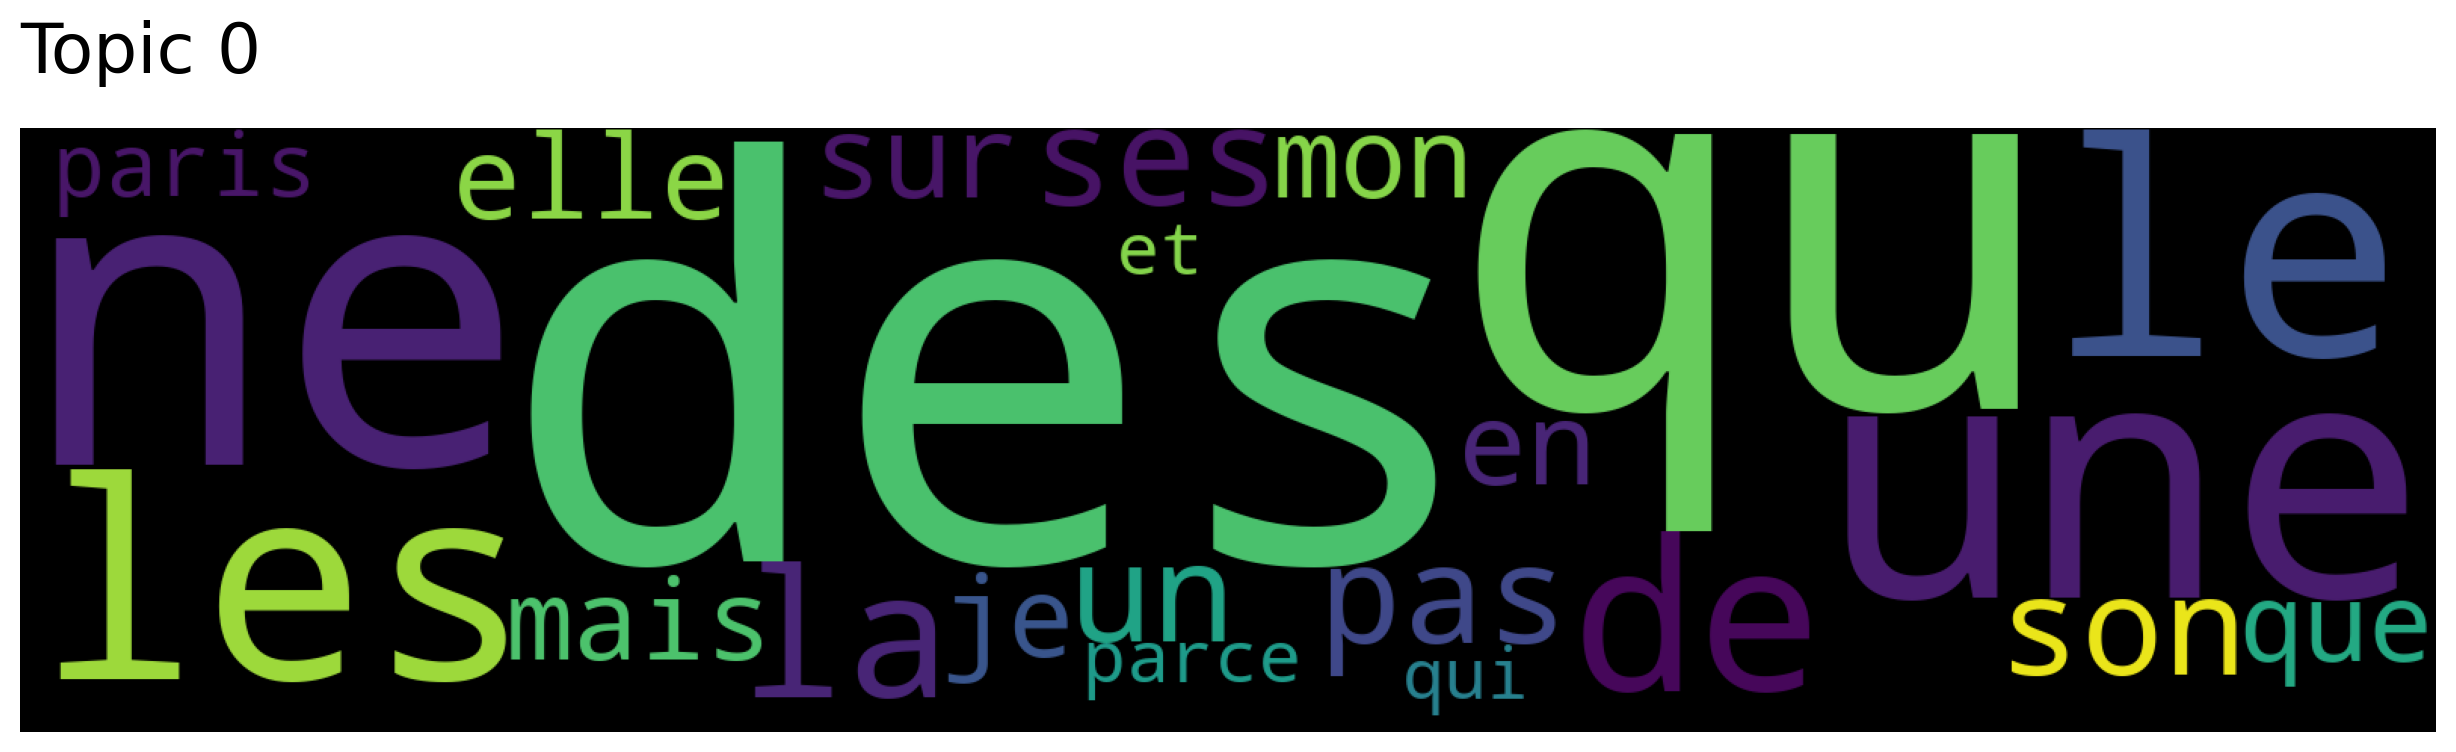

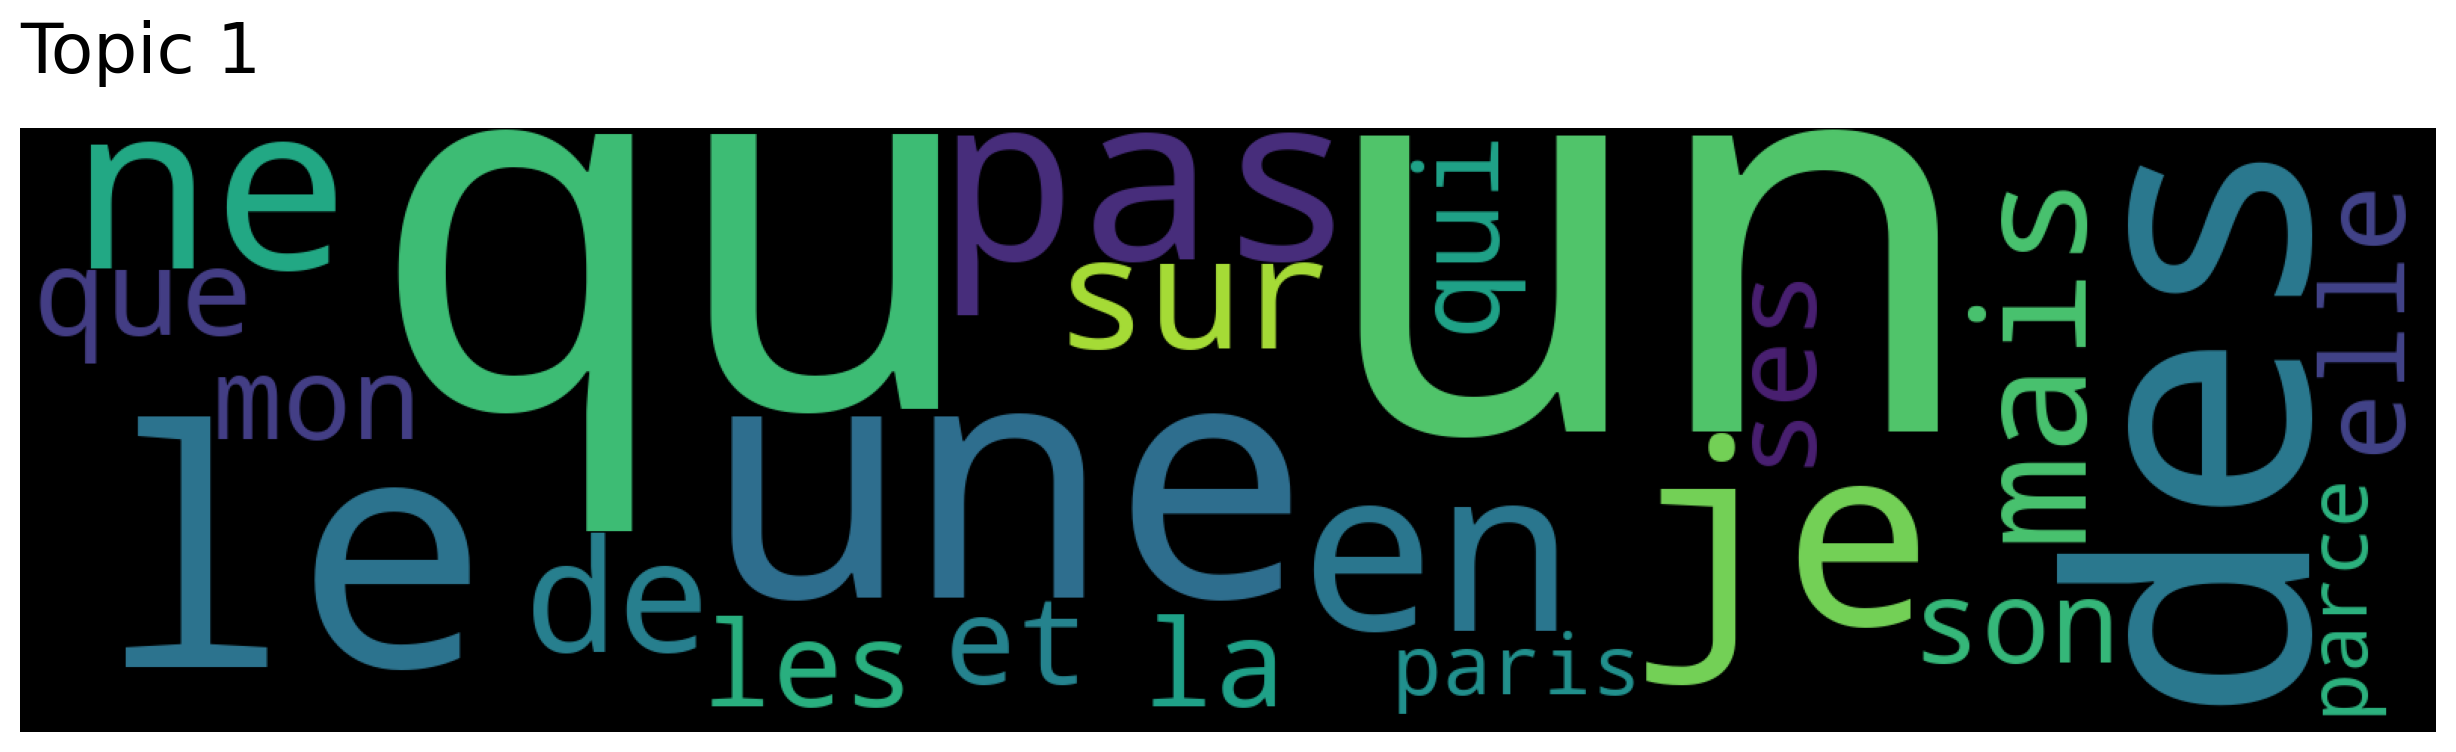

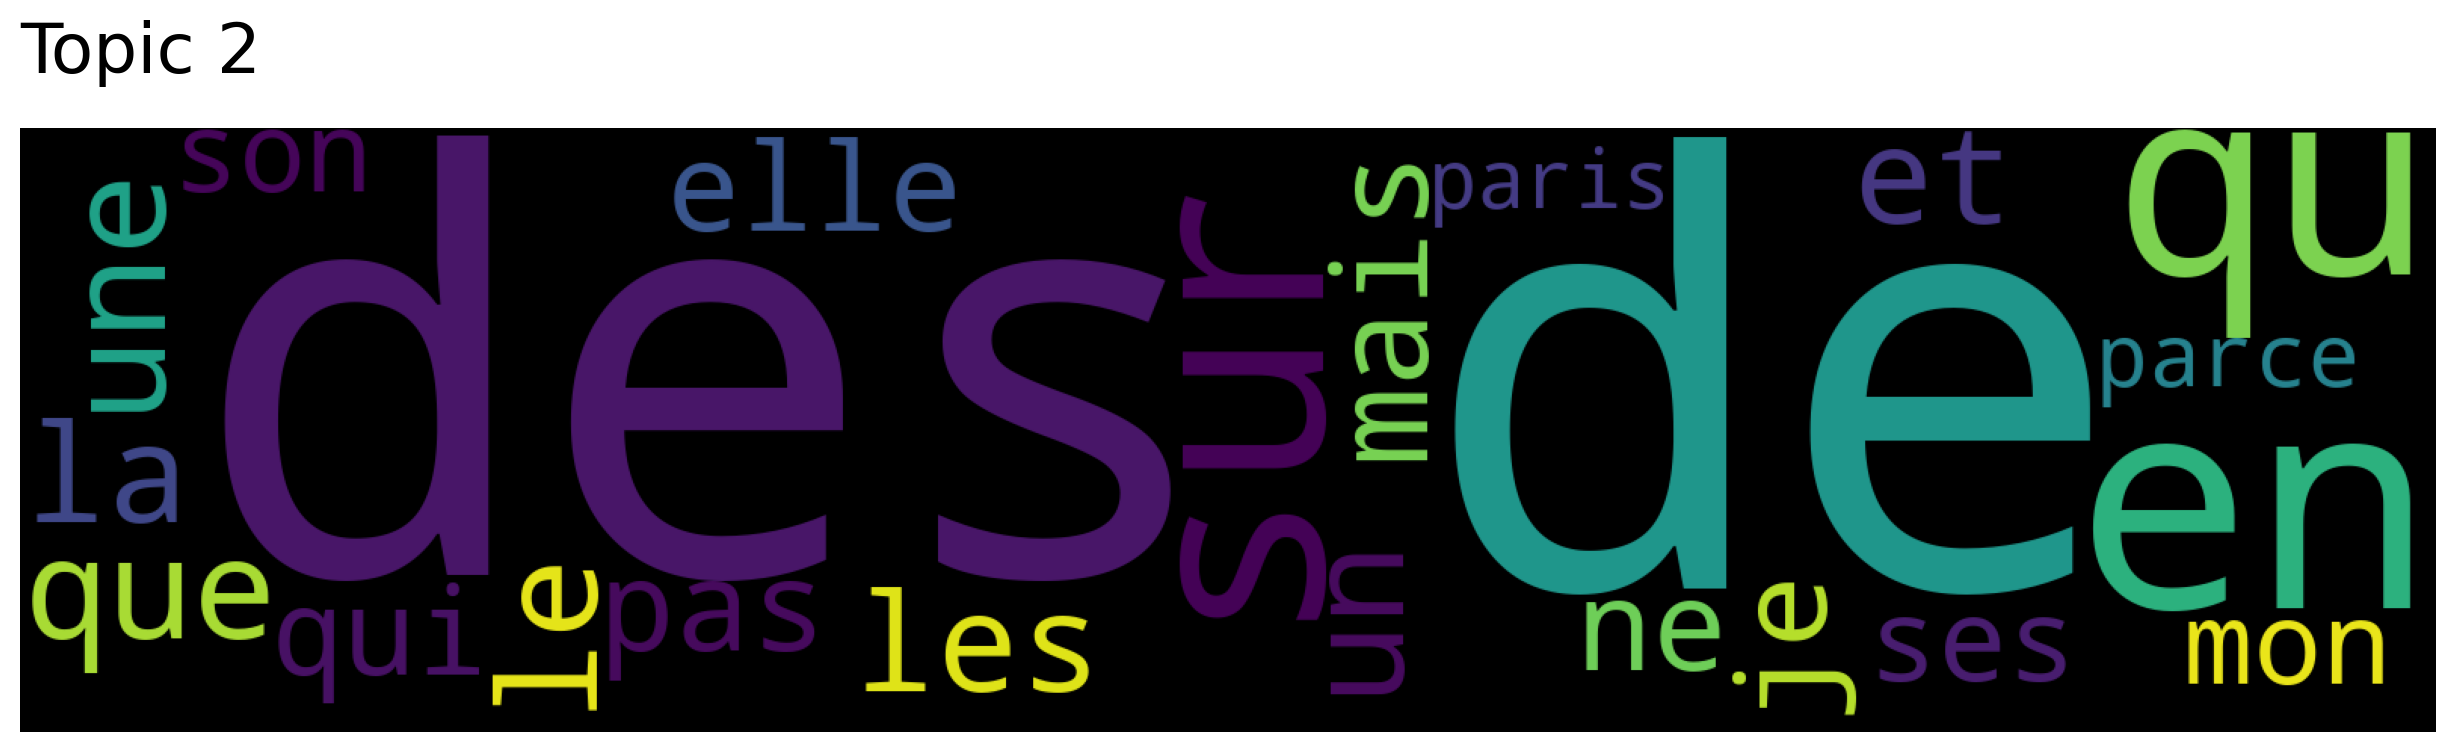

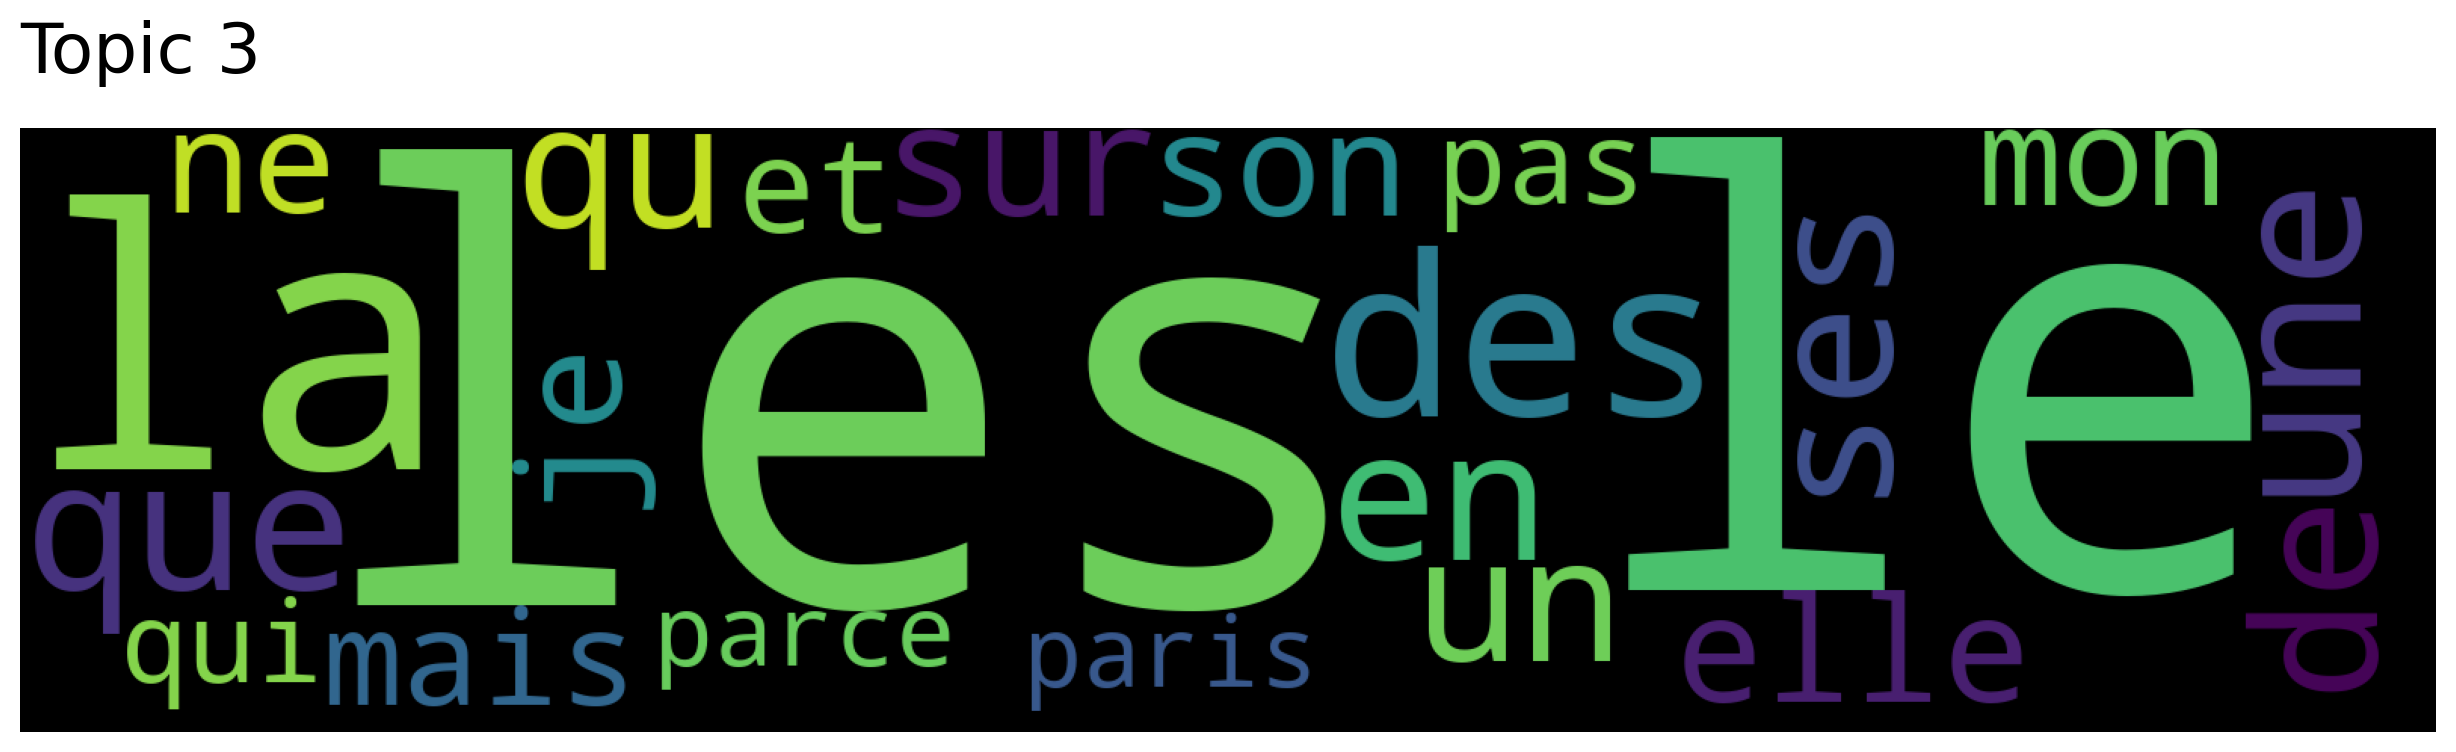

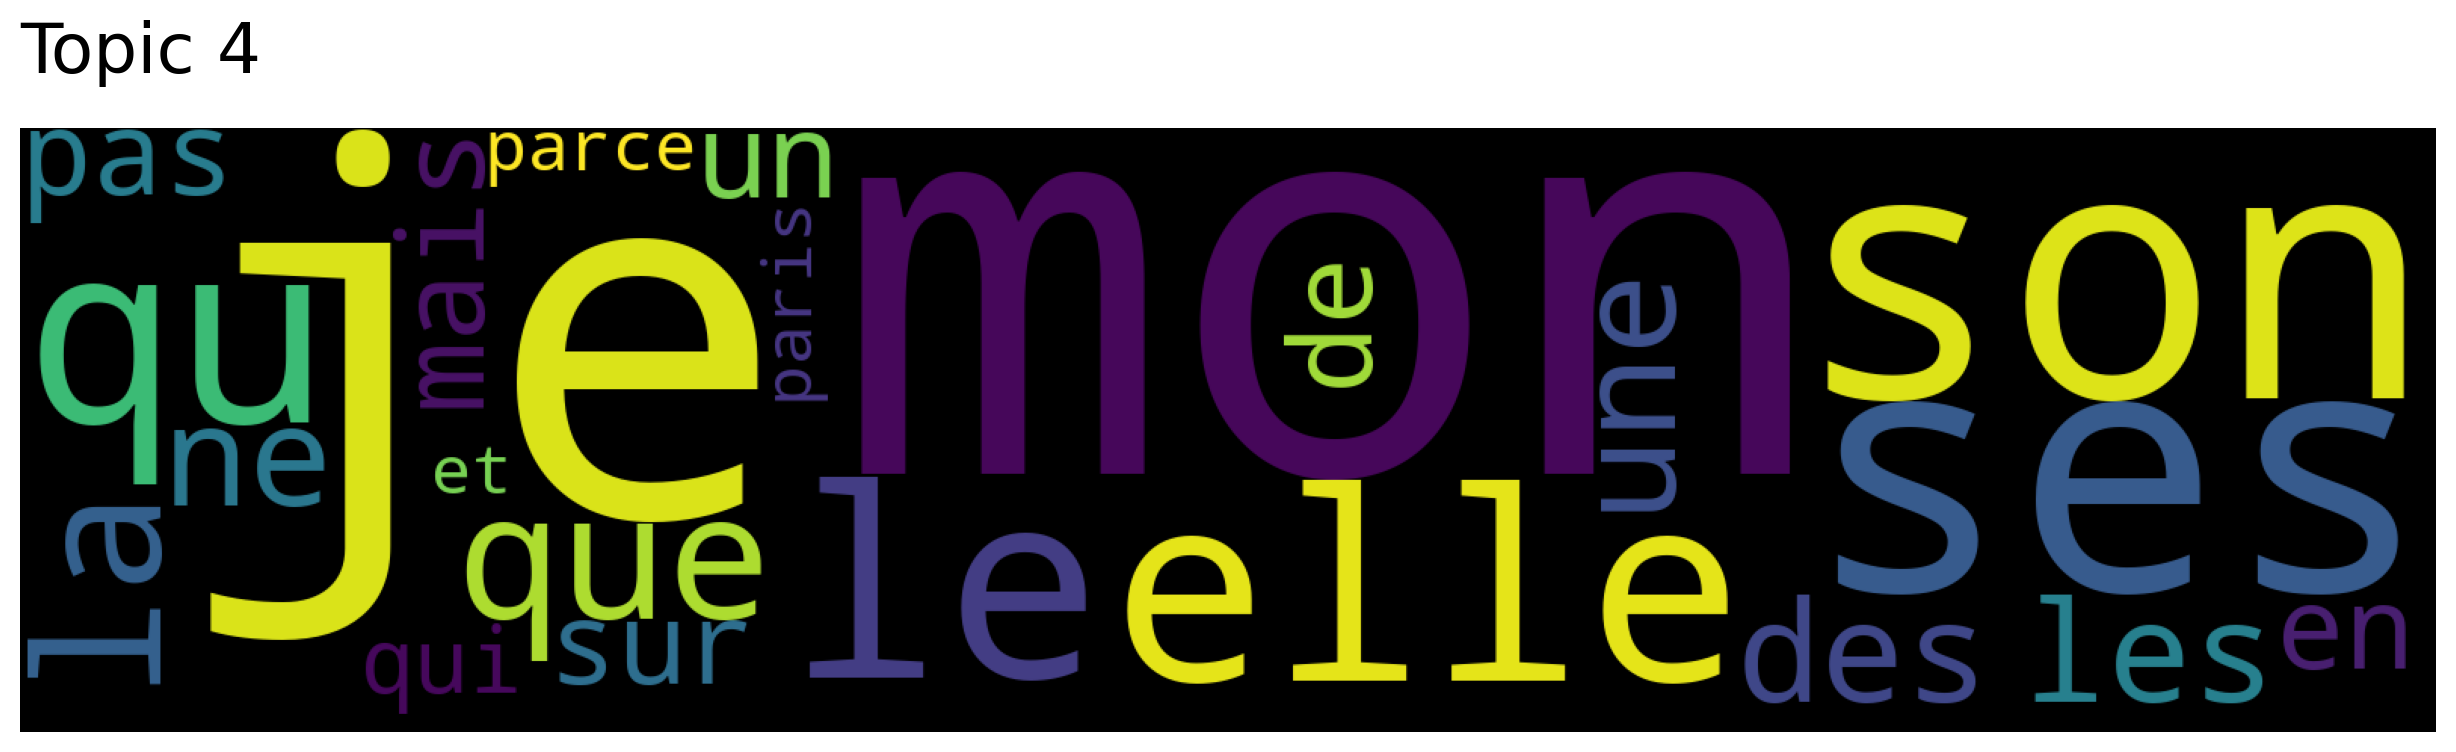

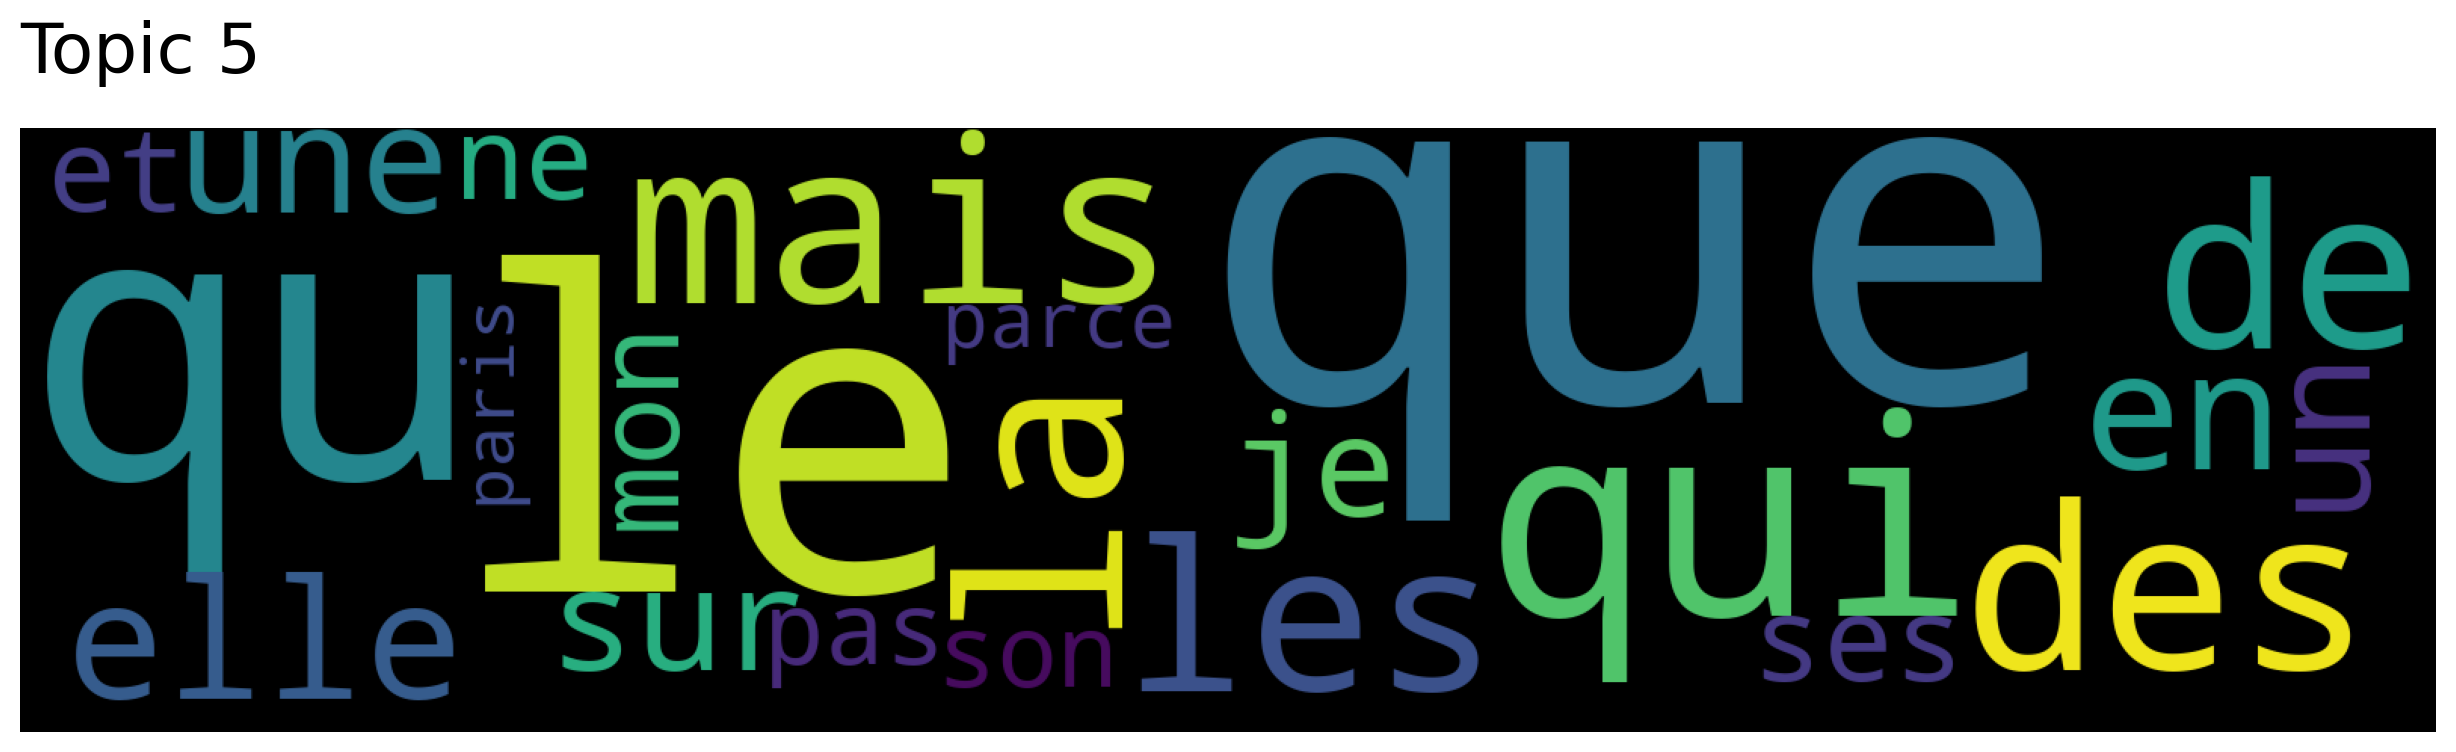

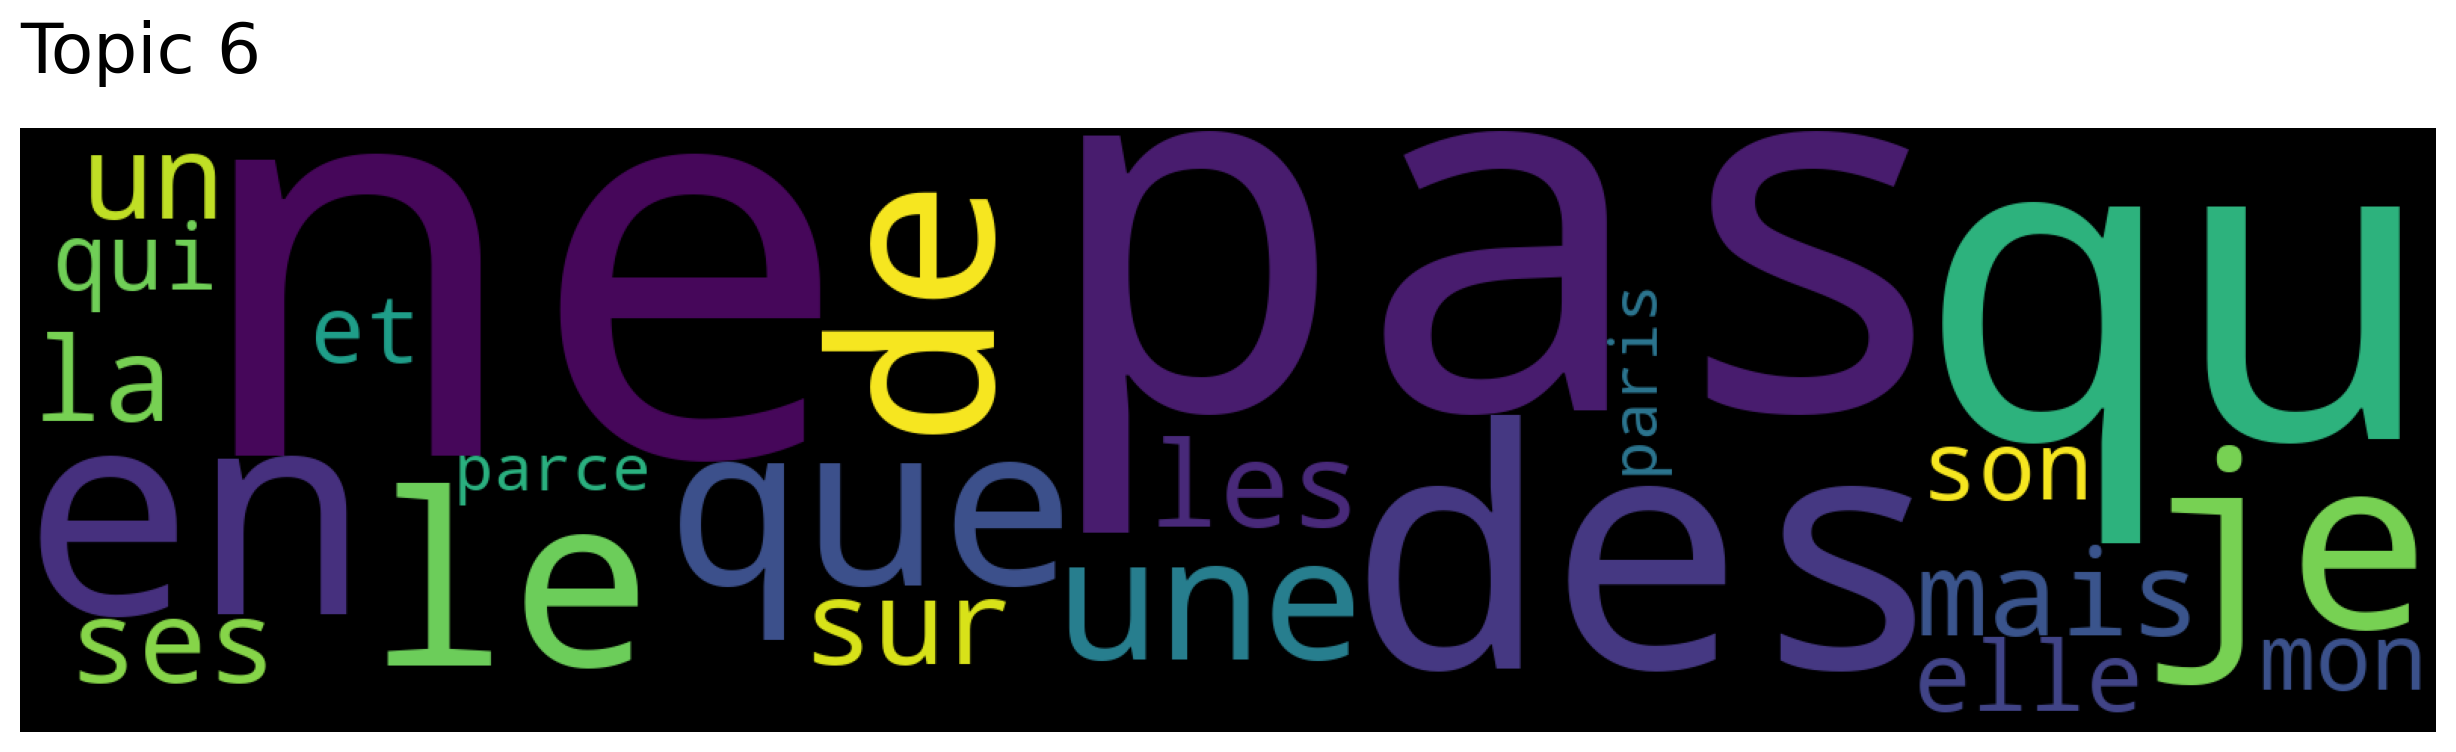

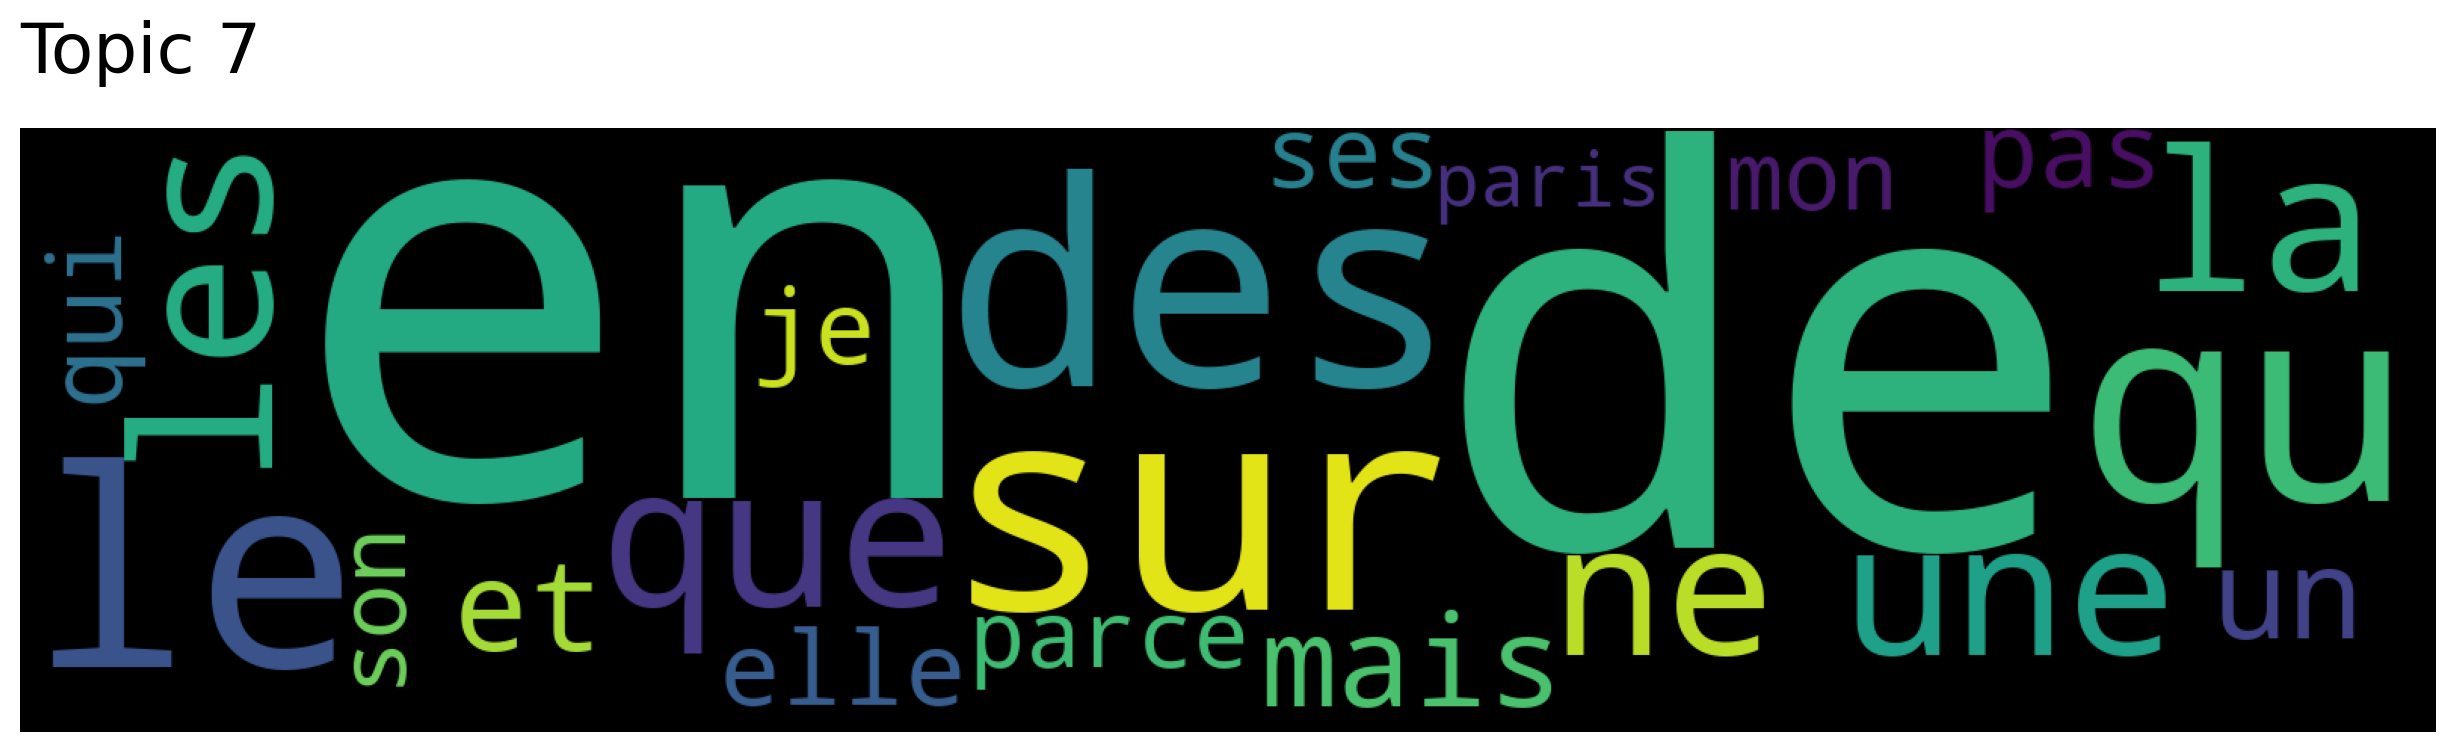

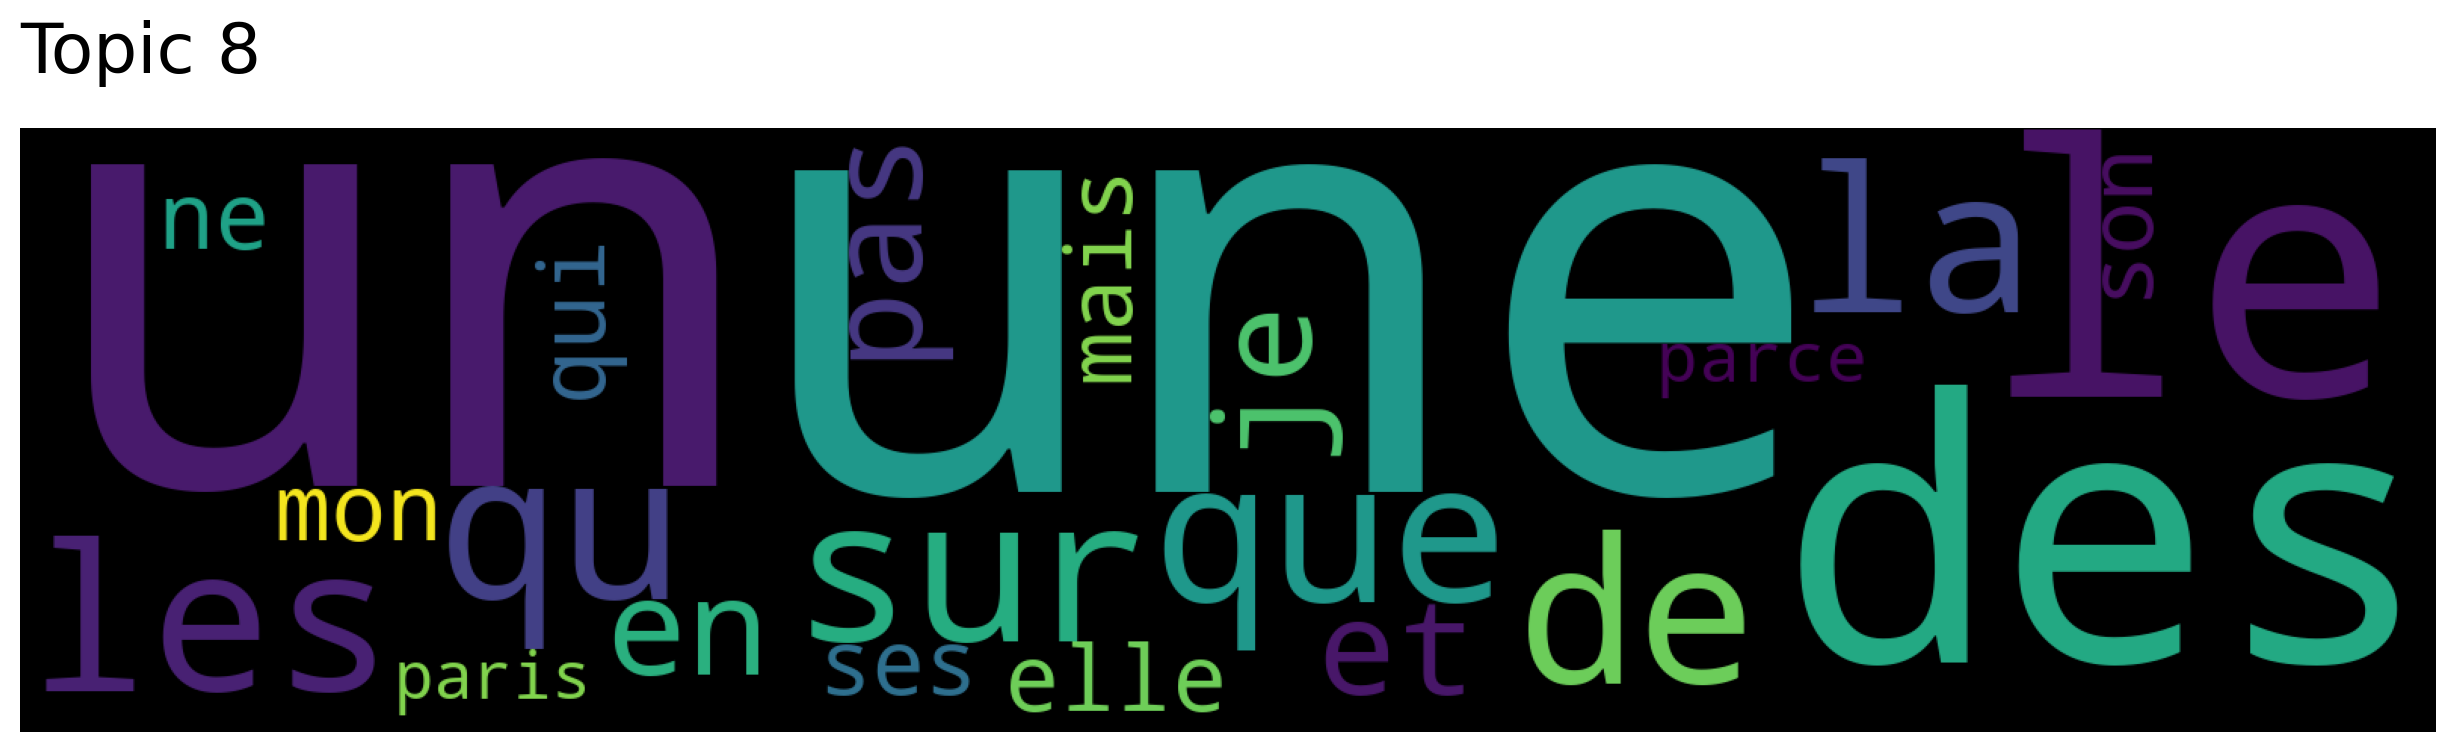

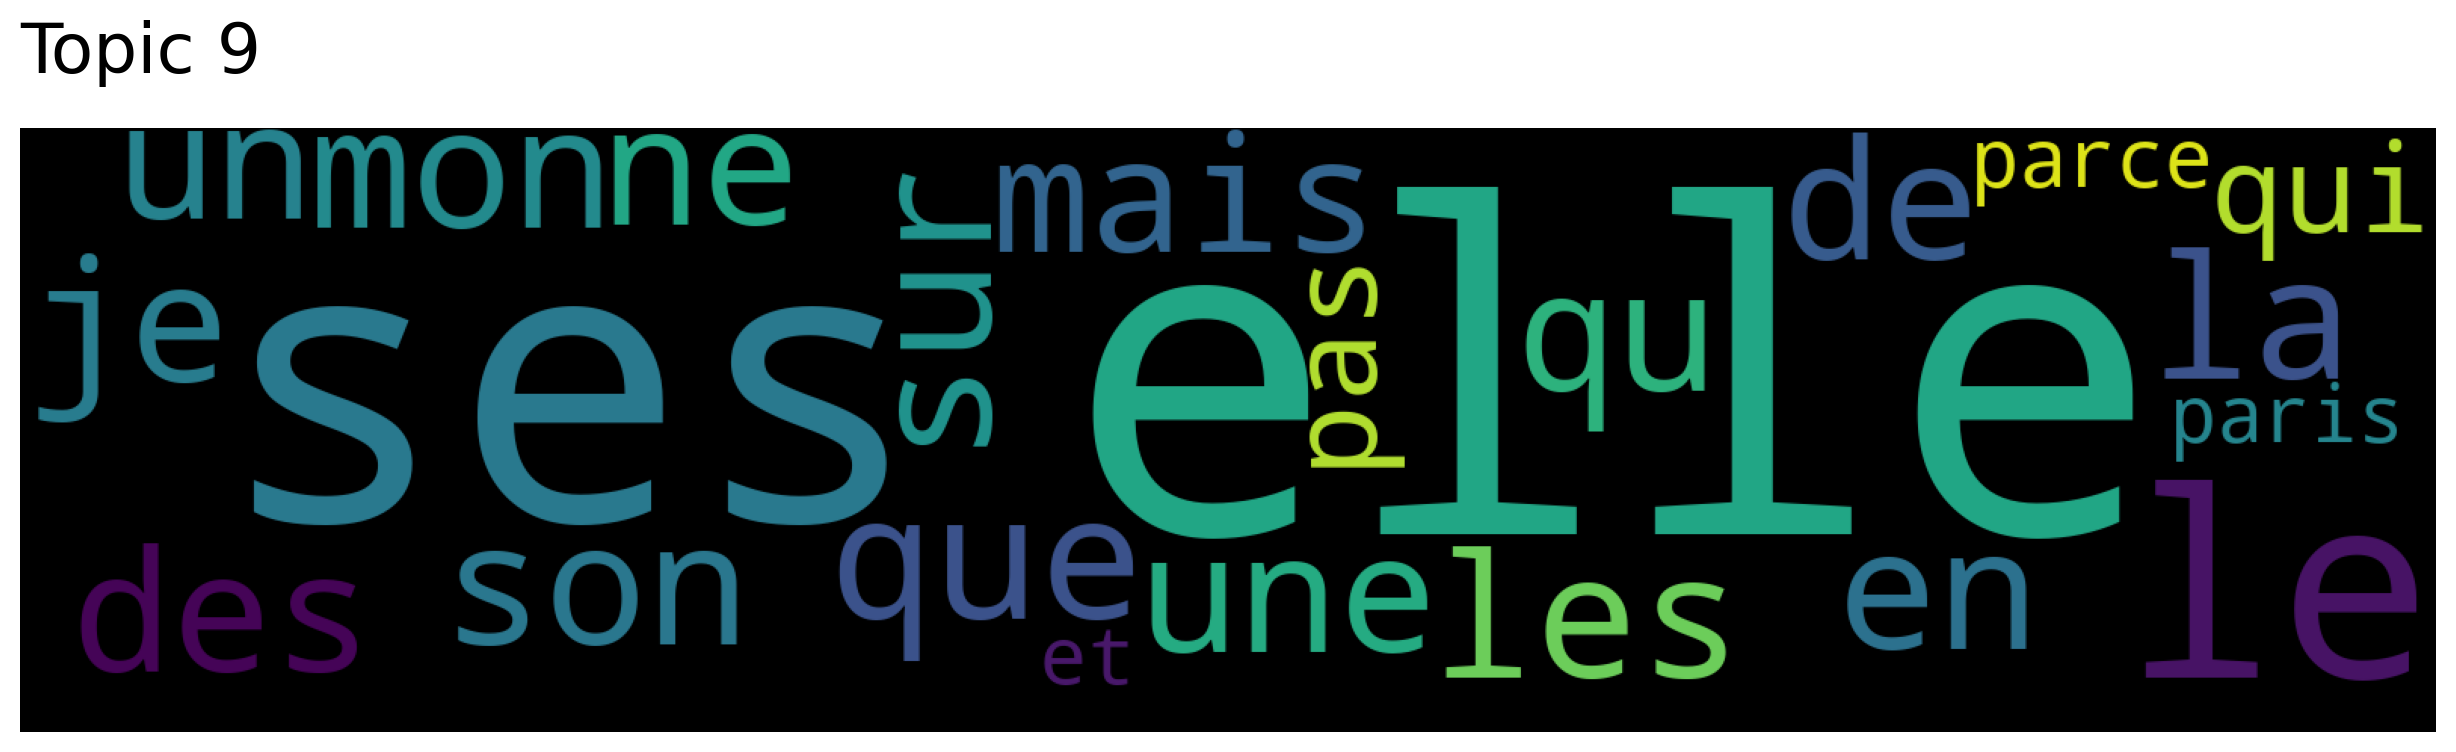

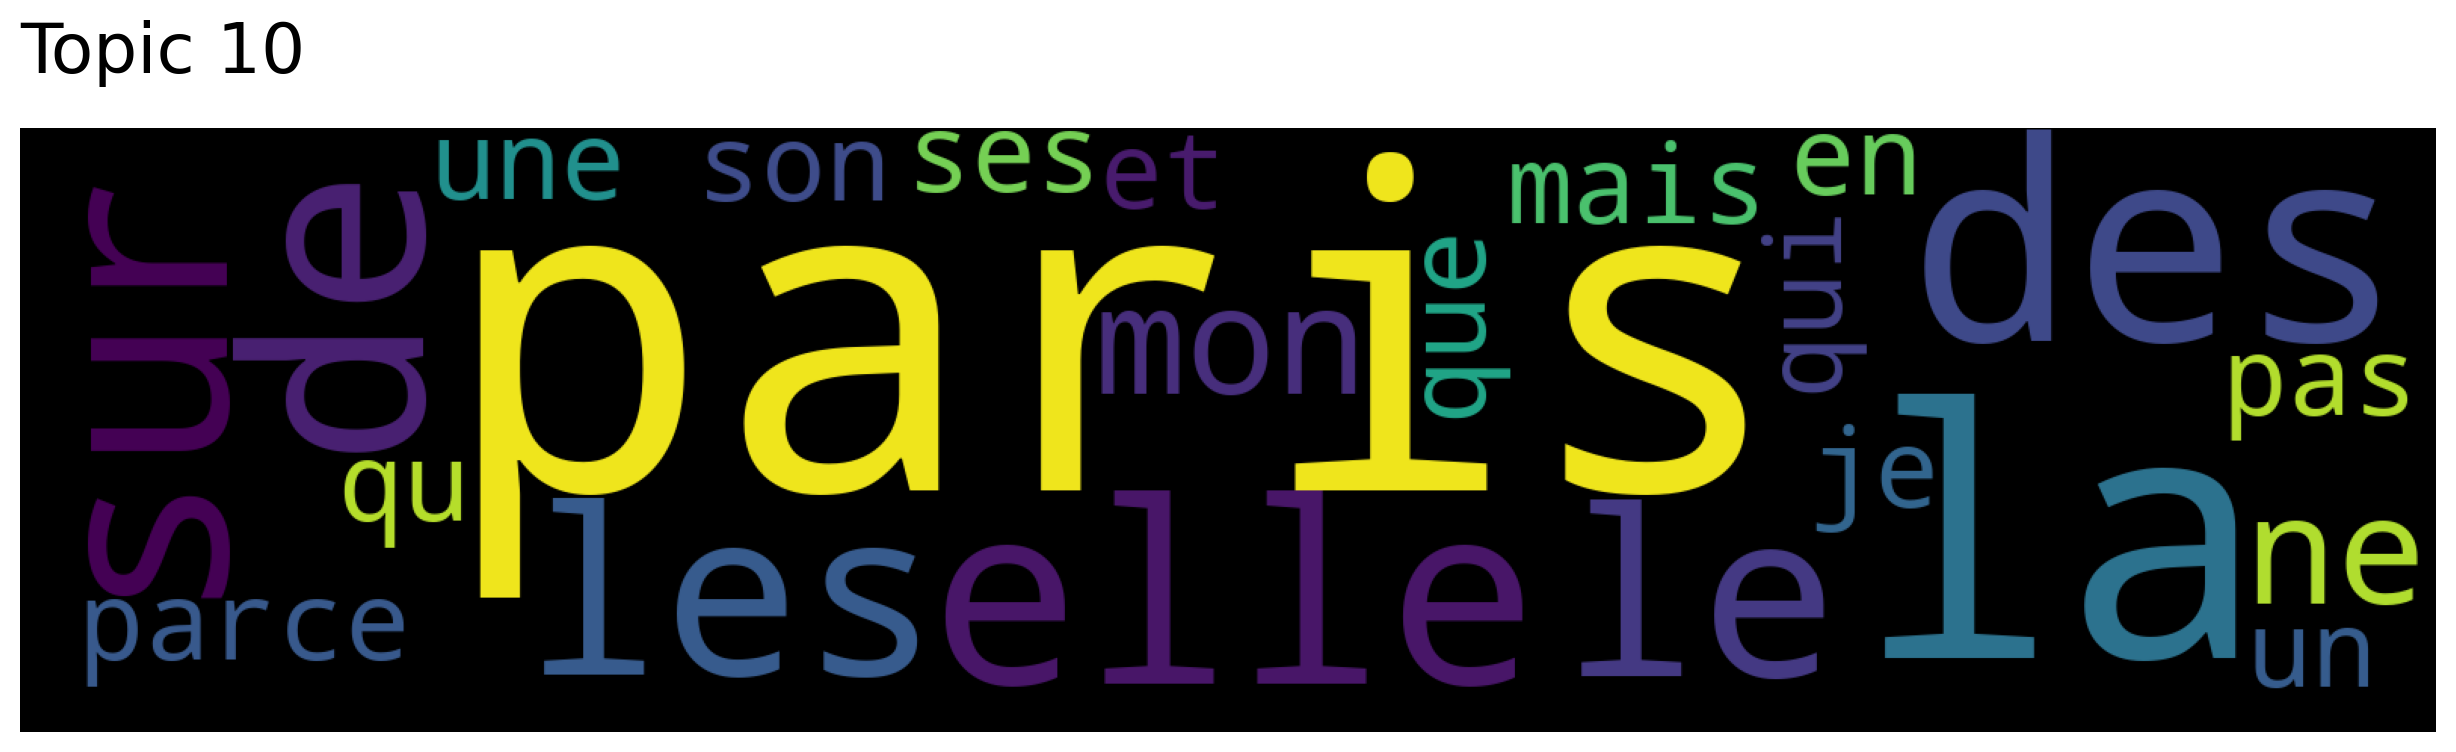

In [65]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [43]:
topic_words, word_scores, topic_nums = model.get_topics(2)